In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import eli5 
from eli5.sklearn import PermutationImportance

from numpy.random import seed
from numpy.random import normal
import shap 
from pdpbox import pdp, info_plots 
np.random.seed(2022) 

pd.options.mode.chained_assignment = None  
%matplotlib inline

In [2]:
import os
print(os.getcwd())
os.chdir("/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data/0526_top20/top20_combine")
print(os.getcwd())

/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data
/share/home/linmiao/bio/2022_heartEC_scRNA/mRNA/230508_3Data/0526_top20/top20_combine


In [3]:
#加载训练集1
# 导入数据
dc = pd.read_csv('top20_discovery.csv', index_col=0)
#查看数据集一些信息 
dc.info()
# 从dc中提取变量特征和目标变量
X = np.log(dc.drop('group', axis=1))
# print(X.head())
Y = dc['group']
# 将数据切分成训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1234,shuffle=True, stratify=None)

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 5059_mRNA to HCM437
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAV1      168 non-null    float64
 1   TNFAIP2   168 non-null    float64
 2   TEK       168 non-null    float64
 3   EPHB4     168 non-null    float64
 4   JUN       168 non-null    float64
 5   MMP2      168 non-null    float64
 6   PDGFRB    168 non-null    float64
 7   PTEN      168 non-null    float64
 8   TGFBI     168 non-null    float64
 9   RHOJ      168 non-null    float64
 10  TGFBR2    168 non-null    float64
 11  PDGFRA    168 non-null    float64
 12  PARVA     168 non-null    float64
 13  FLT1      168 non-null    float64
 14  THY1      168 non-null    float64
 15  ARHGAP24  168 non-null    float64
 16  AMOT      168 non-null    float64
 17  group     168 non-null    int64  
dtypes: float64(17), int64(1)
memory usage: 24.9+ KB


In [4]:
# 加载验证集2
# Load the external validation set 2
V2 = pd.read_csv('top20_validation2.csv', index_col=0)  # Assuming the external validation set is in a CSV file named 'validation1.csv'

# Extract features and target variables
X_V2 = np.log(V2.drop('group', axis=1))
Y_V2 = V2['group']
V2.info()
print(X_V2.head())

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, GSM4887610 to GSM4887632
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAV1      23 non-null     float64
 1   TNFAIP2   23 non-null     float64
 2   TEK       23 non-null     float64
 3   EPHB4     23 non-null     float64
 4   JUN       23 non-null     float64
 5   MMP2      23 non-null     float64
 6   PDGFRB    23 non-null     float64
 7   PTEN      23 non-null     float64
 8   TGFBI     23 non-null     float64
 9   RHOJ      23 non-null     float64
 10  TGFBR2    23 non-null     float64
 11  PDGFRA    23 non-null     float64
 12  PARVA     23 non-null     float64
 13  FLT1      23 non-null     float64
 14  THY1      23 non-null     float64
 15  ARHGAP24  23 non-null     float64
 16  AMOT      23 non-null     float64
 17  group     23 non-null     int64  
dtypes: float64(17), int64(1)
memory usage: 3.4+ KB
                CAV1   TNFAIP2       TEK     EPHB4   

In [6]:
# 加载验证集3
# Load the external validation set 3
V3 = pd.read_csv('top20_validation3.csv', index_col=0)  # Assuming the external validation set is in a CSV file named 'validation1.csv'

# Extract features and target variables
X_V3 = np.log(V3.drop('group', axis=1))
Y_V3 = V3['group']

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
from catboost import CatBoostClassifier

In [8]:
# 创建空的结果列表
results = []

# 设置循环运行100次
for i in range(100):
    # 设置随机数种子
    seed = i  # 使用循环变量i作为种子值
    np.random.seed(seed)

    
   # 分割数据集
    X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.10, random_state=seed, shuffle=True, stratify=Y)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.1111, random_state=seed, shuffle=True, stratify=Y_train_val)



    # 初始化 CatBoostClassifier 模型
    catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=8, random_seed=seed)

    # 在训练集上训练 CatBoostClassifier 模型
    catboost_model.fit(X_train, Y_train)

    # 在验证集上进行预测并计算指标
    Y_val_pred_catboost = catboost_model.predict(X_val)
    accuracy_val_catboost = accuracy_score(Y_val, Y_val_pred_catboost)
    precision_val_catboost = precision_score(Y_val, Y_val_pred_catboost)
    recall_val_catboost = recall_score(Y_val, Y_val_pred_catboost)
    f1_val_catboost = f1_score(Y_val, Y_val_pred_catboost)
    roc_auc_val_catboost = roc_auc_score(Y_val, Y_val_pred_catboost)

    # 在外部验证集2上进行预测并计算指标
    Y_V2_pred_catboost = catboost_model.predict(X_V2)
    accuracy_V2_catboost = accuracy_score(Y_V2, Y_V2_pred_catboost)
    precision_V2_catboost = precision_score(Y_V2, Y_V2_pred_catboost)
    recall_V2_catboost = recall_score(Y_V2, Y_V2_pred_catboost)
    f1_V2_catboost = f1_score(Y_V2, Y_V2_pred_catboost)
    roc_auc_V2_catboost = roc_auc_score(Y_V2, Y_V2_pred_catboost)

    # 在外部验证集3上进行预测并计算指标
    Y_V3_pred_catboost = catboost_model.predict(X_V3)
    accuracy_V3_catboost = accuracy_score(Y_V3, Y_V3_pred_catboost)
    precision_V3_catboost = precision_score(Y_V3, Y_V3_pred_catboost)
    recall_V3_catboost = recall_score(Y_V3, Y_V3_pred_catboost)
    f1_V3_catboost = f1_score(Y_V3, Y_V3_pred_catboost)
    roc_auc_V3_catboost = roc_auc_score(Y_V3, Y_V3_pred_catboost)
    
    # 将结果添加到结果列表中
    results.append({
        'Seed': seed,
        'Accuracy_Val': accuracy_val_catboost,
        'Precision_Val': precision_val_catboost,
        'Recall_Val': recall_val_catboost,
        'F1_Score_Val': f1_val_catboost,
        'ROC_AUC_Val': roc_auc_val_catboost,
        'Accuracy_V2': accuracy_V2_catboost,
        'Precision_V2': precision_V2_catboost,
        'Recall_V2': recall_V2_catboost,
        'F1_Score_V2': f1_V2_catboost,
        'ROC_AUC_V2': roc_auc_V2_catboost,
        'Accuracy_V3': accuracy_V3_catboost,
        'Precision_V3': precision_V3_catboost,
        'Recall_V3': recall_V3_catboost,
        'F1_Score_V3': f1_V3_catboost,
        'ROC_AUC_V3': roc_auc_V3_catboost
    })

# 创建DataFrame
results_df = pd.DataFrame(results)

# 计算评估指标的均值和标准差
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']
for metric in evaluation_metrics:
    results_df[f'{metric}_mean'] = results_df[[f'{metric}_Val', f'{metric}_V2', f'{metric}_V3']].mean(axis=1)
    results_df[f'{metric}_std'] = results_df[[f'{metric}_Val', f'{metric}_V2', f'{metric}_V3']].std(axis=1)

# 导出为CSV文件
results_df.to_csv('0517_classification_results.csv', index=False)

0:	learn: 0.5920145	total: 61.8ms	remaining: 1m 1s
1:	learn: 0.4765205	total: 64.7ms	remaining: 32.3s
2:	learn: 0.4002820	total: 67ms	remaining: 22.3s
3:	learn: 0.3533783	total: 69.3ms	remaining: 17.3s
4:	learn: 0.3022538	total: 71.6ms	remaining: 14.2s
5:	learn: 0.2623181	total: 74ms	remaining: 12.3s
6:	learn: 0.2256334	total: 76.1ms	remaining: 10.8s
7:	learn: 0.2000387	total: 78.3ms	remaining: 9.7s
8:	learn: 0.1805341	total: 80.5ms	remaining: 8.86s
9:	learn: 0.1578874	total: 82.7ms	remaining: 8.19s
10:	learn: 0.1418226	total: 84.8ms	remaining: 7.62s
11:	learn: 0.1248344	total: 86.9ms	remaining: 7.16s
12:	learn: 0.1142878	total: 89.1ms	remaining: 6.76s
13:	learn: 0.1022194	total: 91.3ms	remaining: 6.43s
14:	learn: 0.0949692	total: 93.8ms	remaining: 6.16s
15:	learn: 0.0879671	total: 96ms	remaining: 5.9s
16:	learn: 0.0778341	total: 98.1ms	remaining: 5.67s
17:	learn: 0.0717793	total: 100ms	remaining: 5.47s
18:	learn: 0.0662805	total: 102ms	remaining: 5.29s
19:	learn: 0.0611876	total: 105m

176:	learn: 0.0034054	total: 441ms	remaining: 2.05s
177:	learn: 0.0033862	total: 443ms	remaining: 2.04s
178:	learn: 0.0033681	total: 445ms	remaining: 2.04s
179:	learn: 0.0033500	total: 447ms	remaining: 2.04s
180:	learn: 0.0033355	total: 449ms	remaining: 2.03s
181:	learn: 0.0033161	total: 452ms	remaining: 2.03s
182:	learn: 0.0033014	total: 454ms	remaining: 2.02s
183:	learn: 0.0032838	total: 456ms	remaining: 2.02s
184:	learn: 0.0032612	total: 458ms	remaining: 2.02s
185:	learn: 0.0032352	total: 460ms	remaining: 2.01s
186:	learn: 0.0032200	total: 462ms	remaining: 2.01s
187:	learn: 0.0032042	total: 464ms	remaining: 2.01s
188:	learn: 0.0031835	total: 467ms	remaining: 2s
189:	learn: 0.0031702	total: 469ms	remaining: 2s
190:	learn: 0.0031543	total: 471ms	remaining: 1.99s
191:	learn: 0.0031362	total: 473ms	remaining: 1.99s
192:	learn: 0.0031220	total: 475ms	remaining: 1.99s
193:	learn: 0.0031076	total: 477ms	remaining: 1.98s
194:	learn: 0.0030922	total: 479ms	remaining: 1.98s
195:	learn: 0.0030

351:	learn: 0.0017730	total: 820ms	remaining: 1.51s
352:	learn: 0.0017678	total: 822ms	remaining: 1.51s
353:	learn: 0.0017632	total: 825ms	remaining: 1.5s
354:	learn: 0.0017586	total: 827ms	remaining: 1.5s
355:	learn: 0.0017535	total: 829ms	remaining: 1.5s
356:	learn: 0.0017492	total: 831ms	remaining: 1.5s
357:	learn: 0.0017450	total: 833ms	remaining: 1.49s
358:	learn: 0.0017415	total: 835ms	remaining: 1.49s
359:	learn: 0.0017383	total: 837ms	remaining: 1.49s
360:	learn: 0.0017338	total: 840ms	remaining: 1.49s
361:	learn: 0.0017295	total: 842ms	remaining: 1.48s
362:	learn: 0.0017295	total: 844ms	remaining: 1.48s
363:	learn: 0.0017246	total: 846ms	remaining: 1.48s
364:	learn: 0.0017203	total: 848ms	remaining: 1.48s
365:	learn: 0.0017097	total: 850ms	remaining: 1.47s
366:	learn: 0.0017097	total: 852ms	remaining: 1.47s
367:	learn: 0.0017061	total: 854ms	remaining: 1.47s
368:	learn: 0.0017061	total: 856ms	remaining: 1.46s
369:	learn: 0.0017061	total: 858ms	remaining: 1.46s
370:	learn: 0.00

539:	learn: 0.0013841	total: 1.21s	remaining: 1.03s
540:	learn: 0.0013813	total: 1.21s	remaining: 1.02s
541:	learn: 0.0013812	total: 1.21s	remaining: 1.02s
542:	learn: 0.0013792	total: 1.21s	remaining: 1.02s
543:	learn: 0.0013792	total: 1.21s	remaining: 1.02s
544:	learn: 0.0013792	total: 1.22s	remaining: 1.01s
545:	learn: 0.0013768	total: 1.22s	remaining: 1.01s
546:	learn: 0.0013768	total: 1.22s	remaining: 1.01s
547:	learn: 0.0013736	total: 1.22s	remaining: 1.01s
548:	learn: 0.0013723	total: 1.22s	remaining: 1s
549:	learn: 0.0013683	total: 1.23s	remaining: 1s
550:	learn: 0.0013683	total: 1.23s	remaining: 1s
551:	learn: 0.0013683	total: 1.23s	remaining: 998ms
552:	learn: 0.0013658	total: 1.23s	remaining: 995ms
553:	learn: 0.0013641	total: 1.23s	remaining: 993ms
554:	learn: 0.0013614	total: 1.24s	remaining: 991ms
555:	learn: 0.0013592	total: 1.24s	remaining: 988ms
556:	learn: 0.0013591	total: 1.24s	remaining: 986ms
557:	learn: 0.0013591	total: 1.24s	remaining: 983ms
558:	learn: 0.0013591

735:	learn: 0.0012346	total: 1.59s	remaining: 570ms
736:	learn: 0.0012346	total: 1.59s	remaining: 568ms
737:	learn: 0.0012346	total: 1.59s	remaining: 566ms
738:	learn: 0.0012346	total: 1.59s	remaining: 563ms
739:	learn: 0.0012346	total: 1.6s	remaining: 561ms
740:	learn: 0.0012346	total: 1.6s	remaining: 559ms
741:	learn: 0.0012346	total: 1.6s	remaining: 557ms
742:	learn: 0.0012346	total: 1.6s	remaining: 554ms
743:	learn: 0.0012337	total: 1.6s	remaining: 552ms
744:	learn: 0.0012336	total: 1.61s	remaining: 550ms
745:	learn: 0.0012322	total: 1.61s	remaining: 548ms
746:	learn: 0.0012321	total: 1.61s	remaining: 545ms
747:	learn: 0.0012320	total: 1.61s	remaining: 543ms
748:	learn: 0.0012319	total: 1.61s	remaining: 541ms
749:	learn: 0.0012320	total: 1.62s	remaining: 539ms
750:	learn: 0.0012319	total: 1.62s	remaining: 536ms
751:	learn: 0.0012307	total: 1.62s	remaining: 534ms
752:	learn: 0.0012306	total: 1.62s	remaining: 532ms
753:	learn: 0.0012304	total: 1.62s	remaining: 530ms
754:	learn: 0.001

933:	learn: 0.0011534	total: 1.97s	remaining: 139ms
934:	learn: 0.0011535	total: 1.98s	remaining: 137ms
935:	learn: 0.0011534	total: 1.98s	remaining: 135ms
936:	learn: 0.0011524	total: 1.98s	remaining: 133ms
937:	learn: 0.0011524	total: 1.98s	remaining: 131ms
938:	learn: 0.0011525	total: 1.98s	remaining: 129ms
939:	learn: 0.0011519	total: 1.99s	remaining: 127ms
940:	learn: 0.0011519	total: 1.99s	remaining: 125ms
941:	learn: 0.0011519	total: 1.99s	remaining: 122ms
942:	learn: 0.0011512	total: 1.99s	remaining: 120ms
943:	learn: 0.0011512	total: 1.99s	remaining: 118ms
944:	learn: 0.0011512	total: 1.99s	remaining: 116ms
945:	learn: 0.0011512	total: 2s	remaining: 114ms
946:	learn: 0.0011511	total: 2s	remaining: 112ms
947:	learn: 0.0011511	total: 2s	remaining: 110ms
948:	learn: 0.0011510	total: 2s	remaining: 108ms
949:	learn: 0.0011510	total: 2s	remaining: 105ms
950:	learn: 0.0011509	total: 2.01s	remaining: 103ms
951:	learn: 0.0011489	total: 2.01s	remaining: 101ms
952:	learn: 0.0011489	total

177:	learn: 0.0030556	total: 392ms	remaining: 1.81s
178:	learn: 0.0030413	total: 395ms	remaining: 1.81s
179:	learn: 0.0030166	total: 396ms	remaining: 1.8s
180:	learn: 0.0029992	total: 398ms	remaining: 1.8s
181:	learn: 0.0029783	total: 400ms	remaining: 1.8s
182:	learn: 0.0029595	total: 403ms	remaining: 1.8s
183:	learn: 0.0029468	total: 405ms	remaining: 1.79s
184:	learn: 0.0029289	total: 407ms	remaining: 1.79s
185:	learn: 0.0029125	total: 409ms	remaining: 1.79s
186:	learn: 0.0028937	total: 411ms	remaining: 1.79s
187:	learn: 0.0028763	total: 414ms	remaining: 1.79s
188:	learn: 0.0028648	total: 416ms	remaining: 1.78s
189:	learn: 0.0028468	total: 418ms	remaining: 1.78s
190:	learn: 0.0028334	total: 420ms	remaining: 1.78s
191:	learn: 0.0028220	total: 422ms	remaining: 1.78s
192:	learn: 0.0028117	total: 425ms	remaining: 1.77s
193:	learn: 0.0028001	total: 427ms	remaining: 1.77s
194:	learn: 0.0027878	total: 429ms	remaining: 1.77s
195:	learn: 0.0027736	total: 431ms	remaining: 1.77s
196:	learn: 0.00

351:	learn: 0.0016182	total: 773ms	remaining: 1.42s
352:	learn: 0.0016138	total: 775ms	remaining: 1.42s
353:	learn: 0.0016101	total: 777ms	remaining: 1.42s
354:	learn: 0.0016100	total: 779ms	remaining: 1.42s
355:	learn: 0.0016068	total: 782ms	remaining: 1.41s
356:	learn: 0.0016048	total: 784ms	remaining: 1.41s
357:	learn: 0.0016009	total: 786ms	remaining: 1.41s
358:	learn: 0.0015976	total: 788ms	remaining: 1.41s
359:	learn: 0.0015933	total: 790ms	remaining: 1.4s
360:	learn: 0.0015934	total: 792ms	remaining: 1.4s
361:	learn: 0.0015890	total: 794ms	remaining: 1.4s
362:	learn: 0.0015849	total: 796ms	remaining: 1.4s
363:	learn: 0.0015798	total: 798ms	remaining: 1.39s
364:	learn: 0.0015760	total: 800ms	remaining: 1.39s
365:	learn: 0.0015729	total: 803ms	remaining: 1.39s
366:	learn: 0.0015703	total: 805ms	remaining: 1.39s
367:	learn: 0.0015654	total: 807ms	remaining: 1.39s
368:	learn: 0.0015623	total: 809ms	remaining: 1.38s
369:	learn: 0.0015588	total: 811ms	remaining: 1.38s
370:	learn: 0.00

538:	learn: 0.0012572	total: 1.16s	remaining: 988ms
539:	learn: 0.0012557	total: 1.16s	remaining: 986ms
540:	learn: 0.0012541	total: 1.16s	remaining: 984ms
541:	learn: 0.0012521	total: 1.16s	remaining: 981ms
542:	learn: 0.0012521	total: 1.16s	remaining: 979ms
543:	learn: 0.0012521	total: 1.17s	remaining: 977ms
544:	learn: 0.0012517	total: 1.17s	remaining: 974ms
545:	learn: 0.0012479	total: 1.17s	remaining: 972ms
546:	learn: 0.0012456	total: 1.17s	remaining: 970ms
547:	learn: 0.0012456	total: 1.17s	remaining: 968ms
548:	learn: 0.0012455	total: 1.18s	remaining: 965ms
549:	learn: 0.0012455	total: 1.18s	remaining: 963ms
550:	learn: 0.0012455	total: 1.18s	remaining: 961ms
551:	learn: 0.0012419	total: 1.18s	remaining: 959ms
552:	learn: 0.0012419	total: 1.18s	remaining: 956ms
553:	learn: 0.0012365	total: 1.19s	remaining: 954ms
554:	learn: 0.0012364	total: 1.19s	remaining: 952ms
555:	learn: 0.0012350	total: 1.19s	remaining: 950ms
556:	learn: 0.0012305	total: 1.19s	remaining: 947ms
557:	learn: 

734:	learn: 0.0011289	total: 1.54s	remaining: 555ms
735:	learn: 0.0011284	total: 1.54s	remaining: 553ms
736:	learn: 0.0011283	total: 1.54s	remaining: 551ms
737:	learn: 0.0011282	total: 1.54s	remaining: 548ms
738:	learn: 0.0011281	total: 1.55s	remaining: 546ms
739:	learn: 0.0011255	total: 1.55s	remaining: 544ms
740:	learn: 0.0011256	total: 1.55s	remaining: 542ms
741:	learn: 0.0011255	total: 1.55s	remaining: 540ms
742:	learn: 0.0011254	total: 1.55s	remaining: 538ms
743:	learn: 0.0011255	total: 1.56s	remaining: 536ms
744:	learn: 0.0011254	total: 1.56s	remaining: 534ms
745:	learn: 0.0011254	total: 1.56s	remaining: 531ms
746:	learn: 0.0011254	total: 1.56s	remaining: 529ms
747:	learn: 0.0011254	total: 1.56s	remaining: 527ms
748:	learn: 0.0011254	total: 1.57s	remaining: 525ms
749:	learn: 0.0011253	total: 1.57s	remaining: 523ms
750:	learn: 0.0011254	total: 1.57s	remaining: 521ms
751:	learn: 0.0011254	total: 1.57s	remaining: 518ms
752:	learn: 0.0011251	total: 1.57s	remaining: 516ms
753:	learn: 

930:	learn: 0.0010658	total: 1.92s	remaining: 143ms
931:	learn: 0.0010658	total: 1.93s	remaining: 141ms
932:	learn: 0.0010653	total: 1.93s	remaining: 138ms
933:	learn: 0.0010651	total: 1.93s	remaining: 136ms
934:	learn: 0.0010651	total: 1.93s	remaining: 134ms
935:	learn: 0.0010651	total: 1.93s	remaining: 132ms
936:	learn: 0.0010634	total: 1.94s	remaining: 130ms
937:	learn: 0.0010634	total: 1.94s	remaining: 128ms
938:	learn: 0.0010634	total: 1.94s	remaining: 126ms
939:	learn: 0.0010634	total: 1.94s	remaining: 124ms
940:	learn: 0.0010633	total: 1.94s	remaining: 122ms
941:	learn: 0.0010634	total: 1.95s	remaining: 120ms
942:	learn: 0.0010620	total: 1.95s	remaining: 118ms
943:	learn: 0.0010620	total: 1.95s	remaining: 116ms
944:	learn: 0.0010614	total: 1.95s	remaining: 114ms
945:	learn: 0.0010614	total: 1.95s	remaining: 111ms
946:	learn: 0.0010608	total: 1.96s	remaining: 109ms
947:	learn: 0.0010608	total: 1.96s	remaining: 107ms
948:	learn: 0.0010609	total: 1.96s	remaining: 105ms
949:	learn: 

173:	learn: 0.0037660	total: 385ms	remaining: 1.83s
174:	learn: 0.0037454	total: 387ms	remaining: 1.82s
175:	learn: 0.0037213	total: 389ms	remaining: 1.82s
176:	learn: 0.0036973	total: 391ms	remaining: 1.82s
177:	learn: 0.0036730	total: 393ms	remaining: 1.82s
178:	learn: 0.0036508	total: 396ms	remaining: 1.81s
179:	learn: 0.0036251	total: 398ms	remaining: 1.81s
180:	learn: 0.0036016	total: 400ms	remaining: 1.81s
181:	learn: 0.0035842	total: 402ms	remaining: 1.81s
182:	learn: 0.0035661	total: 404ms	remaining: 1.8s
183:	learn: 0.0035400	total: 406ms	remaining: 1.8s
184:	learn: 0.0035185	total: 409ms	remaining: 1.8s
185:	learn: 0.0034977	total: 411ms	remaining: 1.8s
186:	learn: 0.0034802	total: 413ms	remaining: 1.79s
187:	learn: 0.0034567	total: 415ms	remaining: 1.79s
188:	learn: 0.0034392	total: 417ms	remaining: 1.79s
189:	learn: 0.0034214	total: 419ms	remaining: 1.79s
190:	learn: 0.0034064	total: 422ms	remaining: 1.79s
191:	learn: 0.0033902	total: 424ms	remaining: 1.78s
192:	learn: 0.00

349:	learn: 0.0018606	total: 765ms	remaining: 1.42s
350:	learn: 0.0018534	total: 767ms	remaining: 1.42s
351:	learn: 0.0018472	total: 769ms	remaining: 1.42s
352:	learn: 0.0018390	total: 771ms	remaining: 1.41s
353:	learn: 0.0018346	total: 773ms	remaining: 1.41s
354:	learn: 0.0018303	total: 775ms	remaining: 1.41s
355:	learn: 0.0018266	total: 777ms	remaining: 1.41s
356:	learn: 0.0018232	total: 779ms	remaining: 1.4s
357:	learn: 0.0018180	total: 781ms	remaining: 1.4s
358:	learn: 0.0018117	total: 784ms	remaining: 1.4s
359:	learn: 0.0018076	total: 786ms	remaining: 1.4s
360:	learn: 0.0018022	total: 788ms	remaining: 1.39s
361:	learn: 0.0017975	total: 790ms	remaining: 1.39s
362:	learn: 0.0017934	total: 792ms	remaining: 1.39s
363:	learn: 0.0017891	total: 794ms	remaining: 1.39s
364:	learn: 0.0017836	total: 796ms	remaining: 1.39s
365:	learn: 0.0017798	total: 798ms	remaining: 1.38s
366:	learn: 0.0017743	total: 801ms	remaining: 1.38s
367:	learn: 0.0017704	total: 803ms	remaining: 1.38s
368:	learn: 0.00

532:	learn: 0.0013997	total: 1.15s	remaining: 1.01s
533:	learn: 0.0013966	total: 1.16s	remaining: 1.01s
534:	learn: 0.0013951	total: 1.16s	remaining: 1.01s
535:	learn: 0.0013929	total: 1.16s	remaining: 1s
536:	learn: 0.0013929	total: 1.16s	remaining: 1s
537:	learn: 0.0013927	total: 1.16s	remaining: 999ms
538:	learn: 0.0013926	total: 1.17s	remaining: 997ms
539:	learn: 0.0013926	total: 1.17s	remaining: 995ms
540:	learn: 0.0013893	total: 1.17s	remaining: 992ms
541:	learn: 0.0013875	total: 1.17s	remaining: 990ms
542:	learn: 0.0013875	total: 1.17s	remaining: 988ms
543:	learn: 0.0013873	total: 1.18s	remaining: 986ms
544:	learn: 0.0013873	total: 1.18s	remaining: 984ms
545:	learn: 0.0013847	total: 1.18s	remaining: 982ms
546:	learn: 0.0013823	total: 1.18s	remaining: 979ms
547:	learn: 0.0013824	total: 1.18s	remaining: 977ms
548:	learn: 0.0013823	total: 1.19s	remaining: 975ms
549:	learn: 0.0013787	total: 1.19s	remaining: 972ms
550:	learn: 0.0013787	total: 1.19s	remaining: 970ms
551:	learn: 0.0013

725:	learn: 0.0011891	total: 1.54s	remaining: 581ms
726:	learn: 0.0011890	total: 1.54s	remaining: 578ms
727:	learn: 0.0011890	total: 1.54s	remaining: 576ms
728:	learn: 0.0011874	total: 1.54s	remaining: 574ms
729:	learn: 0.0011852	total: 1.55s	remaining: 572ms
730:	learn: 0.0011828	total: 1.55s	remaining: 570ms
731:	learn: 0.0011828	total: 1.55s	remaining: 568ms
732:	learn: 0.0011828	total: 1.55s	remaining: 566ms
733:	learn: 0.0011827	total: 1.55s	remaining: 563ms
734:	learn: 0.0011806	total: 1.56s	remaining: 561ms
735:	learn: 0.0011786	total: 1.56s	remaining: 559ms
736:	learn: 0.0011765	total: 1.56s	remaining: 557ms
737:	learn: 0.0011766	total: 1.56s	remaining: 555ms
738:	learn: 0.0011751	total: 1.56s	remaining: 552ms
739:	learn: 0.0011751	total: 1.57s	remaining: 550ms
740:	learn: 0.0011750	total: 1.57s	remaining: 548ms
741:	learn: 0.0011750	total: 1.57s	remaining: 546ms
742:	learn: 0.0011750	total: 1.57s	remaining: 544ms
743:	learn: 0.0011728	total: 1.57s	remaining: 542ms
744:	learn: 

924:	learn: 0.0011283	total: 1.92s	remaining: 156ms
925:	learn: 0.0011268	total: 1.93s	remaining: 154ms
926:	learn: 0.0011264	total: 1.93s	remaining: 152ms
927:	learn: 0.0011255	total: 1.93s	remaining: 150ms
928:	learn: 0.0011255	total: 1.93s	remaining: 148ms
929:	learn: 0.0011255	total: 1.93s	remaining: 146ms
930:	learn: 0.0011254	total: 1.94s	remaining: 143ms
931:	learn: 0.0011254	total: 1.94s	remaining: 141ms
932:	learn: 0.0011254	total: 1.94s	remaining: 139ms
933:	learn: 0.0011254	total: 1.94s	remaining: 137ms
934:	learn: 0.0011253	total: 1.94s	remaining: 135ms
935:	learn: 0.0011253	total: 1.95s	remaining: 133ms
936:	learn: 0.0011252	total: 1.95s	remaining: 131ms
937:	learn: 0.0011239	total: 1.95s	remaining: 129ms
938:	learn: 0.0011239	total: 1.95s	remaining: 127ms
939:	learn: 0.0011220	total: 1.95s	remaining: 125ms
940:	learn: 0.0011219	total: 1.96s	remaining: 123ms
941:	learn: 0.0011209	total: 1.96s	remaining: 121ms
942:	learn: 0.0011209	total: 1.96s	remaining: 118ms
943:	learn: 

88:	learn: 0.0076455	total: 192ms	remaining: 1.96s
89:	learn: 0.0075132	total: 194ms	remaining: 1.96s
90:	learn: 0.0074434	total: 196ms	remaining: 1.96s
91:	learn: 0.0073742	total: 198ms	remaining: 1.96s
92:	learn: 0.0072408	total: 200ms	remaining: 1.95s
93:	learn: 0.0071454	total: 202ms	remaining: 1.95s
94:	learn: 0.0070526	total: 205ms	remaining: 1.95s
95:	learn: 0.0069661	total: 207ms	remaining: 1.95s
96:	learn: 0.0069094	total: 209ms	remaining: 1.94s
97:	learn: 0.0067923	total: 211ms	remaining: 1.94s
98:	learn: 0.0067191	total: 213ms	remaining: 1.94s
99:	learn: 0.0066485	total: 215ms	remaining: 1.93s
100:	learn: 0.0065689	total: 217ms	remaining: 1.93s
101:	learn: 0.0064917	total: 219ms	remaining: 1.93s
102:	learn: 0.0063892	total: 221ms	remaining: 1.92s
103:	learn: 0.0063288	total: 223ms	remaining: 1.92s
104:	learn: 0.0062741	total: 225ms	remaining: 1.92s
105:	learn: 0.0062125	total: 227ms	remaining: 1.92s
106:	learn: 0.0061599	total: 229ms	remaining: 1.91s
107:	learn: 0.0061058	to

268:	learn: 0.0023177	total: 574ms	remaining: 1.56s
269:	learn: 0.0023087	total: 577ms	remaining: 1.56s
270:	learn: 0.0023005	total: 579ms	remaining: 1.56s
271:	learn: 0.0022916	total: 581ms	remaining: 1.55s
272:	learn: 0.0022827	total: 583ms	remaining: 1.55s
273:	learn: 0.0022748	total: 585ms	remaining: 1.55s
274:	learn: 0.0022661	total: 587ms	remaining: 1.55s
275:	learn: 0.0022572	total: 589ms	remaining: 1.55s
276:	learn: 0.0022490	total: 591ms	remaining: 1.54s
277:	learn: 0.0022404	total: 593ms	remaining: 1.54s
278:	learn: 0.0022323	total: 596ms	remaining: 1.54s
279:	learn: 0.0022248	total: 598ms	remaining: 1.54s
280:	learn: 0.0022182	total: 600ms	remaining: 1.53s
281:	learn: 0.0022097	total: 602ms	remaining: 1.53s
282:	learn: 0.0022023	total: 604ms	remaining: 1.53s
283:	learn: 0.0021943	total: 606ms	remaining: 1.53s
284:	learn: 0.0021871	total: 608ms	remaining: 1.52s
285:	learn: 0.0021791	total: 610ms	remaining: 1.52s
286:	learn: 0.0021717	total: 612ms	remaining: 1.52s
287:	learn: 

453:	learn: 0.0015116	total: 959ms	remaining: 1.15s
454:	learn: 0.0015094	total: 961ms	remaining: 1.15s
455:	learn: 0.0015067	total: 963ms	remaining: 1.15s
456:	learn: 0.0015050	total: 965ms	remaining: 1.15s
457:	learn: 0.0015020	total: 967ms	remaining: 1.14s
458:	learn: 0.0014990	total: 969ms	remaining: 1.14s
459:	learn: 0.0014989	total: 971ms	remaining: 1.14s
460:	learn: 0.0014959	total: 973ms	remaining: 1.14s
461:	learn: 0.0014924	total: 976ms	remaining: 1.14s
462:	learn: 0.0014924	total: 977ms	remaining: 1.13s
463:	learn: 0.0014887	total: 980ms	remaining: 1.13s
464:	learn: 0.0014861	total: 982ms	remaining: 1.13s
465:	learn: 0.0014860	total: 983ms	remaining: 1.13s
466:	learn: 0.0014829	total: 985ms	remaining: 1.12s
467:	learn: 0.0014795	total: 988ms	remaining: 1.12s
468:	learn: 0.0014770	total: 990ms	remaining: 1.12s
469:	learn: 0.0014769	total: 991ms	remaining: 1.12s
470:	learn: 0.0014743	total: 994ms	remaining: 1.11s
471:	learn: 0.0014709	total: 996ms	remaining: 1.11s
472:	learn: 

646:	learn: 0.0012781	total: 1.34s	remaining: 733ms
647:	learn: 0.0012781	total: 1.34s	remaining: 731ms
648:	learn: 0.0012774	total: 1.35s	remaining: 729ms
649:	learn: 0.0012774	total: 1.35s	remaining: 726ms
650:	learn: 0.0012774	total: 1.35s	remaining: 724ms
651:	learn: 0.0012766	total: 1.35s	remaining: 722ms
652:	learn: 0.0012766	total: 1.35s	remaining: 720ms
653:	learn: 0.0012765	total: 1.36s	remaining: 718ms
654:	learn: 0.0012765	total: 1.36s	remaining: 716ms
655:	learn: 0.0012748	total: 1.36s	remaining: 714ms
656:	learn: 0.0012748	total: 1.36s	remaining: 711ms
657:	learn: 0.0012729	total: 1.36s	remaining: 709ms
658:	learn: 0.0012730	total: 1.37s	remaining: 707ms
659:	learn: 0.0012730	total: 1.37s	remaining: 705ms
660:	learn: 0.0012730	total: 1.37s	remaining: 703ms
661:	learn: 0.0012730	total: 1.37s	remaining: 701ms
662:	learn: 0.0012730	total: 1.37s	remaining: 699ms
663:	learn: 0.0012729	total: 1.38s	remaining: 696ms
664:	learn: 0.0012730	total: 1.38s	remaining: 694ms
665:	learn: 

842:	learn: 0.0011891	total: 1.73s	remaining: 322ms
843:	learn: 0.0011880	total: 1.73s	remaining: 320ms
844:	learn: 0.0011856	total: 1.73s	remaining: 318ms
845:	learn: 0.0011856	total: 1.73s	remaining: 315ms
846:	learn: 0.0011856	total: 1.74s	remaining: 313ms
847:	learn: 0.0011856	total: 1.74s	remaining: 311ms
848:	learn: 0.0011856	total: 1.74s	remaining: 309ms
849:	learn: 0.0011856	total: 1.74s	remaining: 307ms
850:	learn: 0.0011856	total: 1.74s	remaining: 305ms
851:	learn: 0.0011856	total: 1.74s	remaining: 303ms
852:	learn: 0.0011856	total: 1.75s	remaining: 301ms
853:	learn: 0.0011856	total: 1.75s	remaining: 299ms
854:	learn: 0.0011856	total: 1.75s	remaining: 297ms
855:	learn: 0.0011856	total: 1.75s	remaining: 295ms
856:	learn: 0.0011856	total: 1.75s	remaining: 293ms
857:	learn: 0.0011856	total: 1.76s	remaining: 291ms
858:	learn: 0.0011856	total: 1.76s	remaining: 289ms
859:	learn: 0.0011856	total: 1.76s	remaining: 286ms
860:	learn: 0.0011856	total: 1.76s	remaining: 284ms
861:	learn: 

5:	learn: 0.2566423	total: 14ms	remaining: 2.31s
6:	learn: 0.2234244	total: 16.1ms	remaining: 2.28s
7:	learn: 0.1930196	total: 18.4ms	remaining: 2.27s
8:	learn: 0.1669253	total: 20.5ms	remaining: 2.26s
9:	learn: 0.1495831	total: 22.7ms	remaining: 2.25s
10:	learn: 0.1331614	total: 24.8ms	remaining: 2.23s
11:	learn: 0.1179352	total: 26.8ms	remaining: 2.21s
12:	learn: 0.1065281	total: 28.9ms	remaining: 2.19s
13:	learn: 0.0948469	total: 31.1ms	remaining: 2.19s
14:	learn: 0.0858600	total: 33.4ms	remaining: 2.19s
15:	learn: 0.0798211	total: 35.4ms	remaining: 2.18s
16:	learn: 0.0745200	total: 37.6ms	remaining: 2.17s
17:	learn: 0.0707027	total: 39.6ms	remaining: 2.16s
18:	learn: 0.0642233	total: 41.8ms	remaining: 2.16s
19:	learn: 0.0601750	total: 44ms	remaining: 2.16s
20:	learn: 0.0561960	total: 46ms	remaining: 2.15s
21:	learn: 0.0525873	total: 48.2ms	remaining: 2.14s
22:	learn: 0.0499902	total: 50.2ms	remaining: 2.13s
23:	learn: 0.0475360	total: 52.5ms	remaining: 2.13s
24:	learn: 0.0452119	to

186:	learn: 0.0023462	total: 396ms	remaining: 1.72s
187:	learn: 0.0023333	total: 398ms	remaining: 1.72s
188:	learn: 0.0023195	total: 400ms	remaining: 1.72s
189:	learn: 0.0023195	total: 402ms	remaining: 1.71s
190:	learn: 0.0023195	total: 403ms	remaining: 1.71s
191:	learn: 0.0023041	total: 405ms	remaining: 1.71s
192:	learn: 0.0022919	total: 407ms	remaining: 1.7s
193:	learn: 0.0022800	total: 409ms	remaining: 1.7s
194:	learn: 0.0022671	total: 411ms	remaining: 1.7s
195:	learn: 0.0022538	total: 414ms	remaining: 1.7s
196:	learn: 0.0022476	total: 416ms	remaining: 1.69s
197:	learn: 0.0022331	total: 418ms	remaining: 1.69s
198:	learn: 0.0022187	total: 420ms	remaining: 1.69s
199:	learn: 0.0022187	total: 422ms	remaining: 1.69s
200:	learn: 0.0022115	total: 424ms	remaining: 1.68s
201:	learn: 0.0022113	total: 425ms	remaining: 1.68s
202:	learn: 0.0022016	total: 427ms	remaining: 1.68s
203:	learn: 0.0021956	total: 429ms	remaining: 1.68s
204:	learn: 0.0021955	total: 431ms	remaining: 1.67s
205:	learn: 0.00

400:	learn: 0.0014211	total: 775ms	remaining: 1.16s
401:	learn: 0.0014210	total: 777ms	remaining: 1.16s
402:	learn: 0.0014211	total: 778ms	remaining: 1.15s
403:	learn: 0.0014209	total: 779ms	remaining: 1.15s
404:	learn: 0.0014208	total: 781ms	remaining: 1.15s
405:	learn: 0.0014208	total: 782ms	remaining: 1.14s
406:	learn: 0.0014208	total: 783ms	remaining: 1.14s
407:	learn: 0.0014199	total: 785ms	remaining: 1.14s
408:	learn: 0.0014198	total: 786ms	remaining: 1.14s
409:	learn: 0.0014185	total: 787ms	remaining: 1.13s
410:	learn: 0.0014157	total: 789ms	remaining: 1.13s
411:	learn: 0.0014158	total: 790ms	remaining: 1.13s
412:	learn: 0.0014124	total: 792ms	remaining: 1.13s
413:	learn: 0.0014094	total: 793ms	remaining: 1.12s
414:	learn: 0.0014082	total: 795ms	remaining: 1.12s
415:	learn: 0.0014083	total: 796ms	remaining: 1.12s
416:	learn: 0.0014083	total: 798ms	remaining: 1.11s
417:	learn: 0.0014082	total: 799ms	remaining: 1.11s
418:	learn: 0.0014041	total: 801ms	remaining: 1.11s
419:	learn: 

661:	learn: 0.0012915	total: 1.16s	remaining: 590ms
662:	learn: 0.0012915	total: 1.16s	remaining: 588ms
663:	learn: 0.0012915	total: 1.16s	remaining: 586ms
664:	learn: 0.0012915	total: 1.16s	remaining: 584ms
665:	learn: 0.0012915	total: 1.16s	remaining: 582ms
666:	learn: 0.0012915	total: 1.16s	remaining: 580ms
667:	learn: 0.0012915	total: 1.16s	remaining: 578ms
668:	learn: 0.0012915	total: 1.16s	remaining: 576ms
669:	learn: 0.0012915	total: 1.17s	remaining: 574ms
670:	learn: 0.0012915	total: 1.17s	remaining: 572ms
671:	learn: 0.0012915	total: 1.17s	remaining: 571ms
672:	learn: 0.0012915	total: 1.17s	remaining: 569ms
673:	learn: 0.0012915	total: 1.17s	remaining: 567ms
674:	learn: 0.0012915	total: 1.17s	remaining: 565ms
675:	learn: 0.0012915	total: 1.17s	remaining: 563ms
676:	learn: 0.0012915	total: 1.18s	remaining: 561ms
677:	learn: 0.0012915	total: 1.18s	remaining: 559ms
678:	learn: 0.0012915	total: 1.18s	remaining: 557ms
679:	learn: 0.0012915	total: 1.18s	remaining: 555ms
680:	learn: 

949:	learn: 0.0012322	total: 1.56s	remaining: 82.1ms
950:	learn: 0.0012311	total: 1.56s	remaining: 80.4ms
951:	learn: 0.0012310	total: 1.56s	remaining: 78.8ms
952:	learn: 0.0012310	total: 1.56s	remaining: 77.1ms
953:	learn: 0.0012294	total: 1.56s	remaining: 75.5ms
954:	learn: 0.0012294	total: 1.57s	remaining: 73.8ms
955:	learn: 0.0012294	total: 1.57s	remaining: 72.2ms
956:	learn: 0.0012271	total: 1.57s	remaining: 70.6ms
957:	learn: 0.0012242	total: 1.57s	remaining: 69ms
958:	learn: 0.0012240	total: 1.57s	remaining: 67.3ms
959:	learn: 0.0012240	total: 1.57s	remaining: 65.7ms
960:	learn: 0.0012239	total: 1.58s	remaining: 64ms
961:	learn: 0.0012208	total: 1.58s	remaining: 62.4ms
962:	learn: 0.0012208	total: 1.58s	remaining: 60.7ms
963:	learn: 0.0012199	total: 1.58s	remaining: 59.1ms
964:	learn: 0.0012193	total: 1.58s	remaining: 57.4ms
965:	learn: 0.0012181	total: 1.58s	remaining: 55.8ms
966:	learn: 0.0012171	total: 1.58s	remaining: 54.1ms
967:	learn: 0.0012170	total: 1.59s	remaining: 52.5

117:	learn: 0.0050306	total: 262ms	remaining: 1.96s
118:	learn: 0.0049853	total: 264ms	remaining: 1.96s
119:	learn: 0.0049438	total: 266ms	remaining: 1.95s
120:	learn: 0.0048802	total: 269ms	remaining: 1.95s
121:	learn: 0.0048400	total: 271ms	remaining: 1.95s
122:	learn: 0.0047924	total: 273ms	remaining: 1.95s
123:	learn: 0.0047461	total: 275ms	remaining: 1.95s
124:	learn: 0.0047071	total: 278ms	remaining: 1.94s
125:	learn: 0.0046635	total: 280ms	remaining: 1.94s
126:	learn: 0.0046251	total: 282ms	remaining: 1.94s
127:	learn: 0.0045809	total: 284ms	remaining: 1.94s
128:	learn: 0.0045395	total: 286ms	remaining: 1.93s
129:	learn: 0.0044976	total: 289ms	remaining: 1.93s
130:	learn: 0.0044585	total: 291ms	remaining: 1.93s
131:	learn: 0.0044208	total: 293ms	remaining: 1.93s
132:	learn: 0.0043819	total: 295ms	remaining: 1.92s
133:	learn: 0.0043481	total: 297ms	remaining: 1.92s
134:	learn: 0.0043152	total: 299ms	remaining: 1.92s
135:	learn: 0.0042781	total: 302ms	remaining: 1.92s
136:	learn: 

292:	learn: 0.0018998	total: 645ms	remaining: 1.56s
293:	learn: 0.0018929	total: 647ms	remaining: 1.55s
294:	learn: 0.0018851	total: 650ms	remaining: 1.55s
295:	learn: 0.0018793	total: 652ms	remaining: 1.55s
296:	learn: 0.0018719	total: 654ms	remaining: 1.55s
297:	learn: 0.0018651	total: 656ms	remaining: 1.54s
298:	learn: 0.0018587	total: 658ms	remaining: 1.54s
299:	learn: 0.0018543	total: 661ms	remaining: 1.54s
300:	learn: 0.0018512	total: 663ms	remaining: 1.54s
301:	learn: 0.0018453	total: 665ms	remaining: 1.54s
302:	learn: 0.0018383	total: 667ms	remaining: 1.53s
303:	learn: 0.0018319	total: 669ms	remaining: 1.53s
304:	learn: 0.0018262	total: 671ms	remaining: 1.53s
305:	learn: 0.0018207	total: 674ms	remaining: 1.53s
306:	learn: 0.0018148	total: 676ms	remaining: 1.52s
307:	learn: 0.0018092	total: 678ms	remaining: 1.52s
308:	learn: 0.0018034	total: 680ms	remaining: 1.52s
309:	learn: 0.0017979	total: 682ms	remaining: 1.52s
310:	learn: 0.0017898	total: 684ms	remaining: 1.52s
311:	learn: 

471:	learn: 0.0013258	total: 1.03s	remaining: 1.15s
472:	learn: 0.0013238	total: 1.03s	remaining: 1.15s
473:	learn: 0.0013200	total: 1.03s	remaining: 1.15s
474:	learn: 0.0013188	total: 1.04s	remaining: 1.15s
475:	learn: 0.0013170	total: 1.04s	remaining: 1.14s
476:	learn: 0.0013169	total: 1.04s	remaining: 1.14s
477:	learn: 0.0013149	total: 1.04s	remaining: 1.14s
478:	learn: 0.0013132	total: 1.04s	remaining: 1.14s
479:	learn: 0.0013132	total: 1.05s	remaining: 1.13s
480:	learn: 0.0013131	total: 1.05s	remaining: 1.13s
481:	learn: 0.0013098	total: 1.05s	remaining: 1.13s
482:	learn: 0.0013078	total: 1.05s	remaining: 1.13s
483:	learn: 0.0013078	total: 1.05s	remaining: 1.12s
484:	learn: 0.0013071	total: 1.06s	remaining: 1.12s
485:	learn: 0.0013053	total: 1.06s	remaining: 1.12s
486:	learn: 0.0013053	total: 1.06s	remaining: 1.12s
487:	learn: 0.0013053	total: 1.06s	remaining: 1.11s
488:	learn: 0.0013053	total: 1.06s	remaining: 1.11s
489:	learn: 0.0013053	total: 1.07s	remaining: 1.11s
490:	learn: 

663:	learn: 0.0011592	total: 1.42s	remaining: 717ms
664:	learn: 0.0011591	total: 1.42s	remaining: 715ms
665:	learn: 0.0011571	total: 1.42s	remaining: 713ms
666:	learn: 0.0011558	total: 1.42s	remaining: 710ms
667:	learn: 0.0011554	total: 1.42s	remaining: 708ms
668:	learn: 0.0011538	total: 1.43s	remaining: 706ms
669:	learn: 0.0011537	total: 1.43s	remaining: 704ms
670:	learn: 0.0011537	total: 1.43s	remaining: 702ms
671:	learn: 0.0011537	total: 1.43s	remaining: 699ms
672:	learn: 0.0011537	total: 1.43s	remaining: 697ms
673:	learn: 0.0011537	total: 1.44s	remaining: 695ms
674:	learn: 0.0011537	total: 1.44s	remaining: 693ms
675:	learn: 0.0011537	total: 1.44s	remaining: 690ms
676:	learn: 0.0011537	total: 1.44s	remaining: 688ms
677:	learn: 0.0011537	total: 1.44s	remaining: 686ms
678:	learn: 0.0011537	total: 1.45s	remaining: 684ms
679:	learn: 0.0011537	total: 1.45s	remaining: 682ms
680:	learn: 0.0011537	total: 1.45s	remaining: 679ms
681:	learn: 0.0011537	total: 1.45s	remaining: 677ms
682:	learn: 

858:	learn: 0.0010772	total: 1.8s	remaining: 296ms
859:	learn: 0.0010772	total: 1.81s	remaining: 294ms
860:	learn: 0.0010772	total: 1.81s	remaining: 292ms
861:	learn: 0.0010772	total: 1.81s	remaining: 290ms
862:	learn: 0.0010772	total: 1.81s	remaining: 288ms
863:	learn: 0.0010772	total: 1.81s	remaining: 286ms
864:	learn: 0.0010771	total: 1.82s	remaining: 283ms
865:	learn: 0.0010771	total: 1.82s	remaining: 281ms
866:	learn: 0.0010771	total: 1.82s	remaining: 279ms
867:	learn: 0.0010771	total: 1.82s	remaining: 277ms
868:	learn: 0.0010771	total: 1.82s	remaining: 275ms
869:	learn: 0.0010771	total: 1.82s	remaining: 273ms
870:	learn: 0.0010769	total: 1.83s	remaining: 271ms
871:	learn: 0.0010769	total: 1.83s	remaining: 269ms
872:	learn: 0.0010769	total: 1.83s	remaining: 266ms
873:	learn: 0.0010768	total: 1.83s	remaining: 264ms
874:	learn: 0.0010768	total: 1.83s	remaining: 262ms
875:	learn: 0.0010767	total: 1.84s	remaining: 260ms
876:	learn: 0.0010767	total: 1.84s	remaining: 258ms
877:	learn: 0

19:	learn: 0.0592791	total: 44.7ms	remaining: 2.19s
20:	learn: 0.0550606	total: 46.9ms	remaining: 2.19s
21:	learn: 0.0521637	total: 49.1ms	remaining: 2.18s
22:	learn: 0.0488654	total: 51.3ms	remaining: 2.18s
23:	learn: 0.0455331	total: 53.5ms	remaining: 2.17s
24:	learn: 0.0438838	total: 55.7ms	remaining: 2.17s
25:	learn: 0.0412292	total: 58ms	remaining: 2.17s
26:	learn: 0.0393495	total: 60.2ms	remaining: 2.17s
27:	learn: 0.0372069	total: 62.3ms	remaining: 2.16s
28:	learn: 0.0350578	total: 64.4ms	remaining: 2.16s
29:	learn: 0.0329988	total: 67.1ms	remaining: 2.17s
30:	learn: 0.0316437	total: 69.9ms	remaining: 2.18s
31:	learn: 0.0303506	total: 72.1ms	remaining: 2.18s
32:	learn: 0.0293155	total: 74.2ms	remaining: 2.17s
33:	learn: 0.0280587	total: 76.4ms	remaining: 2.17s
34:	learn: 0.0265417	total: 78.5ms	remaining: 2.16s
35:	learn: 0.0257546	total: 80.8ms	remaining: 2.16s
36:	learn: 0.0247655	total: 82.9ms	remaining: 2.16s
37:	learn: 0.0238652	total: 85ms	remaining: 2.15s
38:	learn: 0.022

198:	learn: 0.0022957	total: 425ms	remaining: 1.71s
199:	learn: 0.0022817	total: 427ms	remaining: 1.71s
200:	learn: 0.0022699	total: 430ms	remaining: 1.71s
201:	learn: 0.0022615	total: 432ms	remaining: 1.71s
202:	learn: 0.0022522	total: 434ms	remaining: 1.71s
203:	learn: 0.0022387	total: 436ms	remaining: 1.7s
204:	learn: 0.0022301	total: 439ms	remaining: 1.7s
205:	learn: 0.0022301	total: 440ms	remaining: 1.7s
206:	learn: 0.0022229	total: 443ms	remaining: 1.7s
207:	learn: 0.0022135	total: 445ms	remaining: 1.69s
208:	learn: 0.0022039	total: 447ms	remaining: 1.69s
209:	learn: 0.0021942	total: 449ms	remaining: 1.69s
210:	learn: 0.0021852	total: 451ms	remaining: 1.69s
211:	learn: 0.0021719	total: 453ms	remaining: 1.69s
212:	learn: 0.0021643	total: 456ms	remaining: 1.68s
213:	learn: 0.0021513	total: 458ms	remaining: 1.68s
214:	learn: 0.0021389	total: 460ms	remaining: 1.68s
215:	learn: 0.0021299	total: 462ms	remaining: 1.68s
216:	learn: 0.0021218	total: 464ms	remaining: 1.67s
217:	learn: 0.00

386:	learn: 0.0015031	total: 807ms	remaining: 1.28s
387:	learn: 0.0015027	total: 809ms	remaining: 1.27s
388:	learn: 0.0015025	total: 811ms	remaining: 1.27s
389:	learn: 0.0015025	total: 812ms	remaining: 1.27s
390:	learn: 0.0015024	total: 814ms	remaining: 1.27s
391:	learn: 0.0015024	total: 816ms	remaining: 1.27s
392:	learn: 0.0014990	total: 818ms	remaining: 1.26s
393:	learn: 0.0014990	total: 820ms	remaining: 1.26s
394:	learn: 0.0014989	total: 822ms	remaining: 1.26s
395:	learn: 0.0014990	total: 824ms	remaining: 1.26s
396:	learn: 0.0014970	total: 826ms	remaining: 1.25s
397:	learn: 0.0014963	total: 828ms	remaining: 1.25s
398:	learn: 0.0014932	total: 830ms	remaining: 1.25s
399:	learn: 0.0014895	total: 832ms	remaining: 1.25s
400:	learn: 0.0014841	total: 834ms	remaining: 1.25s
401:	learn: 0.0014810	total: 836ms	remaining: 1.24s
402:	learn: 0.0014771	total: 839ms	remaining: 1.24s
403:	learn: 0.0014740	total: 841ms	remaining: 1.24s
404:	learn: 0.0014738	total: 843ms	remaining: 1.24s
405:	learn: 

574:	learn: 0.0012931	total: 1.18s	remaining: 871ms
575:	learn: 0.0012929	total: 1.18s	remaining: 869ms
576:	learn: 0.0012929	total: 1.18s	remaining: 866ms
577:	learn: 0.0012928	total: 1.18s	remaining: 864ms
578:	learn: 0.0012928	total: 1.19s	remaining: 862ms
579:	learn: 0.0012927	total: 1.19s	remaining: 860ms
580:	learn: 0.0012924	total: 1.19s	remaining: 858ms
581:	learn: 0.0012923	total: 1.19s	remaining: 856ms
582:	learn: 0.0012924	total: 1.19s	remaining: 853ms
583:	learn: 0.0012923	total: 1.2s	remaining: 851ms
584:	learn: 0.0012922	total: 1.2s	remaining: 849ms
585:	learn: 0.0012922	total: 1.2s	remaining: 847ms
586:	learn: 0.0012919	total: 1.2s	remaining: 845ms
587:	learn: 0.0012918	total: 1.2s	remaining: 843ms
588:	learn: 0.0012884	total: 1.2s	remaining: 841ms
589:	learn: 0.0012854	total: 1.21s	remaining: 839ms
590:	learn: 0.0012854	total: 1.21s	remaining: 837ms
591:	learn: 0.0012854	total: 1.21s	remaining: 834ms
592:	learn: 0.0012853	total: 1.21s	remaining: 832ms
593:	learn: 0.0012

772:	learn: 0.0011801	total: 1.56s	remaining: 460ms
773:	learn: 0.0011801	total: 1.57s	remaining: 458ms
774:	learn: 0.0011801	total: 1.57s	remaining: 456ms
775:	learn: 0.0011775	total: 1.57s	remaining: 454ms
776:	learn: 0.0011752	total: 1.57s	remaining: 452ms
777:	learn: 0.0011752	total: 1.58s	remaining: 450ms
778:	learn: 0.0011727	total: 1.58s	remaining: 448ms
779:	learn: 0.0011727	total: 1.58s	remaining: 446ms
780:	learn: 0.0011726	total: 1.58s	remaining: 444ms
781:	learn: 0.0011706	total: 1.58s	remaining: 442ms
782:	learn: 0.0011706	total: 1.59s	remaining: 440ms
783:	learn: 0.0011705	total: 1.59s	remaining: 438ms
784:	learn: 0.0011706	total: 1.59s	remaining: 435ms
785:	learn: 0.0011704	total: 1.59s	remaining: 433ms
786:	learn: 0.0011704	total: 1.59s	remaining: 431ms
787:	learn: 0.0011702	total: 1.59s	remaining: 429ms
788:	learn: 0.0011701	total: 1.6s	remaining: 427ms
789:	learn: 0.0011682	total: 1.6s	remaining: 425ms
790:	learn: 0.0011682	total: 1.6s	remaining: 423ms
791:	learn: 0.0

933:	learn: 0.0010816	total: 1.88s	remaining: 133ms
934:	learn: 0.0010816	total: 1.88s	remaining: 131ms
935:	learn: 0.0010802	total: 1.89s	remaining: 129ms
936:	learn: 0.0010786	total: 1.89s	remaining: 127ms
937:	learn: 0.0010786	total: 1.89s	remaining: 125ms
938:	learn: 0.0010763	total: 1.9s	remaining: 123ms
939:	learn: 0.0010763	total: 1.9s	remaining: 121ms
940:	learn: 0.0010763	total: 1.9s	remaining: 119ms
941:	learn: 0.0010762	total: 1.9s	remaining: 117ms
942:	learn: 0.0010762	total: 1.9s	remaining: 115ms
943:	learn: 0.0010762	total: 1.9s	remaining: 113ms
944:	learn: 0.0010762	total: 1.91s	remaining: 111ms
945:	learn: 0.0010762	total: 1.91s	remaining: 109ms
946:	learn: 0.0010744	total: 1.91s	remaining: 107ms
947:	learn: 0.0010744	total: 1.91s	remaining: 105ms
948:	learn: 0.0010744	total: 1.91s	remaining: 103ms
949:	learn: 0.0010744	total: 1.92s	remaining: 101ms
950:	learn: 0.0010744	total: 1.92s	remaining: 98.8ms
951:	learn: 0.0010744	total: 1.92s	remaining: 96.8ms
952:	learn: 0.00

129:	learn: 0.0041658	total: 278ms	remaining: 1.86s
130:	learn: 0.0041342	total: 280ms	remaining: 1.86s
131:	learn: 0.0041029	total: 282ms	remaining: 1.85s
132:	learn: 0.0040616	total: 284ms	remaining: 1.85s
133:	learn: 0.0040302	total: 286ms	remaining: 1.85s
134:	learn: 0.0040012	total: 289ms	remaining: 1.85s
135:	learn: 0.0039616	total: 290ms	remaining: 1.84s
136:	learn: 0.0039367	total: 293ms	remaining: 1.84s
137:	learn: 0.0039072	total: 295ms	remaining: 1.84s
138:	learn: 0.0038756	total: 297ms	remaining: 1.84s
139:	learn: 0.0038527	total: 299ms	remaining: 1.84s
140:	learn: 0.0038261	total: 301ms	remaining: 1.83s
141:	learn: 0.0037997	total: 303ms	remaining: 1.83s
142:	learn: 0.0037765	total: 305ms	remaining: 1.83s
143:	learn: 0.0037505	total: 307ms	remaining: 1.83s
144:	learn: 0.0037254	total: 309ms	remaining: 1.82s
145:	learn: 0.0037008	total: 311ms	remaining: 1.82s
146:	learn: 0.0036763	total: 313ms	remaining: 1.82s
147:	learn: 0.0036393	total: 315ms	remaining: 1.82s
148:	learn: 

312:	learn: 0.0018224	total: 661ms	remaining: 1.45s
313:	learn: 0.0018174	total: 663ms	remaining: 1.45s
314:	learn: 0.0018114	total: 665ms	remaining: 1.45s
315:	learn: 0.0018065	total: 667ms	remaining: 1.44s
316:	learn: 0.0018010	total: 669ms	remaining: 1.44s
317:	learn: 0.0017958	total: 672ms	remaining: 1.44s
318:	learn: 0.0017915	total: 674ms	remaining: 1.44s
319:	learn: 0.0017864	total: 676ms	remaining: 1.44s
320:	learn: 0.0017818	total: 678ms	remaining: 1.43s
321:	learn: 0.0017770	total: 680ms	remaining: 1.43s
322:	learn: 0.0017716	total: 682ms	remaining: 1.43s
323:	learn: 0.0017676	total: 684ms	remaining: 1.43s
324:	learn: 0.0017620	total: 686ms	remaining: 1.42s
325:	learn: 0.0017578	total: 688ms	remaining: 1.42s
326:	learn: 0.0017499	total: 690ms	remaining: 1.42s
327:	learn: 0.0017453	total: 692ms	remaining: 1.42s
328:	learn: 0.0017408	total: 695ms	remaining: 1.42s
329:	learn: 0.0017343	total: 697ms	remaining: 1.41s
330:	learn: 0.0017290	total: 699ms	remaining: 1.41s
331:	learn: 

501:	learn: 0.0013861	total: 1.04s	remaining: 1.03s
502:	learn: 0.0013859	total: 1.05s	remaining: 1.03s
503:	learn: 0.0013837	total: 1.05s	remaining: 1.03s
504:	learn: 0.0013806	total: 1.05s	remaining: 1.03s
505:	learn: 0.0013784	total: 1.05s	remaining: 1.03s
506:	learn: 0.0013754	total: 1.05s	remaining: 1.02s
507:	learn: 0.0013754	total: 1.06s	remaining: 1.02s
508:	learn: 0.0013754	total: 1.06s	remaining: 1.02s
509:	learn: 0.0013755	total: 1.06s	remaining: 1.02s
510:	learn: 0.0013752	total: 1.06s	remaining: 1.02s
511:	learn: 0.0013747	total: 1.06s	remaining: 1.01s
512:	learn: 0.0013708	total: 1.06s	remaining: 1.01s
513:	learn: 0.0013707	total: 1.07s	remaining: 1.01s
514:	learn: 0.0013708	total: 1.07s	remaining: 1.01s
515:	learn: 0.0013686	total: 1.07s	remaining: 1s
516:	learn: 0.0013686	total: 1.07s	remaining: 1s
517:	learn: 0.0013686	total: 1.07s	remaining: 1s
518:	learn: 0.0013685	total: 1.08s	remaining: 999ms
519:	learn: 0.0013659	total: 1.08s	remaining: 996ms
520:	learn: 0.0013660

682:	learn: 0.0012216	total: 1.43s	remaining: 665ms
683:	learn: 0.0012195	total: 1.43s	remaining: 663ms
684:	learn: 0.0012184	total: 1.44s	remaining: 660ms
685:	learn: 0.0012178	total: 1.44s	remaining: 658ms
686:	learn: 0.0012178	total: 1.44s	remaining: 656ms
687:	learn: 0.0012177	total: 1.44s	remaining: 654ms
688:	learn: 0.0012167	total: 1.44s	remaining: 652ms
689:	learn: 0.0012167	total: 1.45s	remaining: 650ms
690:	learn: 0.0012166	total: 1.45s	remaining: 647ms
691:	learn: 0.0012148	total: 1.45s	remaining: 645ms
692:	learn: 0.0012147	total: 1.45s	remaining: 643ms
693:	learn: 0.0012147	total: 1.45s	remaining: 641ms
694:	learn: 0.0012147	total: 1.46s	remaining: 639ms
695:	learn: 0.0012147	total: 1.46s	remaining: 637ms
696:	learn: 0.0012131	total: 1.46s	remaining: 634ms
697:	learn: 0.0012132	total: 1.46s	remaining: 632ms
698:	learn: 0.0012130	total: 1.46s	remaining: 630ms
699:	learn: 0.0012118	total: 1.47s	remaining: 628ms
700:	learn: 0.0012101	total: 1.47s	remaining: 626ms
701:	learn: 

878:	learn: 0.0011126	total: 1.82s	remaining: 250ms
879:	learn: 0.0011126	total: 1.82s	remaining: 248ms
880:	learn: 0.0011126	total: 1.82s	remaining: 246ms
881:	learn: 0.0011126	total: 1.82s	remaining: 244ms
882:	learn: 0.0011125	total: 1.83s	remaining: 242ms
883:	learn: 0.0011124	total: 1.83s	remaining: 240ms
884:	learn: 0.0011107	total: 1.83s	remaining: 238ms
885:	learn: 0.0011093	total: 1.83s	remaining: 236ms
886:	learn: 0.0011074	total: 1.83s	remaining: 234ms
887:	learn: 0.0011073	total: 1.84s	remaining: 232ms
888:	learn: 0.0011073	total: 1.84s	remaining: 230ms
889:	learn: 0.0011073	total: 1.84s	remaining: 227ms
890:	learn: 0.0011071	total: 1.84s	remaining: 225ms
891:	learn: 0.0011059	total: 1.84s	remaining: 223ms
892:	learn: 0.0011058	total: 1.85s	remaining: 221ms
893:	learn: 0.0011055	total: 1.85s	remaining: 219ms
894:	learn: 0.0011055	total: 1.85s	remaining: 217ms
895:	learn: 0.0011054	total: 1.85s	remaining: 215ms
896:	learn: 0.0011054	total: 1.85s	remaining: 213ms
897:	learn: 

37:	learn: 0.0252012	total: 82.2ms	remaining: 2.08s
38:	learn: 0.0241617	total: 84.4ms	remaining: 2.08s
39:	learn: 0.0231266	total: 86.5ms	remaining: 2.08s
40:	learn: 0.0224207	total: 88.6ms	remaining: 2.07s
41:	learn: 0.0218193	total: 90.7ms	remaining: 2.07s
42:	learn: 0.0210647	total: 92.8ms	remaining: 2.07s
43:	learn: 0.0199848	total: 94.4ms	remaining: 2.05s
44:	learn: 0.0194648	total: 96.5ms	remaining: 2.05s
45:	learn: 0.0186740	total: 98.6ms	remaining: 2.04s
46:	learn: 0.0181141	total: 101ms	remaining: 2.04s
47:	learn: 0.0175194	total: 103ms	remaining: 2.04s
48:	learn: 0.0171595	total: 106ms	remaining: 2.05s
49:	learn: 0.0166108	total: 108ms	remaining: 2.05s
50:	learn: 0.0159963	total: 110ms	remaining: 2.05s
51:	learn: 0.0155860	total: 112ms	remaining: 2.04s
52:	learn: 0.0151271	total: 114ms	remaining: 2.04s
53:	learn: 0.0148047	total: 116ms	remaining: 2.04s
54:	learn: 0.0145170	total: 118ms	remaining: 2.03s
55:	learn: 0.0141396	total: 120ms	remaining: 2.03s
56:	learn: 0.0138133	t

218:	learn: 0.0025583	total: 462ms	remaining: 1.65s
219:	learn: 0.0025405	total: 464ms	remaining: 1.64s
220:	learn: 0.0025297	total: 466ms	remaining: 1.64s
221:	learn: 0.0025204	total: 468ms	remaining: 1.64s
222:	learn: 0.0025092	total: 470ms	remaining: 1.64s
223:	learn: 0.0024961	total: 472ms	remaining: 1.63s
224:	learn: 0.0024854	total: 474ms	remaining: 1.63s
225:	learn: 0.0024726	total: 476ms	remaining: 1.63s
226:	learn: 0.0024642	total: 478ms	remaining: 1.63s
227:	learn: 0.0024511	total: 480ms	remaining: 1.63s
228:	learn: 0.0024417	total: 482ms	remaining: 1.62s
229:	learn: 0.0024315	total: 484ms	remaining: 1.62s
230:	learn: 0.0024194	total: 486ms	remaining: 1.62s
231:	learn: 0.0024070	total: 488ms	remaining: 1.61s
232:	learn: 0.0023949	total: 490ms	remaining: 1.61s
233:	learn: 0.0023827	total: 492ms	remaining: 1.61s
234:	learn: 0.0023732	total: 494ms	remaining: 1.61s
235:	learn: 0.0023633	total: 496ms	remaining: 1.6s
236:	learn: 0.0023562	total: 498ms	remaining: 1.6s
237:	learn: 0.

401:	learn: 0.0015006	total: 840ms	remaining: 1.25s
402:	learn: 0.0014973	total: 843ms	remaining: 1.25s
403:	learn: 0.0014939	total: 845ms	remaining: 1.25s
404:	learn: 0.0014903	total: 847ms	remaining: 1.24s
405:	learn: 0.0014839	total: 849ms	remaining: 1.24s
406:	learn: 0.0014803	total: 851ms	remaining: 1.24s
407:	learn: 0.0014773	total: 853ms	remaining: 1.24s
408:	learn: 0.0014769	total: 855ms	remaining: 1.24s
409:	learn: 0.0014734	total: 857ms	remaining: 1.23s
410:	learn: 0.0014701	total: 860ms	remaining: 1.23s
411:	learn: 0.0014658	total: 862ms	remaining: 1.23s
412:	learn: 0.0014627	total: 864ms	remaining: 1.23s
413:	learn: 0.0014596	total: 866ms	remaining: 1.23s
414:	learn: 0.0014560	total: 868ms	remaining: 1.22s
415:	learn: 0.0014530	total: 870ms	remaining: 1.22s
416:	learn: 0.0014527	total: 872ms	remaining: 1.22s
417:	learn: 0.0014496	total: 875ms	remaining: 1.22s
418:	learn: 0.0014463	total: 877ms	remaining: 1.22s
419:	learn: 0.0014421	total: 879ms	remaining: 1.21s
420:	learn: 

594:	learn: 0.0011806	total: 1.23s	remaining: 836ms
595:	learn: 0.0011806	total: 1.23s	remaining: 833ms
596:	learn: 0.0011807	total: 1.23s	remaining: 831ms
597:	learn: 0.0011788	total: 1.23s	remaining: 829ms
598:	learn: 0.0011787	total: 1.23s	remaining: 826ms
599:	learn: 0.0011785	total: 1.24s	remaining: 824ms
600:	learn: 0.0011761	total: 1.24s	remaining: 822ms
601:	learn: 0.0011762	total: 1.24s	remaining: 820ms
602:	learn: 0.0011738	total: 1.24s	remaining: 818ms
603:	learn: 0.0011738	total: 1.24s	remaining: 816ms
604:	learn: 0.0011728	total: 1.25s	remaining: 814ms
605:	learn: 0.0011705	total: 1.25s	remaining: 812ms
606:	learn: 0.0011705	total: 1.25s	remaining: 809ms
607:	learn: 0.0011705	total: 1.25s	remaining: 807ms
608:	learn: 0.0011706	total: 1.25s	remaining: 805ms
609:	learn: 0.0011679	total: 1.26s	remaining: 803ms
610:	learn: 0.0011678	total: 1.26s	remaining: 801ms
611:	learn: 0.0011678	total: 1.26s	remaining: 799ms
612:	learn: 0.0011678	total: 1.26s	remaining: 797ms
613:	learn: 

833:	learn: 0.0010540	total: 1.69s	remaining: 335ms
834:	learn: 0.0010540	total: 1.69s	remaining: 333ms
835:	learn: 0.0010527	total: 1.69s	remaining: 331ms
836:	learn: 0.0010514	total: 1.69s	remaining: 329ms
837:	learn: 0.0010499	total: 1.69s	remaining: 327ms
838:	learn: 0.0010483	total: 1.7s	remaining: 325ms
839:	learn: 0.0010460	total: 1.7s	remaining: 323ms
840:	learn: 0.0010460	total: 1.7s	remaining: 321ms
841:	learn: 0.0010447	total: 1.7s	remaining: 319ms
842:	learn: 0.0010446	total: 1.7s	remaining: 317ms
843:	learn: 0.0010447	total: 1.7s	remaining: 315ms
844:	learn: 0.0010446	total: 1.71s	remaining: 313ms
845:	learn: 0.0010439	total: 1.71s	remaining: 311ms
846:	learn: 0.0010438	total: 1.71s	remaining: 309ms
847:	learn: 0.0010438	total: 1.71s	remaining: 307ms
848:	learn: 0.0010438	total: 1.71s	remaining: 305ms
849:	learn: 0.0010437	total: 1.72s	remaining: 303ms
850:	learn: 0.0010437	total: 1.72s	remaining: 301ms
851:	learn: 0.0010437	total: 1.72s	remaining: 299ms
852:	learn: 0.0010

0:	learn: 0.5513252	total: 3.71ms	remaining: 3.7s
1:	learn: 0.4740769	total: 5.8ms	remaining: 2.89s
2:	learn: 0.4063451	total: 7.82ms	remaining: 2.6s
3:	learn: 0.3592546	total: 9.87ms	remaining: 2.46s
4:	learn: 0.3056881	total: 12ms	remaining: 2.38s
5:	learn: 0.2646633	total: 14ms	remaining: 2.33s
6:	learn: 0.2373343	total: 16.1ms	remaining: 2.29s
7:	learn: 0.2039029	total: 18.2ms	remaining: 2.25s
8:	learn: 0.1829652	total: 20.4ms	remaining: 2.25s
9:	learn: 0.1596416	total: 22.6ms	remaining: 2.24s
10:	learn: 0.1436655	total: 24.7ms	remaining: 2.22s
11:	learn: 0.1293122	total: 27ms	remaining: 2.22s
12:	learn: 0.1181069	total: 29.1ms	remaining: 2.21s
13:	learn: 0.1040679	total: 31.3ms	remaining: 2.2s
14:	learn: 0.0933628	total: 33.4ms	remaining: 2.19s
15:	learn: 0.0867634	total: 35.6ms	remaining: 2.19s
16:	learn: 0.0799930	total: 37.8ms	remaining: 2.19s
17:	learn: 0.0728448	total: 39.9ms	remaining: 2.18s
18:	learn: 0.0678329	total: 41.9ms	remaining: 2.16s
19:	learn: 0.0634932	total: 44ms

178:	learn: 0.0031465	total: 385ms	remaining: 1.76s
179:	learn: 0.0031259	total: 387ms	remaining: 1.76s
180:	learn: 0.0031141	total: 389ms	remaining: 1.76s
181:	learn: 0.0030891	total: 391ms	remaining: 1.76s
182:	learn: 0.0030720	total: 393ms	remaining: 1.75s
183:	learn: 0.0030606	total: 395ms	remaining: 1.75s
184:	learn: 0.0030386	total: 397ms	remaining: 1.75s
185:	learn: 0.0030198	total: 399ms	remaining: 1.75s
186:	learn: 0.0030072	total: 401ms	remaining: 1.74s
187:	learn: 0.0029938	total: 403ms	remaining: 1.74s
188:	learn: 0.0029808	total: 405ms	remaining: 1.74s
189:	learn: 0.0029695	total: 408ms	remaining: 1.74s
190:	learn: 0.0029566	total: 410ms	remaining: 1.74s
191:	learn: 0.0029409	total: 412ms	remaining: 1.73s
192:	learn: 0.0029249	total: 414ms	remaining: 1.73s
193:	learn: 0.0029102	total: 416ms	remaining: 1.73s
194:	learn: 0.0028991	total: 418ms	remaining: 1.73s
195:	learn: 0.0028847	total: 420ms	remaining: 1.72s
196:	learn: 0.0028680	total: 423ms	remaining: 1.72s
197:	learn: 

359:	learn: 0.0017112	total: 765ms	remaining: 1.36s
360:	learn: 0.0017100	total: 767ms	remaining: 1.36s
361:	learn: 0.0017099	total: 769ms	remaining: 1.35s
362:	learn: 0.0017038	total: 771ms	remaining: 1.35s
363:	learn: 0.0017008	total: 773ms	remaining: 1.35s
364:	learn: 0.0016973	total: 775ms	remaining: 1.35s
365:	learn: 0.0016927	total: 777ms	remaining: 1.35s
366:	learn: 0.0016879	total: 779ms	remaining: 1.34s
367:	learn: 0.0016844	total: 781ms	remaining: 1.34s
368:	learn: 0.0016844	total: 784ms	remaining: 1.34s
369:	learn: 0.0016816	total: 786ms	remaining: 1.34s
370:	learn: 0.0016774	total: 788ms	remaining: 1.33s
371:	learn: 0.0016742	total: 790ms	remaining: 1.33s
372:	learn: 0.0016678	total: 792ms	remaining: 1.33s
373:	learn: 0.0016645	total: 794ms	remaining: 1.33s
374:	learn: 0.0016581	total: 796ms	remaining: 1.33s
375:	learn: 0.0016562	total: 798ms	remaining: 1.32s
376:	learn: 0.0016520	total: 800ms	remaining: 1.32s
377:	learn: 0.0016489	total: 802ms	remaining: 1.32s
378:	learn: 

550:	learn: 0.0013657	total: 1.15s	remaining: 937ms
551:	learn: 0.0013636	total: 1.15s	remaining: 935ms
552:	learn: 0.0013619	total: 1.15s	remaining: 933ms
553:	learn: 0.0013619	total: 1.16s	remaining: 931ms
554:	learn: 0.0013618	total: 1.16s	remaining: 928ms
555:	learn: 0.0013617	total: 1.16s	remaining: 926ms
556:	learn: 0.0013599	total: 1.16s	remaining: 924ms
557:	learn: 0.0013599	total: 1.16s	remaining: 922ms
558:	learn: 0.0013599	total: 1.17s	remaining: 920ms
559:	learn: 0.0013599	total: 1.17s	remaining: 917ms
560:	learn: 0.0013580	total: 1.17s	remaining: 915ms
561:	learn: 0.0013553	total: 1.17s	remaining: 913ms
562:	learn: 0.0013512	total: 1.17s	remaining: 911ms
563:	learn: 0.0013512	total: 1.18s	remaining: 909ms
564:	learn: 0.0013512	total: 1.18s	remaining: 907ms
565:	learn: 0.0013481	total: 1.18s	remaining: 905ms
566:	learn: 0.0013473	total: 1.18s	remaining: 902ms
567:	learn: 0.0013472	total: 1.18s	remaining: 900ms
568:	learn: 0.0013468	total: 1.19s	remaining: 898ms
569:	learn: 

747:	learn: 0.0012132	total: 1.54s	remaining: 518ms
748:	learn: 0.0012114	total: 1.54s	remaining: 516ms
749:	learn: 0.0012114	total: 1.54s	remaining: 514ms
750:	learn: 0.0012092	total: 1.54s	remaining: 512ms
751:	learn: 0.0012092	total: 1.54s	remaining: 510ms
752:	learn: 0.0012092	total: 1.55s	remaining: 508ms
753:	learn: 0.0012084	total: 1.55s	remaining: 506ms
754:	learn: 0.0012084	total: 1.55s	remaining: 503ms
755:	learn: 0.0012084	total: 1.55s	remaining: 501ms
756:	learn: 0.0012084	total: 1.55s	remaining: 499ms
757:	learn: 0.0012078	total: 1.56s	remaining: 497ms
758:	learn: 0.0012071	total: 1.56s	remaining: 495ms
759:	learn: 0.0012069	total: 1.56s	remaining: 493ms
760:	learn: 0.0012068	total: 1.56s	remaining: 491ms
761:	learn: 0.0012066	total: 1.56s	remaining: 489ms
762:	learn: 0.0012066	total: 1.57s	remaining: 487ms
763:	learn: 0.0012066	total: 1.57s	remaining: 485ms
764:	learn: 0.0012065	total: 1.57s	remaining: 482ms
765:	learn: 0.0012054	total: 1.57s	remaining: 480ms
766:	learn: 

946:	learn: 0.0011135	total: 1.92s	remaining: 108ms
947:	learn: 0.0011135	total: 1.92s	remaining: 106ms
948:	learn: 0.0011134	total: 1.93s	remaining: 103ms
949:	learn: 0.0011117	total: 1.93s	remaining: 101ms
950:	learn: 0.0011117	total: 1.93s	remaining: 99.4ms
951:	learn: 0.0011117	total: 1.93s	remaining: 97.4ms
952:	learn: 0.0011117	total: 1.93s	remaining: 95.4ms
953:	learn: 0.0011116	total: 1.94s	remaining: 93.3ms
954:	learn: 0.0011116	total: 1.94s	remaining: 91.3ms
955:	learn: 0.0011115	total: 1.94s	remaining: 89.3ms
956:	learn: 0.0011115	total: 1.94s	remaining: 87.2ms
957:	learn: 0.0011115	total: 1.94s	remaining: 85.2ms
958:	learn: 0.0011107	total: 1.95s	remaining: 83.2ms
959:	learn: 0.0011096	total: 1.95s	remaining: 81.1ms
960:	learn: 0.0011096	total: 1.95s	remaining: 79.1ms
961:	learn: 0.0011071	total: 1.95s	remaining: 77.1ms
962:	learn: 0.0011071	total: 1.95s	remaining: 75ms
963:	learn: 0.0011071	total: 1.96s	remaining: 73ms
964:	learn: 0.0011054	total: 1.96s	remaining: 71ms
965

183:	learn: 0.0031109	total: 401ms	remaining: 1.78s
184:	learn: 0.0030955	total: 404ms	remaining: 1.78s
185:	learn: 0.0030756	total: 406ms	remaining: 1.78s
186:	learn: 0.0030567	total: 408ms	remaining: 1.77s
187:	learn: 0.0030422	total: 410ms	remaining: 1.77s
188:	learn: 0.0030226	total: 412ms	remaining: 1.77s
189:	learn: 0.0030078	total: 414ms	remaining: 1.77s
190:	learn: 0.0029938	total: 417ms	remaining: 1.76s
191:	learn: 0.0029721	total: 419ms	remaining: 1.76s
192:	learn: 0.0029579	total: 421ms	remaining: 1.76s
193:	learn: 0.0029440	total: 423ms	remaining: 1.76s
194:	learn: 0.0029262	total: 425ms	remaining: 1.76s
195:	learn: 0.0029124	total: 428ms	remaining: 1.75s
196:	learn: 0.0028989	total: 430ms	remaining: 1.75s
197:	learn: 0.0028857	total: 432ms	remaining: 1.75s
198:	learn: 0.0028728	total: 434ms	remaining: 1.75s
199:	learn: 0.0028619	total: 436ms	remaining: 1.74s
200:	learn: 0.0028527	total: 438ms	remaining: 1.74s
201:	learn: 0.0028406	total: 440ms	remaining: 1.74s
202:	learn: 

357:	learn: 0.0016218	total: 778ms	remaining: 1.39s
358:	learn: 0.0016177	total: 780ms	remaining: 1.39s
359:	learn: 0.0016168	total: 782ms	remaining: 1.39s
360:	learn: 0.0016103	total: 784ms	remaining: 1.39s
361:	learn: 0.0016033	total: 786ms	remaining: 1.39s
362:	learn: 0.0015988	total: 789ms	remaining: 1.38s
363:	learn: 0.0015949	total: 791ms	remaining: 1.38s
364:	learn: 0.0015929	total: 793ms	remaining: 1.38s
365:	learn: 0.0015910	total: 795ms	remaining: 1.38s
366:	learn: 0.0015878	total: 797ms	remaining: 1.37s
367:	learn: 0.0015833	total: 799ms	remaining: 1.37s
368:	learn: 0.0015794	total: 801ms	remaining: 1.37s
369:	learn: 0.0015759	total: 803ms	remaining: 1.37s
370:	learn: 0.0015709	total: 806ms	remaining: 1.36s
371:	learn: 0.0015667	total: 808ms	remaining: 1.36s
372:	learn: 0.0015628	total: 810ms	remaining: 1.36s
373:	learn: 0.0015590	total: 812ms	remaining: 1.36s
374:	learn: 0.0015559	total: 814ms	remaining: 1.36s
375:	learn: 0.0015523	total: 816ms	remaining: 1.35s
376:	learn: 

542:	learn: 0.0012394	total: 1.16s	remaining: 978ms
543:	learn: 0.0012378	total: 1.16s	remaining: 976ms
544:	learn: 0.0012377	total: 1.17s	remaining: 974ms
545:	learn: 0.0012353	total: 1.17s	remaining: 972ms
546:	learn: 0.0012352	total: 1.17s	remaining: 969ms
547:	learn: 0.0012329	total: 1.17s	remaining: 967ms
548:	learn: 0.0012325	total: 1.17s	remaining: 965ms
549:	learn: 0.0012306	total: 1.18s	remaining: 963ms
550:	learn: 0.0012305	total: 1.18s	remaining: 961ms
551:	learn: 0.0012289	total: 1.18s	remaining: 958ms
552:	learn: 0.0012267	total: 1.18s	remaining: 956ms
553:	learn: 0.0012262	total: 1.18s	remaining: 954ms
554:	learn: 0.0012262	total: 1.19s	remaining: 951ms
555:	learn: 0.0012259	total: 1.19s	remaining: 949ms
556:	learn: 0.0012259	total: 1.19s	remaining: 947ms
557:	learn: 0.0012240	total: 1.19s	remaining: 945ms
558:	learn: 0.0012230	total: 1.19s	remaining: 942ms
559:	learn: 0.0012220	total: 1.2s	remaining: 940ms
560:	learn: 0.0012202	total: 1.2s	remaining: 938ms
561:	learn: 0.

735:	learn: 0.0010950	total: 1.55s	remaining: 556ms
736:	learn: 0.0010950	total: 1.55s	remaining: 554ms
737:	learn: 0.0010939	total: 1.55s	remaining: 551ms
738:	learn: 0.0010939	total: 1.55s	remaining: 549ms
739:	learn: 0.0010937	total: 1.56s	remaining: 547ms
740:	learn: 0.0010929	total: 1.56s	remaining: 545ms
741:	learn: 0.0010929	total: 1.56s	remaining: 543ms
742:	learn: 0.0010929	total: 1.56s	remaining: 541ms
743:	learn: 0.0010930	total: 1.56s	remaining: 539ms
744:	learn: 0.0010927	total: 1.57s	remaining: 536ms
745:	learn: 0.0010925	total: 1.57s	remaining: 534ms
746:	learn: 0.0010925	total: 1.57s	remaining: 532ms
747:	learn: 0.0010911	total: 1.57s	remaining: 530ms
748:	learn: 0.0010901	total: 1.57s	remaining: 528ms
749:	learn: 0.0010900	total: 1.58s	remaining: 526ms
750:	learn: 0.0010901	total: 1.58s	remaining: 524ms
751:	learn: 0.0010900	total: 1.58s	remaining: 521ms
752:	learn: 0.0010900	total: 1.58s	remaining: 519ms
753:	learn: 0.0010894	total: 1.58s	remaining: 517ms
754:	learn: 

915:	learn: 0.0010267	total: 1.91s	remaining: 175ms
916:	learn: 0.0010267	total: 1.91s	remaining: 173ms
917:	learn: 0.0010267	total: 1.91s	remaining: 171ms
918:	learn: 0.0010267	total: 1.91s	remaining: 168ms
919:	learn: 0.0010267	total: 1.91s	remaining: 166ms
920:	learn: 0.0010267	total: 1.92s	remaining: 164ms
921:	learn: 0.0010267	total: 1.92s	remaining: 162ms
922:	learn: 0.0010267	total: 1.92s	remaining: 160ms
923:	learn: 0.0010267	total: 1.92s	remaining: 158ms
924:	learn: 0.0010267	total: 1.92s	remaining: 156ms
925:	learn: 0.0010267	total: 1.92s	remaining: 154ms
926:	learn: 0.0010267	total: 1.93s	remaining: 152ms
927:	learn: 0.0010268	total: 1.93s	remaining: 150ms
928:	learn: 0.0010268	total: 1.93s	remaining: 148ms
929:	learn: 0.0010268	total: 1.93s	remaining: 145ms
930:	learn: 0.0010268	total: 1.93s	remaining: 143ms
931:	learn: 0.0010267	total: 1.94s	remaining: 141ms
932:	learn: 0.0010267	total: 1.94s	remaining: 139ms
933:	learn: 0.0010267	total: 1.94s	remaining: 137ms
934:	learn: 

81:	learn: 0.0081873	total: 183ms	remaining: 2.05s
82:	learn: 0.0080715	total: 185ms	remaining: 2.05s
83:	learn: 0.0079503	total: 188ms	remaining: 2.05s
84:	learn: 0.0078167	total: 190ms	remaining: 2.04s
85:	learn: 0.0076763	total: 192ms	remaining: 2.04s
86:	learn: 0.0075555	total: 194ms	remaining: 2.04s
87:	learn: 0.0074602	total: 196ms	remaining: 2.03s
88:	learn: 0.0073636	total: 198ms	remaining: 2.03s
89:	learn: 0.0072556	total: 201ms	remaining: 2.03s
90:	learn: 0.0071502	total: 203ms	remaining: 2.03s
91:	learn: 0.0070763	total: 205ms	remaining: 2.02s
92:	learn: 0.0069955	total: 207ms	remaining: 2.02s
93:	learn: 0.0069151	total: 210ms	remaining: 2.02s
94:	learn: 0.0068216	total: 212ms	remaining: 2.02s
95:	learn: 0.0067539	total: 215ms	remaining: 2.02s
96:	learn: 0.0066692	total: 217ms	remaining: 2.02s
97:	learn: 0.0066049	total: 219ms	remaining: 2.02s
98:	learn: 0.0065194	total: 221ms	remaining: 2.01s
99:	learn: 0.0064500	total: 223ms	remaining: 2.01s
100:	learn: 0.0063909	total: 22

254:	learn: 0.0025930	total: 564ms	remaining: 1.65s
255:	learn: 0.0025841	total: 566ms	remaining: 1.65s
256:	learn: 0.0025747	total: 568ms	remaining: 1.64s
257:	learn: 0.0025655	total: 571ms	remaining: 1.64s
258:	learn: 0.0025564	total: 573ms	remaining: 1.64s
259:	learn: 0.0025469	total: 575ms	remaining: 1.64s
260:	learn: 0.0025377	total: 577ms	remaining: 1.63s
261:	learn: 0.0025284	total: 579ms	remaining: 1.63s
262:	learn: 0.0025196	total: 581ms	remaining: 1.63s
263:	learn: 0.0025105	total: 583ms	remaining: 1.63s
264:	learn: 0.0025017	total: 585ms	remaining: 1.62s
265:	learn: 0.0024929	total: 588ms	remaining: 1.62s
266:	learn: 0.0024820	total: 590ms	remaining: 1.62s
267:	learn: 0.0024733	total: 592ms	remaining: 1.62s
268:	learn: 0.0024646	total: 594ms	remaining: 1.61s
269:	learn: 0.0024561	total: 596ms	remaining: 1.61s
270:	learn: 0.0024476	total: 598ms	remaining: 1.61s
271:	learn: 0.0024390	total: 600ms	remaining: 1.61s
272:	learn: 0.0024305	total: 602ms	remaining: 1.6s
273:	learn: 0

435:	learn: 0.0016896	total: 948ms	remaining: 1.23s
436:	learn: 0.0016829	total: 950ms	remaining: 1.22s
437:	learn: 0.0016791	total: 952ms	remaining: 1.22s
438:	learn: 0.0016745	total: 954ms	remaining: 1.22s
439:	learn: 0.0016744	total: 956ms	remaining: 1.22s
440:	learn: 0.0016699	total: 958ms	remaining: 1.21s
441:	learn: 0.0016698	total: 960ms	remaining: 1.21s
442:	learn: 0.0016696	total: 962ms	remaining: 1.21s
443:	learn: 0.0016658	total: 965ms	remaining: 1.21s
444:	learn: 0.0016636	total: 967ms	remaining: 1.21s
445:	learn: 0.0016597	total: 969ms	remaining: 1.2s
446:	learn: 0.0016575	total: 971ms	remaining: 1.2s
447:	learn: 0.0016575	total: 973ms	remaining: 1.2s
448:	learn: 0.0016524	total: 975ms	remaining: 1.2s
449:	learn: 0.0016504	total: 977ms	remaining: 1.19s
450:	learn: 0.0016496	total: 979ms	remaining: 1.19s
451:	learn: 0.0016468	total: 982ms	remaining: 1.19s
452:	learn: 0.0016466	total: 984ms	remaining: 1.19s
453:	learn: 0.0016431	total: 986ms	remaining: 1.19s
454:	learn: 0.00

625:	learn: 0.0014072	total: 1.33s	remaining: 796ms
626:	learn: 0.0014072	total: 1.33s	remaining: 794ms
627:	learn: 0.0014038	total: 1.34s	remaining: 792ms
628:	learn: 0.0014030	total: 1.34s	remaining: 790ms
629:	learn: 0.0014030	total: 1.34s	remaining: 788ms
630:	learn: 0.0014029	total: 1.34s	remaining: 785ms
631:	learn: 0.0014027	total: 1.34s	remaining: 783ms
632:	learn: 0.0013997	total: 1.35s	remaining: 781ms
633:	learn: 0.0013965	total: 1.35s	remaining: 779ms
634:	learn: 0.0013965	total: 1.35s	remaining: 777ms
635:	learn: 0.0013965	total: 1.35s	remaining: 774ms
636:	learn: 0.0013965	total: 1.35s	remaining: 772ms
637:	learn: 0.0013962	total: 1.36s	remaining: 770ms
638:	learn: 0.0013938	total: 1.36s	remaining: 768ms
639:	learn: 0.0013905	total: 1.36s	remaining: 766ms
640:	learn: 0.0013906	total: 1.36s	remaining: 763ms
641:	learn: 0.0013906	total: 1.36s	remaining: 761ms
642:	learn: 0.0013905	total: 1.37s	remaining: 759ms
643:	learn: 0.0013904	total: 1.37s	remaining: 757ms
644:	learn: 

818:	learn: 0.0012518	total: 1.72s	remaining: 380ms
819:	learn: 0.0012517	total: 1.72s	remaining: 378ms
820:	learn: 0.0012516	total: 1.72s	remaining: 375ms
821:	learn: 0.0012514	total: 1.72s	remaining: 373ms
822:	learn: 0.0012512	total: 1.73s	remaining: 371ms
823:	learn: 0.0012512	total: 1.73s	remaining: 369ms
824:	learn: 0.0012485	total: 1.73s	remaining: 367ms
825:	learn: 0.0012484	total: 1.73s	remaining: 365ms
826:	learn: 0.0012483	total: 1.73s	remaining: 363ms
827:	learn: 0.0012461	total: 1.74s	remaining: 361ms
828:	learn: 0.0012461	total: 1.74s	remaining: 358ms
829:	learn: 0.0012460	total: 1.74s	remaining: 356ms
830:	learn: 0.0012449	total: 1.74s	remaining: 354ms
831:	learn: 0.0012448	total: 1.74s	remaining: 352ms
832:	learn: 0.0012439	total: 1.75s	remaining: 350ms
833:	learn: 0.0012439	total: 1.75s	remaining: 348ms
834:	learn: 0.0012437	total: 1.75s	remaining: 346ms
835:	learn: 0.0012400	total: 1.75s	remaining: 344ms
836:	learn: 0.0012393	total: 1.75s	remaining: 342ms
837:	learn: 

0:	learn: 0.5775353	total: 3.18ms	remaining: 3.18s
1:	learn: 0.4900606	total: 5.32ms	remaining: 2.65s
2:	learn: 0.4148070	total: 7.54ms	remaining: 2.5s
3:	learn: 0.3608739	total: 9.83ms	remaining: 2.45s
4:	learn: 0.3055427	total: 12.1ms	remaining: 2.4s
5:	learn: 0.2685927	total: 14.5ms	remaining: 2.4s
6:	learn: 0.2306893	total: 16.6ms	remaining: 2.35s
7:	learn: 0.2057627	total: 18.8ms	remaining: 2.33s
8:	learn: 0.1820326	total: 21ms	remaining: 2.31s
9:	learn: 0.1632847	total: 23.1ms	remaining: 2.29s
10:	learn: 0.1428080	total: 25.3ms	remaining: 2.27s
11:	learn: 0.1307659	total: 27.7ms	remaining: 2.28s
12:	learn: 0.1164532	total: 29.9ms	remaining: 2.27s
13:	learn: 0.1079567	total: 32ms	remaining: 2.25s
14:	learn: 0.0995335	total: 34.2ms	remaining: 2.25s
15:	learn: 0.0890236	total: 36.3ms	remaining: 2.23s
16:	learn: 0.0837365	total: 38.6ms	remaining: 2.23s
17:	learn: 0.0763017	total: 40.7ms	remaining: 2.22s
18:	learn: 0.0705847	total: 42.9ms	remaining: 2.22s
19:	learn: 0.0656431	total: 4

172:	learn: 0.0036659	total: 381ms	remaining: 1.82s
173:	learn: 0.0036454	total: 383ms	remaining: 1.82s
174:	learn: 0.0036168	total: 385ms	remaining: 1.81s
175:	learn: 0.0035927	total: 387ms	remaining: 1.81s
176:	learn: 0.0035760	total: 389ms	remaining: 1.81s
177:	learn: 0.0035586	total: 392ms	remaining: 1.81s
178:	learn: 0.0035420	total: 394ms	remaining: 1.81s
179:	learn: 0.0035201	total: 396ms	remaining: 1.8s
180:	learn: 0.0034965	total: 398ms	remaining: 1.8s
181:	learn: 0.0034781	total: 401ms	remaining: 1.8s
182:	learn: 0.0034568	total: 403ms	remaining: 1.8s
183:	learn: 0.0034387	total: 405ms	remaining: 1.79s
184:	learn: 0.0034204	total: 407ms	remaining: 1.79s
185:	learn: 0.0034040	total: 409ms	remaining: 1.79s
186:	learn: 0.0033834	total: 411ms	remaining: 1.79s
187:	learn: 0.0033659	total: 413ms	remaining: 1.78s
188:	learn: 0.0033484	total: 416ms	remaining: 1.78s
189:	learn: 0.0033319	total: 418ms	remaining: 1.78s
190:	learn: 0.0033112	total: 420ms	remaining: 1.78s
191:	learn: 0.00

343:	learn: 0.0018334	total: 757ms	remaining: 1.44s
344:	learn: 0.0018275	total: 759ms	remaining: 1.44s
345:	learn: 0.0018225	total: 761ms	remaining: 1.44s
346:	learn: 0.0018177	total: 764ms	remaining: 1.44s
347:	learn: 0.0018114	total: 766ms	remaining: 1.44s
348:	learn: 0.0018069	total: 768ms	remaining: 1.43s
349:	learn: 0.0018057	total: 770ms	remaining: 1.43s
350:	learn: 0.0018012	total: 772ms	remaining: 1.43s
351:	learn: 0.0017967	total: 774ms	remaining: 1.43s
352:	learn: 0.0017922	total: 776ms	remaining: 1.42s
353:	learn: 0.0017877	total: 779ms	remaining: 1.42s
354:	learn: 0.0017831	total: 781ms	remaining: 1.42s
355:	learn: 0.0017802	total: 783ms	remaining: 1.42s
356:	learn: 0.0017802	total: 785ms	remaining: 1.41s
357:	learn: 0.0017801	total: 787ms	remaining: 1.41s
358:	learn: 0.0017756	total: 789ms	remaining: 1.41s
359:	learn: 0.0017697	total: 791ms	remaining: 1.41s
360:	learn: 0.0017697	total: 793ms	remaining: 1.4s
361:	learn: 0.0017653	total: 795ms	remaining: 1.4s
362:	learn: 0.

531:	learn: 0.0014530	total: 1.15s	remaining: 1.01s
532:	learn: 0.0014529	total: 1.15s	remaining: 1.01s
533:	learn: 0.0014500	total: 1.15s	remaining: 1s
534:	learn: 0.0014500	total: 1.15s	remaining: 1s
535:	learn: 0.0014475	total: 1.16s	remaining: 1s
536:	learn: 0.0014456	total: 1.16s	remaining: 999ms
537:	learn: 0.0014427	total: 1.16s	remaining: 997ms
538:	learn: 0.0014427	total: 1.16s	remaining: 994ms
539:	learn: 0.0014427	total: 1.16s	remaining: 992ms
540:	learn: 0.0014398	total: 1.17s	remaining: 990ms
541:	learn: 0.0014397	total: 1.17s	remaining: 988ms
542:	learn: 0.0014390	total: 1.17s	remaining: 985ms
543:	learn: 0.0014368	total: 1.17s	remaining: 983ms
544:	learn: 0.0014350	total: 1.17s	remaining: 981ms
545:	learn: 0.0014350	total: 1.18s	remaining: 978ms
546:	learn: 0.0014349	total: 1.18s	remaining: 976ms
547:	learn: 0.0014309	total: 1.18s	remaining: 974ms
548:	learn: 0.0014304	total: 1.18s	remaining: 972ms
549:	learn: 0.0014283	total: 1.18s	remaining: 969ms
550:	learn: 0.0014254

724:	learn: 0.0012841	total: 1.53s	remaining: 581ms
725:	learn: 0.0012842	total: 1.53s	remaining: 579ms
726:	learn: 0.0012842	total: 1.54s	remaining: 577ms
727:	learn: 0.0012842	total: 1.54s	remaining: 575ms
728:	learn: 0.0012841	total: 1.54s	remaining: 573ms
729:	learn: 0.0012841	total: 1.54s	remaining: 570ms
730:	learn: 0.0012841	total: 1.54s	remaining: 568ms
731:	learn: 0.0012823	total: 1.55s	remaining: 566ms
732:	learn: 0.0012822	total: 1.55s	remaining: 564ms
733:	learn: 0.0012822	total: 1.55s	remaining: 562ms
734:	learn: 0.0012822	total: 1.55s	remaining: 560ms
735:	learn: 0.0012816	total: 1.55s	remaining: 557ms
736:	learn: 0.0012812	total: 1.56s	remaining: 555ms
737:	learn: 0.0012812	total: 1.56s	remaining: 553ms
738:	learn: 0.0012787	total: 1.56s	remaining: 551ms
739:	learn: 0.0012786	total: 1.56s	remaining: 549ms
740:	learn: 0.0012784	total: 1.56s	remaining: 546ms
741:	learn: 0.0012784	total: 1.56s	remaining: 544ms
742:	learn: 0.0012760	total: 1.57s	remaining: 542ms
743:	learn: 

922:	learn: 0.0012052	total: 1.92s	remaining: 160ms
923:	learn: 0.0012052	total: 1.92s	remaining: 158ms
924:	learn: 0.0012041	total: 1.92s	remaining: 156ms
925:	learn: 0.0012041	total: 1.92s	remaining: 154ms
926:	learn: 0.0012040	total: 1.93s	remaining: 152ms
927:	learn: 0.0012039	total: 1.93s	remaining: 150ms
928:	learn: 0.0012037	total: 1.93s	remaining: 147ms
929:	learn: 0.0012036	total: 1.93s	remaining: 145ms
930:	learn: 0.0012036	total: 1.93s	remaining: 143ms
931:	learn: 0.0012036	total: 1.93s	remaining: 141ms
932:	learn: 0.0012036	total: 1.94s	remaining: 139ms
933:	learn: 0.0012037	total: 1.94s	remaining: 137ms
934:	learn: 0.0012037	total: 1.94s	remaining: 135ms
935:	learn: 0.0012037	total: 1.94s	remaining: 133ms
936:	learn: 0.0012038	total: 1.94s	remaining: 131ms
937:	learn: 0.0012030	total: 1.95s	remaining: 129ms
938:	learn: 0.0012010	total: 1.95s	remaining: 127ms
939:	learn: 0.0012010	total: 1.95s	remaining: 124ms
940:	learn: 0.0011988	total: 1.95s	remaining: 122ms
941:	learn: 

82:	learn: 0.0077683	total: 187ms	remaining: 2.07s
83:	learn: 0.0076474	total: 190ms	remaining: 2.07s
84:	learn: 0.0075009	total: 192ms	remaining: 2.07s
85:	learn: 0.0073950	total: 194ms	remaining: 2.06s
86:	learn: 0.0073180	total: 196ms	remaining: 2.06s
87:	learn: 0.0072237	total: 198ms	remaining: 2.06s
88:	learn: 0.0070964	total: 201ms	remaining: 2.05s
89:	learn: 0.0069707	total: 203ms	remaining: 2.05s
90:	learn: 0.0068906	total: 205ms	remaining: 2.05s
91:	learn: 0.0068177	total: 207ms	remaining: 2.04s
92:	learn: 0.0067499	total: 209ms	remaining: 2.04s
93:	learn: 0.0066509	total: 211ms	remaining: 2.04s
94:	learn: 0.0065929	total: 214ms	remaining: 2.03s
95:	learn: 0.0064863	total: 216ms	remaining: 2.03s
96:	learn: 0.0063979	total: 218ms	remaining: 2.03s
97:	learn: 0.0063233	total: 220ms	remaining: 2.03s
98:	learn: 0.0062643	total: 222ms	remaining: 2.02s
99:	learn: 0.0062105	total: 224ms	remaining: 2.02s
100:	learn: 0.0061152	total: 227ms	remaining: 2.02s
101:	learn: 0.0060256	total: 2

259:	learn: 0.0019294	total: 570ms	remaining: 1.62s
260:	learn: 0.0019232	total: 572ms	remaining: 1.62s
261:	learn: 0.0019154	total: 574ms	remaining: 1.62s
262:	learn: 0.0019070	total: 576ms	remaining: 1.61s
263:	learn: 0.0019023	total: 578ms	remaining: 1.61s
264:	learn: 0.0018939	total: 581ms	remaining: 1.61s
265:	learn: 0.0018865	total: 583ms	remaining: 1.61s
266:	learn: 0.0018809	total: 585ms	remaining: 1.6s
267:	learn: 0.0018733	total: 587ms	remaining: 1.6s
268:	learn: 0.0018659	total: 589ms	remaining: 1.6s
269:	learn: 0.0018595	total: 591ms	remaining: 1.6s
270:	learn: 0.0018519	total: 594ms	remaining: 1.6s
271:	learn: 0.0018447	total: 596ms	remaining: 1.59s
272:	learn: 0.0018350	total: 598ms	remaining: 1.59s
273:	learn: 0.0018273	total: 600ms	remaining: 1.59s
274:	learn: 0.0018191	total: 602ms	remaining: 1.59s
275:	learn: 0.0018136	total: 604ms	remaining: 1.58s
276:	learn: 0.0018049	total: 607ms	remaining: 1.58s
277:	learn: 0.0017994	total: 609ms	remaining: 1.58s
278:	learn: 0.001

440:	learn: 0.0012548	total: 949ms	remaining: 1.2s
441:	learn: 0.0012519	total: 952ms	remaining: 1.2s
442:	learn: 0.0012507	total: 954ms	remaining: 1.2s
443:	learn: 0.0012507	total: 956ms	remaining: 1.2s
444:	learn: 0.0012477	total: 958ms	remaining: 1.19s
445:	learn: 0.0012476	total: 960ms	remaining: 1.19s
446:	learn: 0.0012464	total: 962ms	remaining: 1.19s
447:	learn: 0.0012464	total: 964ms	remaining: 1.19s
448:	learn: 0.0012433	total: 966ms	remaining: 1.19s
449:	learn: 0.0012432	total: 968ms	remaining: 1.18s
450:	learn: 0.0012432	total: 970ms	remaining: 1.18s
451:	learn: 0.0012399	total: 972ms	remaining: 1.18s
452:	learn: 0.0012399	total: 974ms	remaining: 1.18s
453:	learn: 0.0012395	total: 975ms	remaining: 1.17s
454:	learn: 0.0012367	total: 978ms	remaining: 1.17s
455:	learn: 0.0012366	total: 979ms	remaining: 1.17s
456:	learn: 0.0012366	total: 981ms	remaining: 1.17s
457:	learn: 0.0012366	total: 983ms	remaining: 1.16s
458:	learn: 0.0012366	total: 985ms	remaining: 1.16s
459:	learn: 0.00

630:	learn: 0.0011307	total: 1.33s	remaining: 780ms
631:	learn: 0.0011308	total: 1.34s	remaining: 778ms
632:	learn: 0.0011306	total: 1.34s	remaining: 776ms
633:	learn: 0.0011305	total: 1.34s	remaining: 774ms
634:	learn: 0.0011298	total: 1.34s	remaining: 772ms
635:	learn: 0.0011274	total: 1.34s	remaining: 770ms
636:	learn: 0.0011275	total: 1.35s	remaining: 767ms
637:	learn: 0.0011274	total: 1.35s	remaining: 765ms
638:	learn: 0.0011274	total: 1.35s	remaining: 763ms
639:	learn: 0.0011255	total: 1.35s	remaining: 761ms
640:	learn: 0.0011250	total: 1.35s	remaining: 759ms
641:	learn: 0.0011249	total: 1.36s	remaining: 757ms
642:	learn: 0.0011249	total: 1.36s	remaining: 755ms
643:	learn: 0.0011248	total: 1.36s	remaining: 753ms
644:	learn: 0.0011233	total: 1.36s	remaining: 750ms
645:	learn: 0.0011233	total: 1.36s	remaining: 748ms
646:	learn: 0.0011232	total: 1.37s	remaining: 746ms
647:	learn: 0.0011231	total: 1.37s	remaining: 744ms
648:	learn: 0.0011231	total: 1.37s	remaining: 742ms
649:	learn: 

826:	learn: 0.0010430	total: 1.72s	remaining: 360ms
827:	learn: 0.0010430	total: 1.72s	remaining: 358ms
828:	learn: 0.0010423	total: 1.72s	remaining: 356ms
829:	learn: 0.0010423	total: 1.73s	remaining: 354ms
830:	learn: 0.0010423	total: 1.73s	remaining: 352ms
831:	learn: 0.0010401	total: 1.73s	remaining: 350ms
832:	learn: 0.0010392	total: 1.73s	remaining: 347ms
833:	learn: 0.0010392	total: 1.73s	remaining: 345ms
834:	learn: 0.0010391	total: 1.74s	remaining: 343ms
835:	learn: 0.0010391	total: 1.74s	remaining: 341ms
836:	learn: 0.0010391	total: 1.74s	remaining: 339ms
837:	learn: 0.0010380	total: 1.74s	remaining: 337ms
838:	learn: 0.0010380	total: 1.74s	remaining: 335ms
839:	learn: 0.0010379	total: 1.75s	remaining: 333ms
840:	learn: 0.0010379	total: 1.75s	remaining: 330ms
841:	learn: 0.0010380	total: 1.75s	remaining: 328ms
842:	learn: 0.0010380	total: 1.75s	remaining: 326ms
843:	learn: 0.0010373	total: 1.75s	remaining: 324ms
844:	learn: 0.0010372	total: 1.75s	remaining: 322ms
845:	learn: 

0:	learn: 0.5801990	total: 3.09ms	remaining: 3.09s
1:	learn: 0.4834359	total: 5.37ms	remaining: 2.68s
2:	learn: 0.4063830	total: 7.57ms	remaining: 2.51s
3:	learn: 0.3372936	total: 9.71ms	remaining: 2.42s
4:	learn: 0.2787718	total: 11.9ms	remaining: 2.36s
5:	learn: 0.2456386	total: 14ms	remaining: 2.32s
6:	learn: 0.2111736	total: 16.1ms	remaining: 2.29s
7:	learn: 0.1838691	total: 18.3ms	remaining: 2.27s
8:	learn: 0.1616453	total: 20.6ms	remaining: 2.27s
9:	learn: 0.1396246	total: 22.8ms	remaining: 2.25s
10:	learn: 0.1259779	total: 24.9ms	remaining: 2.24s
11:	learn: 0.1149043	total: 26.9ms	remaining: 2.22s
12:	learn: 0.1058337	total: 29.4ms	remaining: 2.23s
13:	learn: 0.0994697	total: 31.7ms	remaining: 2.23s
14:	learn: 0.0877553	total: 33.8ms	remaining: 2.22s
15:	learn: 0.0806191	total: 36.1ms	remaining: 2.22s
16:	learn: 0.0744094	total: 38.2ms	remaining: 2.21s
17:	learn: 0.0688901	total: 40.6ms	remaining: 2.21s
18:	learn: 0.0654941	total: 42.7ms	remaining: 2.2s
19:	learn: 0.0622094	tota

174:	learn: 0.0033514	total: 379ms	remaining: 1.79s
175:	learn: 0.0033334	total: 381ms	remaining: 1.78s
176:	learn: 0.0033109	total: 383ms	remaining: 1.78s
177:	learn: 0.0032931	total: 385ms	remaining: 1.78s
178:	learn: 0.0032766	total: 387ms	remaining: 1.78s
179:	learn: 0.0032535	total: 391ms	remaining: 1.78s
180:	learn: 0.0032392	total: 393ms	remaining: 1.78s
181:	learn: 0.0032226	total: 395ms	remaining: 1.78s
182:	learn: 0.0032008	total: 397ms	remaining: 1.77s
183:	learn: 0.0031800	total: 400ms	remaining: 1.77s
184:	learn: 0.0031627	total: 402ms	remaining: 1.77s
185:	learn: 0.0031449	total: 404ms	remaining: 1.77s
186:	learn: 0.0031234	total: 406ms	remaining: 1.76s
187:	learn: 0.0031085	total: 408ms	remaining: 1.76s
188:	learn: 0.0030937	total: 410ms	remaining: 1.76s
189:	learn: 0.0030789	total: 412ms	remaining: 1.76s
190:	learn: 0.0030642	total: 415ms	remaining: 1.75s
191:	learn: 0.0030476	total: 417ms	remaining: 1.75s
192:	learn: 0.0030337	total: 419ms	remaining: 1.75s
193:	learn: 

347:	learn: 0.0017495	total: 753ms	remaining: 1.41s
348:	learn: 0.0017438	total: 756ms	remaining: 1.41s
349:	learn: 0.0017392	total: 758ms	remaining: 1.41s
350:	learn: 0.0017334	total: 760ms	remaining: 1.41s
351:	learn: 0.0017284	total: 762ms	remaining: 1.4s
352:	learn: 0.0017250	total: 765ms	remaining: 1.4s
353:	learn: 0.0017209	total: 767ms	remaining: 1.4s
354:	learn: 0.0017202	total: 769ms	remaining: 1.4s
355:	learn: 0.0017169	total: 771ms	remaining: 1.39s
356:	learn: 0.0017118	total: 773ms	remaining: 1.39s
357:	learn: 0.0017067	total: 775ms	remaining: 1.39s
358:	learn: 0.0017068	total: 777ms	remaining: 1.39s
359:	learn: 0.0017023	total: 779ms	remaining: 1.39s
360:	learn: 0.0017022	total: 781ms	remaining: 1.38s
361:	learn: 0.0016974	total: 783ms	remaining: 1.38s
362:	learn: 0.0016931	total: 785ms	remaining: 1.38s
363:	learn: 0.0016894	total: 788ms	remaining: 1.38s
364:	learn: 0.0016845	total: 790ms	remaining: 1.37s
365:	learn: 0.0016795	total: 792ms	remaining: 1.37s
366:	learn: 0.00

535:	learn: 0.0013822	total: 1.14s	remaining: 986ms
536:	learn: 0.0013822	total: 1.14s	remaining: 984ms
537:	learn: 0.0013822	total: 1.14s	remaining: 981ms
538:	learn: 0.0013822	total: 1.14s	remaining: 979ms
539:	learn: 0.0013822	total: 1.15s	remaining: 977ms
540:	learn: 0.0013822	total: 1.15s	remaining: 974ms
541:	learn: 0.0013822	total: 1.15s	remaining: 972ms
542:	learn: 0.0013822	total: 1.15s	remaining: 970ms
543:	learn: 0.0013822	total: 1.15s	remaining: 967ms
544:	learn: 0.0013822	total: 1.16s	remaining: 965ms
545:	learn: 0.0013822	total: 1.16s	remaining: 963ms
546:	learn: 0.0013822	total: 1.16s	remaining: 960ms
547:	learn: 0.0013822	total: 1.16s	remaining: 958ms
548:	learn: 0.0013822	total: 1.16s	remaining: 956ms
549:	learn: 0.0013822	total: 1.17s	remaining: 954ms
550:	learn: 0.0013822	total: 1.17s	remaining: 951ms
551:	learn: 0.0013822	total: 1.17s	remaining: 949ms
552:	learn: 0.0013822	total: 1.17s	remaining: 947ms
553:	learn: 0.0013822	total: 1.17s	remaining: 944ms
554:	learn: 

728:	learn: 0.0012162	total: 1.52s	remaining: 567ms
729:	learn: 0.0012161	total: 1.53s	remaining: 565ms
730:	learn: 0.0012161	total: 1.53s	remaining: 563ms
731:	learn: 0.0012162	total: 1.53s	remaining: 561ms
732:	learn: 0.0012159	total: 1.53s	remaining: 559ms
733:	learn: 0.0012158	total: 1.53s	remaining: 556ms
734:	learn: 0.0012159	total: 1.54s	remaining: 554ms
735:	learn: 0.0012158	total: 1.54s	remaining: 552ms
736:	learn: 0.0012158	total: 1.54s	remaining: 550ms
737:	learn: 0.0012158	total: 1.54s	remaining: 548ms
738:	learn: 0.0012131	total: 1.54s	remaining: 546ms
739:	learn: 0.0012130	total: 1.55s	remaining: 544ms
740:	learn: 0.0012109	total: 1.55s	remaining: 541ms
741:	learn: 0.0012089	total: 1.55s	remaining: 539ms
742:	learn: 0.0012084	total: 1.55s	remaining: 537ms
743:	learn: 0.0012060	total: 1.55s	remaining: 535ms
744:	learn: 0.0012052	total: 1.56s	remaining: 533ms
745:	learn: 0.0012050	total: 1.56s	remaining: 531ms
746:	learn: 0.0012027	total: 1.56s	remaining: 529ms
747:	learn: 

924:	learn: 0.0011166	total: 1.91s	remaining: 155ms
925:	learn: 0.0011166	total: 1.91s	remaining: 153ms
926:	learn: 0.0011166	total: 1.92s	remaining: 151ms
927:	learn: 0.0011166	total: 1.92s	remaining: 149ms
928:	learn: 0.0011166	total: 1.92s	remaining: 147ms
929:	learn: 0.0011166	total: 1.92s	remaining: 145ms
930:	learn: 0.0011166	total: 1.92s	remaining: 143ms
931:	learn: 0.0011166	total: 1.93s	remaining: 140ms
932:	learn: 0.0011162	total: 1.93s	remaining: 138ms
933:	learn: 0.0011161	total: 1.93s	remaining: 136ms
934:	learn: 0.0011161	total: 1.93s	remaining: 134ms
935:	learn: 0.0011161	total: 1.93s	remaining: 132ms
936:	learn: 0.0011161	total: 1.93s	remaining: 130ms
937:	learn: 0.0011161	total: 1.94s	remaining: 128ms
938:	learn: 0.0011152	total: 1.94s	remaining: 126ms
939:	learn: 0.0011151	total: 1.94s	remaining: 124ms
940:	learn: 0.0011135	total: 1.94s	remaining: 122ms
941:	learn: 0.0011134	total: 1.94s	remaining: 120ms
942:	learn: 0.0011134	total: 1.95s	remaining: 118ms
943:	learn: 

156:	learn: 0.0035323	total: 347ms	remaining: 1.86s
157:	learn: 0.0034976	total: 349ms	remaining: 1.86s
158:	learn: 0.0034766	total: 351ms	remaining: 1.86s
159:	learn: 0.0034550	total: 353ms	remaining: 1.85s
160:	learn: 0.0034283	total: 356ms	remaining: 1.85s
161:	learn: 0.0034004	total: 358ms	remaining: 1.85s
162:	learn: 0.0033835	total: 360ms	remaining: 1.85s
163:	learn: 0.0033513	total: 362ms	remaining: 1.84s
164:	learn: 0.0033252	total: 364ms	remaining: 1.84s
165:	learn: 0.0033012	total: 366ms	remaining: 1.84s
166:	learn: 0.0032708	total: 368ms	remaining: 1.84s
167:	learn: 0.0032465	total: 370ms	remaining: 1.83s
168:	learn: 0.0032171	total: 373ms	remaining: 1.83s
169:	learn: 0.0031976	total: 375ms	remaining: 1.83s
170:	learn: 0.0031735	total: 377ms	remaining: 1.83s
171:	learn: 0.0031460	total: 379ms	remaining: 1.82s
172:	learn: 0.0031241	total: 381ms	remaining: 1.82s
173:	learn: 0.0030968	total: 383ms	remaining: 1.82s
174:	learn: 0.0030702	total: 385ms	remaining: 1.82s
175:	learn: 

333:	learn: 0.0016209	total: 727ms	remaining: 1.45s
334:	learn: 0.0016197	total: 729ms	remaining: 1.45s
335:	learn: 0.0016143	total: 731ms	remaining: 1.45s
336:	learn: 0.0016091	total: 734ms	remaining: 1.44s
337:	learn: 0.0016053	total: 736ms	remaining: 1.44s
338:	learn: 0.0016015	total: 738ms	remaining: 1.44s
339:	learn: 0.0015987	total: 740ms	remaining: 1.44s
340:	learn: 0.0015914	total: 742ms	remaining: 1.43s
341:	learn: 0.0015868	total: 744ms	remaining: 1.43s
342:	learn: 0.0015868	total: 746ms	remaining: 1.43s
343:	learn: 0.0015804	total: 748ms	remaining: 1.43s
344:	learn: 0.0015765	total: 751ms	remaining: 1.42s
345:	learn: 0.0015742	total: 753ms	remaining: 1.42s
346:	learn: 0.0015700	total: 755ms	remaining: 1.42s
347:	learn: 0.0015700	total: 757ms	remaining: 1.42s
348:	learn: 0.0015662	total: 759ms	remaining: 1.42s
349:	learn: 0.0015619	total: 761ms	remaining: 1.41s
350:	learn: 0.0015619	total: 763ms	remaining: 1.41s
351:	learn: 0.0015616	total: 765ms	remaining: 1.41s
352:	learn: 

522:	learn: 0.0012465	total: 1.11s	remaining: 1.02s
523:	learn: 0.0012465	total: 1.12s	remaining: 1.01s
524:	learn: 0.0012445	total: 1.12s	remaining: 1.01s
525:	learn: 0.0012404	total: 1.12s	remaining: 1.01s
526:	learn: 0.0012404	total: 1.12s	remaining: 1.01s
527:	learn: 0.0012376	total: 1.13s	remaining: 1s
528:	learn: 0.0012376	total: 1.13s	remaining: 1s
529:	learn: 0.0012357	total: 1.13s	remaining: 1s
530:	learn: 0.0012358	total: 1.13s	remaining: 999ms
531:	learn: 0.0012338	total: 1.13s	remaining: 997ms
532:	learn: 0.0012337	total: 1.13s	remaining: 994ms
533:	learn: 0.0012320	total: 1.14s	remaining: 992ms
534:	learn: 0.0012304	total: 1.14s	remaining: 990ms
535:	learn: 0.0012282	total: 1.14s	remaining: 988ms
536:	learn: 0.0012280	total: 1.14s	remaining: 986ms
537:	learn: 0.0012280	total: 1.14s	remaining: 983ms
538:	learn: 0.0012280	total: 1.15s	remaining: 981ms
539:	learn: 0.0012255	total: 1.15s	remaining: 979ms
540:	learn: 0.0012254	total: 1.15s	remaining: 976ms
541:	learn: 0.0012229

713:	learn: 0.0010609	total: 1.5s	remaining: 601ms
714:	learn: 0.0010608	total: 1.5s	remaining: 599ms
715:	learn: 0.0010608	total: 1.5s	remaining: 597ms
716:	learn: 0.0010603	total: 1.51s	remaining: 595ms
717:	learn: 0.0010603	total: 1.51s	remaining: 593ms
718:	learn: 0.0010603	total: 1.51s	remaining: 590ms
719:	learn: 0.0010603	total: 1.51s	remaining: 588ms
720:	learn: 0.0010602	total: 1.51s	remaining: 586ms
721:	learn: 0.0010602	total: 1.52s	remaining: 584ms
722:	learn: 0.0010602	total: 1.52s	remaining: 582ms
723:	learn: 0.0010601	total: 1.52s	remaining: 579ms
724:	learn: 0.0010601	total: 1.52s	remaining: 577ms
725:	learn: 0.0010599	total: 1.52s	remaining: 575ms
726:	learn: 0.0010599	total: 1.52s	remaining: 573ms
727:	learn: 0.0010599	total: 1.53s	remaining: 571ms
728:	learn: 0.0010580	total: 1.53s	remaining: 569ms
729:	learn: 0.0010579	total: 1.53s	remaining: 567ms
730:	learn: 0.0010579	total: 1.53s	remaining: 564ms
731:	learn: 0.0010579	total: 1.54s	remaining: 563ms
732:	learn: 0.0

907:	learn: 0.0009725	total: 1.89s	remaining: 191ms
908:	learn: 0.0009725	total: 1.89s	remaining: 189ms
909:	learn: 0.0009725	total: 1.89s	remaining: 187ms
910:	learn: 0.0009724	total: 1.89s	remaining: 185ms
911:	learn: 0.0009724	total: 1.9s	remaining: 183ms
912:	learn: 0.0009724	total: 1.9s	remaining: 181ms
913:	learn: 0.0009709	total: 1.9s	remaining: 179ms
914:	learn: 0.0009708	total: 1.9s	remaining: 177ms
915:	learn: 0.0009700	total: 1.9s	remaining: 175ms
916:	learn: 0.0009700	total: 1.91s	remaining: 172ms
917:	learn: 0.0009699	total: 1.91s	remaining: 170ms
918:	learn: 0.0009699	total: 1.91s	remaining: 168ms
919:	learn: 0.0009682	total: 1.91s	remaining: 166ms
920:	learn: 0.0009681	total: 1.91s	remaining: 164ms
921:	learn: 0.0009675	total: 1.92s	remaining: 162ms
922:	learn: 0.0009663	total: 1.92s	remaining: 160ms
923:	learn: 0.0009647	total: 1.92s	remaining: 158ms
924:	learn: 0.0009642	total: 1.92s	remaining: 156ms
925:	learn: 0.0009632	total: 1.92s	remaining: 154ms
926:	learn: 0.000

86:	learn: 0.0060443	total: 191ms	remaining: 2.01s
87:	learn: 0.0059468	total: 194ms	remaining: 2.01s
88:	learn: 0.0058406	total: 196ms	remaining: 2.01s
89:	learn: 0.0057279	total: 198ms	remaining: 2s
90:	learn: 0.0056293	total: 200ms	remaining: 2s
91:	learn: 0.0055548	total: 202ms	remaining: 2s
92:	learn: 0.0054625	total: 205ms	remaining: 2s
93:	learn: 0.0053835	total: 207ms	remaining: 1.99s
94:	learn: 0.0052997	total: 209ms	remaining: 1.99s
95:	learn: 0.0052094	total: 211ms	remaining: 1.99s
96:	learn: 0.0051223	total: 213ms	remaining: 1.98s
97:	learn: 0.0050464	total: 216ms	remaining: 1.98s
98:	learn: 0.0049694	total: 218ms	remaining: 1.98s
99:	learn: 0.0048887	total: 220ms	remaining: 1.98s
100:	learn: 0.0048381	total: 222ms	remaining: 1.97s
101:	learn: 0.0047674	total: 224ms	remaining: 1.97s
102:	learn: 0.0047009	total: 226ms	remaining: 1.97s
103:	learn: 0.0046576	total: 228ms	remaining: 1.97s
104:	learn: 0.0045947	total: 230ms	remaining: 1.96s
105:	learn: 0.0045327	total: 232ms	rem

267:	learn: 0.0018200	total: 574ms	remaining: 1.57s
268:	learn: 0.0018198	total: 576ms	remaining: 1.56s
269:	learn: 0.0018129	total: 578ms	remaining: 1.56s
270:	learn: 0.0018050	total: 581ms	remaining: 1.56s
271:	learn: 0.0018050	total: 582ms	remaining: 1.56s
272:	learn: 0.0017986	total: 585ms	remaining: 1.56s
273:	learn: 0.0017957	total: 587ms	remaining: 1.55s
274:	learn: 0.0017957	total: 589ms	remaining: 1.55s
275:	learn: 0.0017915	total: 591ms	remaining: 1.55s
276:	learn: 0.0017914	total: 593ms	remaining: 1.55s
277:	learn: 0.0017855	total: 595ms	remaining: 1.54s
278:	learn: 0.0017855	total: 597ms	remaining: 1.54s
279:	learn: 0.0017856	total: 598ms	remaining: 1.54s
280:	learn: 0.0017786	total: 601ms	remaining: 1.54s
281:	learn: 0.0017786	total: 602ms	remaining: 1.53s
282:	learn: 0.0017784	total: 604ms	remaining: 1.53s
283:	learn: 0.0017751	total: 606ms	remaining: 1.53s
284:	learn: 0.0017705	total: 608ms	remaining: 1.52s
285:	learn: 0.0017642	total: 610ms	remaining: 1.52s
286:	learn: 

462:	learn: 0.0013695	total: 957ms	remaining: 1.11s
463:	learn: 0.0013694	total: 959ms	remaining: 1.11s
464:	learn: 0.0013645	total: 961ms	remaining: 1.1s
465:	learn: 0.0013644	total: 963ms	remaining: 1.1s
466:	learn: 0.0013643	total: 965ms	remaining: 1.1s
467:	learn: 0.0013609	total: 967ms	remaining: 1.1s
468:	learn: 0.0013590	total: 968ms	remaining: 1.1s
469:	learn: 0.0013590	total: 970ms	remaining: 1.09s
470:	learn: 0.0013590	total: 972ms	remaining: 1.09s
471:	learn: 0.0013544	total: 974ms	remaining: 1.09s
472:	learn: 0.0013544	total: 976ms	remaining: 1.09s
473:	learn: 0.0013492	total: 978ms	remaining: 1.08s
474:	learn: 0.0013462	total: 980ms	remaining: 1.08s
475:	learn: 0.0013458	total: 982ms	remaining: 1.08s
476:	learn: 0.0013456	total: 984ms	remaining: 1.08s
477:	learn: 0.0013455	total: 986ms	remaining: 1.08s
478:	learn: 0.0013455	total: 988ms	remaining: 1.07s
479:	learn: 0.0013450	total: 990ms	remaining: 1.07s
480:	learn: 0.0013450	total: 992ms	remaining: 1.07s
481:	learn: 0.001

662:	learn: 0.0012254	total: 1.34s	remaining: 683ms
663:	learn: 0.0012254	total: 1.35s	remaining: 681ms
664:	learn: 0.0012253	total: 1.35s	remaining: 679ms
665:	learn: 0.0012251	total: 1.35s	remaining: 677ms
666:	learn: 0.0012250	total: 1.35s	remaining: 675ms
667:	learn: 0.0012249	total: 1.35s	remaining: 673ms
668:	learn: 0.0012248	total: 1.35s	remaining: 671ms
669:	learn: 0.0012248	total: 1.36s	remaining: 669ms
670:	learn: 0.0012228	total: 1.36s	remaining: 667ms
671:	learn: 0.0012227	total: 1.36s	remaining: 665ms
672:	learn: 0.0012194	total: 1.36s	remaining: 663ms
673:	learn: 0.0012190	total: 1.36s	remaining: 661ms
674:	learn: 0.0012190	total: 1.37s	remaining: 658ms
675:	learn: 0.0012190	total: 1.37s	remaining: 656ms
676:	learn: 0.0012189	total: 1.37s	remaining: 654ms
677:	learn: 0.0012188	total: 1.37s	remaining: 652ms
678:	learn: 0.0012188	total: 1.38s	remaining: 650ms
679:	learn: 0.0012151	total: 1.38s	remaining: 648ms
680:	learn: 0.0012152	total: 1.38s	remaining: 646ms
681:	learn: 

864:	learn: 0.0011531	total: 1.73s	remaining: 270ms
865:	learn: 0.0011530	total: 1.73s	remaining: 268ms
866:	learn: 0.0011529	total: 1.73s	remaining: 266ms
867:	learn: 0.0011530	total: 1.74s	remaining: 264ms
868:	learn: 0.0011529	total: 1.74s	remaining: 262ms
869:	learn: 0.0011529	total: 1.74s	remaining: 260ms
870:	learn: 0.0011529	total: 1.74s	remaining: 258ms
871:	learn: 0.0011527	total: 1.74s	remaining: 256ms
872:	learn: 0.0011527	total: 1.75s	remaining: 254ms
873:	learn: 0.0011527	total: 1.75s	remaining: 252ms
874:	learn: 0.0011526	total: 1.75s	remaining: 250ms
875:	learn: 0.0011526	total: 1.75s	remaining: 248ms
876:	learn: 0.0011525	total: 1.75s	remaining: 246ms
877:	learn: 0.0011526	total: 1.75s	remaining: 244ms
878:	learn: 0.0011524	total: 1.76s	remaining: 242ms
879:	learn: 0.0011525	total: 1.76s	remaining: 240ms
880:	learn: 0.0011524	total: 1.76s	remaining: 238ms
881:	learn: 0.0011524	total: 1.76s	remaining: 236ms
882:	learn: 0.0011524	total: 1.76s	remaining: 234ms
883:	learn: 

26:	learn: 0.0400409	total: 59.7ms	remaining: 2.15s
27:	learn: 0.0383839	total: 61.9ms	remaining: 2.15s
28:	learn: 0.0367239	total: 64.2ms	remaining: 2.15s
29:	learn: 0.0345070	total: 66.3ms	remaining: 2.14s
30:	learn: 0.0330861	total: 68.4ms	remaining: 2.14s
31:	learn: 0.0315260	total: 70.7ms	remaining: 2.14s
32:	learn: 0.0301208	total: 73.5ms	remaining: 2.15s
33:	learn: 0.0293023	total: 75.8ms	remaining: 2.15s
34:	learn: 0.0283948	total: 78ms	remaining: 2.15s
35:	learn: 0.0275854	total: 80.2ms	remaining: 2.15s
36:	learn: 0.0260692	total: 82.3ms	remaining: 2.14s
37:	learn: 0.0254567	total: 84.4ms	remaining: 2.13s
38:	learn: 0.0245781	total: 86.7ms	remaining: 2.14s
39:	learn: 0.0232628	total: 88.9ms	remaining: 2.13s
40:	learn: 0.0225756	total: 91ms	remaining: 2.13s
41:	learn: 0.0218044	total: 93.2ms	remaining: 2.13s
42:	learn: 0.0210951	total: 95.3ms	remaining: 2.12s
43:	learn: 0.0204969	total: 97.6ms	remaining: 2.12s
44:	learn: 0.0200504	total: 99.8ms	remaining: 2.12s
45:	learn: 0.019

202:	learn: 0.0028291	total: 440ms	remaining: 1.73s
203:	learn: 0.0028087	total: 442ms	remaining: 1.72s
204:	learn: 0.0027984	total: 444ms	remaining: 1.72s
205:	learn: 0.0027876	total: 446ms	remaining: 1.72s
206:	learn: 0.0027674	total: 448ms	remaining: 1.72s
207:	learn: 0.0027572	total: 450ms	remaining: 1.71s
208:	learn: 0.0027377	total: 452ms	remaining: 1.71s
209:	learn: 0.0027281	total: 454ms	remaining: 1.71s
210:	learn: 0.0027144	total: 456ms	remaining: 1.71s
211:	learn: 0.0027049	total: 459ms	remaining: 1.7s
212:	learn: 0.0026920	total: 461ms	remaining: 1.7s
213:	learn: 0.0026737	total: 463ms	remaining: 1.7s
214:	learn: 0.0026629	total: 465ms	remaining: 1.7s
215:	learn: 0.0026524	total: 467ms	remaining: 1.7s
216:	learn: 0.0026437	total: 469ms	remaining: 1.69s
217:	learn: 0.0026268	total: 471ms	remaining: 1.69s
218:	learn: 0.0026169	total: 473ms	remaining: 1.69s
219:	learn: 0.0026064	total: 475ms	remaining: 1.69s
220:	learn: 0.0025895	total: 478ms	remaining: 1.68s
221:	learn: 0.002

410:	learn: 0.0014843	total: 878ms	remaining: 1.26s
411:	learn: 0.0014814	total: 881ms	remaining: 1.26s
412:	learn: 0.0014781	total: 883ms	remaining: 1.25s
413:	learn: 0.0014743	total: 885ms	remaining: 1.25s
414:	learn: 0.0014742	total: 887ms	remaining: 1.25s
415:	learn: 0.0014703	total: 889ms	remaining: 1.25s
416:	learn: 0.0014700	total: 891ms	remaining: 1.25s
417:	learn: 0.0014700	total: 893ms	remaining: 1.24s
418:	learn: 0.0014666	total: 895ms	remaining: 1.24s
419:	learn: 0.0014665	total: 897ms	remaining: 1.24s
420:	learn: 0.0014630	total: 899ms	remaining: 1.24s
421:	learn: 0.0014628	total: 901ms	remaining: 1.23s
422:	learn: 0.0014629	total: 902ms	remaining: 1.23s
423:	learn: 0.0014595	total: 905ms	remaining: 1.23s
424:	learn: 0.0014559	total: 907ms	remaining: 1.23s
425:	learn: 0.0014559	total: 909ms	remaining: 1.22s
426:	learn: 0.0014529	total: 911ms	remaining: 1.22s
427:	learn: 0.0014528	total: 913ms	remaining: 1.22s
428:	learn: 0.0014529	total: 915ms	remaining: 1.22s
429:	learn: 

598:	learn: 0.0012225	total: 1.26s	remaining: 847ms
599:	learn: 0.0012205	total: 1.27s	remaining: 845ms
600:	learn: 0.0012201	total: 1.27s	remaining: 843ms
601:	learn: 0.0012177	total: 1.27s	remaining: 841ms
602:	learn: 0.0012177	total: 1.27s	remaining: 839ms
603:	learn: 0.0012150	total: 1.27s	remaining: 837ms
604:	learn: 0.0012146	total: 1.28s	remaining: 834ms
605:	learn: 0.0012125	total: 1.28s	remaining: 832ms
606:	learn: 0.0012102	total: 1.28s	remaining: 830ms
607:	learn: 0.0012075	total: 1.28s	remaining: 828ms
608:	learn: 0.0012049	total: 1.29s	remaining: 826ms
609:	learn: 0.0012049	total: 1.29s	remaining: 824ms
610:	learn: 0.0012021	total: 1.29s	remaining: 821ms
611:	learn: 0.0012021	total: 1.29s	remaining: 819ms
612:	learn: 0.0012014	total: 1.29s	remaining: 817ms
613:	learn: 0.0011991	total: 1.3s	remaining: 815ms
614:	learn: 0.0011988	total: 1.3s	remaining: 813ms
615:	learn: 0.0011989	total: 1.3s	remaining: 810ms
616:	learn: 0.0011987	total: 1.3s	remaining: 808ms
617:	learn: 0.00

762:	learn: 0.0010643	total: 1.59s	remaining: 495ms
763:	learn: 0.0010643	total: 1.59s	remaining: 493ms
764:	learn: 0.0010642	total: 1.6s	remaining: 491ms
765:	learn: 0.0010620	total: 1.6s	remaining: 489ms
766:	learn: 0.0010608	total: 1.6s	remaining: 487ms
767:	learn: 0.0010603	total: 1.6s	remaining: 485ms
768:	learn: 0.0010586	total: 1.61s	remaining: 483ms
769:	learn: 0.0010576	total: 1.61s	remaining: 480ms
770:	learn: 0.0010565	total: 1.61s	remaining: 478ms
771:	learn: 0.0010565	total: 1.61s	remaining: 476ms
772:	learn: 0.0010565	total: 1.61s	remaining: 474ms
773:	learn: 0.0010554	total: 1.62s	remaining: 472ms
774:	learn: 0.0010553	total: 1.62s	remaining: 470ms
775:	learn: 0.0010552	total: 1.62s	remaining: 468ms
776:	learn: 0.0010534	total: 1.62s	remaining: 466ms
777:	learn: 0.0010534	total: 1.62s	remaining: 464ms
778:	learn: 0.0010533	total: 1.63s	remaining: 461ms
779:	learn: 0.0010523	total: 1.63s	remaining: 459ms
780:	learn: 0.0010509	total: 1.63s	remaining: 457ms
781:	learn: 0.00

958:	learn: 0.0009608	total: 1.98s	remaining: 84.6ms
959:	learn: 0.0009608	total: 1.98s	remaining: 82.6ms
960:	learn: 0.0009608	total: 1.98s	remaining: 80.5ms
961:	learn: 0.0009608	total: 1.99s	remaining: 78.4ms
962:	learn: 0.0009600	total: 1.99s	remaining: 76.4ms
963:	learn: 0.0009599	total: 1.99s	remaining: 74.3ms
964:	learn: 0.0009599	total: 1.99s	remaining: 72.2ms
965:	learn: 0.0009598	total: 1.99s	remaining: 70.2ms
966:	learn: 0.0009598	total: 2s	remaining: 68.1ms
967:	learn: 0.0009596	total: 2s	remaining: 66ms
968:	learn: 0.0009584	total: 2s	remaining: 64ms
969:	learn: 0.0009583	total: 2s	remaining: 61.9ms
970:	learn: 0.0009573	total: 2s	remaining: 59.8ms
971:	learn: 0.0009574	total: 2s	remaining: 57.8ms
972:	learn: 0.0009574	total: 2.01s	remaining: 55.7ms
973:	learn: 0.0009574	total: 2.01s	remaining: 53.6ms
974:	learn: 0.0009560	total: 2.01s	remaining: 51.6ms
975:	learn: 0.0009559	total: 2.01s	remaining: 49.5ms
976:	learn: 0.0009560	total: 2.01s	remaining: 47.4ms
977:	learn: 0.0

201:	learn: 0.0027790	total: 427ms	remaining: 1.69s
202:	learn: 0.0027696	total: 429ms	remaining: 1.69s
203:	learn: 0.0027542	total: 431ms	remaining: 1.68s
204:	learn: 0.0027407	total: 434ms	remaining: 1.68s
205:	learn: 0.0027249	total: 436ms	remaining: 1.68s
206:	learn: 0.0027039	total: 437ms	remaining: 1.68s
207:	learn: 0.0026915	total: 439ms	remaining: 1.67s
208:	learn: 0.0026769	total: 442ms	remaining: 1.67s
209:	learn: 0.0026628	total: 444ms	remaining: 1.67s
210:	learn: 0.0026486	total: 446ms	remaining: 1.67s
211:	learn: 0.0026374	total: 448ms	remaining: 1.67s
212:	learn: 0.0026252	total: 450ms	remaining: 1.66s
213:	learn: 0.0026115	total: 452ms	remaining: 1.66s
214:	learn: 0.0025990	total: 455ms	remaining: 1.66s
215:	learn: 0.0025854	total: 457ms	remaining: 1.66s
216:	learn: 0.0025665	total: 458ms	remaining: 1.65s
217:	learn: 0.0025551	total: 460ms	remaining: 1.65s
218:	learn: 0.0025414	total: 462ms	remaining: 1.65s
219:	learn: 0.0025277	total: 464ms	remaining: 1.65s
220:	learn: 

386:	learn: 0.0015316	total: 809ms	remaining: 1.28s
387:	learn: 0.0015299	total: 811ms	remaining: 1.28s
388:	learn: 0.0015257	total: 813ms	remaining: 1.28s
389:	learn: 0.0015219	total: 815ms	remaining: 1.27s
390:	learn: 0.0015219	total: 817ms	remaining: 1.27s
391:	learn: 0.0015218	total: 819ms	remaining: 1.27s
392:	learn: 0.0015186	total: 821ms	remaining: 1.27s
393:	learn: 0.0015186	total: 823ms	remaining: 1.26s
394:	learn: 0.0015185	total: 825ms	remaining: 1.26s
395:	learn: 0.0015167	total: 827ms	remaining: 1.26s
396:	learn: 0.0015146	total: 829ms	remaining: 1.26s
397:	learn: 0.0015146	total: 831ms	remaining: 1.26s
398:	learn: 0.0015104	total: 833ms	remaining: 1.25s
399:	learn: 0.0015104	total: 835ms	remaining: 1.25s
400:	learn: 0.0015103	total: 836ms	remaining: 1.25s
401:	learn: 0.0015103	total: 838ms	remaining: 1.25s
402:	learn: 0.0015092	total: 840ms	remaining: 1.24s
403:	learn: 0.0015050	total: 842ms	remaining: 1.24s
404:	learn: 0.0014991	total: 844ms	remaining: 1.24s
405:	learn: 

586:	learn: 0.0012503	total: 1.2s	remaining: 841ms
587:	learn: 0.0012505	total: 1.2s	remaining: 839ms
588:	learn: 0.0012504	total: 1.2s	remaining: 837ms
589:	learn: 0.0012492	total: 1.2s	remaining: 835ms
590:	learn: 0.0012491	total: 1.2s	remaining: 833ms
591:	learn: 0.0012490	total: 1.21s	remaining: 831ms
592:	learn: 0.0012490	total: 1.21s	remaining: 829ms
593:	learn: 0.0012489	total: 1.21s	remaining: 826ms
594:	learn: 0.0012465	total: 1.21s	remaining: 825ms
595:	learn: 0.0012439	total: 1.21s	remaining: 822ms
596:	learn: 0.0012412	total: 1.22s	remaining: 821ms
597:	learn: 0.0012410	total: 1.22s	remaining: 818ms
598:	learn: 0.0012393	total: 1.22s	remaining: 816ms
599:	learn: 0.0012346	total: 1.22s	remaining: 814ms
600:	learn: 0.0012347	total: 1.22s	remaining: 812ms
601:	learn: 0.0012346	total: 1.23s	remaining: 811ms
602:	learn: 0.0012332	total: 1.23s	remaining: 809ms
603:	learn: 0.0012330	total: 1.23s	remaining: 807ms
604:	learn: 0.0012329	total: 1.23s	remaining: 805ms
605:	learn: 0.001

788:	learn: 0.0011320	total: 1.58s	remaining: 423ms
789:	learn: 0.0011319	total: 1.58s	remaining: 421ms
790:	learn: 0.0011307	total: 1.58s	remaining: 419ms
791:	learn: 0.0011307	total: 1.59s	remaining: 417ms
792:	learn: 0.0011294	total: 1.59s	remaining: 415ms
793:	learn: 0.0011294	total: 1.59s	remaining: 413ms
794:	learn: 0.0011293	total: 1.59s	remaining: 411ms
795:	learn: 0.0011270	total: 1.59s	remaining: 409ms
796:	learn: 0.0011269	total: 1.6s	remaining: 407ms
797:	learn: 0.0011269	total: 1.6s	remaining: 404ms
798:	learn: 0.0011260	total: 1.6s	remaining: 402ms
799:	learn: 0.0011260	total: 1.6s	remaining: 400ms
800:	learn: 0.0011242	total: 1.6s	remaining: 398ms
801:	learn: 0.0011232	total: 1.6s	remaining: 396ms
802:	learn: 0.0011231	total: 1.61s	remaining: 394ms
803:	learn: 0.0011232	total: 1.61s	remaining: 392ms
804:	learn: 0.0011231	total: 1.61s	remaining: 390ms
805:	learn: 0.0011231	total: 1.61s	remaining: 388ms
806:	learn: 0.0011231	total: 1.61s	remaining: 386ms
807:	learn: 0.0011

993:	learn: 0.0010638	total: 1.97s	remaining: 11.9ms
994:	learn: 0.0010635	total: 1.97s	remaining: 9.89ms
995:	learn: 0.0010635	total: 1.97s	remaining: 7.91ms
996:	learn: 0.0010635	total: 1.97s	remaining: 5.93ms
997:	learn: 0.0010634	total: 1.97s	remaining: 3.96ms
998:	learn: 0.0010609	total: 1.98s	remaining: 1.98ms
999:	learn: 0.0010607	total: 1.98s	remaining: 0us
0:	learn: 0.5747070	total: 4.66ms	remaining: 4.65s
1:	learn: 0.4844573	total: 6.93ms	remaining: 3.46s
2:	learn: 0.3951973	total: 9.18ms	remaining: 3.05s
3:	learn: 0.3207348	total: 11.4ms	remaining: 2.83s
4:	learn: 0.2829855	total: 13.5ms	remaining: 2.68s
5:	learn: 0.2395420	total: 15.7ms	remaining: 2.6s
6:	learn: 0.2129247	total: 17.9ms	remaining: 2.54s
7:	learn: 0.1895228	total: 20.1ms	remaining: 2.49s
8:	learn: 0.1656834	total: 22.3ms	remaining: 2.45s
9:	learn: 0.1477242	total: 24.4ms	remaining: 2.42s
10:	learn: 0.1338074	total: 26.6ms	remaining: 2.39s
11:	learn: 0.1226642	total: 28.8ms	remaining: 2.37s
12:	learn: 0.113193

220:	learn: 0.0025579	total: 495ms	remaining: 1.74s
221:	learn: 0.0025448	total: 497ms	remaining: 1.74s
222:	learn: 0.0025354	total: 499ms	remaining: 1.74s
223:	learn: 0.0025220	total: 501ms	remaining: 1.74s
224:	learn: 0.0025097	total: 504ms	remaining: 1.73s
225:	learn: 0.0024964	total: 506ms	remaining: 1.73s
226:	learn: 0.0024807	total: 508ms	remaining: 1.73s
227:	learn: 0.0024672	total: 510ms	remaining: 1.73s
228:	learn: 0.0024528	total: 512ms	remaining: 1.73s
229:	learn: 0.0024401	total: 515ms	remaining: 1.72s
230:	learn: 0.0024294	total: 516ms	remaining: 1.72s
231:	learn: 0.0024145	total: 519ms	remaining: 1.72s
232:	learn: 0.0024049	total: 521ms	remaining: 1.71s
233:	learn: 0.0023930	total: 523ms	remaining: 1.71s
234:	learn: 0.0023832	total: 525ms	remaining: 1.71s
235:	learn: 0.0023743	total: 527ms	remaining: 1.71s
236:	learn: 0.0023643	total: 529ms	remaining: 1.7s
237:	learn: 0.0023549	total: 531ms	remaining: 1.7s
238:	learn: 0.0023474	total: 534ms	remaining: 1.7s
239:	learn: 0.0

399:	learn: 0.0014749	total: 877ms	remaining: 1.32s
400:	learn: 0.0014718	total: 880ms	remaining: 1.31s
401:	learn: 0.0014685	total: 882ms	remaining: 1.31s
402:	learn: 0.0014661	total: 884ms	remaining: 1.31s
403:	learn: 0.0014646	total: 886ms	remaining: 1.31s
404:	learn: 0.0014596	total: 888ms	remaining: 1.3s
405:	learn: 0.0014596	total: 890ms	remaining: 1.3s
406:	learn: 0.0014567	total: 892ms	remaining: 1.3s
407:	learn: 0.0014557	total: 894ms	remaining: 1.3s
408:	learn: 0.0014500	total: 896ms	remaining: 1.29s
409:	learn: 0.0014451	total: 898ms	remaining: 1.29s
410:	learn: 0.0014451	total: 900ms	remaining: 1.29s
411:	learn: 0.0014421	total: 902ms	remaining: 1.29s
412:	learn: 0.0014412	total: 904ms	remaining: 1.28s
413:	learn: 0.0014373	total: 906ms	remaining: 1.28s
414:	learn: 0.0014373	total: 908ms	remaining: 1.28s
415:	learn: 0.0014373	total: 910ms	remaining: 1.28s
416:	learn: 0.0014364	total: 912ms	remaining: 1.27s
417:	learn: 0.0014364	total: 914ms	remaining: 1.27s
418:	learn: 0.00

630:	learn: 0.0012601	total: 1.34s	remaining: 785ms
631:	learn: 0.0012594	total: 1.34s	remaining: 783ms
632:	learn: 0.0012594	total: 1.35s	remaining: 781ms
633:	learn: 0.0012593	total: 1.35s	remaining: 779ms
634:	learn: 0.0012582	total: 1.35s	remaining: 777ms
635:	learn: 0.0012580	total: 1.35s	remaining: 774ms
636:	learn: 0.0012580	total: 1.35s	remaining: 772ms
637:	learn: 0.0012581	total: 1.36s	remaining: 770ms
638:	learn: 0.0012580	total: 1.36s	remaining: 768ms
639:	learn: 0.0012580	total: 1.36s	remaining: 765ms
640:	learn: 0.0012579	total: 1.36s	remaining: 763ms
641:	learn: 0.0012579	total: 1.36s	remaining: 761ms
642:	learn: 0.0012574	total: 1.37s	remaining: 759ms
643:	learn: 0.0012574	total: 1.37s	remaining: 757ms
644:	learn: 0.0012574	total: 1.37s	remaining: 754ms
645:	learn: 0.0012574	total: 1.37s	remaining: 752ms
646:	learn: 0.0012573	total: 1.37s	remaining: 750ms
647:	learn: 0.0012573	total: 1.38s	remaining: 748ms
648:	learn: 0.0012539	total: 1.38s	remaining: 746ms
649:	learn: 

823:	learn: 0.0011457	total: 1.73s	remaining: 369ms
824:	learn: 0.0011431	total: 1.73s	remaining: 367ms
825:	learn: 0.0011430	total: 1.73s	remaining: 365ms
826:	learn: 0.0011429	total: 1.73s	remaining: 363ms
827:	learn: 0.0011430	total: 1.74s	remaining: 360ms
828:	learn: 0.0011428	total: 1.74s	remaining: 358ms
829:	learn: 0.0011428	total: 1.74s	remaining: 356ms
830:	learn: 0.0011427	total: 1.74s	remaining: 354ms
831:	learn: 0.0011428	total: 1.74s	remaining: 352ms
832:	learn: 0.0011428	total: 1.75s	remaining: 350ms
833:	learn: 0.0011427	total: 1.75s	remaining: 348ms
834:	learn: 0.0011427	total: 1.75s	remaining: 346ms
835:	learn: 0.0011410	total: 1.75s	remaining: 344ms
836:	learn: 0.0011411	total: 1.75s	remaining: 341ms
837:	learn: 0.0011410	total: 1.75s	remaining: 339ms
838:	learn: 0.0011410	total: 1.76s	remaining: 337ms
839:	learn: 0.0011410	total: 1.76s	remaining: 335ms
840:	learn: 0.0011410	total: 1.76s	remaining: 333ms
841:	learn: 0.0011411	total: 1.76s	remaining: 331ms
842:	learn: 

993:	learn: 0.0011089	total: 2.06s	remaining: 12.4ms
994:	learn: 0.0011089	total: 2.06s	remaining: 10.4ms
995:	learn: 0.0011089	total: 2.06s	remaining: 8.29ms
996:	learn: 0.0011088	total: 2.07s	remaining: 6.22ms
997:	learn: 0.0011088	total: 2.07s	remaining: 4.14ms
998:	learn: 0.0011081	total: 2.07s	remaining: 2.07ms
999:	learn: 0.0011081	total: 2.07s	remaining: 0us
0:	learn: 0.5515450	total: 4.48ms	remaining: 4.48s
1:	learn: 0.4655927	total: 6.89ms	remaining: 3.44s
2:	learn: 0.3761927	total: 9.07ms	remaining: 3.02s
3:	learn: 0.3201458	total: 11.3ms	remaining: 2.82s
4:	learn: 0.2736549	total: 13.6ms	remaining: 2.7s
5:	learn: 0.2259132	total: 16ms	remaining: 2.65s
6:	learn: 0.1999576	total: 18.1ms	remaining: 2.57s
7:	learn: 0.1747235	total: 20.4ms	remaining: 2.53s
8:	learn: 0.1572589	total: 22.6ms	remaining: 2.49s
9:	learn: 0.1396994	total: 24.7ms	remaining: 2.44s
10:	learn: 0.1269167	total: 26.7ms	remaining: 2.4s
11:	learn: 0.1159738	total: 28.9ms	remaining: 2.38s
12:	learn: 0.1061625	t

228:	learn: 0.0019853	total: 493ms	remaining: 1.66s
229:	learn: 0.0019762	total: 495ms	remaining: 1.66s
230:	learn: 0.0019673	total: 497ms	remaining: 1.65s
231:	learn: 0.0019584	total: 499ms	remaining: 1.65s
232:	learn: 0.0019538	total: 501ms	remaining: 1.65s
233:	learn: 0.0019453	total: 503ms	remaining: 1.65s
234:	learn: 0.0019419	total: 505ms	remaining: 1.65s
235:	learn: 0.0019332	total: 508ms	remaining: 1.64s
236:	learn: 0.0019233	total: 510ms	remaining: 1.64s
237:	learn: 0.0019139	total: 512ms	remaining: 1.64s
238:	learn: 0.0019084	total: 514ms	remaining: 1.64s
239:	learn: 0.0019002	total: 516ms	remaining: 1.63s
240:	learn: 0.0018919	total: 518ms	remaining: 1.63s
241:	learn: 0.0018861	total: 520ms	remaining: 1.63s
242:	learn: 0.0018811	total: 522ms	remaining: 1.63s
243:	learn: 0.0018811	total: 524ms	remaining: 1.62s
244:	learn: 0.0018729	total: 526ms	remaining: 1.62s
245:	learn: 0.0018649	total: 528ms	remaining: 1.62s
246:	learn: 0.0018557	total: 530ms	remaining: 1.62s
247:	learn: 

414:	learn: 0.0013271	total: 877ms	remaining: 1.24s
415:	learn: 0.0013241	total: 879ms	remaining: 1.23s
416:	learn: 0.0013202	total: 881ms	remaining: 1.23s
417:	learn: 0.0013165	total: 883ms	remaining: 1.23s
418:	learn: 0.0013165	total: 885ms	remaining: 1.23s
419:	learn: 0.0013165	total: 887ms	remaining: 1.22s
420:	learn: 0.0013165	total: 889ms	remaining: 1.22s
421:	learn: 0.0013164	total: 891ms	remaining: 1.22s
422:	learn: 0.0013162	total: 893ms	remaining: 1.22s
423:	learn: 0.0013161	total: 895ms	remaining: 1.22s
424:	learn: 0.0013160	total: 897ms	remaining: 1.21s
425:	learn: 0.0013123	total: 899ms	remaining: 1.21s
426:	learn: 0.0013085	total: 901ms	remaining: 1.21s
427:	learn: 0.0013085	total: 903ms	remaining: 1.21s
428:	learn: 0.0013067	total: 905ms	remaining: 1.2s
429:	learn: 0.0013063	total: 907ms	remaining: 1.2s
430:	learn: 0.0013029	total: 909ms	remaining: 1.2s
431:	learn: 0.0013013	total: 911ms	remaining: 1.2s
432:	learn: 0.0012979	total: 913ms	remaining: 1.2s
433:	learn: 0.001

608:	learn: 0.0011590	total: 1.26s	remaining: 810ms
609:	learn: 0.0011590	total: 1.26s	remaining: 808ms
610:	learn: 0.0011589	total: 1.27s	remaining: 806ms
611:	learn: 0.0011589	total: 1.27s	remaining: 804ms
612:	learn: 0.0011588	total: 1.27s	remaining: 802ms
613:	learn: 0.0011588	total: 1.27s	remaining: 800ms
614:	learn: 0.0011586	total: 1.27s	remaining: 797ms
615:	learn: 0.0011584	total: 1.27s	remaining: 795ms
616:	learn: 0.0011584	total: 1.28s	remaining: 793ms
617:	learn: 0.0011582	total: 1.28s	remaining: 791ms
618:	learn: 0.0011582	total: 1.28s	remaining: 789ms
619:	learn: 0.0011580	total: 1.28s	remaining: 787ms
620:	learn: 0.0011580	total: 1.28s	remaining: 785ms
621:	learn: 0.0011580	total: 1.29s	remaining: 782ms
622:	learn: 0.0011554	total: 1.29s	remaining: 780ms
623:	learn: 0.0011544	total: 1.29s	remaining: 778ms
624:	learn: 0.0011540	total: 1.29s	remaining: 776ms
625:	learn: 0.0011531	total: 1.29s	remaining: 774ms
626:	learn: 0.0011531	total: 1.3s	remaining: 772ms
627:	learn: 0

802:	learn: 0.0010815	total: 1.65s	remaining: 404ms
803:	learn: 0.0010816	total: 1.65s	remaining: 402ms
804:	learn: 0.0010816	total: 1.65s	remaining: 400ms
805:	learn: 0.0010813	total: 1.65s	remaining: 398ms
806:	learn: 0.0010805	total: 1.65s	remaining: 396ms
807:	learn: 0.0010804	total: 1.66s	remaining: 394ms
808:	learn: 0.0010790	total: 1.66s	remaining: 392ms
809:	learn: 0.0010789	total: 1.66s	remaining: 390ms
810:	learn: 0.0010789	total: 1.66s	remaining: 387ms
811:	learn: 0.0010789	total: 1.66s	remaining: 385ms
812:	learn: 0.0010763	total: 1.67s	remaining: 383ms
813:	learn: 0.0010762	total: 1.67s	remaining: 381ms
814:	learn: 0.0010762	total: 1.67s	remaining: 379ms
815:	learn: 0.0010761	total: 1.67s	remaining: 377ms
816:	learn: 0.0010761	total: 1.67s	remaining: 375ms
817:	learn: 0.0010760	total: 1.68s	remaining: 373ms
818:	learn: 0.0010759	total: 1.68s	remaining: 371ms
819:	learn: 0.0010759	total: 1.68s	remaining: 369ms
820:	learn: 0.0010759	total: 1.68s	remaining: 367ms
821:	learn: 

999:	learn: 0.0010158	total: 2.03s	remaining: 0us
0:	learn: 0.5799920	total: 3.33ms	remaining: 3.33s
1:	learn: 0.4827385	total: 5.57ms	remaining: 2.78s
2:	learn: 0.4190509	total: 7.77ms	remaining: 2.58s
3:	learn: 0.3430687	total: 9.86ms	remaining: 2.45s
4:	learn: 0.2966434	total: 12.1ms	remaining: 2.4s
5:	learn: 0.2637784	total: 14.2ms	remaining: 2.35s
6:	learn: 0.2228242	total: 16.4ms	remaining: 2.32s
7:	learn: 0.2003701	total: 18.5ms	remaining: 2.29s
8:	learn: 0.1744204	total: 20.5ms	remaining: 2.26s
9:	learn: 0.1578835	total: 22.8ms	remaining: 2.26s
10:	learn: 0.1388809	total: 24.9ms	remaining: 2.24s
11:	learn: 0.1273377	total: 27.1ms	remaining: 2.23s
12:	learn: 0.1152601	total: 29.1ms	remaining: 2.21s
13:	learn: 0.1021158	total: 31.3ms	remaining: 2.2s
14:	learn: 0.0911844	total: 33.4ms	remaining: 2.19s
15:	learn: 0.0845918	total: 35.5ms	remaining: 2.19s
16:	learn: 0.0796779	total: 37.6ms	remaining: 2.17s
17:	learn: 0.0702753	total: 39.7ms	remaining: 2.16s
18:	learn: 0.0658017	total

236:	learn: 0.0020533	total: 509ms	remaining: 1.64s
237:	learn: 0.0020405	total: 511ms	remaining: 1.64s
238:	learn: 0.0020326	total: 513ms	remaining: 1.63s
239:	learn: 0.0020198	total: 516ms	remaining: 1.63s
240:	learn: 0.0020198	total: 517ms	remaining: 1.63s
241:	learn: 0.0020103	total: 519ms	remaining: 1.63s
242:	learn: 0.0019991	total: 522ms	remaining: 1.62s
243:	learn: 0.0019919	total: 524ms	remaining: 1.62s
244:	learn: 0.0019791	total: 526ms	remaining: 1.62s
245:	learn: 0.0019677	total: 528ms	remaining: 1.62s
246:	learn: 0.0019600	total: 530ms	remaining: 1.62s
247:	learn: 0.0019487	total: 533ms	remaining: 1.61s
248:	learn: 0.0019398	total: 535ms	remaining: 1.61s
249:	learn: 0.0019287	total: 537ms	remaining: 1.61s
250:	learn: 0.0019210	total: 539ms	remaining: 1.61s
251:	learn: 0.0019122	total: 541ms	remaining: 1.61s
252:	learn: 0.0018997	total: 543ms	remaining: 1.6s
253:	learn: 0.0018893	total: 546ms	remaining: 1.6s
254:	learn: 0.0018808	total: 548ms	remaining: 1.6s
255:	learn: 0.0

424:	learn: 0.0012477	total: 894ms	remaining: 1.21s
425:	learn: 0.0012448	total: 896ms	remaining: 1.21s
426:	learn: 0.0012427	total: 898ms	remaining: 1.21s
427:	learn: 0.0012427	total: 900ms	remaining: 1.2s
428:	learn: 0.0012428	total: 902ms	remaining: 1.2s
429:	learn: 0.0012427	total: 904ms	remaining: 1.2s
430:	learn: 0.0012384	total: 906ms	remaining: 1.2s
431:	learn: 0.0012379	total: 908ms	remaining: 1.19s
432:	learn: 0.0012379	total: 910ms	remaining: 1.19s
433:	learn: 0.0012378	total: 912ms	remaining: 1.19s
434:	learn: 0.0012375	total: 914ms	remaining: 1.19s
435:	learn: 0.0012375	total: 915ms	remaining: 1.18s
436:	learn: 0.0012374	total: 917ms	remaining: 1.18s
437:	learn: 0.0012348	total: 919ms	remaining: 1.18s
438:	learn: 0.0012346	total: 921ms	remaining: 1.18s
439:	learn: 0.0012347	total: 923ms	remaining: 1.17s
440:	learn: 0.0012347	total: 925ms	remaining: 1.17s
441:	learn: 0.0012347	total: 927ms	remaining: 1.17s
442:	learn: 0.0012347	total: 929ms	remaining: 1.17s
443:	learn: 0.00

624:	learn: 0.0011226	total: 1.28s	remaining: 769ms
625:	learn: 0.0011225	total: 1.28s	remaining: 767ms
626:	learn: 0.0011206	total: 1.28s	remaining: 765ms
627:	learn: 0.0011206	total: 1.29s	remaining: 763ms
628:	learn: 0.0011206	total: 1.29s	remaining: 761ms
629:	learn: 0.0011206	total: 1.29s	remaining: 758ms
630:	learn: 0.0011206	total: 1.29s	remaining: 756ms
631:	learn: 0.0011206	total: 1.29s	remaining: 754ms
632:	learn: 0.0011206	total: 1.3s	remaining: 752ms
633:	learn: 0.0011206	total: 1.3s	remaining: 750ms
634:	learn: 0.0011206	total: 1.3s	remaining: 748ms
635:	learn: 0.0011206	total: 1.3s	remaining: 746ms
636:	learn: 0.0011206	total: 1.3s	remaining: 743ms
637:	learn: 0.0011184	total: 1.31s	remaining: 741ms
638:	learn: 0.0011166	total: 1.31s	remaining: 740ms
639:	learn: 0.0011165	total: 1.31s	remaining: 738ms
640:	learn: 0.0011164	total: 1.31s	remaining: 736ms
641:	learn: 0.0011164	total: 1.32s	remaining: 734ms
642:	learn: 0.0011163	total: 1.32s	remaining: 732ms
643:	learn: 0.001

787:	learn: 0.0010763	total: 1.6s	remaining: 430ms
788:	learn: 0.0010761	total: 1.6s	remaining: 427ms
789:	learn: 0.0010761	total: 1.6s	remaining: 425ms
790:	learn: 0.0010761	total: 1.6s	remaining: 423ms
791:	learn: 0.0010761	total: 1.6s	remaining: 421ms
792:	learn: 0.0010761	total: 1.6s	remaining: 419ms
793:	learn: 0.0010762	total: 1.61s	remaining: 417ms
794:	learn: 0.0010749	total: 1.61s	remaining: 415ms
795:	learn: 0.0010750	total: 1.61s	remaining: 413ms
796:	learn: 0.0010750	total: 1.61s	remaining: 411ms
797:	learn: 0.0010750	total: 1.61s	remaining: 409ms
798:	learn: 0.0010741	total: 1.62s	remaining: 407ms
799:	learn: 0.0010740	total: 1.62s	remaining: 405ms
800:	learn: 0.0010741	total: 1.62s	remaining: 403ms
801:	learn: 0.0010742	total: 1.62s	remaining: 401ms
802:	learn: 0.0010739	total: 1.63s	remaining: 399ms
803:	learn: 0.0010739	total: 1.63s	remaining: 397ms
804:	learn: 0.0010738	total: 1.63s	remaining: 395ms
805:	learn: 0.0010738	total: 1.63s	remaining: 392ms
806:	learn: 0.0010

989:	learn: 0.0010452	total: 1.98s	remaining: 20ms
990:	learn: 0.0010451	total: 1.98s	remaining: 18ms
991:	learn: 0.0010452	total: 1.99s	remaining: 16ms
992:	learn: 0.0010452	total: 1.99s	remaining: 14ms
993:	learn: 0.0010451	total: 1.99s	remaining: 12ms
994:	learn: 0.0010451	total: 1.99s	remaining: 10ms
995:	learn: 0.0010451	total: 1.99s	remaining: 8.01ms
996:	learn: 0.0010437	total: 2s	remaining: 6ms
997:	learn: 0.0010437	total: 2s	remaining: 4ms
998:	learn: 0.0010437	total: 2s	remaining: 2ms
999:	learn: 0.0010434	total: 2s	remaining: 0us
0:	learn: 0.5701849	total: 2.38ms	remaining: 2.38s
1:	learn: 0.4879413	total: 4.83ms	remaining: 2.41s
2:	learn: 0.4180794	total: 7.03ms	remaining: 2.34s
3:	learn: 0.3560834	total: 9.24ms	remaining: 2.3s
4:	learn: 0.3067853	total: 11.5ms	remaining: 2.28s
5:	learn: 0.2678233	total: 13.7ms	remaining: 2.26s
6:	learn: 0.2326720	total: 15.7ms	remaining: 2.23s
7:	learn: 0.2101170	total: 17.9ms	remaining: 2.22s
8:	learn: 0.1879034	total: 20ms	remaining: 2.2

225:	learn: 0.0025926	total: 484ms	remaining: 1.66s
226:	learn: 0.0025842	total: 487ms	remaining: 1.66s
227:	learn: 0.0025761	total: 489ms	remaining: 1.65s
228:	learn: 0.0025647	total: 491ms	remaining: 1.65s
229:	learn: 0.0025533	total: 493ms	remaining: 1.65s
230:	learn: 0.0025462	total: 495ms	remaining: 1.65s
231:	learn: 0.0025379	total: 497ms	remaining: 1.65s
232:	learn: 0.0025298	total: 499ms	remaining: 1.64s
233:	learn: 0.0025200	total: 502ms	remaining: 1.64s
234:	learn: 0.0025129	total: 504ms	remaining: 1.64s
235:	learn: 0.0025052	total: 506ms	remaining: 1.64s
236:	learn: 0.0024950	total: 508ms	remaining: 1.64s
237:	learn: 0.0024853	total: 510ms	remaining: 1.63s
238:	learn: 0.0024777	total: 512ms	remaining: 1.63s
239:	learn: 0.0024696	total: 514ms	remaining: 1.63s
240:	learn: 0.0024617	total: 517ms	remaining: 1.63s
241:	learn: 0.0024545	total: 519ms	remaining: 1.62s
242:	learn: 0.0024463	total: 521ms	remaining: 1.62s
243:	learn: 0.0024349	total: 523ms	remaining: 1.62s
244:	learn: 

404:	learn: 0.0015920	total: 869ms	remaining: 1.28s
405:	learn: 0.0015919	total: 871ms	remaining: 1.27s
406:	learn: 0.0015869	total: 873ms	remaining: 1.27s
407:	learn: 0.0015868	total: 875ms	remaining: 1.27s
408:	learn: 0.0015809	total: 877ms	remaining: 1.27s
409:	learn: 0.0015777	total: 879ms	remaining: 1.26s
410:	learn: 0.0015744	total: 881ms	remaining: 1.26s
411:	learn: 0.0015744	total: 883ms	remaining: 1.26s
412:	learn: 0.0015744	total: 885ms	remaining: 1.26s
413:	learn: 0.0015689	total: 887ms	remaining: 1.26s
414:	learn: 0.0015657	total: 890ms	remaining: 1.25s
415:	learn: 0.0015655	total: 891ms	remaining: 1.25s
416:	learn: 0.0015655	total: 893ms	remaining: 1.25s
417:	learn: 0.0015633	total: 895ms	remaining: 1.25s
418:	learn: 0.0015612	total: 897ms	remaining: 1.24s
419:	learn: 0.0015578	total: 900ms	remaining: 1.24s
420:	learn: 0.0015516	total: 902ms	remaining: 1.24s
421:	learn: 0.0015465	total: 904ms	remaining: 1.24s
422:	learn: 0.0015416	total: 906ms	remaining: 1.24s
423:	learn: 

596:	learn: 0.0013394	total: 1.25s	remaining: 848ms
597:	learn: 0.0013367	total: 1.26s	remaining: 845ms
598:	learn: 0.0013367	total: 1.26s	remaining: 843ms
599:	learn: 0.0013341	total: 1.26s	remaining: 841ms
600:	learn: 0.0013329	total: 1.26s	remaining: 839ms
601:	learn: 0.0013329	total: 1.26s	remaining: 837ms
602:	learn: 0.0013300	total: 1.27s	remaining: 835ms
603:	learn: 0.0013290	total: 1.27s	remaining: 832ms
604:	learn: 0.0013289	total: 1.27s	remaining: 830ms
605:	learn: 0.0013279	total: 1.27s	remaining: 828ms
606:	learn: 0.0013276	total: 1.27s	remaining: 826ms
607:	learn: 0.0013254	total: 1.28s	remaining: 824ms
608:	learn: 0.0013254	total: 1.28s	remaining: 822ms
609:	learn: 0.0013247	total: 1.28s	remaining: 819ms
610:	learn: 0.0013244	total: 1.28s	remaining: 817ms
611:	learn: 0.0013244	total: 1.28s	remaining: 815ms
612:	learn: 0.0013220	total: 1.29s	remaining: 813ms
613:	learn: 0.0013212	total: 1.29s	remaining: 810ms
614:	learn: 0.0013211	total: 1.29s	remaining: 808ms
615:	learn: 

791:	learn: 0.0012135	total: 1.64s	remaining: 431ms
792:	learn: 0.0012103	total: 1.64s	remaining: 429ms
793:	learn: 0.0012103	total: 1.64s	remaining: 426ms
794:	learn: 0.0012103	total: 1.65s	remaining: 424ms
795:	learn: 0.0012103	total: 1.65s	remaining: 422ms
796:	learn: 0.0012103	total: 1.65s	remaining: 420ms
797:	learn: 0.0012092	total: 1.65s	remaining: 418ms
798:	learn: 0.0012092	total: 1.65s	remaining: 416ms
799:	learn: 0.0012092	total: 1.65s	remaining: 414ms
800:	learn: 0.0012071	total: 1.66s	remaining: 412ms
801:	learn: 0.0012070	total: 1.66s	remaining: 410ms
802:	learn: 0.0012041	total: 1.66s	remaining: 408ms
803:	learn: 0.0012042	total: 1.66s	remaining: 405ms
804:	learn: 0.0012042	total: 1.66s	remaining: 403ms
805:	learn: 0.0012041	total: 1.67s	remaining: 401ms
806:	learn: 0.0012027	total: 1.67s	remaining: 399ms
807:	learn: 0.0012028	total: 1.67s	remaining: 397ms
808:	learn: 0.0012027	total: 1.67s	remaining: 395ms
809:	learn: 0.0012014	total: 1.67s	remaining: 393ms
810:	learn: 

991:	learn: 0.0011327	total: 2.02s	remaining: 16.3ms
992:	learn: 0.0011312	total: 2.03s	remaining: 14.3ms
993:	learn: 0.0011312	total: 2.03s	remaining: 12.3ms
994:	learn: 0.0011312	total: 2.03s	remaining: 10.2ms
995:	learn: 0.0011312	total: 2.03s	remaining: 8.17ms
996:	learn: 0.0011312	total: 2.04s	remaining: 6.12ms
997:	learn: 0.0011299	total: 2.04s	remaining: 4.08ms
998:	learn: 0.0011299	total: 2.04s	remaining: 2.04ms
999:	learn: 0.0011299	total: 2.04s	remaining: 0us
0:	learn: 0.5997879	total: 2.54ms	remaining: 2.53s
1:	learn: 0.5064565	total: 4.79ms	remaining: 2.39s
2:	learn: 0.4277077	total: 7.05ms	remaining: 2.34s
3:	learn: 0.3684885	total: 9.15ms	remaining: 2.28s
4:	learn: 0.3160044	total: 11.3ms	remaining: 2.25s
5:	learn: 0.2805779	total: 13.5ms	remaining: 2.23s
6:	learn: 0.2382829	total: 15.6ms	remaining: 2.21s
7:	learn: 0.2079535	total: 17.6ms	remaining: 2.19s
8:	learn: 0.1837487	total: 19.8ms	remaining: 2.18s
9:	learn: 0.1603005	total: 21.8ms	remaining: 2.16s
10:	learn: 0.139

222:	learn: 0.0026467	total: 489ms	remaining: 1.7s
223:	learn: 0.0026343	total: 491ms	remaining: 1.7s
224:	learn: 0.0026221	total: 494ms	remaining: 1.7s
225:	learn: 0.0026121	total: 496ms	remaining: 1.7s
226:	learn: 0.0026018	total: 498ms	remaining: 1.7s
227:	learn: 0.0025894	total: 500ms	remaining: 1.69s
228:	learn: 0.0025751	total: 503ms	remaining: 1.69s
229:	learn: 0.0025637	total: 505ms	remaining: 1.69s
230:	learn: 0.0025522	total: 507ms	remaining: 1.69s
231:	learn: 0.0025425	total: 509ms	remaining: 1.69s
232:	learn: 0.0025179	total: 512ms	remaining: 1.68s
233:	learn: 0.0025051	total: 514ms	remaining: 1.68s
234:	learn: 0.0024950	total: 516ms	remaining: 1.68s
235:	learn: 0.0024857	total: 518ms	remaining: 1.68s
236:	learn: 0.0024781	total: 521ms	remaining: 1.68s
237:	learn: 0.0024676	total: 523ms	remaining: 1.67s
238:	learn: 0.0024584	total: 525ms	remaining: 1.67s
239:	learn: 0.0024462	total: 527ms	remaining: 1.67s
240:	learn: 0.0024314	total: 529ms	remaining: 1.67s
241:	learn: 0.002

396:	learn: 0.0015424	total: 873ms	remaining: 1.33s
397:	learn: 0.0015424	total: 875ms	remaining: 1.32s
398:	learn: 0.0015423	total: 877ms	remaining: 1.32s
399:	learn: 0.0015386	total: 880ms	remaining: 1.32s
400:	learn: 0.0015343	total: 882ms	remaining: 1.32s
401:	learn: 0.0015308	total: 884ms	remaining: 1.31s
402:	learn: 0.0015309	total: 886ms	remaining: 1.31s
403:	learn: 0.0015309	total: 888ms	remaining: 1.31s
404:	learn: 0.0015309	total: 890ms	remaining: 1.31s
405:	learn: 0.0015309	total: 892ms	remaining: 1.3s
406:	learn: 0.0015309	total: 894ms	remaining: 1.3s
407:	learn: 0.0015309	total: 896ms	remaining: 1.3s
408:	learn: 0.0015309	total: 898ms	remaining: 1.3s
409:	learn: 0.0015275	total: 900ms	remaining: 1.29s
410:	learn: 0.0015275	total: 902ms	remaining: 1.29s
411:	learn: 0.0015256	total: 905ms	remaining: 1.29s
412:	learn: 0.0015256	total: 906ms	remaining: 1.29s
413:	learn: 0.0015257	total: 909ms	remaining: 1.29s
414:	learn: 0.0015229	total: 911ms	remaining: 1.28s
415:	learn: 0.00

585:	learn: 0.0013087	total: 1.26s	remaining: 890ms
586:	learn: 0.0013087	total: 1.26s	remaining: 888ms
587:	learn: 0.0013086	total: 1.26s	remaining: 885ms
588:	learn: 0.0013086	total: 1.26s	remaining: 883ms
589:	learn: 0.0013087	total: 1.27s	remaining: 881ms
590:	learn: 0.0013086	total: 1.27s	remaining: 878ms
591:	learn: 0.0013086	total: 1.27s	remaining: 876ms
592:	learn: 0.0013086	total: 1.27s	remaining: 874ms
593:	learn: 0.0013086	total: 1.27s	remaining: 871ms
594:	learn: 0.0013086	total: 1.28s	remaining: 869ms
595:	learn: 0.0013064	total: 1.28s	remaining: 867ms
596:	learn: 0.0013057	total: 1.28s	remaining: 865ms
597:	learn: 0.0013058	total: 1.28s	remaining: 862ms
598:	learn: 0.0013042	total: 1.28s	remaining: 860ms
599:	learn: 0.0013025	total: 1.29s	remaining: 858ms
600:	learn: 0.0012998	total: 1.29s	remaining: 856ms
601:	learn: 0.0012977	total: 1.29s	remaining: 853ms
602:	learn: 0.0012977	total: 1.29s	remaining: 851ms
603:	learn: 0.0012954	total: 1.29s	remaining: 849ms
604:	learn: 

782:	learn: 0.0011873	total: 1.65s	remaining: 456ms
783:	learn: 0.0011873	total: 1.65s	remaining: 454ms
784:	learn: 0.0011873	total: 1.65s	remaining: 452ms
785:	learn: 0.0011872	total: 1.65s	remaining: 450ms
786:	learn: 0.0011854	total: 1.65s	remaining: 448ms
787:	learn: 0.0011853	total: 1.66s	remaining: 445ms
788:	learn: 0.0011838	total: 1.66s	remaining: 443ms
789:	learn: 0.0011838	total: 1.66s	remaining: 441ms
790:	learn: 0.0011826	total: 1.66s	remaining: 439ms
791:	learn: 0.0011827	total: 1.66s	remaining: 437ms
792:	learn: 0.0011827	total: 1.67s	remaining: 435ms
793:	learn: 0.0011826	total: 1.67s	remaining: 433ms
794:	learn: 0.0011826	total: 1.67s	remaining: 430ms
795:	learn: 0.0011811	total: 1.67s	remaining: 428ms
796:	learn: 0.0011790	total: 1.67s	remaining: 426ms
797:	learn: 0.0011791	total: 1.68s	remaining: 424ms
798:	learn: 0.0011778	total: 1.68s	remaining: 422ms
799:	learn: 0.0011771	total: 1.68s	remaining: 420ms
800:	learn: 0.0011761	total: 1.68s	remaining: 418ms
801:	learn: 

0:	learn: 0.5715931	total: 4.41ms	remaining: 4.4s
1:	learn: 0.4869465	total: 6.61ms	remaining: 3.3s
2:	learn: 0.4200745	total: 8.76ms	remaining: 2.91s
3:	learn: 0.3518034	total: 10.8ms	remaining: 2.7s
4:	learn: 0.3104242	total: 13ms	remaining: 2.58s
5:	learn: 0.2667973	total: 15.1ms	remaining: 2.5s
6:	learn: 0.2387924	total: 17.1ms	remaining: 2.43s
7:	learn: 0.2083259	total: 19.2ms	remaining: 2.39s
8:	learn: 0.1834406	total: 21.4ms	remaining: 2.35s
9:	learn: 0.1677373	total: 23.5ms	remaining: 2.33s
10:	learn: 0.1492823	total: 25.6ms	remaining: 2.3s
11:	learn: 0.1331047	total: 27.7ms	remaining: 2.28s
12:	learn: 0.1235219	total: 29.8ms	remaining: 2.27s
13:	learn: 0.1123788	total: 32ms	remaining: 2.25s
14:	learn: 0.1031944	total: 33.6ms	remaining: 2.2s
15:	learn: 0.0949220	total: 35.8ms	remaining: 2.2s
16:	learn: 0.0864038	total: 37.8ms	remaining: 2.19s
17:	learn: 0.0787886	total: 39.9ms	remaining: 2.18s
18:	learn: 0.0730894	total: 41.9ms	remaining: 2.16s
19:	learn: 0.0668390	total: 44ms	

178:	learn: 0.0032652	total: 385ms	remaining: 1.76s
179:	learn: 0.0032486	total: 387ms	remaining: 1.76s
180:	learn: 0.0032307	total: 389ms	remaining: 1.76s
181:	learn: 0.0031988	total: 391ms	remaining: 1.76s
182:	learn: 0.0031849	total: 393ms	remaining: 1.75s
183:	learn: 0.0031696	total: 395ms	remaining: 1.75s
184:	learn: 0.0031553	total: 398ms	remaining: 1.75s
185:	learn: 0.0031419	total: 400ms	remaining: 1.75s
186:	learn: 0.0031226	total: 402ms	remaining: 1.75s
187:	learn: 0.0031068	total: 404ms	remaining: 1.74s
188:	learn: 0.0030905	total: 406ms	remaining: 1.74s
189:	learn: 0.0030491	total: 408ms	remaining: 1.74s
190:	learn: 0.0030314	total: 410ms	remaining: 1.74s
191:	learn: 0.0030139	total: 413ms	remaining: 1.74s
192:	learn: 0.0029908	total: 415ms	remaining: 1.73s
193:	learn: 0.0029709	total: 417ms	remaining: 1.73s
194:	learn: 0.0029444	total: 419ms	remaining: 1.73s
195:	learn: 0.0029289	total: 421ms	remaining: 1.73s
196:	learn: 0.0029114	total: 423ms	remaining: 1.73s
197:	learn: 

362:	learn: 0.0018642	total: 767ms	remaining: 1.35s
363:	learn: 0.0018641	total: 769ms	remaining: 1.34s
364:	learn: 0.0018640	total: 771ms	remaining: 1.34s
365:	learn: 0.0018640	total: 773ms	remaining: 1.34s
366:	learn: 0.0018598	total: 775ms	remaining: 1.34s
367:	learn: 0.0018535	total: 777ms	remaining: 1.33s
368:	learn: 0.0018485	total: 780ms	remaining: 1.33s
369:	learn: 0.0018484	total: 782ms	remaining: 1.33s
370:	learn: 0.0018484	total: 783ms	remaining: 1.33s
371:	learn: 0.0018483	total: 785ms	remaining: 1.32s
372:	learn: 0.0018483	total: 787ms	remaining: 1.32s
373:	learn: 0.0018481	total: 789ms	remaining: 1.32s
374:	learn: 0.0018481	total: 791ms	remaining: 1.32s
375:	learn: 0.0018481	total: 793ms	remaining: 1.32s
376:	learn: 0.0018481	total: 795ms	remaining: 1.31s
377:	learn: 0.0018481	total: 797ms	remaining: 1.31s
378:	learn: 0.0018481	total: 799ms	remaining: 1.31s
379:	learn: 0.0018473	total: 801ms	remaining: 1.31s
380:	learn: 0.0018473	total: 803ms	remaining: 1.3s
381:	learn: 0

555:	learn: 0.0017153	total: 1.15s	remaining: 920ms
556:	learn: 0.0017153	total: 1.15s	remaining: 918ms
557:	learn: 0.0017152	total: 1.16s	remaining: 915ms
558:	learn: 0.0017151	total: 1.16s	remaining: 913ms
559:	learn: 0.0017150	total: 1.16s	remaining: 911ms
560:	learn: 0.0017150	total: 1.16s	remaining: 909ms
561:	learn: 0.0017150	total: 1.16s	remaining: 907ms
562:	learn: 0.0017150	total: 1.17s	remaining: 905ms
563:	learn: 0.0017149	total: 1.17s	remaining: 902ms
564:	learn: 0.0017150	total: 1.17s	remaining: 900ms
565:	learn: 0.0017150	total: 1.17s	remaining: 898ms
566:	learn: 0.0017148	total: 1.17s	remaining: 896ms
567:	learn: 0.0017147	total: 1.18s	remaining: 894ms
568:	learn: 0.0017147	total: 1.18s	remaining: 892ms
569:	learn: 0.0017108	total: 1.18s	remaining: 890ms
570:	learn: 0.0017108	total: 1.18s	remaining: 887ms
571:	learn: 0.0017049	total: 1.18s	remaining: 885ms
572:	learn: 0.0017047	total: 1.19s	remaining: 883ms
573:	learn: 0.0017046	total: 1.19s	remaining: 881ms
574:	learn: 

744:	learn: 0.0016381	total: 1.53s	remaining: 523ms
745:	learn: 0.0016381	total: 1.53s	remaining: 521ms
746:	learn: 0.0016380	total: 1.53s	remaining: 519ms
747:	learn: 0.0016375	total: 1.53s	remaining: 517ms
748:	learn: 0.0016375	total: 1.54s	remaining: 515ms
749:	learn: 0.0016374	total: 1.54s	remaining: 513ms
750:	learn: 0.0016326	total: 1.54s	remaining: 511ms
751:	learn: 0.0016325	total: 1.54s	remaining: 509ms
752:	learn: 0.0016325	total: 1.54s	remaining: 507ms
753:	learn: 0.0016325	total: 1.55s	remaining: 505ms
754:	learn: 0.0016325	total: 1.55s	remaining: 503ms
755:	learn: 0.0016325	total: 1.55s	remaining: 501ms
756:	learn: 0.0016325	total: 1.55s	remaining: 498ms
757:	learn: 0.0016325	total: 1.55s	remaining: 496ms
758:	learn: 0.0016325	total: 1.56s	remaining: 494ms
759:	learn: 0.0016324	total: 1.56s	remaining: 492ms
760:	learn: 0.0016324	total: 1.56s	remaining: 490ms
761:	learn: 0.0016324	total: 1.56s	remaining: 488ms
762:	learn: 0.0016324	total: 1.56s	remaining: 486ms
763:	learn: 

935:	learn: 0.0015975	total: 1.92s	remaining: 131ms
936:	learn: 0.0015974	total: 1.92s	remaining: 129ms
937:	learn: 0.0015972	total: 1.92s	remaining: 127ms
938:	learn: 0.0015969	total: 1.92s	remaining: 125ms
939:	learn: 0.0015969	total: 1.92s	remaining: 123ms
940:	learn: 0.0015969	total: 1.92s	remaining: 121ms
941:	learn: 0.0015968	total: 1.93s	remaining: 119ms
942:	learn: 0.0015968	total: 1.93s	remaining: 117ms
943:	learn: 0.0015967	total: 1.93s	remaining: 115ms
944:	learn: 0.0015958	total: 1.93s	remaining: 112ms
945:	learn: 0.0015959	total: 1.93s	remaining: 110ms
946:	learn: 0.0015958	total: 1.94s	remaining: 108ms
947:	learn: 0.0015959	total: 1.94s	remaining: 106ms
948:	learn: 0.0015959	total: 1.94s	remaining: 104ms
949:	learn: 0.0015957	total: 1.94s	remaining: 102ms
950:	learn: 0.0015957	total: 1.94s	remaining: 100ms
951:	learn: 0.0015957	total: 1.95s	remaining: 98.2ms
952:	learn: 0.0015956	total: 1.95s	remaining: 96.1ms
953:	learn: 0.0015956	total: 1.95s	remaining: 94.1ms
954:	lear

168:	learn: 0.0036159	total: 387ms	remaining: 1.9s
169:	learn: 0.0035969	total: 389ms	remaining: 1.9s
170:	learn: 0.0035725	total: 391ms	remaining: 1.9s
171:	learn: 0.0035486	total: 394ms	remaining: 1.89s
172:	learn: 0.0035263	total: 396ms	remaining: 1.89s
173:	learn: 0.0034981	total: 398ms	remaining: 1.89s
174:	learn: 0.0034768	total: 400ms	remaining: 1.89s
175:	learn: 0.0034589	total: 403ms	remaining: 1.88s
176:	learn: 0.0034379	total: 405ms	remaining: 1.88s
177:	learn: 0.0034132	total: 407ms	remaining: 1.88s
178:	learn: 0.0033926	total: 409ms	remaining: 1.88s
179:	learn: 0.0033747	total: 411ms	remaining: 1.87s
180:	learn: 0.0033516	total: 414ms	remaining: 1.87s
181:	learn: 0.0033259	total: 416ms	remaining: 1.87s
182:	learn: 0.0032900	total: 418ms	remaining: 1.87s
183:	learn: 0.0032656	total: 420ms	remaining: 1.86s
184:	learn: 0.0032481	total: 423ms	remaining: 1.86s
185:	learn: 0.0032316	total: 425ms	remaining: 1.86s
186:	learn: 0.0032099	total: 427ms	remaining: 1.86s
187:	learn: 0.0

338:	learn: 0.0017520	total: 767ms	remaining: 1.5s
339:	learn: 0.0017520	total: 769ms	remaining: 1.49s
340:	learn: 0.0017487	total: 772ms	remaining: 1.49s
341:	learn: 0.0017486	total: 774ms	remaining: 1.49s
342:	learn: 0.0017428	total: 776ms	remaining: 1.49s
343:	learn: 0.0017428	total: 778ms	remaining: 1.48s
344:	learn: 0.0017361	total: 780ms	remaining: 1.48s
345:	learn: 0.0017296	total: 782ms	remaining: 1.48s
346:	learn: 0.0017249	total: 784ms	remaining: 1.48s
347:	learn: 0.0017174	total: 786ms	remaining: 1.47s
348:	learn: 0.0017173	total: 788ms	remaining: 1.47s
349:	learn: 0.0017172	total: 790ms	remaining: 1.47s
350:	learn: 0.0017133	total: 792ms	remaining: 1.46s
351:	learn: 0.0017071	total: 795ms	remaining: 1.46s
352:	learn: 0.0017015	total: 797ms	remaining: 1.46s
353:	learn: 0.0016998	total: 799ms	remaining: 1.46s
354:	learn: 0.0016997	total: 801ms	remaining: 1.45s
355:	learn: 0.0016997	total: 803ms	remaining: 1.45s
356:	learn: 0.0016949	total: 805ms	remaining: 1.45s
357:	learn: 0

517:	learn: 0.0012374	total: 1.16s	remaining: 1.07s
518:	learn: 0.0012374	total: 1.16s	remaining: 1.07s
519:	learn: 0.0012346	total: 1.16s	remaining: 1.07s
520:	learn: 0.0012316	total: 1.16s	remaining: 1.07s
521:	learn: 0.0012315	total: 1.16s	remaining: 1.06s
522:	learn: 0.0012314	total: 1.17s	remaining: 1.06s
523:	learn: 0.0012284	total: 1.17s	remaining: 1.06s
524:	learn: 0.0012280	total: 1.17s	remaining: 1.06s
525:	learn: 0.0012261	total: 1.17s	remaining: 1.06s
526:	learn: 0.0012232	total: 1.17s	remaining: 1.05s
527:	learn: 0.0012231	total: 1.18s	remaining: 1.05s
528:	learn: 0.0012232	total: 1.18s	remaining: 1.05s
529:	learn: 0.0012201	total: 1.18s	remaining: 1.05s
530:	learn: 0.0012197	total: 1.18s	remaining: 1.04s
531:	learn: 0.0012197	total: 1.19s	remaining: 1.04s
532:	learn: 0.0012171	total: 1.19s	remaining: 1.04s
533:	learn: 0.0012141	total: 1.19s	remaining: 1.04s
534:	learn: 0.0012140	total: 1.19s	remaining: 1.03s
535:	learn: 0.0012117	total: 1.19s	remaining: 1.03s
536:	learn: 

704:	learn: 0.0011183	total: 1.54s	remaining: 645ms
705:	learn: 0.0011180	total: 1.54s	remaining: 642ms
706:	learn: 0.0011181	total: 1.54s	remaining: 640ms
707:	learn: 0.0011164	total: 1.55s	remaining: 638ms
708:	learn: 0.0011164	total: 1.55s	remaining: 636ms
709:	learn: 0.0011164	total: 1.55s	remaining: 633ms
710:	learn: 0.0011148	total: 1.55s	remaining: 631ms
711:	learn: 0.0011146	total: 1.55s	remaining: 629ms
712:	learn: 0.0011146	total: 1.56s	remaining: 627ms
713:	learn: 0.0011146	total: 1.56s	remaining: 624ms
714:	learn: 0.0011127	total: 1.56s	remaining: 622ms
715:	learn: 0.0011123	total: 1.56s	remaining: 620ms
716:	learn: 0.0011124	total: 1.56s	remaining: 618ms
717:	learn: 0.0011123	total: 1.57s	remaining: 616ms
718:	learn: 0.0011123	total: 1.57s	remaining: 613ms
719:	learn: 0.0011123	total: 1.57s	remaining: 611ms
720:	learn: 0.0011101	total: 1.57s	remaining: 609ms
721:	learn: 0.0011101	total: 1.57s	remaining: 607ms
722:	learn: 0.0011101	total: 1.58s	remaining: 604ms
723:	learn: 

892:	learn: 0.0010479	total: 1.93s	remaining: 231ms
893:	learn: 0.0010479	total: 1.93s	remaining: 229ms
894:	learn: 0.0010479	total: 1.93s	remaining: 226ms
895:	learn: 0.0010479	total: 1.93s	remaining: 224ms
896:	learn: 0.0010475	total: 1.93s	remaining: 222ms
897:	learn: 0.0010475	total: 1.94s	remaining: 220ms
898:	learn: 0.0010453	total: 1.94s	remaining: 218ms
899:	learn: 0.0010453	total: 1.94s	remaining: 216ms
900:	learn: 0.0010453	total: 1.94s	remaining: 213ms
901:	learn: 0.0010453	total: 1.94s	remaining: 211ms
902:	learn: 0.0010447	total: 1.95s	remaining: 209ms
903:	learn: 0.0010425	total: 1.95s	remaining: 207ms
904:	learn: 0.0010425	total: 1.95s	remaining: 205ms
905:	learn: 0.0010425	total: 1.95s	remaining: 203ms
906:	learn: 0.0010425	total: 1.95s	remaining: 200ms
907:	learn: 0.0010425	total: 1.96s	remaining: 198ms
908:	learn: 0.0010418	total: 1.96s	remaining: 196ms
909:	learn: 0.0010416	total: 1.96s	remaining: 194ms
910:	learn: 0.0010415	total: 1.96s	remaining: 192ms
911:	learn: 

124:	learn: 0.0048117	total: 285ms	remaining: 2s
125:	learn: 0.0047729	total: 288ms	remaining: 2s
126:	learn: 0.0047158	total: 290ms	remaining: 1.99s
127:	learn: 0.0046697	total: 292ms	remaining: 1.99s
128:	learn: 0.0046376	total: 294ms	remaining: 1.99s
129:	learn: 0.0045786	total: 297ms	remaining: 1.98s
130:	learn: 0.0045269	total: 299ms	remaining: 1.98s
131:	learn: 0.0044834	total: 301ms	remaining: 1.98s
132:	learn: 0.0044548	total: 303ms	remaining: 1.98s
133:	learn: 0.0044036	total: 305ms	remaining: 1.97s
134:	learn: 0.0043577	total: 307ms	remaining: 1.97s
135:	learn: 0.0043253	total: 309ms	remaining: 1.97s
136:	learn: 0.0042857	total: 312ms	remaining: 1.97s
137:	learn: 0.0042440	total: 314ms	remaining: 1.96s
138:	learn: 0.0041965	total: 316ms	remaining: 1.96s
139:	learn: 0.0041567	total: 318ms	remaining: 1.96s
140:	learn: 0.0041131	total: 321ms	remaining: 1.95s
141:	learn: 0.0040782	total: 323ms	remaining: 1.95s
142:	learn: 0.0040347	total: 325ms	remaining: 1.95s
143:	learn: 0.0040

298:	learn: 0.0016914	total: 668ms	remaining: 1.56s
299:	learn: 0.0016862	total: 670ms	remaining: 1.56s
300:	learn: 0.0016862	total: 672ms	remaining: 1.56s
301:	learn: 0.0016833	total: 674ms	remaining: 1.56s
302:	learn: 0.0016784	total: 676ms	remaining: 1.55s
303:	learn: 0.0016716	total: 678ms	remaining: 1.55s
304:	learn: 0.0016679	total: 681ms	remaining: 1.55s
305:	learn: 0.0016611	total: 683ms	remaining: 1.55s
306:	learn: 0.0016572	total: 685ms	remaining: 1.55s
307:	learn: 0.0016530	total: 687ms	remaining: 1.54s
308:	learn: 0.0016465	total: 689ms	remaining: 1.54s
309:	learn: 0.0016423	total: 691ms	remaining: 1.54s
310:	learn: 0.0016352	total: 694ms	remaining: 1.54s
311:	learn: 0.0016317	total: 696ms	remaining: 1.53s
312:	learn: 0.0016259	total: 698ms	remaining: 1.53s
313:	learn: 0.0016259	total: 700ms	remaining: 1.53s
314:	learn: 0.0016259	total: 702ms	remaining: 1.52s
315:	learn: 0.0016167	total: 704ms	remaining: 1.52s
316:	learn: 0.0016128	total: 706ms	remaining: 1.52s
317:	learn: 

478:	learn: 0.0012932	total: 1.04s	remaining: 1.13s
479:	learn: 0.0012932	total: 1.04s	remaining: 1.13s
480:	learn: 0.0012932	total: 1.04s	remaining: 1.12s
481:	learn: 0.0012932	total: 1.04s	remaining: 1.12s
482:	learn: 0.0012931	total: 1.04s	remaining: 1.12s
483:	learn: 0.0012931	total: 1.05s	remaining: 1.12s
484:	learn: 0.0012931	total: 1.05s	remaining: 1.11s
485:	learn: 0.0012897	total: 1.05s	remaining: 1.11s
486:	learn: 0.0012868	total: 1.05s	remaining: 1.11s
487:	learn: 0.0012867	total: 1.05s	remaining: 1.11s
488:	learn: 0.0012866	total: 1.06s	remaining: 1.1s
489:	learn: 0.0012866	total: 1.06s	remaining: 1.1s
490:	learn: 0.0012851	total: 1.06s	remaining: 1.1s
491:	learn: 0.0012851	total: 1.06s	remaining: 1.1s
492:	learn: 0.0012851	total: 1.07s	remaining: 1.1s
493:	learn: 0.0012851	total: 1.07s	remaining: 1.09s
494:	learn: 0.0012851	total: 1.07s	remaining: 1.09s
495:	learn: 0.0012848	total: 1.07s	remaining: 1.09s
496:	learn: 0.0012821	total: 1.07s	remaining: 1.09s
497:	learn: 0.001

670:	learn: 0.0011673	total: 1.42s	remaining: 698ms
671:	learn: 0.0011673	total: 1.42s	remaining: 695ms
672:	learn: 0.0011658	total: 1.43s	remaining: 693ms
673:	learn: 0.0011628	total: 1.43s	remaining: 691ms
674:	learn: 0.0011611	total: 1.43s	remaining: 689ms
675:	learn: 0.0011610	total: 1.43s	remaining: 687ms
676:	learn: 0.0011609	total: 1.44s	remaining: 685ms
677:	learn: 0.0011608	total: 1.44s	remaining: 682ms
678:	learn: 0.0011608	total: 1.44s	remaining: 680ms
679:	learn: 0.0011607	total: 1.44s	remaining: 678ms
680:	learn: 0.0011606	total: 1.44s	remaining: 676ms
681:	learn: 0.0011606	total: 1.44s	remaining: 673ms
682:	learn: 0.0011606	total: 1.45s	remaining: 671ms
683:	learn: 0.0011606	total: 1.45s	remaining: 669ms
684:	learn: 0.0011606	total: 1.45s	remaining: 668ms
685:	learn: 0.0011596	total: 1.45s	remaining: 666ms
686:	learn: 0.0011596	total: 1.46s	remaining: 664ms
687:	learn: 0.0011594	total: 1.46s	remaining: 662ms
688:	learn: 0.0011594	total: 1.46s	remaining: 659ms
689:	learn: 

865:	learn: 0.0011016	total: 1.81s	remaining: 280ms
866:	learn: 0.0011016	total: 1.81s	remaining: 278ms
867:	learn: 0.0011015	total: 1.81s	remaining: 276ms
868:	learn: 0.0011014	total: 1.81s	remaining: 273ms
869:	learn: 0.0010997	total: 1.82s	remaining: 271ms
870:	learn: 0.0010961	total: 1.82s	remaining: 269ms
871:	learn: 0.0010961	total: 1.82s	remaining: 268ms
872:	learn: 0.0010961	total: 1.82s	remaining: 265ms
873:	learn: 0.0010961	total: 1.83s	remaining: 263ms
874:	learn: 0.0010961	total: 1.83s	remaining: 261ms
875:	learn: 0.0010961	total: 1.83s	remaining: 259ms
876:	learn: 0.0010959	total: 1.83s	remaining: 257ms
877:	learn: 0.0010959	total: 1.83s	remaining: 255ms
878:	learn: 0.0010959	total: 1.84s	remaining: 253ms
879:	learn: 0.0010958	total: 1.84s	remaining: 251ms
880:	learn: 0.0010958	total: 1.84s	remaining: 249ms
881:	learn: 0.0010958	total: 1.84s	remaining: 246ms
882:	learn: 0.0010958	total: 1.84s	remaining: 244ms
883:	learn: 0.0010957	total: 1.85s	remaining: 242ms
884:	learn: 

108:	learn: 0.0053146	total: 239ms	remaining: 1.96s
109:	learn: 0.0052330	total: 241ms	remaining: 1.95s
110:	learn: 0.0051708	total: 243ms	remaining: 1.95s
111:	learn: 0.0051063	total: 246ms	remaining: 1.95s
112:	learn: 0.0050439	total: 248ms	remaining: 1.95s
113:	learn: 0.0049849	total: 250ms	remaining: 1.94s
114:	learn: 0.0049259	total: 252ms	remaining: 1.94s
115:	learn: 0.0048721	total: 254ms	remaining: 1.94s
116:	learn: 0.0048245	total: 256ms	remaining: 1.94s
117:	learn: 0.0047700	total: 259ms	remaining: 1.93s
118:	learn: 0.0047346	total: 261ms	remaining: 1.93s
119:	learn: 0.0046805	total: 263ms	remaining: 1.93s
120:	learn: 0.0046401	total: 265ms	remaining: 1.93s
121:	learn: 0.0045903	total: 267ms	remaining: 1.92s
122:	learn: 0.0045161	total: 269ms	remaining: 1.92s
123:	learn: 0.0044569	total: 272ms	remaining: 1.92s
124:	learn: 0.0044111	total: 274ms	remaining: 1.92s
125:	learn: 0.0043642	total: 276ms	remaining: 1.91s
126:	learn: 0.0043228	total: 278ms	remaining: 1.91s
127:	learn: 

289:	learn: 0.0016964	total: 623ms	remaining: 1.53s
290:	learn: 0.0016912	total: 626ms	remaining: 1.52s
291:	learn: 0.0016859	total: 628ms	remaining: 1.52s
292:	learn: 0.0016804	total: 630ms	remaining: 1.52s
293:	learn: 0.0016753	total: 632ms	remaining: 1.52s
294:	learn: 0.0016701	total: 634ms	remaining: 1.51s
295:	learn: 0.0016653	total: 636ms	remaining: 1.51s
296:	learn: 0.0016597	total: 638ms	remaining: 1.51s
297:	learn: 0.0016549	total: 641ms	remaining: 1.51s
298:	learn: 0.0016497	total: 643ms	remaining: 1.51s
299:	learn: 0.0016448	total: 645ms	remaining: 1.5s
300:	learn: 0.0016400	total: 647ms	remaining: 1.5s
301:	learn: 0.0016348	total: 649ms	remaining: 1.5s
302:	learn: 0.0016305	total: 651ms	remaining: 1.5s
303:	learn: 0.0016255	total: 653ms	remaining: 1.5s
304:	learn: 0.0016207	total: 656ms	remaining: 1.49s
305:	learn: 0.0016164	total: 658ms	remaining: 1.49s
306:	learn: 0.0016115	total: 660ms	remaining: 1.49s
307:	learn: 0.0016071	total: 662ms	remaining: 1.49s
308:	learn: 0.001

472:	learn: 0.0012250	total: 1.01s	remaining: 1.12s
473:	learn: 0.0012249	total: 1.01s	remaining: 1.12s
474:	learn: 0.0012249	total: 1.01s	remaining: 1.12s
475:	learn: 0.0012249	total: 1.01s	remaining: 1.12s
476:	learn: 0.0012248	total: 1.01s	remaining: 1.11s
477:	learn: 0.0012236	total: 1.02s	remaining: 1.11s
478:	learn: 0.0012215	total: 1.02s	remaining: 1.11s
479:	learn: 0.0012190	total: 1.02s	remaining: 1.11s
480:	learn: 0.0012167	total: 1.02s	remaining: 1.1s
481:	learn: 0.0012142	total: 1.03s	remaining: 1.1s
482:	learn: 0.0012120	total: 1.03s	remaining: 1.1s
483:	learn: 0.0012094	total: 1.03s	remaining: 1.1s
484:	learn: 0.0012070	total: 1.03s	remaining: 1.1s
485:	learn: 0.0012047	total: 1.03s	remaining: 1.09s
486:	learn: 0.0012030	total: 1.04s	remaining: 1.09s
487:	learn: 0.0012004	total: 1.04s	remaining: 1.09s
488:	learn: 0.0011986	total: 1.04s	remaining: 1.09s
489:	learn: 0.0011962	total: 1.04s	remaining: 1.08s
490:	learn: 0.0011948	total: 1.04s	remaining: 1.08s
491:	learn: 0.001

665:	learn: 0.0010843	total: 1.39s	remaining: 699ms
666:	learn: 0.0010830	total: 1.4s	remaining: 697ms
667:	learn: 0.0010829	total: 1.4s	remaining: 694ms
668:	learn: 0.0010830	total: 1.4s	remaining: 692ms
669:	learn: 0.0010816	total: 1.4s	remaining: 690ms
670:	learn: 0.0010813	total: 1.4s	remaining: 688ms
671:	learn: 0.0010812	total: 1.41s	remaining: 686ms
672:	learn: 0.0010812	total: 1.41s	remaining: 684ms
673:	learn: 0.0010811	total: 1.41s	remaining: 681ms
674:	learn: 0.0010810	total: 1.41s	remaining: 679ms
675:	learn: 0.0010802	total: 1.41s	remaining: 677ms
676:	learn: 0.0010802	total: 1.41s	remaining: 675ms
677:	learn: 0.0010802	total: 1.42s	remaining: 673ms
678:	learn: 0.0010801	total: 1.42s	remaining: 671ms
679:	learn: 0.0010801	total: 1.42s	remaining: 668ms
680:	learn: 0.0010796	total: 1.42s	remaining: 666ms
681:	learn: 0.0010787	total: 1.42s	remaining: 664ms
682:	learn: 0.0010787	total: 1.43s	remaining: 662ms
683:	learn: 0.0010787	total: 1.43s	remaining: 660ms
684:	learn: 0.001

862:	learn: 0.0010269	total: 1.78s	remaining: 282ms
863:	learn: 0.0010269	total: 1.78s	remaining: 280ms
864:	learn: 0.0010269	total: 1.78s	remaining: 278ms
865:	learn: 0.0010267	total: 1.78s	remaining: 276ms
866:	learn: 0.0010267	total: 1.78s	remaining: 274ms
867:	learn: 0.0010267	total: 1.78s	remaining: 272ms
868:	learn: 0.0010266	total: 1.79s	remaining: 269ms
869:	learn: 0.0010266	total: 1.79s	remaining: 267ms
870:	learn: 0.0010266	total: 1.79s	remaining: 265ms
871:	learn: 0.0010266	total: 1.79s	remaining: 263ms
872:	learn: 0.0010266	total: 1.79s	remaining: 261ms
873:	learn: 0.0010266	total: 1.8s	remaining: 259ms
874:	learn: 0.0010266	total: 1.8s	remaining: 257ms
875:	learn: 0.0010265	total: 1.8s	remaining: 255ms
876:	learn: 0.0010265	total: 1.8s	remaining: 253ms
877:	learn: 0.0010265	total: 1.8s	remaining: 251ms
878:	learn: 0.0010265	total: 1.8s	remaining: 249ms
879:	learn: 0.0010265	total: 1.81s	remaining: 247ms
880:	learn: 0.0010264	total: 1.81s	remaining: 244ms
881:	learn: 0.0010

24:	learn: 0.0442243	total: 54.6ms	remaining: 2.13s
25:	learn: 0.0426664	total: 56.8ms	remaining: 2.13s
26:	learn: 0.0400974	total: 58.8ms	remaining: 2.12s
27:	learn: 0.0375571	total: 60.9ms	remaining: 2.12s
28:	learn: 0.0360392	total: 63.1ms	remaining: 2.11s
29:	learn: 0.0340717	total: 65.2ms	remaining: 2.11s
30:	learn: 0.0329356	total: 68.5ms	remaining: 2.14s
31:	learn: 0.0312601	total: 70.6ms	remaining: 2.13s
32:	learn: 0.0299129	total: 72.7ms	remaining: 2.13s
33:	learn: 0.0290399	total: 74.9ms	remaining: 2.13s
34:	learn: 0.0279768	total: 77.1ms	remaining: 2.12s
35:	learn: 0.0262275	total: 78.8ms	remaining: 2.11s
36:	learn: 0.0252928	total: 80.9ms	remaining: 2.11s
37:	learn: 0.0246704	total: 83ms	remaining: 2.1s
38:	learn: 0.0239115	total: 85.2ms	remaining: 2.1s
39:	learn: 0.0229552	total: 87.4ms	remaining: 2.1s
40:	learn: 0.0223005	total: 89.6ms	remaining: 2.09s
41:	learn: 0.0215312	total: 91.6ms	remaining: 2.09s
42:	learn: 0.0206278	total: 93.8ms	remaining: 2.09s
43:	learn: 0.0200

202:	learn: 0.0025947	total: 437ms	remaining: 1.71s
203:	learn: 0.0025834	total: 439ms	remaining: 1.71s
204:	learn: 0.0025693	total: 441ms	remaining: 1.71s
205:	learn: 0.0025557	total: 443ms	remaining: 1.71s
206:	learn: 0.0025427	total: 445ms	remaining: 1.71s
207:	learn: 0.0025295	total: 447ms	remaining: 1.7s
208:	learn: 0.0025169	total: 449ms	remaining: 1.7s
209:	learn: 0.0025038	total: 452ms	remaining: 1.7s
210:	learn: 0.0024933	total: 454ms	remaining: 1.7s
211:	learn: 0.0024810	total: 456ms	remaining: 1.7s
212:	learn: 0.0024706	total: 459ms	remaining: 1.69s
213:	learn: 0.0024628	total: 461ms	remaining: 1.69s
214:	learn: 0.0024533	total: 463ms	remaining: 1.69s
215:	learn: 0.0024415	total: 465ms	remaining: 1.69s
216:	learn: 0.0024295	total: 467ms	remaining: 1.68s
217:	learn: 0.0024168	total: 469ms	remaining: 1.68s
218:	learn: 0.0024051	total: 471ms	remaining: 1.68s
219:	learn: 0.0023965	total: 474ms	remaining: 1.68s
220:	learn: 0.0023871	total: 476ms	remaining: 1.68s
221:	learn: 0.002

406:	learn: 0.0013823	total: 876ms	remaining: 1.28s
407:	learn: 0.0013786	total: 878ms	remaining: 1.27s
408:	learn: 0.0013750	total: 880ms	remaining: 1.27s
409:	learn: 0.0013713	total: 883ms	remaining: 1.27s
410:	learn: 0.0013680	total: 885ms	remaining: 1.27s
411:	learn: 0.0013649	total: 887ms	remaining: 1.26s
412:	learn: 0.0013614	total: 889ms	remaining: 1.26s
413:	learn: 0.0013599	total: 891ms	remaining: 1.26s
414:	learn: 0.0013581	total: 893ms	remaining: 1.26s
415:	learn: 0.0013548	total: 895ms	remaining: 1.26s
416:	learn: 0.0013522	total: 898ms	remaining: 1.25s
417:	learn: 0.0013486	total: 902ms	remaining: 1.25s
418:	learn: 0.0013463	total: 904ms	remaining: 1.25s
419:	learn: 0.0013436	total: 906ms	remaining: 1.25s
420:	learn: 0.0013400	total: 908ms	remaining: 1.25s
421:	learn: 0.0013366	total: 910ms	remaining: 1.25s
422:	learn: 0.0013338	total: 913ms	remaining: 1.24s
423:	learn: 0.0013338	total: 915ms	remaining: 1.24s
424:	learn: 0.0013315	total: 917ms	remaining: 1.24s
425:	learn: 

593:	learn: 0.0011333	total: 1.26s	remaining: 862ms
594:	learn: 0.0011332	total: 1.26s	remaining: 860ms
595:	learn: 0.0011333	total: 1.26s	remaining: 858ms
596:	learn: 0.0011327	total: 1.27s	remaining: 856ms
597:	learn: 0.0011313	total: 1.27s	remaining: 853ms
598:	learn: 0.0011312	total: 1.27s	remaining: 851ms
599:	learn: 0.0011305	total: 1.27s	remaining: 849ms
600:	learn: 0.0011305	total: 1.27s	remaining: 847ms
601:	learn: 0.0011305	total: 1.28s	remaining: 844ms
602:	learn: 0.0011303	total: 1.28s	remaining: 842ms
603:	learn: 0.0011304	total: 1.28s	remaining: 840ms
604:	learn: 0.0011302	total: 1.28s	remaining: 838ms
605:	learn: 0.0011295	total: 1.28s	remaining: 835ms
606:	learn: 0.0011268	total: 1.29s	remaining: 833ms
607:	learn: 0.0011267	total: 1.29s	remaining: 831ms
608:	learn: 0.0011249	total: 1.29s	remaining: 829ms
609:	learn: 0.0011249	total: 1.29s	remaining: 827ms
610:	learn: 0.0011248	total: 1.29s	remaining: 824ms
611:	learn: 0.0011248	total: 1.3s	remaining: 822ms
612:	learn: 0

764:	learn: 0.0010589	total: 1.6s	remaining: 490ms
765:	learn: 0.0010589	total: 1.6s	remaining: 488ms
766:	learn: 0.0010589	total: 1.6s	remaining: 486ms
767:	learn: 0.0010589	total: 1.6s	remaining: 484ms
768:	learn: 0.0010589	total: 1.6s	remaining: 482ms
769:	learn: 0.0010589	total: 1.6s	remaining: 480ms
770:	learn: 0.0010589	total: 1.61s	remaining: 478ms
771:	learn: 0.0010589	total: 1.61s	remaining: 475ms
772:	learn: 0.0010589	total: 1.61s	remaining: 473ms
773:	learn: 0.0010589	total: 1.61s	remaining: 471ms
774:	learn: 0.0010590	total: 1.61s	remaining: 469ms
775:	learn: 0.0010589	total: 1.62s	remaining: 467ms
776:	learn: 0.0010575	total: 1.62s	remaining: 465ms
777:	learn: 0.0010561	total: 1.62s	remaining: 463ms
778:	learn: 0.0010556	total: 1.62s	remaining: 461ms
779:	learn: 0.0010556	total: 1.63s	remaining: 458ms
780:	learn: 0.0010533	total: 1.63s	remaining: 456ms
781:	learn: 0.0010532	total: 1.63s	remaining: 454ms
782:	learn: 0.0010520	total: 1.63s	remaining: 452ms
783:	learn: 0.0010

961:	learn: 0.0010037	total: 1.98s	remaining: 78.3ms
962:	learn: 0.0010037	total: 1.99s	remaining: 76.3ms
963:	learn: 0.0010028	total: 1.99s	remaining: 74.2ms
964:	learn: 0.0010028	total: 1.99s	remaining: 72.2ms
965:	learn: 0.0010014	total: 1.99s	remaining: 70.1ms
966:	learn: 0.0010005	total: 1.99s	remaining: 68ms
967:	learn: 0.0010004	total: 2s	remaining: 66ms
968:	learn: 0.0010004	total: 2s	remaining: 63.9ms
969:	learn: 0.0010003	total: 2s	remaining: 61.8ms
970:	learn: 0.0009993	total: 2s	remaining: 59.8ms
971:	learn: 0.0009992	total: 2s	remaining: 57.7ms
972:	learn: 0.0009990	total: 2s	remaining: 55.6ms
973:	learn: 0.0009990	total: 2.01s	remaining: 53.6ms
974:	learn: 0.0009990	total: 2.01s	remaining: 51.5ms
975:	learn: 0.0009990	total: 2.01s	remaining: 49.4ms
976:	learn: 0.0009990	total: 2.01s	remaining: 47.4ms
977:	learn: 0.0009990	total: 2.01s	remaining: 45.3ms
978:	learn: 0.0009990	total: 2.02s	remaining: 43.3ms
979:	learn: 0.0009988	total: 2.02s	remaining: 41.2ms
980:	learn: 0.0

195:	learn: 0.0029778	total: 432ms	remaining: 1.77s
196:	learn: 0.0029625	total: 435ms	remaining: 1.77s
197:	learn: 0.0029429	total: 437ms	remaining: 1.77s
198:	learn: 0.0029284	total: 439ms	remaining: 1.77s
199:	learn: 0.0029110	total: 441ms	remaining: 1.76s
200:	learn: 0.0028946	total: 443ms	remaining: 1.76s
201:	learn: 0.0028782	total: 446ms	remaining: 1.76s
202:	learn: 0.0028643	total: 448ms	remaining: 1.76s
203:	learn: 0.0028435	total: 450ms	remaining: 1.75s
204:	learn: 0.0028285	total: 452ms	remaining: 1.75s
205:	learn: 0.0028163	total: 454ms	remaining: 1.75s
206:	learn: 0.0028040	total: 456ms	remaining: 1.75s
207:	learn: 0.0027931	total: 459ms	remaining: 1.75s
208:	learn: 0.0027701	total: 461ms	remaining: 1.74s
209:	learn: 0.0027582	total: 463ms	remaining: 1.74s
210:	learn: 0.0027477	total: 465ms	remaining: 1.74s
211:	learn: 0.0027306	total: 467ms	remaining: 1.74s
212:	learn: 0.0027180	total: 469ms	remaining: 1.73s
213:	learn: 0.0027057	total: 471ms	remaining: 1.73s
214:	learn: 

370:	learn: 0.0014648	total: 814ms	remaining: 1.38s
371:	learn: 0.0014648	total: 816ms	remaining: 1.38s
372:	learn: 0.0014615	total: 818ms	remaining: 1.38s
373:	learn: 0.0014572	total: 820ms	remaining: 1.37s
374:	learn: 0.0014572	total: 822ms	remaining: 1.37s
375:	learn: 0.0014572	total: 824ms	remaining: 1.37s
376:	learn: 0.0014572	total: 826ms	remaining: 1.36s
377:	learn: 0.0014530	total: 829ms	remaining: 1.36s
378:	learn: 0.0014486	total: 831ms	remaining: 1.36s
379:	learn: 0.0014456	total: 833ms	remaining: 1.36s
380:	learn: 0.0014433	total: 835ms	remaining: 1.36s
381:	learn: 0.0014433	total: 837ms	remaining: 1.35s
382:	learn: 0.0014409	total: 839ms	remaining: 1.35s
383:	learn: 0.0014408	total: 841ms	remaining: 1.35s
384:	learn: 0.0014409	total: 843ms	remaining: 1.35s
385:	learn: 0.0014380	total: 845ms	remaining: 1.34s
386:	learn: 0.0014332	total: 848ms	remaining: 1.34s
387:	learn: 0.0014292	total: 850ms	remaining: 1.34s
388:	learn: 0.0014259	total: 852ms	remaining: 1.34s
389:	learn: 

557:	learn: 0.0012258	total: 1.2s	remaining: 949ms
558:	learn: 0.0012258	total: 1.2s	remaining: 947ms
559:	learn: 0.0012250	total: 1.2s	remaining: 945ms
560:	learn: 0.0012223	total: 1.2s	remaining: 942ms
561:	learn: 0.0012223	total: 1.21s	remaining: 940ms
562:	learn: 0.0012224	total: 1.21s	remaining: 938ms
563:	learn: 0.0012223	total: 1.21s	remaining: 936ms
564:	learn: 0.0012223	total: 1.21s	remaining: 933ms
565:	learn: 0.0012223	total: 1.21s	remaining: 931ms
566:	learn: 0.0012222	total: 1.22s	remaining: 929ms
567:	learn: 0.0012222	total: 1.22s	remaining: 926ms
568:	learn: 0.0012189	total: 1.22s	remaining: 924ms
569:	learn: 0.0012170	total: 1.22s	remaining: 922ms
570:	learn: 0.0012171	total: 1.22s	remaining: 920ms
571:	learn: 0.0012138	total: 1.23s	remaining: 918ms
572:	learn: 0.0012136	total: 1.23s	remaining: 915ms
573:	learn: 0.0012123	total: 1.23s	remaining: 913ms
574:	learn: 0.0012121	total: 1.23s	remaining: 911ms
575:	learn: 0.0012121	total: 1.23s	remaining: 909ms
576:	learn: 0.00

751:	learn: 0.0011449	total: 1.58s	remaining: 521ms
752:	learn: 0.0011449	total: 1.58s	remaining: 519ms
753:	learn: 0.0011449	total: 1.58s	remaining: 517ms
754:	learn: 0.0011421	total: 1.59s	remaining: 515ms
755:	learn: 0.0011421	total: 1.59s	remaining: 513ms
756:	learn: 0.0011416	total: 1.59s	remaining: 511ms
757:	learn: 0.0011416	total: 1.59s	remaining: 509ms
758:	learn: 0.0011415	total: 1.59s	remaining: 506ms
759:	learn: 0.0011415	total: 1.6s	remaining: 504ms
760:	learn: 0.0011415	total: 1.6s	remaining: 502ms
761:	learn: 0.0011415	total: 1.6s	remaining: 500ms
762:	learn: 0.0011415	total: 1.6s	remaining: 498ms
763:	learn: 0.0011416	total: 1.6s	remaining: 496ms
764:	learn: 0.0011415	total: 1.61s	remaining: 493ms
765:	learn: 0.0011415	total: 1.61s	remaining: 491ms
766:	learn: 0.0011408	total: 1.61s	remaining: 489ms
767:	learn: 0.0011407	total: 1.61s	remaining: 487ms
768:	learn: 0.0011408	total: 1.61s	remaining: 485ms
769:	learn: 0.0011407	total: 1.61s	remaining: 483ms
770:	learn: 0.001

946:	learn: 0.0010920	total: 1.97s	remaining: 110ms
947:	learn: 0.0010920	total: 1.97s	remaining: 108ms
948:	learn: 0.0010919	total: 1.97s	remaining: 106ms
949:	learn: 0.0010901	total: 1.97s	remaining: 104ms
950:	learn: 0.0010901	total: 1.98s	remaining: 102ms
951:	learn: 0.0010901	total: 1.98s	remaining: 99.7ms
952:	learn: 0.0010901	total: 1.98s	remaining: 97.6ms
953:	learn: 0.0010889	total: 1.98s	remaining: 95.5ms
954:	learn: 0.0010888	total: 1.98s	remaining: 93.5ms
955:	learn: 0.0010888	total: 1.99s	remaining: 91.4ms
956:	learn: 0.0010884	total: 1.99s	remaining: 89.3ms
957:	learn: 0.0010883	total: 1.99s	remaining: 87.2ms
958:	learn: 0.0010883	total: 1.99s	remaining: 85.1ms
959:	learn: 0.0010882	total: 1.99s	remaining: 83ms
960:	learn: 0.0010882	total: 1.99s	remaining: 81ms
961:	learn: 0.0010881	total: 2s	remaining: 78.9ms
962:	learn: 0.0010881	total: 2s	remaining: 76.8ms
963:	learn: 0.0010860	total: 2s	remaining: 74.7ms
964:	learn: 0.0010860	total: 2s	remaining: 72.7ms
965:	learn: 0.

182:	learn: 0.0031789	total: 408ms	remaining: 1.82s
183:	learn: 0.0031541	total: 410ms	remaining: 1.82s
184:	learn: 0.0031333	total: 413ms	remaining: 1.82s
185:	learn: 0.0031151	total: 415ms	remaining: 1.81s
186:	learn: 0.0031028	total: 417ms	remaining: 1.81s
187:	learn: 0.0030817	total: 419ms	remaining: 1.81s
188:	learn: 0.0030624	total: 421ms	remaining: 1.81s
189:	learn: 0.0030383	total: 423ms	remaining: 1.8s
190:	learn: 0.0030202	total: 425ms	remaining: 1.8s
191:	learn: 0.0029975	total: 427ms	remaining: 1.8s
192:	learn: 0.0029809	total: 430ms	remaining: 1.8s
193:	learn: 0.0029568	total: 431ms	remaining: 1.79s
194:	learn: 0.0029333	total: 433ms	remaining: 1.79s
195:	learn: 0.0029157	total: 435ms	remaining: 1.78s
196:	learn: 0.0029027	total: 438ms	remaining: 1.78s
197:	learn: 0.0028909	total: 440ms	remaining: 1.78s
198:	learn: 0.0028738	total: 442ms	remaining: 1.78s
199:	learn: 0.0028559	total: 444ms	remaining: 1.78s
200:	learn: 0.0028337	total: 447ms	remaining: 1.77s
201:	learn: 0.00

365:	learn: 0.0015660	total: 791ms	remaining: 1.37s
366:	learn: 0.0015660	total: 793ms	remaining: 1.37s
367:	learn: 0.0015630	total: 795ms	remaining: 1.36s
368:	learn: 0.0015597	total: 797ms	remaining: 1.36s
369:	learn: 0.0015543	total: 799ms	remaining: 1.36s
370:	learn: 0.0015505	total: 801ms	remaining: 1.36s
371:	learn: 0.0015504	total: 803ms	remaining: 1.35s
372:	learn: 0.0015455	total: 804ms	remaining: 1.35s
373:	learn: 0.0015417	total: 806ms	remaining: 1.35s
374:	learn: 0.0015378	total: 808ms	remaining: 1.35s
375:	learn: 0.0015355	total: 810ms	remaining: 1.34s
376:	learn: 0.0015340	total: 812ms	remaining: 1.34s
377:	learn: 0.0015341	total: 814ms	remaining: 1.34s
378:	learn: 0.0015341	total: 816ms	remaining: 1.34s
379:	learn: 0.0015338	total: 818ms	remaining: 1.33s
380:	learn: 0.0015310	total: 820ms	remaining: 1.33s
381:	learn: 0.0015310	total: 822ms	remaining: 1.33s
382:	learn: 0.0015309	total: 824ms	remaining: 1.33s
383:	learn: 0.0015305	total: 826ms	remaining: 1.32s
384:	learn: 

590:	learn: 0.0013041	total: 1.23s	remaining: 853ms
591:	learn: 0.0013014	total: 1.23s	remaining: 851ms
592:	learn: 0.0012982	total: 1.24s	remaining: 849ms
593:	learn: 0.0012982	total: 1.24s	remaining: 847ms
594:	learn: 0.0012981	total: 1.24s	remaining: 844ms
595:	learn: 0.0012955	total: 1.24s	remaining: 842ms
596:	learn: 0.0012954	total: 1.24s	remaining: 840ms
597:	learn: 0.0012954	total: 1.25s	remaining: 838ms
598:	learn: 0.0012954	total: 1.25s	remaining: 836ms
599:	learn: 0.0012935	total: 1.25s	remaining: 834ms
600:	learn: 0.0012935	total: 1.25s	remaining: 831ms
601:	learn: 0.0012936	total: 1.25s	remaining: 829ms
602:	learn: 0.0012935	total: 1.26s	remaining: 827ms
603:	learn: 0.0012918	total: 1.26s	remaining: 825ms
604:	learn: 0.0012918	total: 1.26s	remaining: 823ms
605:	learn: 0.0012917	total: 1.26s	remaining: 821ms
606:	learn: 0.0012917	total: 1.26s	remaining: 818ms
607:	learn: 0.0012895	total: 1.26s	remaining: 816ms
608:	learn: 0.0012895	total: 1.27s	remaining: 814ms
609:	learn: 

792:	learn: 0.0012108	total: 1.62s	remaining: 423ms
793:	learn: 0.0012108	total: 1.62s	remaining: 421ms
794:	learn: 0.0012107	total: 1.62s	remaining: 419ms
795:	learn: 0.0012093	total: 1.63s	remaining: 416ms
796:	learn: 0.0012093	total: 1.63s	remaining: 414ms
797:	learn: 0.0012094	total: 1.63s	remaining: 412ms
798:	learn: 0.0012093	total: 1.63s	remaining: 410ms
799:	learn: 0.0012065	total: 1.63s	remaining: 408ms
800:	learn: 0.0012065	total: 1.63s	remaining: 406ms
801:	learn: 0.0012065	total: 1.64s	remaining: 404ms
802:	learn: 0.0012064	total: 1.64s	remaining: 402ms
803:	learn: 0.0012065	total: 1.64s	remaining: 400ms
804:	learn: 0.0012064	total: 1.64s	remaining: 397ms
805:	learn: 0.0012064	total: 1.64s	remaining: 395ms
806:	learn: 0.0012060	total: 1.64s	remaining: 393ms
807:	learn: 0.0012060	total: 1.65s	remaining: 391ms
808:	learn: 0.0012060	total: 1.65s	remaining: 389ms
809:	learn: 0.0012053	total: 1.65s	remaining: 387ms
810:	learn: 0.0012040	total: 1.65s	remaining: 385ms
811:	learn: 

968:	learn: 0.0011722	total: 1.95s	remaining: 62.5ms
969:	learn: 0.0011720	total: 1.96s	remaining: 60.5ms
970:	learn: 0.0011720	total: 1.96s	remaining: 58.5ms
971:	learn: 0.0011696	total: 1.96s	remaining: 56.4ms
972:	learn: 0.0011696	total: 1.96s	remaining: 54.4ms
973:	learn: 0.0011696	total: 1.96s	remaining: 52.4ms
974:	learn: 0.0011670	total: 1.97s	remaining: 50.4ms
975:	learn: 0.0011661	total: 1.97s	remaining: 48.4ms
976:	learn: 0.0011661	total: 1.97s	remaining: 46.3ms
977:	learn: 0.0011654	total: 1.97s	remaining: 44.3ms
978:	learn: 0.0011653	total: 1.97s	remaining: 42.3ms
979:	learn: 0.0011653	total: 1.97s	remaining: 40.3ms
980:	learn: 0.0011653	total: 1.98s	remaining: 38.3ms
981:	learn: 0.0011653	total: 1.98s	remaining: 36.3ms
982:	learn: 0.0011652	total: 1.98s	remaining: 34.2ms
983:	learn: 0.0011652	total: 1.98s	remaining: 32.2ms
984:	learn: 0.0011651	total: 1.98s	remaining: 30.2ms
985:	learn: 0.0011651	total: 1.98s	remaining: 28.2ms
986:	learn: 0.0011646	total: 1.99s	remaining: 

209:	learn: 0.0030866	total: 452ms	remaining: 1.7s
210:	learn: 0.0030702	total: 455ms	remaining: 1.7s
211:	learn: 0.0030557	total: 457ms	remaining: 1.7s
212:	learn: 0.0030436	total: 459ms	remaining: 1.7s
213:	learn: 0.0030293	total: 461ms	remaining: 1.69s
214:	learn: 0.0030162	total: 463ms	remaining: 1.69s
215:	learn: 0.0030062	total: 465ms	remaining: 1.69s
216:	learn: 0.0029925	total: 467ms	remaining: 1.69s
217:	learn: 0.0029790	total: 470ms	remaining: 1.68s
218:	learn: 0.0029658	total: 472ms	remaining: 1.68s
219:	learn: 0.0029542	total: 474ms	remaining: 1.68s
220:	learn: 0.0029395	total: 476ms	remaining: 1.68s
221:	learn: 0.0029285	total: 478ms	remaining: 1.68s
222:	learn: 0.0029174	total: 480ms	remaining: 1.67s
223:	learn: 0.0029047	total: 482ms	remaining: 1.67s
224:	learn: 0.0028934	total: 484ms	remaining: 1.67s
225:	learn: 0.0028824	total: 486ms	remaining: 1.67s
226:	learn: 0.0028699	total: 489ms	remaining: 1.66s
227:	learn: 0.0028593	total: 491ms	remaining: 1.66s
228:	learn: 0.00

387:	learn: 0.0017406	total: 835ms	remaining: 1.32s
388:	learn: 0.0017406	total: 837ms	remaining: 1.31s
389:	learn: 0.0017406	total: 839ms	remaining: 1.31s
390:	learn: 0.0017371	total: 841ms	remaining: 1.31s
391:	learn: 0.0017335	total: 843ms	remaining: 1.31s
392:	learn: 0.0017309	total: 845ms	remaining: 1.3s
393:	learn: 0.0017259	total: 847ms	remaining: 1.3s
394:	learn: 0.0017243	total: 849ms	remaining: 1.3s
395:	learn: 0.0017243	total: 851ms	remaining: 1.3s
396:	learn: 0.0017204	total: 853ms	remaining: 1.3s
397:	learn: 0.0017161	total: 856ms	remaining: 1.29s
398:	learn: 0.0017127	total: 858ms	remaining: 1.29s
399:	learn: 0.0017082	total: 860ms	remaining: 1.29s
400:	learn: 0.0017042	total: 862ms	remaining: 1.29s
401:	learn: 0.0016998	total: 864ms	remaining: 1.28s
402:	learn: 0.0016960	total: 866ms	remaining: 1.28s
403:	learn: 0.0016929	total: 868ms	remaining: 1.28s
404:	learn: 0.0016930	total: 870ms	remaining: 1.28s
405:	learn: 0.0016892	total: 872ms	remaining: 1.28s
406:	learn: 0.001

575:	learn: 0.0013820	total: 1.22s	remaining: 899ms
576:	learn: 0.0013820	total: 1.22s	remaining: 897ms
577:	learn: 0.0013820	total: 1.23s	remaining: 895ms
578:	learn: 0.0013802	total: 1.23s	remaining: 893ms
579:	learn: 0.0013802	total: 1.23s	remaining: 890ms
580:	learn: 0.0013784	total: 1.23s	remaining: 888ms
581:	learn: 0.0013751	total: 1.23s	remaining: 886ms
582:	learn: 0.0013721	total: 1.24s	remaining: 884ms
583:	learn: 0.0013721	total: 1.24s	remaining: 882ms
584:	learn: 0.0013692	total: 1.24s	remaining: 880ms
585:	learn: 0.0013693	total: 1.24s	remaining: 877ms
586:	learn: 0.0013692	total: 1.24s	remaining: 875ms
587:	learn: 0.0013692	total: 1.25s	remaining: 873ms
588:	learn: 0.0013664	total: 1.25s	remaining: 871ms
589:	learn: 0.0013664	total: 1.25s	remaining: 868ms
590:	learn: 0.0013646	total: 1.25s	remaining: 866ms
591:	learn: 0.0013646	total: 1.25s	remaining: 864ms
592:	learn: 0.0013646	total: 1.25s	remaining: 862ms
593:	learn: 0.0013646	total: 1.26s	remaining: 859ms
594:	learn: 

770:	learn: 0.0012430	total: 1.61s	remaining: 477ms
771:	learn: 0.0012430	total: 1.61s	remaining: 475ms
772:	learn: 0.0012430	total: 1.61s	remaining: 473ms
773:	learn: 0.0012429	total: 1.61s	remaining: 471ms
774:	learn: 0.0012411	total: 1.61s	remaining: 469ms
775:	learn: 0.0012385	total: 1.62s	remaining: 467ms
776:	learn: 0.0012385	total: 1.62s	remaining: 465ms
777:	learn: 0.0012367	total: 1.62s	remaining: 463ms
778:	learn: 0.0012354	total: 1.62s	remaining: 461ms
779:	learn: 0.0012354	total: 1.63s	remaining: 458ms
780:	learn: 0.0012337	total: 1.63s	remaining: 456ms
781:	learn: 0.0012326	total: 1.63s	remaining: 454ms
782:	learn: 0.0012325	total: 1.63s	remaining: 452ms
783:	learn: 0.0012325	total: 1.63s	remaining: 450ms
784:	learn: 0.0012308	total: 1.64s	remaining: 448ms
785:	learn: 0.0012291	total: 1.64s	remaining: 446ms
786:	learn: 0.0012289	total: 1.64s	remaining: 444ms
787:	learn: 0.0012290	total: 1.64s	remaining: 442ms
788:	learn: 0.0012289	total: 1.64s	remaining: 439ms
789:	learn: 

968:	learn: 0.0011669	total: 1.99s	remaining: 63.7ms
969:	learn: 0.0011670	total: 1.99s	remaining: 61.7ms
970:	learn: 0.0011662	total: 2s	remaining: 59.6ms
971:	learn: 0.0011662	total: 2s	remaining: 57.6ms
972:	learn: 0.0011662	total: 2s	remaining: 55.5ms
973:	learn: 0.0011661	total: 2s	remaining: 53.4ms
974:	learn: 0.0011660	total: 2s	remaining: 51.4ms
975:	learn: 0.0011661	total: 2s	remaining: 49.3ms
976:	learn: 0.0011661	total: 2.01s	remaining: 47.3ms
977:	learn: 0.0011649	total: 2.01s	remaining: 45.2ms
978:	learn: 0.0011648	total: 2.01s	remaining: 43.1ms
979:	learn: 0.0011647	total: 2.01s	remaining: 41.1ms
980:	learn: 0.0011647	total: 2.02s	remaining: 39ms
981:	learn: 0.0011646	total: 2.02s	remaining: 37ms
982:	learn: 0.0011645	total: 2.02s	remaining: 34.9ms
983:	learn: 0.0011645	total: 2.02s	remaining: 32.9ms
984:	learn: 0.0011644	total: 2.02s	remaining: 30.8ms
985:	learn: 0.0011644	total: 2.02s	remaining: 28.7ms
986:	learn: 0.0011644	total: 2.03s	remaining: 26.7ms
987:	learn: 0.0

208:	learn: 0.0025434	total: 452ms	remaining: 1.71s
209:	learn: 0.0025304	total: 454ms	remaining: 1.71s
210:	learn: 0.0025189	total: 456ms	remaining: 1.71s
211:	learn: 0.0025036	total: 458ms	remaining: 1.7s
212:	learn: 0.0024916	total: 461ms	remaining: 1.7s
213:	learn: 0.0024807	total: 463ms	remaining: 1.7s
214:	learn: 0.0024682	total: 465ms	remaining: 1.7s
215:	learn: 0.0024567	total: 467ms	remaining: 1.69s
216:	learn: 0.0024464	total: 469ms	remaining: 1.69s
217:	learn: 0.0024352	total: 471ms	remaining: 1.69s
218:	learn: 0.0024240	total: 473ms	remaining: 1.69s
219:	learn: 0.0024140	total: 475ms	remaining: 1.69s
220:	learn: 0.0024028	total: 477ms	remaining: 1.68s
221:	learn: 0.0023907	total: 480ms	remaining: 1.68s
222:	learn: 0.0023807	total: 482ms	remaining: 1.68s
223:	learn: 0.0023708	total: 484ms	remaining: 1.68s
224:	learn: 0.0023581	total: 486ms	remaining: 1.67s
225:	learn: 0.0023480	total: 488ms	remaining: 1.67s
226:	learn: 0.0023377	total: 491ms	remaining: 1.67s
227:	learn: 0.00

384:	learn: 0.0014460	total: 833ms	remaining: 1.33s
385:	learn: 0.0014421	total: 835ms	remaining: 1.33s
386:	learn: 0.0014387	total: 837ms	remaining: 1.33s
387:	learn: 0.0014386	total: 839ms	remaining: 1.32s
388:	learn: 0.0014348	total: 841ms	remaining: 1.32s
389:	learn: 0.0014318	total: 843ms	remaining: 1.32s
390:	learn: 0.0014282	total: 846ms	remaining: 1.32s
391:	learn: 0.0014282	total: 847ms	remaining: 1.31s
392:	learn: 0.0014282	total: 849ms	remaining: 1.31s
393:	learn: 0.0014282	total: 851ms	remaining: 1.31s
394:	learn: 0.0014282	total: 853ms	remaining: 1.31s
395:	learn: 0.0014256	total: 855ms	remaining: 1.3s
396:	learn: 0.0014222	total: 857ms	remaining: 1.3s
397:	learn: 0.0014195	total: 859ms	remaining: 1.3s
398:	learn: 0.0014172	total: 861ms	remaining: 1.3s
399:	learn: 0.0014172	total: 863ms	remaining: 1.29s
400:	learn: 0.0014171	total: 865ms	remaining: 1.29s
401:	learn: 0.0014132	total: 867ms	remaining: 1.29s
402:	learn: 0.0014120	total: 869ms	remaining: 1.29s
403:	learn: 0.00

576:	learn: 0.0012418	total: 1.22s	remaining: 894ms
577:	learn: 0.0012418	total: 1.22s	remaining: 892ms
578:	learn: 0.0012418	total: 1.22s	remaining: 889ms
579:	learn: 0.0012418	total: 1.23s	remaining: 887ms
580:	learn: 0.0012418	total: 1.23s	remaining: 885ms
581:	learn: 0.0012417	total: 1.23s	remaining: 883ms
582:	learn: 0.0012404	total: 1.23s	remaining: 881ms
583:	learn: 0.0012405	total: 1.23s	remaining: 878ms
584:	learn: 0.0012405	total: 1.24s	remaining: 876ms
585:	learn: 0.0012403	total: 1.24s	remaining: 874ms
586:	learn: 0.0012404	total: 1.24s	remaining: 872ms
587:	learn: 0.0012403	total: 1.24s	remaining: 869ms
588:	learn: 0.0012403	total: 1.24s	remaining: 867ms
589:	learn: 0.0012403	total: 1.24s	remaining: 865ms
590:	learn: 0.0012380	total: 1.25s	remaining: 863ms
591:	learn: 0.0012350	total: 1.25s	remaining: 861ms
592:	learn: 0.0012350	total: 1.25s	remaining: 858ms
593:	learn: 0.0012345	total: 1.25s	remaining: 856ms
594:	learn: 0.0012323	total: 1.25s	remaining: 854ms
595:	learn: 

785:	learn: 0.0011489	total: 1.63s	remaining: 445ms
786:	learn: 0.0011486	total: 1.64s	remaining: 443ms
787:	learn: 0.0011485	total: 1.64s	remaining: 440ms
788:	learn: 0.0011485	total: 1.64s	remaining: 438ms
789:	learn: 0.0011485	total: 1.64s	remaining: 436ms
790:	learn: 0.0011483	total: 1.64s	remaining: 434ms
791:	learn: 0.0011483	total: 1.64s	remaining: 432ms
792:	learn: 0.0011483	total: 1.65s	remaining: 430ms
793:	learn: 0.0011460	total: 1.65s	remaining: 428ms
794:	learn: 0.0011439	total: 1.65s	remaining: 426ms
795:	learn: 0.0011439	total: 1.65s	remaining: 424ms
796:	learn: 0.0011439	total: 1.65s	remaining: 421ms
797:	learn: 0.0011438	total: 1.66s	remaining: 419ms
798:	learn: 0.0011418	total: 1.66s	remaining: 417ms
799:	learn: 0.0011417	total: 1.66s	remaining: 415ms
800:	learn: 0.0011418	total: 1.66s	remaining: 413ms
801:	learn: 0.0011417	total: 1.66s	remaining: 411ms
802:	learn: 0.0011401	total: 1.67s	remaining: 409ms
803:	learn: 0.0011401	total: 1.67s	remaining: 407ms
804:	learn: 

983:	learn: 0.0011093	total: 2.02s	remaining: 32.8ms
984:	learn: 0.0011080	total: 2.02s	remaining: 30.8ms
985:	learn: 0.0011080	total: 2.02s	remaining: 28.7ms
986:	learn: 0.0011079	total: 2.02s	remaining: 26.7ms
987:	learn: 0.0011079	total: 2.02s	remaining: 24.6ms
988:	learn: 0.0011079	total: 2.03s	remaining: 22.6ms
989:	learn: 0.0011069	total: 2.03s	remaining: 20.5ms
990:	learn: 0.0011069	total: 2.03s	remaining: 18.5ms
991:	learn: 0.0011068	total: 2.03s	remaining: 16.4ms
992:	learn: 0.0011068	total: 2.04s	remaining: 14.3ms
993:	learn: 0.0011054	total: 2.04s	remaining: 12.3ms
994:	learn: 0.0011054	total: 2.04s	remaining: 10.2ms
995:	learn: 0.0011054	total: 2.04s	remaining: 8.2ms
996:	learn: 0.0011051	total: 2.04s	remaining: 6.15ms
997:	learn: 0.0011051	total: 2.04s	remaining: 4.1ms
998:	learn: 0.0011051	total: 2.05s	remaining: 2.05ms
999:	learn: 0.0011051	total: 2.05s	remaining: 0us
0:	learn: 0.5747276	total: 3.4ms	remaining: 3.39s
1:	learn: 0.4837391	total: 5.78ms	remaining: 2.88s
2:	

196:	learn: 0.0022376	total: 426ms	remaining: 1.73s
197:	learn: 0.0022256	total: 428ms	remaining: 1.73s
198:	learn: 0.0022157	total: 430ms	remaining: 1.73s
199:	learn: 0.0022021	total: 432ms	remaining: 1.73s
200:	learn: 0.0022020	total: 434ms	remaining: 1.73s
201:	learn: 0.0021911	total: 436ms	remaining: 1.72s
202:	learn: 0.0021832	total: 438ms	remaining: 1.72s
203:	learn: 0.0021718	total: 440ms	remaining: 1.72s
204:	learn: 0.0021656	total: 442ms	remaining: 1.72s
205:	learn: 0.0021562	total: 445ms	remaining: 1.71s
206:	learn: 0.0021467	total: 447ms	remaining: 1.71s
207:	learn: 0.0021376	total: 449ms	remaining: 1.71s
208:	learn: 0.0021268	total: 451ms	remaining: 1.71s
209:	learn: 0.0021224	total: 453ms	remaining: 1.7s
210:	learn: 0.0021111	total: 455ms	remaining: 1.7s
211:	learn: 0.0021111	total: 457ms	remaining: 1.7s
212:	learn: 0.0021051	total: 459ms	remaining: 1.7s
213:	learn: 0.0020949	total: 461ms	remaining: 1.69s
214:	learn: 0.0020845	total: 463ms	remaining: 1.69s
215:	learn: 0.00

387:	learn: 0.0015739	total: 809ms	remaining: 1.27s
388:	learn: 0.0015739	total: 811ms	remaining: 1.27s
389:	learn: 0.0015686	total: 813ms	remaining: 1.27s
390:	learn: 0.0015686	total: 815ms	remaining: 1.27s
391:	learn: 0.0015649	total: 817ms	remaining: 1.27s
392:	learn: 0.0015647	total: 819ms	remaining: 1.26s
393:	learn: 0.0015646	total: 821ms	remaining: 1.26s
394:	learn: 0.0015645	total: 823ms	remaining: 1.26s
395:	learn: 0.0015641	total: 824ms	remaining: 1.26s
396:	learn: 0.0015595	total: 827ms	remaining: 1.25s
397:	learn: 0.0015558	total: 829ms	remaining: 1.25s
398:	learn: 0.0015559	total: 831ms	remaining: 1.25s
399:	learn: 0.0015499	total: 833ms	remaining: 1.25s
400:	learn: 0.0015498	total: 834ms	remaining: 1.25s
401:	learn: 0.0015497	total: 836ms	remaining: 1.24s
402:	learn: 0.0015493	total: 838ms	remaining: 1.24s
403:	learn: 0.0015492	total: 840ms	remaining: 1.24s
404:	learn: 0.0015490	total: 842ms	remaining: 1.24s
405:	learn: 0.0015490	total: 844ms	remaining: 1.23s
406:	learn: 

583:	learn: 0.0013817	total: 1.2s	remaining: 851ms
584:	learn: 0.0013818	total: 1.2s	remaining: 849ms
585:	learn: 0.0013775	total: 1.2s	remaining: 847ms
586:	learn: 0.0013774	total: 1.2s	remaining: 845ms
587:	learn: 0.0013772	total: 1.2s	remaining: 843ms
588:	learn: 0.0013771	total: 1.21s	remaining: 841ms
589:	learn: 0.0013771	total: 1.21s	remaining: 839ms
590:	learn: 0.0013770	total: 1.21s	remaining: 837ms
591:	learn: 0.0013770	total: 1.21s	remaining: 835ms
592:	learn: 0.0013740	total: 1.21s	remaining: 833ms
593:	learn: 0.0013737	total: 1.22s	remaining: 830ms
594:	learn: 0.0013691	total: 1.22s	remaining: 828ms
595:	learn: 0.0013691	total: 1.22s	remaining: 826ms
596:	learn: 0.0013666	total: 1.22s	remaining: 824ms
597:	learn: 0.0013658	total: 1.22s	remaining: 822ms
598:	learn: 0.0013610	total: 1.23s	remaining: 820ms
599:	learn: 0.0013609	total: 1.23s	remaining: 818ms
600:	learn: 0.0013608	total: 1.23s	remaining: 816ms
601:	learn: 0.0013608	total: 1.23s	remaining: 814ms
602:	learn: 0.001

783:	learn: 0.0012620	total: 1.58s	remaining: 435ms
784:	learn: 0.0012619	total: 1.58s	remaining: 433ms
785:	learn: 0.0012619	total: 1.58s	remaining: 431ms
786:	learn: 0.0012619	total: 1.58s	remaining: 429ms
787:	learn: 0.0012619	total: 1.59s	remaining: 427ms
788:	learn: 0.0012618	total: 1.59s	remaining: 425ms
789:	learn: 0.0012618	total: 1.59s	remaining: 423ms
790:	learn: 0.0012617	total: 1.59s	remaining: 421ms
791:	learn: 0.0012617	total: 1.59s	remaining: 419ms
792:	learn: 0.0012616	total: 1.6s	remaining: 417ms
793:	learn: 0.0012614	total: 1.6s	remaining: 415ms
794:	learn: 0.0012588	total: 1.6s	remaining: 413ms
795:	learn: 0.0012557	total: 1.6s	remaining: 411ms
796:	learn: 0.0012556	total: 1.6s	remaining: 409ms
797:	learn: 0.0012555	total: 1.61s	remaining: 407ms
798:	learn: 0.0012555	total: 1.61s	remaining: 405ms
799:	learn: 0.0012553	total: 1.61s	remaining: 403ms
800:	learn: 0.0012552	total: 1.61s	remaining: 400ms
801:	learn: 0.0012531	total: 1.61s	remaining: 398ms
802:	learn: 0.001

984:	learn: 0.0011951	total: 1.96s	remaining: 29.9ms
985:	learn: 0.0011936	total: 1.97s	remaining: 27.9ms
986:	learn: 0.0011934	total: 1.97s	remaining: 25.9ms
987:	learn: 0.0011934	total: 1.97s	remaining: 23.9ms
988:	learn: 0.0011928	total: 1.97s	remaining: 21.9ms
989:	learn: 0.0011928	total: 1.97s	remaining: 19.9ms
990:	learn: 0.0011928	total: 1.97s	remaining: 17.9ms
991:	learn: 0.0011927	total: 1.98s	remaining: 15.9ms
992:	learn: 0.0011926	total: 1.98s	remaining: 13.9ms
993:	learn: 0.0011925	total: 1.98s	remaining: 12ms
994:	learn: 0.0011926	total: 1.98s	remaining: 9.96ms
995:	learn: 0.0011925	total: 1.98s	remaining: 7.97ms
996:	learn: 0.0011924	total: 1.99s	remaining: 5.97ms
997:	learn: 0.0011923	total: 1.99s	remaining: 3.98ms
998:	learn: 0.0011924	total: 1.99s	remaining: 1.99ms
999:	learn: 0.0011924	total: 1.99s	remaining: 0us
0:	learn: 0.5852383	total: 4.24ms	remaining: 4.23s
1:	learn: 0.4925745	total: 6.39ms	remaining: 3.19s
2:	learn: 0.4150766	total: 8.44ms	remaining: 2.8s
3:	le

227:	learn: 0.0020311	total: 478ms	remaining: 1.62s
228:	learn: 0.0020252	total: 480ms	remaining: 1.62s
229:	learn: 0.0020166	total: 482ms	remaining: 1.61s
230:	learn: 0.0020100	total: 484ms	remaining: 1.61s
231:	learn: 0.0020099	total: 486ms	remaining: 1.61s
232:	learn: 0.0020015	total: 488ms	remaining: 1.6s
233:	learn: 0.0019949	total: 490ms	remaining: 1.6s
234:	learn: 0.0019884	total: 492ms	remaining: 1.6s
235:	learn: 0.0019816	total: 494ms	remaining: 1.6s
236:	learn: 0.0019733	total: 496ms	remaining: 1.6s
237:	learn: 0.0019658	total: 499ms	remaining: 1.6s
238:	learn: 0.0019578	total: 501ms	remaining: 1.59s
239:	learn: 0.0019544	total: 503ms	remaining: 1.59s
240:	learn: 0.0019469	total: 505ms	remaining: 1.59s
241:	learn: 0.0019392	total: 507ms	remaining: 1.59s
242:	learn: 0.0019344	total: 509ms	remaining: 1.59s
243:	learn: 0.0019294	total: 512ms	remaining: 1.58s
244:	learn: 0.0019226	total: 514ms	remaining: 1.58s
245:	learn: 0.0019167	total: 516ms	remaining: 1.58s
246:	learn: 0.0019

414:	learn: 0.0013367	total: 861ms	remaining: 1.21s
415:	learn: 0.0013338	total: 863ms	remaining: 1.21s
416:	learn: 0.0013309	total: 865ms	remaining: 1.21s
417:	learn: 0.0013278	total: 868ms	remaining: 1.21s
418:	learn: 0.0013257	total: 870ms	remaining: 1.21s
419:	learn: 0.0013234	total: 872ms	remaining: 1.2s
420:	learn: 0.0013227	total: 873ms	remaining: 1.2s
421:	learn: 0.0013204	total: 875ms	remaining: 1.2s
422:	learn: 0.0013204	total: 877ms	remaining: 1.2s
423:	learn: 0.0013204	total: 879ms	remaining: 1.19s
424:	learn: 0.0013205	total: 881ms	remaining: 1.19s
425:	learn: 0.0013186	total: 883ms	remaining: 1.19s
426:	learn: 0.0013161	total: 885ms	remaining: 1.19s
427:	learn: 0.0013161	total: 887ms	remaining: 1.18s
428:	learn: 0.0013138	total: 888ms	remaining: 1.18s
429:	learn: 0.0013109	total: 891ms	remaining: 1.18s
430:	learn: 0.0013109	total: 892ms	remaining: 1.18s
431:	learn: 0.0013087	total: 894ms	remaining: 1.18s
432:	learn: 0.0013086	total: 896ms	remaining: 1.17s
433:	learn: 0.00

610:	learn: 0.0011341	total: 1.25s	remaining: 794ms
611:	learn: 0.0011341	total: 1.25s	remaining: 792ms
612:	learn: 0.0011338	total: 1.25s	remaining: 790ms
613:	learn: 0.0011314	total: 1.25s	remaining: 788ms
614:	learn: 0.0011313	total: 1.25s	remaining: 786ms
615:	learn: 0.0011312	total: 1.26s	remaining: 784ms
616:	learn: 0.0011312	total: 1.26s	remaining: 782ms
617:	learn: 0.0011293	total: 1.26s	remaining: 780ms
618:	learn: 0.0011293	total: 1.26s	remaining: 777ms
619:	learn: 0.0011292	total: 1.26s	remaining: 775ms
620:	learn: 0.0011292	total: 1.27s	remaining: 773ms
621:	learn: 0.0011292	total: 1.27s	remaining: 771ms
622:	learn: 0.0011278	total: 1.27s	remaining: 769ms
623:	learn: 0.0011245	total: 1.27s	remaining: 767ms
624:	learn: 0.0011241	total: 1.27s	remaining: 765ms
625:	learn: 0.0011241	total: 1.28s	remaining: 763ms
626:	learn: 0.0011237	total: 1.28s	remaining: 761ms
627:	learn: 0.0011237	total: 1.28s	remaining: 759ms
628:	learn: 0.0011236	total: 1.28s	remaining: 756ms
629:	learn: 

801:	learn: 0.0010447	total: 1.62s	remaining: 400ms
802:	learn: 0.0010447	total: 1.62s	remaining: 398ms
803:	learn: 0.0010444	total: 1.62s	remaining: 395ms
804:	learn: 0.0010444	total: 1.62s	remaining: 393ms
805:	learn: 0.0010444	total: 1.63s	remaining: 391ms
806:	learn: 0.0010444	total: 1.63s	remaining: 389ms
807:	learn: 0.0010443	total: 1.63s	remaining: 387ms
808:	learn: 0.0010442	total: 1.63s	remaining: 385ms
809:	learn: 0.0010442	total: 1.63s	remaining: 383ms
810:	learn: 0.0010442	total: 1.64s	remaining: 381ms
811:	learn: 0.0010442	total: 1.64s	remaining: 379ms
812:	learn: 0.0010441	total: 1.64s	remaining: 377ms
813:	learn: 0.0010441	total: 1.64s	remaining: 375ms
814:	learn: 0.0010440	total: 1.64s	remaining: 373ms
815:	learn: 0.0010439	total: 1.65s	remaining: 371ms
816:	learn: 0.0010439	total: 1.65s	remaining: 369ms
817:	learn: 0.0010439	total: 1.65s	remaining: 367ms
818:	learn: 0.0010439	total: 1.65s	remaining: 365ms
819:	learn: 0.0010417	total: 1.65s	remaining: 363ms
820:	learn: 

968:	learn: 0.0009848	total: 1.95s	remaining: 62.2ms
969:	learn: 0.0009833	total: 1.95s	remaining: 60.2ms
970:	learn: 0.0009832	total: 1.95s	remaining: 58.2ms
971:	learn: 0.0009832	total: 1.95s	remaining: 56.2ms
972:	learn: 0.0009831	total: 1.95s	remaining: 54.2ms
973:	learn: 0.0009830	total: 1.96s	remaining: 52.2ms
974:	learn: 0.0009831	total: 1.96s	remaining: 50.2ms
975:	learn: 0.0009822	total: 1.96s	remaining: 48.2ms
976:	learn: 0.0009812	total: 1.96s	remaining: 46.2ms
977:	learn: 0.0009812	total: 1.96s	remaining: 44.2ms
978:	learn: 0.0009812	total: 1.97s	remaining: 42.2ms
979:	learn: 0.0009811	total: 1.97s	remaining: 40.1ms
980:	learn: 0.0009810	total: 1.97s	remaining: 38.1ms
981:	learn: 0.0009806	total: 1.97s	remaining: 36.1ms
982:	learn: 0.0009804	total: 1.97s	remaining: 34.1ms
983:	learn: 0.0009804	total: 1.97s	remaining: 32.1ms
984:	learn: 0.0009788	total: 1.98s	remaining: 30.1ms
985:	learn: 0.0009788	total: 1.98s	remaining: 28.1ms
986:	learn: 0.0009776	total: 1.98s	remaining: 

208:	learn: 0.0021679	total: 448ms	remaining: 1.7s
209:	learn: 0.0021575	total: 450ms	remaining: 1.69s
210:	learn: 0.0021445	total: 452ms	remaining: 1.69s
211:	learn: 0.0021334	total: 454ms	remaining: 1.69s
212:	learn: 0.0021211	total: 457ms	remaining: 1.69s
213:	learn: 0.0021133	total: 459ms	remaining: 1.68s
214:	learn: 0.0021012	total: 461ms	remaining: 1.68s
215:	learn: 0.0020937	total: 463ms	remaining: 1.68s
216:	learn: 0.0020800	total: 465ms	remaining: 1.68s
217:	learn: 0.0020671	total: 467ms	remaining: 1.68s
218:	learn: 0.0020535	total: 469ms	remaining: 1.67s
219:	learn: 0.0020411	total: 471ms	remaining: 1.67s
220:	learn: 0.0020315	total: 474ms	remaining: 1.67s
221:	learn: 0.0020201	total: 476ms	remaining: 1.67s
222:	learn: 0.0020108	total: 478ms	remaining: 1.66s
223:	learn: 0.0019989	total: 480ms	remaining: 1.66s
224:	learn: 0.0019904	total: 482ms	remaining: 1.66s
225:	learn: 0.0019770	total: 484ms	remaining: 1.66s
226:	learn: 0.0019680	total: 486ms	remaining: 1.66s
227:	learn: 0

395:	learn: 0.0013386	total: 830ms	remaining: 1.27s
396:	learn: 0.0013385	total: 832ms	remaining: 1.26s
397:	learn: 0.0013385	total: 834ms	remaining: 1.26s
398:	learn: 0.0013384	total: 836ms	remaining: 1.26s
399:	learn: 0.0013373	total: 838ms	remaining: 1.26s
400:	learn: 0.0013344	total: 840ms	remaining: 1.25s
401:	learn: 0.0013303	total: 842ms	remaining: 1.25s
402:	learn: 0.0013278	total: 844ms	remaining: 1.25s
403:	learn: 0.0013278	total: 846ms	remaining: 1.25s
404:	learn: 0.0013278	total: 848ms	remaining: 1.25s
405:	learn: 0.0013265	total: 850ms	remaining: 1.24s
406:	learn: 0.0013231	total: 852ms	remaining: 1.24s
407:	learn: 0.0013231	total: 854ms	remaining: 1.24s
408:	learn: 0.0013205	total: 856ms	remaining: 1.24s
409:	learn: 0.0013188	total: 858ms	remaining: 1.23s
410:	learn: 0.0013188	total: 860ms	remaining: 1.23s
411:	learn: 0.0013145	total: 862ms	remaining: 1.23s
412:	learn: 0.0013144	total: 864ms	remaining: 1.23s
413:	learn: 0.0013144	total: 866ms	remaining: 1.23s
414:	learn: 

594:	learn: 0.0011697	total: 1.22s	remaining: 828ms
595:	learn: 0.0011696	total: 1.22s	remaining: 826ms
596:	learn: 0.0011690	total: 1.22s	remaining: 824ms
597:	learn: 0.0011690	total: 1.22s	remaining: 822ms
598:	learn: 0.0011690	total: 1.22s	remaining: 819ms
599:	learn: 0.0011690	total: 1.23s	remaining: 817ms
600:	learn: 0.0011689	total: 1.23s	remaining: 815ms
601:	learn: 0.0011687	total: 1.23s	remaining: 813ms
602:	learn: 0.0011688	total: 1.23s	remaining: 811ms
603:	learn: 0.0011688	total: 1.23s	remaining: 809ms
604:	learn: 0.0011687	total: 1.24s	remaining: 806ms
605:	learn: 0.0011664	total: 1.24s	remaining: 804ms
606:	learn: 0.0011663	total: 1.24s	remaining: 802ms
607:	learn: 0.0011662	total: 1.24s	remaining: 800ms
608:	learn: 0.0011657	total: 1.24s	remaining: 798ms
609:	learn: 0.0011657	total: 1.24s	remaining: 796ms
610:	learn: 0.0011657	total: 1.25s	remaining: 794ms
611:	learn: 0.0011657	total: 1.25s	remaining: 792ms
612:	learn: 0.0011656	total: 1.25s	remaining: 790ms
613:	learn: 

796:	learn: 0.0011161	total: 1.6s	remaining: 408ms
797:	learn: 0.0011160	total: 1.6s	remaining: 406ms
798:	learn: 0.0011160	total: 1.6s	remaining: 404ms
799:	learn: 0.0011159	total: 1.61s	remaining: 402ms
800:	learn: 0.0011159	total: 1.61s	remaining: 400ms
801:	learn: 0.0011159	total: 1.61s	remaining: 398ms
802:	learn: 0.0011159	total: 1.61s	remaining: 396ms
803:	learn: 0.0011158	total: 1.61s	remaining: 394ms
804:	learn: 0.0011157	total: 1.62s	remaining: 392ms
805:	learn: 0.0011158	total: 1.62s	remaining: 390ms
806:	learn: 0.0011157	total: 1.62s	remaining: 388ms
807:	learn: 0.0011157	total: 1.62s	remaining: 386ms
808:	learn: 0.0011144	total: 1.62s	remaining: 384ms
809:	learn: 0.0011118	total: 1.63s	remaining: 382ms
810:	learn: 0.0011117	total: 1.63s	remaining: 380ms
811:	learn: 0.0011114	total: 1.63s	remaining: 378ms
812:	learn: 0.0011113	total: 1.63s	remaining: 376ms
813:	learn: 0.0011113	total: 1.63s	remaining: 373ms
814:	learn: 0.0011112	total: 1.64s	remaining: 371ms
815:	learn: 0.0

997:	learn: 0.0010547	total: 1.99s	remaining: 3.98ms
998:	learn: 0.0010525	total: 1.99s	remaining: 1.99ms
999:	learn: 0.0010525	total: 1.99s	remaining: 0us
0:	learn: 0.5947050	total: 2.08ms	remaining: 2.08s
1:	learn: 0.5117373	total: 4.88ms	remaining: 2.43s
2:	learn: 0.4420929	total: 7.19ms	remaining: 2.39s
3:	learn: 0.3626850	total: 9.28ms	remaining: 2.31s
4:	learn: 0.2997832	total: 11.5ms	remaining: 2.28s
5:	learn: 0.2493211	total: 13ms	remaining: 2.16s
6:	learn: 0.2223891	total: 15ms	remaining: 2.13s
7:	learn: 0.1899748	total: 17.2ms	remaining: 2.14s
8:	learn: 0.1671539	total: 19.5ms	remaining: 2.15s
9:	learn: 0.1482384	total: 21.6ms	remaining: 2.14s
10:	learn: 0.1342746	total: 23.8ms	remaining: 2.14s
11:	learn: 0.1202479	total: 26.1ms	remaining: 2.15s
12:	learn: 0.1095373	total: 28.1ms	remaining: 2.13s
13:	learn: 0.0974058	total: 30.1ms	remaining: 2.12s
14:	learn: 0.0889927	total: 32.3ms	remaining: 2.12s
15:	learn: 0.0805188	total: 34.5ms	remaining: 2.12s
16:	learn: 0.0750475	total

235:	learn: 0.0025391	total: 503ms	remaining: 1.63s
236:	learn: 0.0025288	total: 505ms	remaining: 1.63s
237:	learn: 0.0025189	total: 508ms	remaining: 1.63s
238:	learn: 0.0025078	total: 510ms	remaining: 1.62s
239:	learn: 0.0024972	total: 512ms	remaining: 1.62s
240:	learn: 0.0024880	total: 514ms	remaining: 1.62s
241:	learn: 0.0024786	total: 516ms	remaining: 1.62s
242:	learn: 0.0024690	total: 518ms	remaining: 1.61s
243:	learn: 0.0024596	total: 521ms	remaining: 1.61s
244:	learn: 0.0024497	total: 523ms	remaining: 1.61s
245:	learn: 0.0024375	total: 525ms	remaining: 1.61s
246:	learn: 0.0024285	total: 527ms	remaining: 1.61s
247:	learn: 0.0024203	total: 529ms	remaining: 1.6s
248:	learn: 0.0024117	total: 531ms	remaining: 1.6s
249:	learn: 0.0024027	total: 534ms	remaining: 1.6s
250:	learn: 0.0023940	total: 536ms	remaining: 1.6s
251:	learn: 0.0023838	total: 538ms	remaining: 1.59s
252:	learn: 0.0023753	total: 540ms	remaining: 1.59s
253:	learn: 0.0023653	total: 542ms	remaining: 1.59s
254:	learn: 0.00

417:	learn: 0.0015433	total: 887ms	remaining: 1.24s
418:	learn: 0.0015397	total: 890ms	remaining: 1.23s
419:	learn: 0.0015348	total: 892ms	remaining: 1.23s
420:	learn: 0.0015317	total: 894ms	remaining: 1.23s
421:	learn: 0.0015316	total: 896ms	remaining: 1.23s
422:	learn: 0.0015287	total: 898ms	remaining: 1.22s
423:	learn: 0.0015237	total: 900ms	remaining: 1.22s
424:	learn: 0.0015237	total: 902ms	remaining: 1.22s
425:	learn: 0.0015237	total: 904ms	remaining: 1.22s
426:	learn: 0.0015237	total: 906ms	remaining: 1.22s
427:	learn: 0.0015237	total: 907ms	remaining: 1.21s
428:	learn: 0.0015205	total: 909ms	remaining: 1.21s
429:	learn: 0.0015174	total: 912ms	remaining: 1.21s
430:	learn: 0.0015140	total: 914ms	remaining: 1.21s
431:	learn: 0.0015126	total: 916ms	remaining: 1.2s
432:	learn: 0.0015125	total: 918ms	remaining: 1.2s
433:	learn: 0.0015092	total: 920ms	remaining: 1.2s
434:	learn: 0.0015059	total: 922ms	remaining: 1.2s
435:	learn: 0.0015036	total: 924ms	remaining: 1.2s
436:	learn: 0.001

610:	learn: 0.0012938	total: 1.27s	remaining: 811ms
611:	learn: 0.0012938	total: 1.28s	remaining: 809ms
612:	learn: 0.0012938	total: 1.28s	remaining: 807ms
613:	learn: 0.0012934	total: 1.28s	remaining: 805ms
614:	learn: 0.0012934	total: 1.28s	remaining: 803ms
615:	learn: 0.0012933	total: 1.28s	remaining: 801ms
616:	learn: 0.0012933	total: 1.29s	remaining: 798ms
617:	learn: 0.0012932	total: 1.29s	remaining: 796ms
618:	learn: 0.0012914	total: 1.29s	remaining: 794ms
619:	learn: 0.0012891	total: 1.29s	remaining: 792ms
620:	learn: 0.0012890	total: 1.29s	remaining: 790ms
621:	learn: 0.0012890	total: 1.3s	remaining: 788ms
622:	learn: 0.0012889	total: 1.3s	remaining: 785ms
623:	learn: 0.0012866	total: 1.3s	remaining: 783ms
624:	learn: 0.0012866	total: 1.3s	remaining: 781ms
625:	learn: 0.0012865	total: 1.3s	remaining: 779ms
626:	learn: 0.0012866	total: 1.3s	remaining: 777ms
627:	learn: 0.0012843	total: 1.31s	remaining: 775ms
628:	learn: 0.0012815	total: 1.31s	remaining: 773ms
629:	learn: 0.0012

805:	learn: 0.0011859	total: 1.66s	remaining: 400ms
806:	learn: 0.0011859	total: 1.66s	remaining: 398ms
807:	learn: 0.0011858	total: 1.67s	remaining: 396ms
808:	learn: 0.0011858	total: 1.67s	remaining: 394ms
809:	learn: 0.0011858	total: 1.67s	remaining: 392ms
810:	learn: 0.0011858	total: 1.67s	remaining: 389ms
811:	learn: 0.0011857	total: 1.67s	remaining: 387ms
812:	learn: 0.0011858	total: 1.67s	remaining: 385ms
813:	learn: 0.0011839	total: 1.68s	remaining: 383ms
814:	learn: 0.0011839	total: 1.68s	remaining: 381ms
815:	learn: 0.0011839	total: 1.68s	remaining: 379ms
816:	learn: 0.0011839	total: 1.68s	remaining: 377ms
817:	learn: 0.0011838	total: 1.68s	remaining: 375ms
818:	learn: 0.0011839	total: 1.69s	remaining: 373ms
819:	learn: 0.0011828	total: 1.69s	remaining: 371ms
820:	learn: 0.0011828	total: 1.69s	remaining: 368ms
821:	learn: 0.0011828	total: 1.69s	remaining: 366ms
822:	learn: 0.0011828	total: 1.69s	remaining: 364ms
823:	learn: 0.0011828	total: 1.7s	remaining: 362ms
824:	learn: 0

0:	learn: 0.5878315	total: 3.58ms	remaining: 3.58s
1:	learn: 0.4887211	total: 5.89ms	remaining: 2.94s
2:	learn: 0.4139002	total: 8.05ms	remaining: 2.68s
3:	learn: 0.3405447	total: 10.3ms	remaining: 2.56s
4:	learn: 0.2835451	total: 12.5ms	remaining: 2.49s
5:	learn: 0.2412346	total: 14.6ms	remaining: 2.42s
6:	learn: 0.2103513	total: 16.8ms	remaining: 2.39s
7:	learn: 0.1864944	total: 19.2ms	remaining: 2.38s
8:	learn: 0.1672491	total: 21.4ms	remaining: 2.35s
9:	learn: 0.1458734	total: 23.5ms	remaining: 2.33s
10:	learn: 0.1307552	total: 25.7ms	remaining: 2.31s
11:	learn: 0.1177408	total: 27.7ms	remaining: 2.28s
12:	learn: 0.1048045	total: 29.8ms	remaining: 2.27s
13:	learn: 0.0948655	total: 32.7ms	remaining: 2.3s
14:	learn: 0.0850983	total: 35ms	remaining: 2.3s
15:	learn: 0.0795754	total: 37.3ms	remaining: 2.29s
16:	learn: 0.0726108	total: 39.5ms	remaining: 2.28s
17:	learn: 0.0669838	total: 41.6ms	remaining: 2.27s
18:	learn: 0.0609675	total: 43.8ms	remaining: 2.26s
19:	learn: 0.0568672	total

176:	learn: 0.0025843	total: 384ms	remaining: 1.78s
177:	learn: 0.0025635	total: 386ms	remaining: 1.78s
178:	learn: 0.0025487	total: 388ms	remaining: 1.78s
179:	learn: 0.0025301	total: 391ms	remaining: 1.78s
180:	learn: 0.0025162	total: 393ms	remaining: 1.78s
181:	learn: 0.0024978	total: 395ms	remaining: 1.77s
182:	learn: 0.0024825	total: 397ms	remaining: 1.77s
183:	learn: 0.0024712	total: 399ms	remaining: 1.77s
184:	learn: 0.0024587	total: 402ms	remaining: 1.77s
185:	learn: 0.0024414	total: 404ms	remaining: 1.77s
186:	learn: 0.0024260	total: 406ms	remaining: 1.76s
187:	learn: 0.0024092	total: 408ms	remaining: 1.76s
188:	learn: 0.0023918	total: 410ms	remaining: 1.76s
189:	learn: 0.0023769	total: 412ms	remaining: 1.76s
190:	learn: 0.0023644	total: 414ms	remaining: 1.75s
191:	learn: 0.0023522	total: 416ms	remaining: 1.75s
192:	learn: 0.0023404	total: 418ms	remaining: 1.75s
193:	learn: 0.0023404	total: 420ms	remaining: 1.75s
194:	learn: 0.0023263	total: 422ms	remaining: 1.74s
195:	learn: 

361:	learn: 0.0015512	total: 766ms	remaining: 1.35s
362:	learn: 0.0015512	total: 768ms	remaining: 1.35s
363:	learn: 0.0015467	total: 770ms	remaining: 1.34s
364:	learn: 0.0015466	total: 772ms	remaining: 1.34s
365:	learn: 0.0015466	total: 774ms	remaining: 1.34s
366:	learn: 0.0015406	total: 776ms	remaining: 1.34s
367:	learn: 0.0015406	total: 778ms	remaining: 1.34s
368:	learn: 0.0015406	total: 780ms	remaining: 1.33s
369:	learn: 0.0015376	total: 782ms	remaining: 1.33s
370:	learn: 0.0015376	total: 784ms	remaining: 1.33s
371:	learn: 0.0015374	total: 786ms	remaining: 1.33s
372:	learn: 0.0015373	total: 788ms	remaining: 1.32s
373:	learn: 0.0015373	total: 790ms	remaining: 1.32s
374:	learn: 0.0015371	total: 792ms	remaining: 1.32s
375:	learn: 0.0015370	total: 794ms	remaining: 1.32s
376:	learn: 0.0015360	total: 796ms	remaining: 1.31s
377:	learn: 0.0015360	total: 798ms	remaining: 1.31s
378:	learn: 0.0015358	total: 800ms	remaining: 1.31s
379:	learn: 0.0015358	total: 802ms	remaining: 1.31s
380:	learn: 

536:	learn: 0.0014535	total: 1.11s	remaining: 958ms
537:	learn: 0.0014535	total: 1.11s	remaining: 956ms
538:	learn: 0.0014534	total: 1.11s	remaining: 954ms
539:	learn: 0.0014535	total: 1.12s	remaining: 952ms
540:	learn: 0.0014534	total: 1.12s	remaining: 949ms
541:	learn: 0.0014534	total: 1.12s	remaining: 947ms
542:	learn: 0.0014534	total: 1.12s	remaining: 945ms
543:	learn: 0.0014534	total: 1.12s	remaining: 943ms
544:	learn: 0.0014534	total: 1.13s	remaining: 941ms
545:	learn: 0.0014535	total: 1.13s	remaining: 938ms
546:	learn: 0.0014534	total: 1.13s	remaining: 936ms
547:	learn: 0.0014534	total: 1.13s	remaining: 934ms
548:	learn: 0.0014534	total: 1.13s	remaining: 932ms
549:	learn: 0.0014534	total: 1.14s	remaining: 930ms
550:	learn: 0.0014517	total: 1.14s	remaining: 928ms
551:	learn: 0.0014518	total: 1.14s	remaining: 925ms
552:	learn: 0.0014495	total: 1.14s	remaining: 923ms
553:	learn: 0.0014494	total: 1.14s	remaining: 921ms
554:	learn: 0.0014468	total: 1.15s	remaining: 919ms
555:	learn: 

730:	learn: 0.0013483	total: 1.5s	remaining: 551ms
731:	learn: 0.0013483	total: 1.5s	remaining: 549ms
732:	learn: 0.0013480	total: 1.5s	remaining: 547ms
733:	learn: 0.0013448	total: 1.5s	remaining: 545ms
734:	learn: 0.0013448	total: 1.5s	remaining: 543ms
735:	learn: 0.0013447	total: 1.51s	remaining: 541ms
736:	learn: 0.0013447	total: 1.51s	remaining: 539ms
737:	learn: 0.0013447	total: 1.51s	remaining: 537ms
738:	learn: 0.0013447	total: 1.51s	remaining: 535ms
739:	learn: 0.0013446	total: 1.51s	remaining: 533ms
740:	learn: 0.0013446	total: 1.52s	remaining: 530ms
741:	learn: 0.0013446	total: 1.52s	remaining: 528ms
742:	learn: 0.0013445	total: 1.52s	remaining: 526ms
743:	learn: 0.0013440	total: 1.52s	remaining: 524ms
744:	learn: 0.0013435	total: 1.52s	remaining: 522ms
745:	learn: 0.0013396	total: 1.53s	remaining: 520ms
746:	learn: 0.0013396	total: 1.53s	remaining: 518ms
747:	learn: 0.0013395	total: 1.53s	remaining: 516ms
748:	learn: 0.0013395	total: 1.53s	remaining: 514ms
749:	learn: 0.001

925:	learn: 0.0012315	total: 1.88s	remaining: 151ms
926:	learn: 0.0012314	total: 1.89s	remaining: 148ms
927:	learn: 0.0012313	total: 1.89s	remaining: 146ms
928:	learn: 0.0012282	total: 1.89s	remaining: 144ms
929:	learn: 0.0012283	total: 1.89s	remaining: 142ms
930:	learn: 0.0012282	total: 1.89s	remaining: 140ms
931:	learn: 0.0012282	total: 1.9s	remaining: 138ms
932:	learn: 0.0012269	total: 1.9s	remaining: 136ms
933:	learn: 0.0012269	total: 1.9s	remaining: 134ms
934:	learn: 0.0012267	total: 1.9s	remaining: 132ms
935:	learn: 0.0012267	total: 1.9s	remaining: 130ms
936:	learn: 0.0012266	total: 1.9s	remaining: 128ms
937:	learn: 0.0012267	total: 1.91s	remaining: 126ms
938:	learn: 0.0012264	total: 1.91s	remaining: 124ms
939:	learn: 0.0012248	total: 1.91s	remaining: 122ms
940:	learn: 0.0012224	total: 1.91s	remaining: 120ms
941:	learn: 0.0012224	total: 1.91s	remaining: 118ms
942:	learn: 0.0012224	total: 1.92s	remaining: 116ms
943:	learn: 0.0012223	total: 1.92s	remaining: 114ms
944:	learn: 0.0012

86:	learn: 0.0078049	total: 192ms	remaining: 2.01s
87:	learn: 0.0076989	total: 194ms	remaining: 2.01s
88:	learn: 0.0075701	total: 196ms	remaining: 2.01s
89:	learn: 0.0074766	total: 198ms	remaining: 2s
90:	learn: 0.0073539	total: 200ms	remaining: 2s
91:	learn: 0.0072149	total: 203ms	remaining: 2s
92:	learn: 0.0071190	total: 205ms	remaining: 2s
93:	learn: 0.0069873	total: 207ms	remaining: 1.99s
94:	learn: 0.0069123	total: 209ms	remaining: 1.99s
95:	learn: 0.0068312	total: 211ms	remaining: 1.99s
96:	learn: 0.0067550	total: 214ms	remaining: 1.99s
97:	learn: 0.0066820	total: 216ms	remaining: 1.99s
98:	learn: 0.0065922	total: 218ms	remaining: 1.99s
99:	learn: 0.0065295	total: 221ms	remaining: 1.99s
100:	learn: 0.0064688	total: 223ms	remaining: 1.98s
101:	learn: 0.0064001	total: 225ms	remaining: 1.98s
102:	learn: 0.0063362	total: 227ms	remaining: 1.98s
103:	learn: 0.0062445	total: 229ms	remaining: 1.98s
104:	learn: 0.0061780	total: 232ms	remaining: 1.98s
105:	learn: 0.0061140	total: 234ms	rem

259:	learn: 0.0023807	total: 574ms	remaining: 1.63s
260:	learn: 0.0023725	total: 576ms	remaining: 1.63s
261:	learn: 0.0023630	total: 578ms	remaining: 1.63s
262:	learn: 0.0023549	total: 580ms	remaining: 1.63s
263:	learn: 0.0023468	total: 582ms	remaining: 1.62s
264:	learn: 0.0023371	total: 584ms	remaining: 1.62s
265:	learn: 0.0023291	total: 587ms	remaining: 1.62s
266:	learn: 0.0023210	total: 589ms	remaining: 1.62s
267:	learn: 0.0023108	total: 591ms	remaining: 1.61s
268:	learn: 0.0023030	total: 593ms	remaining: 1.61s
269:	learn: 0.0022942	total: 595ms	remaining: 1.61s
270:	learn: 0.0022837	total: 597ms	remaining: 1.61s
271:	learn: 0.0022769	total: 600ms	remaining: 1.6s
272:	learn: 0.0022691	total: 602ms	remaining: 1.6s
273:	learn: 0.0022618	total: 604ms	remaining: 1.6s
274:	learn: 0.0022534	total: 606ms	remaining: 1.6s
275:	learn: 0.0022452	total: 609ms	remaining: 1.6s
276:	learn: 0.0022344	total: 611ms	remaining: 1.59s
277:	learn: 0.0022272	total: 613ms	remaining: 1.59s
278:	learn: 0.002

440:	learn: 0.0015116	total: 956ms	remaining: 1.21s
441:	learn: 0.0015074	total: 958ms	remaining: 1.21s
442:	learn: 0.0015038	total: 960ms	remaining: 1.21s
443:	learn: 0.0015037	total: 962ms	remaining: 1.2s
444:	learn: 0.0015037	total: 963ms	remaining: 1.2s
445:	learn: 0.0015036	total: 965ms	remaining: 1.2s
446:	learn: 0.0015002	total: 968ms	remaining: 1.2s
447:	learn: 0.0014971	total: 970ms	remaining: 1.19s
448:	learn: 0.0014941	total: 972ms	remaining: 1.19s
449:	learn: 0.0014895	total: 974ms	remaining: 1.19s
450:	learn: 0.0014862	total: 976ms	remaining: 1.19s
451:	learn: 0.0014862	total: 978ms	remaining: 1.19s
452:	learn: 0.0014839	total: 979ms	remaining: 1.18s
453:	learn: 0.0014801	total: 982ms	remaining: 1.18s
454:	learn: 0.0014768	total: 984ms	remaining: 1.18s
455:	learn: 0.0014761	total: 986ms	remaining: 1.18s
456:	learn: 0.0014760	total: 988ms	remaining: 1.17s
457:	learn: 0.0014760	total: 990ms	remaining: 1.17s
458:	learn: 0.0014716	total: 992ms	remaining: 1.17s
459:	learn: 0.00

633:	learn: 0.0012936	total: 1.34s	remaining: 773ms
634:	learn: 0.0012936	total: 1.34s	remaining: 771ms
635:	learn: 0.0012936	total: 1.34s	remaining: 769ms
636:	learn: 0.0012936	total: 1.34s	remaining: 767ms
637:	learn: 0.0012899	total: 1.35s	remaining: 764ms
638:	learn: 0.0012899	total: 1.35s	remaining: 762ms
639:	learn: 0.0012898	total: 1.35s	remaining: 760ms
640:	learn: 0.0012893	total: 1.35s	remaining: 758ms
641:	learn: 0.0012893	total: 1.35s	remaining: 756ms
642:	learn: 0.0012892	total: 1.36s	remaining: 753ms
643:	learn: 0.0012865	total: 1.36s	remaining: 751ms
644:	learn: 0.0012866	total: 1.36s	remaining: 749ms
645:	learn: 0.0012865	total: 1.36s	remaining: 747ms
646:	learn: 0.0012844	total: 1.36s	remaining: 745ms
647:	learn: 0.0012844	total: 1.37s	remaining: 742ms
648:	learn: 0.0012843	total: 1.37s	remaining: 740ms
649:	learn: 0.0012843	total: 1.37s	remaining: 738ms
650:	learn: 0.0012823	total: 1.37s	remaining: 736ms
651:	learn: 0.0012820	total: 1.37s	remaining: 734ms
652:	learn: 

830:	learn: 0.0011514	total: 1.73s	remaining: 351ms
831:	learn: 0.0011515	total: 1.73s	remaining: 349ms
832:	learn: 0.0011513	total: 1.73s	remaining: 347ms
833:	learn: 0.0011496	total: 1.73s	remaining: 345ms
834:	learn: 0.0011496	total: 1.73s	remaining: 343ms
835:	learn: 0.0011486	total: 1.74s	remaining: 341ms
836:	learn: 0.0011487	total: 1.74s	remaining: 339ms
837:	learn: 0.0011454	total: 1.74s	remaining: 337ms
838:	learn: 0.0011437	total: 1.74s	remaining: 334ms
839:	learn: 0.0011436	total: 1.74s	remaining: 332ms
840:	learn: 0.0011436	total: 1.75s	remaining: 330ms
841:	learn: 0.0011436	total: 1.75s	remaining: 328ms
842:	learn: 0.0011429	total: 1.75s	remaining: 326ms
843:	learn: 0.0011429	total: 1.75s	remaining: 324ms
844:	learn: 0.0011408	total: 1.75s	remaining: 322ms
845:	learn: 0.0011409	total: 1.76s	remaining: 320ms
846:	learn: 0.0011408	total: 1.76s	remaining: 318ms
847:	learn: 0.0011408	total: 1.76s	remaining: 315ms
848:	learn: 0.0011407	total: 1.76s	remaining: 313ms
849:	learn: 

0:	learn: 0.5697398	total: 3.08ms	remaining: 3.07s
1:	learn: 0.4747742	total: 5.21ms	remaining: 2.6s
2:	learn: 0.4035222	total: 7.53ms	remaining: 2.5s
3:	learn: 0.3398956	total: 9.44ms	remaining: 2.35s
4:	learn: 0.2768470	total: 11.8ms	remaining: 2.34s
5:	learn: 0.2424283	total: 13.9ms	remaining: 2.3s
6:	learn: 0.2124853	total: 16.1ms	remaining: 2.29s
7:	learn: 0.1915157	total: 18.2ms	remaining: 2.25s
8:	learn: 0.1646010	total: 20.2ms	remaining: 2.23s
9:	learn: 0.1473777	total: 22.4ms	remaining: 2.21s
10:	learn: 0.1242484	total: 24.5ms	remaining: 2.21s
11:	learn: 0.1107522	total: 26.6ms	remaining: 2.19s
12:	learn: 0.0999091	total: 28.9ms	remaining: 2.19s
13:	learn: 0.0917351	total: 31ms	remaining: 2.18s
14:	learn: 0.0862160	total: 33.1ms	remaining: 2.17s
15:	learn: 0.0785691	total: 35.2ms	remaining: 2.17s
16:	learn: 0.0727627	total: 37.2ms	remaining: 2.15s
17:	learn: 0.0679179	total: 39.3ms	remaining: 2.15s
18:	learn: 0.0646186	total: 41.4ms	remaining: 2.14s
19:	learn: 0.0605444	total:

179:	learn: 0.0028040	total: 385ms	remaining: 1.75s
180:	learn: 0.0027818	total: 387ms	remaining: 1.75s
181:	learn: 0.0027603	total: 389ms	remaining: 1.75s
182:	learn: 0.0027440	total: 392ms	remaining: 1.75s
183:	learn: 0.0027285	total: 394ms	remaining: 1.75s
184:	learn: 0.0027169	total: 396ms	remaining: 1.74s
185:	learn: 0.0027017	total: 398ms	remaining: 1.74s
186:	learn: 0.0026905	total: 400ms	remaining: 1.74s
187:	learn: 0.0026788	total: 402ms	remaining: 1.74s
188:	learn: 0.0026676	total: 405ms	remaining: 1.74s
189:	learn: 0.0026553	total: 407ms	remaining: 1.73s
190:	learn: 0.0026436	total: 409ms	remaining: 1.73s
191:	learn: 0.0026317	total: 411ms	remaining: 1.73s
192:	learn: 0.0026199	total: 414ms	remaining: 1.73s
193:	learn: 0.0026078	total: 416ms	remaining: 1.73s
194:	learn: 0.0025934	total: 418ms	remaining: 1.73s
195:	learn: 0.0025818	total: 420ms	remaining: 1.72s
196:	learn: 0.0025722	total: 422ms	remaining: 1.72s
197:	learn: 0.0025618	total: 424ms	remaining: 1.72s
198:	learn: 

389:	learn: 0.0015048	total: 826ms	remaining: 1.29s
390:	learn: 0.0015047	total: 828ms	remaining: 1.29s
391:	learn: 0.0015015	total: 830ms	remaining: 1.29s
392:	learn: 0.0014989	total: 832ms	remaining: 1.28s
393:	learn: 0.0014971	total: 834ms	remaining: 1.28s
394:	learn: 0.0014931	total: 836ms	remaining: 1.28s
395:	learn: 0.0014888	total: 838ms	remaining: 1.28s
396:	learn: 0.0014848	total: 840ms	remaining: 1.27s
397:	learn: 0.0014811	total: 842ms	remaining: 1.27s
398:	learn: 0.0014799	total: 844ms	remaining: 1.27s
399:	learn: 0.0014768	total: 846ms	remaining: 1.27s
400:	learn: 0.0014757	total: 848ms	remaining: 1.27s
401:	learn: 0.0014757	total: 850ms	remaining: 1.26s
402:	learn: 0.0014715	total: 852ms	remaining: 1.26s
403:	learn: 0.0014664	total: 854ms	remaining: 1.26s
404:	learn: 0.0014664	total: 856ms	remaining: 1.26s
405:	learn: 0.0014664	total: 858ms	remaining: 1.25s
406:	learn: 0.0014650	total: 860ms	remaining: 1.25s
407:	learn: 0.0014630	total: 862ms	remaining: 1.25s
408:	learn: 

582:	learn: 0.0012469	total: 1.21s	remaining: 866ms
583:	learn: 0.0012469	total: 1.21s	remaining: 864ms
584:	learn: 0.0012467	total: 1.21s	remaining: 861ms
585:	learn: 0.0012467	total: 1.22s	remaining: 859ms
586:	learn: 0.0012467	total: 1.22s	remaining: 857ms
587:	learn: 0.0012467	total: 1.22s	remaining: 855ms
588:	learn: 0.0012466	total: 1.22s	remaining: 853ms
589:	learn: 0.0012467	total: 1.22s	remaining: 850ms
590:	learn: 0.0012465	total: 1.23s	remaining: 848ms
591:	learn: 0.0012464	total: 1.23s	remaining: 846ms
592:	learn: 0.0012465	total: 1.23s	remaining: 844ms
593:	learn: 0.0012465	total: 1.23s	remaining: 841ms
594:	learn: 0.0012465	total: 1.23s	remaining: 839ms
595:	learn: 0.0012465	total: 1.23s	remaining: 837ms
596:	learn: 0.0012465	total: 1.24s	remaining: 835ms
597:	learn: 0.0012465	total: 1.24s	remaining: 833ms
598:	learn: 0.0012465	total: 1.24s	remaining: 830ms
599:	learn: 0.0012438	total: 1.24s	remaining: 828ms
600:	learn: 0.0012438	total: 1.24s	remaining: 826ms
601:	learn: 

753:	learn: 0.0011808	total: 1.54s	remaining: 502ms
754:	learn: 0.0011808	total: 1.54s	remaining: 500ms
755:	learn: 0.0011808	total: 1.54s	remaining: 498ms
756:	learn: 0.0011807	total: 1.54s	remaining: 496ms
757:	learn: 0.0011772	total: 1.54s	remaining: 494ms
758:	learn: 0.0011772	total: 1.55s	remaining: 491ms
759:	learn: 0.0011743	total: 1.55s	remaining: 489ms
760:	learn: 0.0011743	total: 1.55s	remaining: 487ms
761:	learn: 0.0011743	total: 1.55s	remaining: 485ms
762:	learn: 0.0011743	total: 1.55s	remaining: 483ms
763:	learn: 0.0011726	total: 1.56s	remaining: 481ms
764:	learn: 0.0011699	total: 1.56s	remaining: 479ms
765:	learn: 0.0011698	total: 1.56s	remaining: 477ms
766:	learn: 0.0011698	total: 1.56s	remaining: 475ms
767:	learn: 0.0011698	total: 1.56s	remaining: 473ms
768:	learn: 0.0011672	total: 1.57s	remaining: 471ms
769:	learn: 0.0011672	total: 1.57s	remaining: 469ms
770:	learn: 0.0011670	total: 1.57s	remaining: 467ms
771:	learn: 0.0011669	total: 1.57s	remaining: 465ms
772:	learn: 

955:	learn: 0.0011082	total: 1.92s	remaining: 88.5ms
956:	learn: 0.0011083	total: 1.92s	remaining: 86.4ms
957:	learn: 0.0011081	total: 1.93s	remaining: 84.4ms
958:	learn: 0.0011082	total: 1.93s	remaining: 82.4ms
959:	learn: 0.0011069	total: 1.93s	remaining: 80.4ms
960:	learn: 0.0011050	total: 1.93s	remaining: 78.4ms
961:	learn: 0.0011050	total: 1.93s	remaining: 76.4ms
962:	learn: 0.0011047	total: 1.94s	remaining: 74.4ms
963:	learn: 0.0011048	total: 1.94s	remaining: 72.3ms
964:	learn: 0.0011042	total: 1.94s	remaining: 70.3ms
965:	learn: 0.0011043	total: 1.94s	remaining: 68.3ms
966:	learn: 0.0011040	total: 1.94s	remaining: 66.3ms
967:	learn: 0.0011036	total: 1.95s	remaining: 64.3ms
968:	learn: 0.0011036	total: 1.95s	remaining: 62.3ms
969:	learn: 0.0011034	total: 1.95s	remaining: 60.3ms
970:	learn: 0.0011012	total: 1.95s	remaining: 58.3ms
971:	learn: 0.0010989	total: 1.95s	remaining: 56.3ms
972:	learn: 0.0010988	total: 1.95s	remaining: 54.2ms
973:	learn: 0.0010989	total: 1.96s	remaining: 

193:	learn: 0.0028515	total: 429ms	remaining: 1.78s
194:	learn: 0.0028403	total: 431ms	remaining: 1.78s
195:	learn: 0.0028259	total: 433ms	remaining: 1.77s
196:	learn: 0.0028126	total: 435ms	remaining: 1.77s
197:	learn: 0.0027926	total: 437ms	remaining: 1.77s
198:	learn: 0.0027800	total: 439ms	remaining: 1.77s
199:	learn: 0.0027648	total: 442ms	remaining: 1.77s
200:	learn: 0.0027407	total: 444ms	remaining: 1.76s
201:	learn: 0.0027221	total: 446ms	remaining: 1.76s
202:	learn: 0.0027096	total: 448ms	remaining: 1.76s
203:	learn: 0.0026977	total: 450ms	remaining: 1.76s
204:	learn: 0.0026760	total: 452ms	remaining: 1.75s
205:	learn: 0.0026588	total: 455ms	remaining: 1.75s
206:	learn: 0.0026452	total: 457ms	remaining: 1.75s
207:	learn: 0.0026289	total: 459ms	remaining: 1.75s
208:	learn: 0.0026175	total: 461ms	remaining: 1.75s
209:	learn: 0.0026040	total: 463ms	remaining: 1.74s
210:	learn: 0.0025864	total: 466ms	remaining: 1.74s
211:	learn: 0.0025750	total: 468ms	remaining: 1.74s
212:	learn: 

371:	learn: 0.0015037	total: 811ms	remaining: 1.37s
372:	learn: 0.0014985	total: 814ms	remaining: 1.37s
373:	learn: 0.0014984	total: 816ms	remaining: 1.36s
374:	learn: 0.0014984	total: 817ms	remaining: 1.36s
375:	learn: 0.0014923	total: 820ms	remaining: 1.36s
376:	learn: 0.0014879	total: 822ms	remaining: 1.36s
377:	learn: 0.0014879	total: 824ms	remaining: 1.35s
378:	learn: 0.0014879	total: 826ms	remaining: 1.35s
379:	learn: 0.0014847	total: 828ms	remaining: 1.35s
380:	learn: 0.0014803	total: 830ms	remaining: 1.35s
381:	learn: 0.0014752	total: 833ms	remaining: 1.35s
382:	learn: 0.0014733	total: 835ms	remaining: 1.34s
383:	learn: 0.0014733	total: 836ms	remaining: 1.34s
384:	learn: 0.0014733	total: 838ms	remaining: 1.34s
385:	learn: 0.0014733	total: 840ms	remaining: 1.34s
386:	learn: 0.0014732	total: 842ms	remaining: 1.33s
387:	learn: 0.0014732	total: 844ms	remaining: 1.33s
388:	learn: 0.0014732	total: 846ms	remaining: 1.33s
389:	learn: 0.0014732	total: 848ms	remaining: 1.33s
390:	learn: 

561:	learn: 0.0012516	total: 1.2s	remaining: 933ms
562:	learn: 0.0012499	total: 1.2s	remaining: 931ms
563:	learn: 0.0012500	total: 1.2s	remaining: 929ms
564:	learn: 0.0012496	total: 1.2s	remaining: 927ms
565:	learn: 0.0012474	total: 1.21s	remaining: 925ms
566:	learn: 0.0012474	total: 1.21s	remaining: 922ms
567:	learn: 0.0012474	total: 1.21s	remaining: 920ms
568:	learn: 0.0012473	total: 1.21s	remaining: 918ms
569:	learn: 0.0012455	total: 1.21s	remaining: 916ms
570:	learn: 0.0012426	total: 1.22s	remaining: 914ms
571:	learn: 0.0012413	total: 1.22s	remaining: 912ms
572:	learn: 0.0012412	total: 1.22s	remaining: 909ms
573:	learn: 0.0012413	total: 1.22s	remaining: 907ms
574:	learn: 0.0012407	total: 1.22s	remaining: 905ms
575:	learn: 0.0012406	total: 1.23s	remaining: 903ms
576:	learn: 0.0012406	total: 1.23s	remaining: 900ms
577:	learn: 0.0012406	total: 1.23s	remaining: 898ms
578:	learn: 0.0012399	total: 1.23s	remaining: 896ms
579:	learn: 0.0012399	total: 1.23s	remaining: 893ms
580:	learn: 0.00

753:	learn: 0.0011463	total: 1.58s	remaining: 516ms
754:	learn: 0.0011463	total: 1.58s	remaining: 514ms
755:	learn: 0.0011462	total: 1.59s	remaining: 512ms
756:	learn: 0.0011462	total: 1.59s	remaining: 510ms
757:	learn: 0.0011439	total: 1.59s	remaining: 508ms
758:	learn: 0.0011439	total: 1.59s	remaining: 506ms
759:	learn: 0.0011438	total: 1.59s	remaining: 504ms
760:	learn: 0.0011438	total: 1.6s	remaining: 501ms
761:	learn: 0.0011438	total: 1.6s	remaining: 499ms
762:	learn: 0.0011438	total: 1.6s	remaining: 497ms
763:	learn: 0.0011438	total: 1.6s	remaining: 495ms
764:	learn: 0.0011438	total: 1.6s	remaining: 493ms
765:	learn: 0.0011436	total: 1.6s	remaining: 491ms
766:	learn: 0.0011434	total: 1.61s	remaining: 488ms
767:	learn: 0.0011435	total: 1.61s	remaining: 486ms
768:	learn: 0.0011419	total: 1.61s	remaining: 484ms
769:	learn: 0.0011418	total: 1.61s	remaining: 482ms
770:	learn: 0.0011417	total: 1.61s	remaining: 480ms
771:	learn: 0.0011418	total: 1.62s	remaining: 478ms
772:	learn: 0.0011

949:	learn: 0.0010854	total: 1.97s	remaining: 104ms
950:	learn: 0.0010854	total: 1.97s	remaining: 102ms
951:	learn: 0.0010854	total: 1.97s	remaining: 99.5ms
952:	learn: 0.0010841	total: 1.98s	remaining: 97.4ms
953:	learn: 0.0010841	total: 1.98s	remaining: 95.3ms
954:	learn: 0.0010831	total: 1.98s	remaining: 93.3ms
955:	learn: 0.0010812	total: 1.98s	remaining: 91.2ms
956:	learn: 0.0010810	total: 1.98s	remaining: 89.1ms
957:	learn: 0.0010808	total: 1.99s	remaining: 87.1ms
958:	learn: 0.0010808	total: 1.99s	remaining: 85ms
959:	learn: 0.0010802	total: 1.99s	remaining: 82.9ms
960:	learn: 0.0010799	total: 1.99s	remaining: 80.8ms
961:	learn: 0.0010800	total: 1.99s	remaining: 78.8ms
962:	learn: 0.0010799	total: 2s	remaining: 76.7ms
963:	learn: 0.0010799	total: 2s	remaining: 74.6ms
964:	learn: 0.0010799	total: 2s	remaining: 72.5ms
965:	learn: 0.0010781	total: 2s	remaining: 70.5ms
966:	learn: 0.0010781	total: 2s	remaining: 68.4ms
967:	learn: 0.0010781	total: 2s	remaining: 66.3ms
968:	learn: 0.0

192:	learn: 0.0027010	total: 414ms	remaining: 1.73s
193:	learn: 0.0026840	total: 416ms	remaining: 1.73s
194:	learn: 0.0026676	total: 418ms	remaining: 1.72s
195:	learn: 0.0026549	total: 420ms	remaining: 1.72s
196:	learn: 0.0026418	total: 422ms	remaining: 1.72s
197:	learn: 0.0026298	total: 424ms	remaining: 1.72s
198:	learn: 0.0026178	total: 426ms	remaining: 1.72s
199:	learn: 0.0026016	total: 429ms	remaining: 1.71s
200:	learn: 0.0025917	total: 431ms	remaining: 1.71s
201:	learn: 0.0025770	total: 433ms	remaining: 1.71s
202:	learn: 0.0025648	total: 435ms	remaining: 1.71s
203:	learn: 0.0025459	total: 437ms	remaining: 1.7s
204:	learn: 0.0025348	total: 439ms	remaining: 1.7s
205:	learn: 0.0025235	total: 441ms	remaining: 1.7s
206:	learn: 0.0025085	total: 443ms	remaining: 1.7s
207:	learn: 0.0024931	total: 446ms	remaining: 1.7s
208:	learn: 0.0024822	total: 448ms	remaining: 1.69s
209:	learn: 0.0024677	total: 450ms	remaining: 1.69s
210:	learn: 0.0024574	total: 452ms	remaining: 1.69s
211:	learn: 0.002

378:	learn: 0.0015865	total: 793ms	remaining: 1.3s
379:	learn: 0.0015837	total: 796ms	remaining: 1.3s
380:	learn: 0.0015837	total: 797ms	remaining: 1.29s
381:	learn: 0.0015802	total: 799ms	remaining: 1.29s
382:	learn: 0.0015801	total: 801ms	remaining: 1.29s
383:	learn: 0.0015801	total: 803ms	remaining: 1.29s
384:	learn: 0.0015787	total: 805ms	remaining: 1.29s
385:	learn: 0.0015787	total: 807ms	remaining: 1.28s
386:	learn: 0.0015757	total: 809ms	remaining: 1.28s
387:	learn: 0.0015758	total: 811ms	remaining: 1.28s
388:	learn: 0.0015711	total: 813ms	remaining: 1.28s
389:	learn: 0.0015710	total: 815ms	remaining: 1.27s
390:	learn: 0.0015705	total: 817ms	remaining: 1.27s
391:	learn: 0.0015705	total: 819ms	remaining: 1.27s
392:	learn: 0.0015705	total: 821ms	remaining: 1.27s
393:	learn: 0.0015648	total: 823ms	remaining: 1.26s
394:	learn: 0.0015648	total: 824ms	remaining: 1.26s
395:	learn: 0.0015648	total: 826ms	remaining: 1.26s
396:	learn: 0.0015616	total: 828ms	remaining: 1.26s
397:	learn: 0.

601:	learn: 0.0012951	total: 1.23s	remaining: 815ms
602:	learn: 0.0012925	total: 1.23s	remaining: 813ms
603:	learn: 0.0012916	total: 1.24s	remaining: 811ms
604:	learn: 0.0012902	total: 1.24s	remaining: 809ms
605:	learn: 0.0012902	total: 1.24s	remaining: 808ms
606:	learn: 0.0012902	total: 1.25s	remaining: 806ms
607:	learn: 0.0012902	total: 1.25s	remaining: 804ms
608:	learn: 0.0012896	total: 1.25s	remaining: 802ms
609:	learn: 0.0012884	total: 1.25s	remaining: 800ms
610:	learn: 0.0012879	total: 1.25s	remaining: 798ms
611:	learn: 0.0012878	total: 1.25s	remaining: 796ms
612:	learn: 0.0012878	total: 1.26s	remaining: 794ms
613:	learn: 0.0012852	total: 1.26s	remaining: 792ms
614:	learn: 0.0012819	total: 1.26s	remaining: 790ms
615:	learn: 0.0012819	total: 1.26s	remaining: 787ms
616:	learn: 0.0012800	total: 1.26s	remaining: 786ms
617:	learn: 0.0012773	total: 1.27s	remaining: 784ms
618:	learn: 0.0012773	total: 1.27s	remaining: 781ms
619:	learn: 0.0012751	total: 1.27s	remaining: 779ms
620:	learn: 

793:	learn: 0.0011351	total: 1.62s	remaining: 420ms
794:	learn: 0.0011341	total: 1.62s	remaining: 418ms
795:	learn: 0.0011341	total: 1.62s	remaining: 416ms
796:	learn: 0.0011323	total: 1.62s	remaining: 414ms
797:	learn: 0.0011306	total: 1.63s	remaining: 412ms
798:	learn: 0.0011287	total: 1.63s	remaining: 410ms
799:	learn: 0.0011271	total: 1.63s	remaining: 408ms
800:	learn: 0.0011267	total: 1.63s	remaining: 405ms
801:	learn: 0.0011268	total: 1.63s	remaining: 403ms
802:	learn: 0.0011263	total: 1.64s	remaining: 401ms
803:	learn: 0.0011263	total: 1.64s	remaining: 399ms
804:	learn: 0.0011261	total: 1.64s	remaining: 397ms
805:	learn: 0.0011244	total: 1.64s	remaining: 395ms
806:	learn: 0.0011243	total: 1.64s	remaining: 393ms
807:	learn: 0.0011244	total: 1.65s	remaining: 391ms
808:	learn: 0.0011232	total: 1.65s	remaining: 389ms
809:	learn: 0.0011216	total: 1.65s	remaining: 387ms
810:	learn: 0.0011216	total: 1.65s	remaining: 385ms
811:	learn: 0.0011203	total: 1.65s	remaining: 383ms
812:	learn: 

961:	learn: 0.0010676	total: 1.95s	remaining: 76.9ms
962:	learn: 0.0010675	total: 1.95s	remaining: 74.9ms
963:	learn: 0.0010675	total: 1.95s	remaining: 72.9ms
964:	learn: 0.0010676	total: 1.95s	remaining: 70.8ms
965:	learn: 0.0010675	total: 1.95s	remaining: 68.8ms
966:	learn: 0.0010675	total: 1.96s	remaining: 66.8ms
967:	learn: 0.0010675	total: 1.96s	remaining: 64.7ms
968:	learn: 0.0010675	total: 1.96s	remaining: 62.7ms
969:	learn: 0.0010675	total: 1.96s	remaining: 60.7ms
970:	learn: 0.0010675	total: 1.96s	remaining: 58.7ms
971:	learn: 0.0010675	total: 1.97s	remaining: 56.6ms
972:	learn: 0.0010675	total: 1.97s	remaining: 54.6ms
973:	learn: 0.0010675	total: 1.97s	remaining: 52.6ms
974:	learn: 0.0010675	total: 1.97s	remaining: 50.6ms
975:	learn: 0.0010675	total: 1.97s	remaining: 48.5ms
976:	learn: 0.0010675	total: 1.98s	remaining: 46.5ms
977:	learn: 0.0010675	total: 1.98s	remaining: 44.5ms
978:	learn: 0.0010675	total: 1.98s	remaining: 42.5ms
979:	learn: 0.0010675	total: 1.98s	remaining: 

207:	learn: 0.0024696	total: 439ms	remaining: 1.67s
208:	learn: 0.0024533	total: 441ms	remaining: 1.67s
209:	learn: 0.0024373	total: 443ms	remaining: 1.67s
210:	learn: 0.0024180	total: 445ms	remaining: 1.66s
211:	learn: 0.0024057	total: 448ms	remaining: 1.67s
212:	learn: 0.0023970	total: 451ms	remaining: 1.66s
213:	learn: 0.0023850	total: 453ms	remaining: 1.66s
214:	learn: 0.0023727	total: 455ms	remaining: 1.66s
215:	learn: 0.0023609	total: 457ms	remaining: 1.66s
216:	learn: 0.0023503	total: 459ms	remaining: 1.66s
217:	learn: 0.0023381	total: 461ms	remaining: 1.65s
218:	learn: 0.0023268	total: 463ms	remaining: 1.65s
219:	learn: 0.0023183	total: 465ms	remaining: 1.65s
220:	learn: 0.0023096	total: 467ms	remaining: 1.65s
221:	learn: 0.0022994	total: 469ms	remaining: 1.64s
222:	learn: 0.0022886	total: 471ms	remaining: 1.64s
223:	learn: 0.0022774	total: 473ms	remaining: 1.64s
224:	learn: 0.0022675	total: 476ms	remaining: 1.64s
225:	learn: 0.0022520	total: 478ms	remaining: 1.64s
226:	learn: 

395:	learn: 0.0014824	total: 821ms	remaining: 1.25s
396:	learn: 0.0014823	total: 823ms	remaining: 1.25s
397:	learn: 0.0014808	total: 825ms	remaining: 1.25s
398:	learn: 0.0014808	total: 826ms	remaining: 1.24s
399:	learn: 0.0014780	total: 828ms	remaining: 1.24s
400:	learn: 0.0014749	total: 830ms	remaining: 1.24s
401:	learn: 0.0014749	total: 832ms	remaining: 1.24s
402:	learn: 0.0014733	total: 834ms	remaining: 1.24s
403:	learn: 0.0014731	total: 836ms	remaining: 1.23s
404:	learn: 0.0014709	total: 838ms	remaining: 1.23s
405:	learn: 0.0014709	total: 840ms	remaining: 1.23s
406:	learn: 0.0014709	total: 841ms	remaining: 1.23s
407:	learn: 0.0014710	total: 843ms	remaining: 1.22s
408:	learn: 0.0014710	total: 845ms	remaining: 1.22s
409:	learn: 0.0014673	total: 847ms	remaining: 1.22s
410:	learn: 0.0014673	total: 849ms	remaining: 1.22s
411:	learn: 0.0014672	total: 850ms	remaining: 1.21s
412:	learn: 0.0014665	total: 852ms	remaining: 1.21s
413:	learn: 0.0014663	total: 854ms	remaining: 1.21s
414:	learn: 

595:	learn: 0.0012832	total: 1.21s	remaining: 818ms
596:	learn: 0.0012832	total: 1.21s	remaining: 816ms
597:	learn: 0.0012832	total: 1.21s	remaining: 814ms
598:	learn: 0.0012831	total: 1.21s	remaining: 812ms
599:	learn: 0.0012829	total: 1.21s	remaining: 810ms
600:	learn: 0.0012826	total: 1.22s	remaining: 808ms
601:	learn: 0.0012826	total: 1.22s	remaining: 805ms
602:	learn: 0.0012825	total: 1.22s	remaining: 803ms
603:	learn: 0.0012826	total: 1.22s	remaining: 801ms
604:	learn: 0.0012807	total: 1.23s	remaining: 801ms
605:	learn: 0.0012807	total: 1.23s	remaining: 799ms
606:	learn: 0.0012807	total: 1.23s	remaining: 796ms
607:	learn: 0.0012807	total: 1.23s	remaining: 794ms
608:	learn: 0.0012807	total: 1.23s	remaining: 792ms
609:	learn: 0.0012807	total: 1.24s	remaining: 790ms
610:	learn: 0.0012807	total: 1.24s	remaining: 788ms
611:	learn: 0.0012807	total: 1.24s	remaining: 786ms
612:	learn: 0.0012785	total: 1.24s	remaining: 784ms
613:	learn: 0.0012785	total: 1.24s	remaining: 781ms
614:	learn: 

798:	learn: 0.0011891	total: 1.59s	remaining: 400ms
799:	learn: 0.0011892	total: 1.59s	remaining: 398ms
800:	learn: 0.0011891	total: 1.59s	remaining: 396ms
801:	learn: 0.0011891	total: 1.6s	remaining: 394ms
802:	learn: 0.0011891	total: 1.6s	remaining: 392ms
803:	learn: 0.0011889	total: 1.6s	remaining: 390ms
804:	learn: 0.0011887	total: 1.6s	remaining: 388ms
805:	learn: 0.0011881	total: 1.6s	remaining: 386ms
806:	learn: 0.0011880	total: 1.61s	remaining: 384ms
807:	learn: 0.0011861	total: 1.61s	remaining: 382ms
808:	learn: 0.0011842	total: 1.61s	remaining: 380ms
809:	learn: 0.0011819	total: 1.61s	remaining: 378ms
810:	learn: 0.0011818	total: 1.61s	remaining: 376ms
811:	learn: 0.0011811	total: 1.62s	remaining: 374ms
812:	learn: 0.0011785	total: 1.62s	remaining: 372ms
813:	learn: 0.0011783	total: 1.62s	remaining: 370ms
814:	learn: 0.0011781	total: 1.62s	remaining: 368ms
815:	learn: 0.0011769	total: 1.62s	remaining: 366ms
816:	learn: 0.0011746	total: 1.63s	remaining: 364ms
817:	learn: 0.001

0:	learn: 0.5832673	total: 4.4ms	remaining: 4.4s
1:	learn: 0.4967877	total: 6.68ms	remaining: 3.34s
2:	learn: 0.4191489	total: 8.8ms	remaining: 2.92s
3:	learn: 0.3613388	total: 11.1ms	remaining: 2.77s
4:	learn: 0.2927030	total: 13.3ms	remaining: 2.66s
5:	learn: 0.2478286	total: 15.4ms	remaining: 2.56s
6:	learn: 0.2097746	total: 17.7ms	remaining: 2.51s
7:	learn: 0.1836086	total: 20ms	remaining: 2.47s
8:	learn: 0.1610940	total: 22ms	remaining: 2.42s
9:	learn: 0.1446690	total: 24.2ms	remaining: 2.39s
10:	learn: 0.1293122	total: 26.3ms	remaining: 2.36s
11:	learn: 0.1162163	total: 28.3ms	remaining: 2.33s
12:	learn: 0.1036840	total: 30.6ms	remaining: 2.32s
13:	learn: 0.0946740	total: 32.8ms	remaining: 2.31s
14:	learn: 0.0850527	total: 34.9ms	remaining: 2.29s
15:	learn: 0.0786234	total: 36.9ms	remaining: 2.27s
16:	learn: 0.0728523	total: 39.1ms	remaining: 2.26s
17:	learn: 0.0661252	total: 40.6ms	remaining: 2.21s
18:	learn: 0.0604958	total: 42.9ms	remaining: 2.22s
19:	learn: 0.0564362	total: 4

177:	learn: 0.0029510	total: 388ms	remaining: 1.79s
178:	learn: 0.0029360	total: 390ms	remaining: 1.79s
179:	learn: 0.0029222	total: 392ms	remaining: 1.78s
180:	learn: 0.0029064	total: 394ms	remaining: 1.78s
181:	learn: 0.0028905	total: 396ms	remaining: 1.78s
182:	learn: 0.0028752	total: 399ms	remaining: 1.78s
183:	learn: 0.0028588	total: 401ms	remaining: 1.78s
184:	learn: 0.0028426	total: 403ms	remaining: 1.77s
185:	learn: 0.0028275	total: 405ms	remaining: 1.77s
186:	learn: 0.0028108	total: 408ms	remaining: 1.77s
187:	learn: 0.0027960	total: 410ms	remaining: 1.77s
188:	learn: 0.0027809	total: 412ms	remaining: 1.77s
189:	learn: 0.0027661	total: 414ms	remaining: 1.76s
190:	learn: 0.0027508	total: 416ms	remaining: 1.76s
191:	learn: 0.0027371	total: 418ms	remaining: 1.76s
192:	learn: 0.0027227	total: 420ms	remaining: 1.76s
193:	learn: 0.0027080	total: 423ms	remaining: 1.75s
194:	learn: 0.0026941	total: 425ms	remaining: 1.75s
195:	learn: 0.0026784	total: 427ms	remaining: 1.75s
196:	learn: 

353:	learn: 0.0015368	total: 770ms	remaining: 1.4s
354:	learn: 0.0015330	total: 772ms	remaining: 1.4s
355:	learn: 0.0015281	total: 774ms	remaining: 1.4s
356:	learn: 0.0015237	total: 776ms	remaining: 1.4s
357:	learn: 0.0015196	total: 778ms	remaining: 1.4s
358:	learn: 0.0015158	total: 781ms	remaining: 1.39s
359:	learn: 0.0015118	total: 783ms	remaining: 1.39s
360:	learn: 0.0015076	total: 785ms	remaining: 1.39s
361:	learn: 0.0015035	total: 787ms	remaining: 1.39s
362:	learn: 0.0014990	total: 789ms	remaining: 1.38s
363:	learn: 0.0014949	total: 791ms	remaining: 1.38s
364:	learn: 0.0014908	total: 794ms	remaining: 1.38s
365:	learn: 0.0014866	total: 796ms	remaining: 1.38s
366:	learn: 0.0014824	total: 798ms	remaining: 1.38s
367:	learn: 0.0014787	total: 800ms	remaining: 1.37s
368:	learn: 0.0014754	total: 802ms	remaining: 1.37s
369:	learn: 0.0014708	total: 804ms	remaining: 1.37s
370:	learn: 0.0014697	total: 806ms	remaining: 1.37s
371:	learn: 0.0014652	total: 809ms	remaining: 1.36s
372:	learn: 0.001

534:	learn: 0.0011330	total: 1.16s	remaining: 1s
535:	learn: 0.0011312	total: 1.16s	remaining: 1s
536:	learn: 0.0011311	total: 1.16s	remaining: 1s
537:	learn: 0.0011294	total: 1.16s	remaining: 999ms
538:	learn: 0.0011289	total: 1.16s	remaining: 996ms
539:	learn: 0.0011274	total: 1.17s	remaining: 994ms
540:	learn: 0.0011273	total: 1.17s	remaining: 992ms
541:	learn: 0.0011273	total: 1.17s	remaining: 990ms
542:	learn: 0.0011273	total: 1.17s	remaining: 987ms
543:	learn: 0.0011255	total: 1.17s	remaining: 985ms
544:	learn: 0.0011255	total: 1.18s	remaining: 983ms
545:	learn: 0.0011235	total: 1.18s	remaining: 980ms
546:	learn: 0.0011219	total: 1.18s	remaining: 978ms
547:	learn: 0.0011219	total: 1.18s	remaining: 976ms
548:	learn: 0.0011197	total: 1.19s	remaining: 974ms
549:	learn: 0.0011176	total: 1.19s	remaining: 972ms
550:	learn: 0.0011177	total: 1.19s	remaining: 969ms
551:	learn: 0.0011177	total: 1.19s	remaining: 967ms
552:	learn: 0.0011176	total: 1.19s	remaining: 964ms
553:	learn: 0.0011168

731:	learn: 0.0010372	total: 1.55s	remaining: 567ms
732:	learn: 0.0010357	total: 1.55s	remaining: 565ms
733:	learn: 0.0010357	total: 1.55s	remaining: 563ms
734:	learn: 0.0010357	total: 1.55s	remaining: 560ms
735:	learn: 0.0010340	total: 1.56s	remaining: 558ms
736:	learn: 0.0010326	total: 1.56s	remaining: 556ms
737:	learn: 0.0010325	total: 1.56s	remaining: 554ms
738:	learn: 0.0010324	total: 1.56s	remaining: 552ms
739:	learn: 0.0010325	total: 1.56s	remaining: 550ms
740:	learn: 0.0010324	total: 1.57s	remaining: 547ms
741:	learn: 0.0010324	total: 1.57s	remaining: 545ms
742:	learn: 0.0010324	total: 1.57s	remaining: 543ms
743:	learn: 0.0010325	total: 1.57s	remaining: 541ms
744:	learn: 0.0010324	total: 1.57s	remaining: 539ms
745:	learn: 0.0010308	total: 1.58s	remaining: 537ms
746:	learn: 0.0010296	total: 1.58s	remaining: 535ms
747:	learn: 0.0010280	total: 1.58s	remaining: 532ms
748:	learn: 0.0010280	total: 1.58s	remaining: 530ms
749:	learn: 0.0010280	total: 1.58s	remaining: 528ms
750:	learn: 

925:	learn: 0.0009595	total: 1.93s	remaining: 155ms
926:	learn: 0.0009595	total: 1.94s	remaining: 152ms
927:	learn: 0.0009594	total: 1.94s	remaining: 150ms
928:	learn: 0.0009594	total: 1.94s	remaining: 148ms
929:	learn: 0.0009594	total: 1.94s	remaining: 146ms
930:	learn: 0.0009594	total: 1.94s	remaining: 144ms
931:	learn: 0.0009593	total: 1.95s	remaining: 142ms
932:	learn: 0.0009594	total: 1.95s	remaining: 140ms
933:	learn: 0.0009584	total: 1.95s	remaining: 138ms
934:	learn: 0.0009572	total: 1.95s	remaining: 136ms
935:	learn: 0.0009572	total: 1.95s	remaining: 134ms
936:	learn: 0.0009570	total: 1.95s	remaining: 131ms
937:	learn: 0.0009559	total: 1.96s	remaining: 129ms
938:	learn: 0.0009559	total: 1.96s	remaining: 127ms
939:	learn: 0.0009559	total: 1.96s	remaining: 125ms
940:	learn: 0.0009559	total: 1.96s	remaining: 123ms
941:	learn: 0.0009550	total: 1.96s	remaining: 121ms
942:	learn: 0.0009539	total: 1.97s	remaining: 119ms
943:	learn: 0.0009539	total: 1.97s	remaining: 117ms
944:	learn: 

88:	learn: 0.0067935	total: 191ms	remaining: 1.96s
89:	learn: 0.0067065	total: 194ms	remaining: 1.96s
90:	learn: 0.0066263	total: 196ms	remaining: 1.96s
91:	learn: 0.0064641	total: 198ms	remaining: 1.95s
92:	learn: 0.0063949	total: 200ms	remaining: 1.95s
93:	learn: 0.0063162	total: 202ms	remaining: 1.95s
94:	learn: 0.0062412	total: 204ms	remaining: 1.95s
95:	learn: 0.0061389	total: 206ms	remaining: 1.94s
96:	learn: 0.0060357	total: 208ms	remaining: 1.94s
97:	learn: 0.0059416	total: 210ms	remaining: 1.94s
98:	learn: 0.0058602	total: 212ms	remaining: 1.93s
99:	learn: 0.0057958	total: 215ms	remaining: 1.93s
100:	learn: 0.0057232	total: 217ms	remaining: 1.93s
101:	learn: 0.0056169	total: 219ms	remaining: 1.93s
102:	learn: 0.0055679	total: 221ms	remaining: 1.92s
103:	learn: 0.0055217	total: 223ms	remaining: 1.92s
104:	learn: 0.0054750	total: 225ms	remaining: 1.92s
105:	learn: 0.0054215	total: 227ms	remaining: 1.92s
106:	learn: 0.0053528	total: 229ms	remaining: 1.91s
107:	learn: 0.0052863	to

272:	learn: 0.0019978	total: 577ms	remaining: 1.54s
273:	learn: 0.0019977	total: 580ms	remaining: 1.53s
274:	learn: 0.0019902	total: 582ms	remaining: 1.53s
275:	learn: 0.0019851	total: 584ms	remaining: 1.53s
276:	learn: 0.0019792	total: 586ms	remaining: 1.53s
277:	learn: 0.0019732	total: 588ms	remaining: 1.53s
278:	learn: 0.0019673	total: 590ms	remaining: 1.52s
279:	learn: 0.0019600	total: 592ms	remaining: 1.52s
280:	learn: 0.0019572	total: 594ms	remaining: 1.52s
281:	learn: 0.0019550	total: 596ms	remaining: 1.52s
282:	learn: 0.0019514	total: 598ms	remaining: 1.51s
283:	learn: 0.0019458	total: 600ms	remaining: 1.51s
284:	learn: 0.0019420	total: 602ms	remaining: 1.51s
285:	learn: 0.0019386	total: 604ms	remaining: 1.51s
286:	learn: 0.0019288	total: 606ms	remaining: 1.51s
287:	learn: 0.0019250	total: 608ms	remaining: 1.5s
288:	learn: 0.0019171	total: 610ms	remaining: 1.5s
289:	learn: 0.0019088	total: 613ms	remaining: 1.5s
290:	learn: 0.0019052	total: 615ms	remaining: 1.5s
291:	learn: 0.00

468:	learn: 0.0014753	total: 960ms	remaining: 1.09s
469:	learn: 0.0014752	total: 962ms	remaining: 1.08s
470:	learn: 0.0014752	total: 964ms	remaining: 1.08s
471:	learn: 0.0014753	total: 966ms	remaining: 1.08s
472:	learn: 0.0014752	total: 967ms	remaining: 1.08s
473:	learn: 0.0014750	total: 969ms	remaining: 1.07s
474:	learn: 0.0014750	total: 971ms	remaining: 1.07s
475:	learn: 0.0014750	total: 973ms	remaining: 1.07s
476:	learn: 0.0014749	total: 975ms	remaining: 1.07s
477:	learn: 0.0014749	total: 976ms	remaining: 1.07s
478:	learn: 0.0014749	total: 978ms	remaining: 1.06s
479:	learn: 0.0014749	total: 980ms	remaining: 1.06s
480:	learn: 0.0014749	total: 982ms	remaining: 1.06s
481:	learn: 0.0014749	total: 984ms	remaining: 1.06s
482:	learn: 0.0014749	total: 986ms	remaining: 1.05s
483:	learn: 0.0014741	total: 988ms	remaining: 1.05s
484:	learn: 0.0014718	total: 990ms	remaining: 1.05s
485:	learn: 0.0014707	total: 992ms	remaining: 1.05s
486:	learn: 0.0014706	total: 993ms	remaining: 1.05s
487:	learn: 

668:	learn: 0.0012886	total: 1.34s	remaining: 665ms
669:	learn: 0.0012884	total: 1.34s	remaining: 663ms
670:	learn: 0.0012877	total: 1.35s	remaining: 661ms
671:	learn: 0.0012878	total: 1.35s	remaining: 659ms
672:	learn: 0.0012876	total: 1.35s	remaining: 657ms
673:	learn: 0.0012877	total: 1.35s	remaining: 655ms
674:	learn: 0.0012877	total: 1.35s	remaining: 652ms
675:	learn: 0.0012873	total: 1.36s	remaining: 650ms
676:	learn: 0.0012873	total: 1.36s	remaining: 648ms
677:	learn: 0.0012873	total: 1.36s	remaining: 646ms
678:	learn: 0.0012847	total: 1.36s	remaining: 644ms
679:	learn: 0.0012846	total: 1.36s	remaining: 642ms
680:	learn: 0.0012846	total: 1.37s	remaining: 640ms
681:	learn: 0.0012845	total: 1.37s	remaining: 638ms
682:	learn: 0.0012845	total: 1.37s	remaining: 636ms
683:	learn: 0.0012845	total: 1.37s	remaining: 634ms
684:	learn: 0.0012810	total: 1.37s	remaining: 632ms
685:	learn: 0.0012809	total: 1.38s	remaining: 630ms
686:	learn: 0.0012809	total: 1.38s	remaining: 628ms
687:	learn: 

870:	learn: 0.0011962	total: 1.73s	remaining: 256ms
871:	learn: 0.0011961	total: 1.73s	remaining: 254ms
872:	learn: 0.0011940	total: 1.73s	remaining: 252ms
873:	learn: 0.0011940	total: 1.74s	remaining: 250ms
874:	learn: 0.0011939	total: 1.74s	remaining: 248ms
875:	learn: 0.0011922	total: 1.74s	remaining: 246ms
876:	learn: 0.0011922	total: 1.74s	remaining: 244ms
877:	learn: 0.0011921	total: 1.74s	remaining: 242ms
878:	learn: 0.0011921	total: 1.74s	remaining: 240ms
879:	learn: 0.0011922	total: 1.75s	remaining: 238ms
880:	learn: 0.0011921	total: 1.75s	remaining: 236ms
881:	learn: 0.0011921	total: 1.75s	remaining: 234ms
882:	learn: 0.0011921	total: 1.75s	remaining: 232ms
883:	learn: 0.0011913	total: 1.75s	remaining: 230ms
884:	learn: 0.0011913	total: 1.75s	remaining: 228ms
885:	learn: 0.0011892	total: 1.76s	remaining: 226ms
886:	learn: 0.0011893	total: 1.76s	remaining: 224ms
887:	learn: 0.0011893	total: 1.76s	remaining: 222ms
888:	learn: 0.0011891	total: 1.76s	remaining: 220ms
889:	learn: 

37:	learn: 0.0235123	total: 82.4ms	remaining: 2.08s
38:	learn: 0.0224499	total: 84.6ms	remaining: 2.08s
39:	learn: 0.0217502	total: 86.8ms	remaining: 2.08s
40:	learn: 0.0206155	total: 88.9ms	remaining: 2.08s
41:	learn: 0.0196048	total: 90.9ms	remaining: 2.07s
42:	learn: 0.0189077	total: 93.2ms	remaining: 2.07s
43:	learn: 0.0182211	total: 95.3ms	remaining: 2.07s
44:	learn: 0.0177919	total: 97.5ms	remaining: 2.07s
45:	learn: 0.0172806	total: 99.6ms	remaining: 2.06s
46:	learn: 0.0166214	total: 102ms	remaining: 2.06s
47:	learn: 0.0156312	total: 103ms	remaining: 2.04s
48:	learn: 0.0153472	total: 105ms	remaining: 2.03s
49:	learn: 0.0147871	total: 107ms	remaining: 2.03s
50:	learn: 0.0144729	total: 109ms	remaining: 2.02s
51:	learn: 0.0140846	total: 111ms	remaining: 2.02s
52:	learn: 0.0138043	total: 114ms	remaining: 2.03s
53:	learn: 0.0133412	total: 116ms	remaining: 2.02s
54:	learn: 0.0129786	total: 118ms	remaining: 2.02s
55:	learn: 0.0126693	total: 120ms	remaining: 2.02s
56:	learn: 0.0124572	t

215:	learn: 0.0025706	total: 460ms	remaining: 1.67s
216:	learn: 0.0025561	total: 463ms	remaining: 1.67s
217:	learn: 0.0025442	total: 465ms	remaining: 1.67s
218:	learn: 0.0025331	total: 467ms	remaining: 1.66s
219:	learn: 0.0025226	total: 469ms	remaining: 1.66s
220:	learn: 0.0025120	total: 471ms	remaining: 1.66s
221:	learn: 0.0025017	total: 473ms	remaining: 1.66s
222:	learn: 0.0024917	total: 475ms	remaining: 1.66s
223:	learn: 0.0024837	total: 477ms	remaining: 1.65s
224:	learn: 0.0024760	total: 479ms	remaining: 1.65s
225:	learn: 0.0024621	total: 481ms	remaining: 1.65s
226:	learn: 0.0024522	total: 483ms	remaining: 1.65s
227:	learn: 0.0024445	total: 486ms	remaining: 1.64s
228:	learn: 0.0024355	total: 488ms	remaining: 1.64s
229:	learn: 0.0024273	total: 490ms	remaining: 1.64s
230:	learn: 0.0024176	total: 492ms	remaining: 1.64s
231:	learn: 0.0024081	total: 494ms	remaining: 1.64s
232:	learn: 0.0023982	total: 496ms	remaining: 1.63s
233:	learn: 0.0023891	total: 498ms	remaining: 1.63s
234:	learn: 

393:	learn: 0.0015231	total: 841ms	remaining: 1.29s
394:	learn: 0.0015203	total: 843ms	remaining: 1.29s
395:	learn: 0.0015166	total: 845ms	remaining: 1.29s
396:	learn: 0.0015140	total: 847ms	remaining: 1.29s
397:	learn: 0.0015100	total: 850ms	remaining: 1.28s
398:	learn: 0.0015071	total: 852ms	remaining: 1.28s
399:	learn: 0.0015053	total: 854ms	remaining: 1.28s
400:	learn: 0.0015023	total: 856ms	remaining: 1.28s
401:	learn: 0.0014998	total: 858ms	remaining: 1.28s
402:	learn: 0.0014964	total: 860ms	remaining: 1.27s
403:	learn: 0.0014917	total: 862ms	remaining: 1.27s
404:	learn: 0.0014900	total: 864ms	remaining: 1.27s
405:	learn: 0.0014871	total: 866ms	remaining: 1.27s
406:	learn: 0.0014844	total: 869ms	remaining: 1.26s
407:	learn: 0.0014813	total: 871ms	remaining: 1.26s
408:	learn: 0.0014778	total: 873ms	remaining: 1.26s
409:	learn: 0.0014748	total: 875ms	remaining: 1.26s
410:	learn: 0.0014717	total: 877ms	remaining: 1.26s
411:	learn: 0.0014680	total: 879ms	remaining: 1.25s
412:	learn: 

586:	learn: 0.0012544	total: 1.23s	remaining: 864ms
587:	learn: 0.0012510	total: 1.23s	remaining: 862ms
588:	learn: 0.0012509	total: 1.23s	remaining: 860ms
589:	learn: 0.0012495	total: 1.23s	remaining: 858ms
590:	learn: 0.0012495	total: 1.24s	remaining: 855ms
591:	learn: 0.0012472	total: 1.24s	remaining: 853ms
592:	learn: 0.0012472	total: 1.24s	remaining: 851ms
593:	learn: 0.0012447	total: 1.24s	remaining: 849ms
594:	learn: 0.0012447	total: 1.24s	remaining: 847ms
595:	learn: 0.0012431	total: 1.25s	remaining: 845ms
596:	learn: 0.0012412	total: 1.25s	remaining: 843ms
597:	learn: 0.0012396	total: 1.25s	remaining: 840ms
598:	learn: 0.0012377	total: 1.25s	remaining: 838ms
599:	learn: 0.0012357	total: 1.25s	remaining: 836ms
600:	learn: 0.0012358	total: 1.26s	remaining: 834ms
601:	learn: 0.0012334	total: 1.26s	remaining: 832ms
602:	learn: 0.0012334	total: 1.26s	remaining: 830ms
603:	learn: 0.0012321	total: 1.26s	remaining: 828ms
604:	learn: 0.0012322	total: 1.26s	remaining: 825ms
605:	learn: 

783:	learn: 0.0011397	total: 1.61s	remaining: 444ms
784:	learn: 0.0011390	total: 1.61s	remaining: 442ms
785:	learn: 0.0011384	total: 1.61s	remaining: 440ms
786:	learn: 0.0011376	total: 1.62s	remaining: 438ms
787:	learn: 0.0011357	total: 1.62s	remaining: 436ms
788:	learn: 0.0011357	total: 1.62s	remaining: 434ms
789:	learn: 0.0011357	total: 1.62s	remaining: 432ms
790:	learn: 0.0011357	total: 1.63s	remaining: 430ms
791:	learn: 0.0011356	total: 1.63s	remaining: 427ms
792:	learn: 0.0011343	total: 1.63s	remaining: 425ms
793:	learn: 0.0011343	total: 1.63s	remaining: 423ms
794:	learn: 0.0011340	total: 1.63s	remaining: 421ms
795:	learn: 0.0011318	total: 1.64s	remaining: 419ms
796:	learn: 0.0011318	total: 1.64s	remaining: 417ms
797:	learn: 0.0011318	total: 1.64s	remaining: 415ms
798:	learn: 0.0011318	total: 1.64s	remaining: 413ms
799:	learn: 0.0011305	total: 1.64s	remaining: 411ms
800:	learn: 0.0011289	total: 1.65s	remaining: 409ms
801:	learn: 0.0011288	total: 1.65s	remaining: 407ms
802:	learn: 

0:	learn: 0.5753553	total: 3.1ms	remaining: 3.1s
1:	learn: 0.4917274	total: 6.34ms	remaining: 3.17s
2:	learn: 0.4033512	total: 8.8ms	remaining: 2.93s
3:	learn: 0.3510983	total: 10.9ms	remaining: 2.73s
4:	learn: 0.2885162	total: 12.6ms	remaining: 2.5s
5:	learn: 0.2551527	total: 14.7ms	remaining: 2.43s
6:	learn: 0.2164617	total: 16.8ms	remaining: 2.38s
7:	learn: 0.1842399	total: 18.9ms	remaining: 2.35s
8:	learn: 0.1722078	total: 21.1ms	remaining: 2.32s
9:	learn: 0.1570237	total: 23.3ms	remaining: 2.31s
10:	learn: 0.1402151	total: 25.5ms	remaining: 2.29s
11:	learn: 0.1248346	total: 27.7ms	remaining: 2.28s
12:	learn: 0.1118699	total: 29.9ms	remaining: 2.27s
13:	learn: 0.1055662	total: 32.2ms	remaining: 2.27s
14:	learn: 0.0982999	total: 34.3ms	remaining: 2.25s
15:	learn: 0.0892271	total: 36.5ms	remaining: 2.24s
16:	learn: 0.0775405	total: 38.6ms	remaining: 2.23s
17:	learn: 0.0717026	total: 40.7ms	remaining: 2.22s
18:	learn: 0.0666717	total: 42.9ms	remaining: 2.22s
19:	learn: 0.0608691	total

177:	learn: 0.0034667	total: 383ms	remaining: 1.77s
178:	learn: 0.0034466	total: 385ms	remaining: 1.77s
179:	learn: 0.0034290	total: 387ms	remaining: 1.76s
180:	learn: 0.0034071	total: 389ms	remaining: 1.76s
181:	learn: 0.0033903	total: 391ms	remaining: 1.76s
182:	learn: 0.0033711	total: 394ms	remaining: 1.76s
183:	learn: 0.0033529	total: 396ms	remaining: 1.75s
184:	learn: 0.0033329	total: 398ms	remaining: 1.75s
185:	learn: 0.0033099	total: 400ms	remaining: 1.75s
186:	learn: 0.0032894	total: 402ms	remaining: 1.75s
187:	learn: 0.0032739	total: 404ms	remaining: 1.75s
188:	learn: 0.0032531	total: 406ms	remaining: 1.74s
189:	learn: 0.0032376	total: 409ms	remaining: 1.74s
190:	learn: 0.0032191	total: 411ms	remaining: 1.74s
191:	learn: 0.0032008	total: 413ms	remaining: 1.74s
192:	learn: 0.0031811	total: 415ms	remaining: 1.74s
193:	learn: 0.0031625	total: 417ms	remaining: 1.73s
194:	learn: 0.0031451	total: 419ms	remaining: 1.73s
195:	learn: 0.0031272	total: 421ms	remaining: 1.73s
196:	learn: 

363:	learn: 0.0017079	total: 764ms	remaining: 1.33s
364:	learn: 0.0017078	total: 766ms	remaining: 1.33s
365:	learn: 0.0017064	total: 768ms	remaining: 1.33s
366:	learn: 0.0017016	total: 770ms	remaining: 1.33s
367:	learn: 0.0017015	total: 772ms	remaining: 1.32s
368:	learn: 0.0016969	total: 774ms	remaining: 1.32s
369:	learn: 0.0016934	total: 776ms	remaining: 1.32s
370:	learn: 0.0016935	total: 778ms	remaining: 1.32s
371:	learn: 0.0016893	total: 780ms	remaining: 1.32s
372:	learn: 0.0016881	total: 781ms	remaining: 1.31s
373:	learn: 0.0016844	total: 783ms	remaining: 1.31s
374:	learn: 0.0016809	total: 785ms	remaining: 1.31s
375:	learn: 0.0016763	total: 787ms	remaining: 1.31s
376:	learn: 0.0016763	total: 789ms	remaining: 1.3s
377:	learn: 0.0016717	total: 791ms	remaining: 1.3s
378:	learn: 0.0016667	total: 793ms	remaining: 1.3s
379:	learn: 0.0016628	total: 795ms	remaining: 1.3s
380:	learn: 0.0016629	total: 797ms	remaining: 1.29s
381:	learn: 0.0016627	total: 799ms	remaining: 1.29s
382:	learn: 0.00

564:	learn: 0.0013792	total: 1.15s	remaining: 885ms
565:	learn: 0.0013792	total: 1.15s	remaining: 883ms
566:	learn: 0.0013792	total: 1.15s	remaining: 881ms
567:	learn: 0.0013772	total: 1.16s	remaining: 879ms
568:	learn: 0.0013772	total: 1.16s	remaining: 876ms
569:	learn: 0.0013767	total: 1.16s	remaining: 874ms
570:	learn: 0.0013751	total: 1.16s	remaining: 872ms
571:	learn: 0.0013751	total: 1.16s	remaining: 870ms
572:	learn: 0.0013750	total: 1.16s	remaining: 868ms
573:	learn: 0.0013750	total: 1.17s	remaining: 866ms
574:	learn: 0.0013729	total: 1.17s	remaining: 864ms
575:	learn: 0.0013711	total: 1.17s	remaining: 862ms
576:	learn: 0.0013691	total: 1.17s	remaining: 860ms
577:	learn: 0.0013674	total: 1.17s	remaining: 857ms
578:	learn: 0.0013674	total: 1.18s	remaining: 855ms
579:	learn: 0.0013674	total: 1.18s	remaining: 853ms
580:	learn: 0.0013669	total: 1.18s	remaining: 851ms
581:	learn: 0.0013649	total: 1.18s	remaining: 849ms
582:	learn: 0.0013612	total: 1.18s	remaining: 847ms
583:	learn: 

769:	learn: 0.0012363	total: 1.53s	remaining: 458ms
770:	learn: 0.0012362	total: 1.54s	remaining: 456ms
771:	learn: 0.0012362	total: 1.54s	remaining: 454ms
772:	learn: 0.0012361	total: 1.54s	remaining: 452ms
773:	learn: 0.0012361	total: 1.54s	remaining: 450ms
774:	learn: 0.0012343	total: 1.54s	remaining: 448ms
775:	learn: 0.0012340	total: 1.55s	remaining: 446ms
776:	learn: 0.0012340	total: 1.55s	remaining: 444ms
777:	learn: 0.0012338	total: 1.55s	remaining: 442ms
778:	learn: 0.0012339	total: 1.55s	remaining: 440ms
779:	learn: 0.0012336	total: 1.55s	remaining: 438ms
780:	learn: 0.0012336	total: 1.55s	remaining: 436ms
781:	learn: 0.0012336	total: 1.56s	remaining: 434ms
782:	learn: 0.0012335	total: 1.56s	remaining: 432ms
783:	learn: 0.0012308	total: 1.56s	remaining: 430ms
784:	learn: 0.0012306	total: 1.56s	remaining: 428ms
785:	learn: 0.0012306	total: 1.56s	remaining: 426ms
786:	learn: 0.0012306	total: 1.57s	remaining: 424ms
787:	learn: 0.0012305	total: 1.57s	remaining: 422ms
788:	learn: 

976:	learn: 0.0011582	total: 1.92s	remaining: 45.2ms
977:	learn: 0.0011550	total: 1.92s	remaining: 43.2ms
978:	learn: 0.0011530	total: 1.92s	remaining: 41.3ms
979:	learn: 0.0011530	total: 1.93s	remaining: 39.3ms
980:	learn: 0.0011517	total: 1.93s	remaining: 37.3ms
981:	learn: 0.0011518	total: 1.93s	remaining: 35.4ms
982:	learn: 0.0011493	total: 1.93s	remaining: 33.4ms
983:	learn: 0.0011492	total: 1.93s	remaining: 31.4ms
984:	learn: 0.0011491	total: 1.94s	remaining: 29.5ms
985:	learn: 0.0011491	total: 1.94s	remaining: 27.5ms
986:	learn: 0.0011492	total: 1.94s	remaining: 25.5ms
987:	learn: 0.0011490	total: 1.94s	remaining: 23.6ms
988:	learn: 0.0011489	total: 1.94s	remaining: 21.6ms
989:	learn: 0.0011489	total: 1.95s	remaining: 19.6ms
990:	learn: 0.0011488	total: 1.95s	remaining: 17.7ms
991:	learn: 0.0011489	total: 1.95s	remaining: 15.7ms
992:	learn: 0.0011486	total: 1.95s	remaining: 13.8ms
993:	learn: 0.0011486	total: 1.95s	remaining: 11.8ms
994:	learn: 0.0011474	total: 1.96s	remaining: 

215:	learn: 0.0026676	total: 466ms	remaining: 1.69s
216:	learn: 0.0026580	total: 469ms	remaining: 1.69s
217:	learn: 0.0026433	total: 471ms	remaining: 1.69s
218:	learn: 0.0026261	total: 473ms	remaining: 1.69s
219:	learn: 0.0026078	total: 475ms	remaining: 1.68s
220:	learn: 0.0025905	total: 477ms	remaining: 1.68s
221:	learn: 0.0025773	total: 479ms	remaining: 1.68s
222:	learn: 0.0025658	total: 481ms	remaining: 1.68s
223:	learn: 0.0025524	total: 483ms	remaining: 1.67s
224:	learn: 0.0025405	total: 486ms	remaining: 1.67s
225:	learn: 0.0025303	total: 488ms	remaining: 1.67s
226:	learn: 0.0025182	total: 490ms	remaining: 1.67s
227:	learn: 0.0025093	total: 492ms	remaining: 1.67s
228:	learn: 0.0024972	total: 494ms	remaining: 1.66s
229:	learn: 0.0024834	total: 496ms	remaining: 1.66s
230:	learn: 0.0024748	total: 498ms	remaining: 1.66s
231:	learn: 0.0024614	total: 500ms	remaining: 1.66s
232:	learn: 0.0024510	total: 503ms	remaining: 1.65s
233:	learn: 0.0024414	total: 505ms	remaining: 1.65s
234:	learn: 

398:	learn: 0.0015155	total: 848ms	remaining: 1.28s
399:	learn: 0.0015155	total: 850ms	remaining: 1.27s
400:	learn: 0.0015144	total: 852ms	remaining: 1.27s
401:	learn: 0.0015078	total: 854ms	remaining: 1.27s
402:	learn: 0.0015050	total: 857ms	remaining: 1.27s
403:	learn: 0.0015012	total: 859ms	remaining: 1.27s
404:	learn: 0.0014976	total: 861ms	remaining: 1.26s
405:	learn: 0.0014937	total: 863ms	remaining: 1.26s
406:	learn: 0.0014900	total: 865ms	remaining: 1.26s
407:	learn: 0.0014861	total: 867ms	remaining: 1.26s
408:	learn: 0.0014826	total: 869ms	remaining: 1.26s
409:	learn: 0.0014824	total: 871ms	remaining: 1.25s
410:	learn: 0.0014802	total: 873ms	remaining: 1.25s
411:	learn: 0.0014767	total: 875ms	remaining: 1.25s
412:	learn: 0.0014733	total: 877ms	remaining: 1.25s
413:	learn: 0.0014727	total: 879ms	remaining: 1.24s
414:	learn: 0.0014726	total: 881ms	remaining: 1.24s
415:	learn: 0.0014697	total: 883ms	remaining: 1.24s
416:	learn: 0.0014697	total: 885ms	remaining: 1.24s
417:	learn: 

597:	learn: 0.0013604	total: 1.23s	remaining: 830ms
598:	learn: 0.0013582	total: 1.24s	remaining: 828ms
599:	learn: 0.0013583	total: 1.24s	remaining: 826ms
600:	learn: 0.0013565	total: 1.24s	remaining: 824ms
601:	learn: 0.0013536	total: 1.24s	remaining: 822ms
602:	learn: 0.0013536	total: 1.24s	remaining: 819ms
603:	learn: 0.0013536	total: 1.25s	remaining: 817ms
604:	learn: 0.0013536	total: 1.25s	remaining: 815ms
605:	learn: 0.0013536	total: 1.25s	remaining: 813ms
606:	learn: 0.0013535	total: 1.25s	remaining: 811ms
607:	learn: 0.0013535	total: 1.25s	remaining: 808ms
608:	learn: 0.0013534	total: 1.25s	remaining: 806ms
609:	learn: 0.0013535	total: 1.26s	remaining: 804ms
610:	learn: 0.0013534	total: 1.26s	remaining: 802ms
611:	learn: 0.0013510	total: 1.26s	remaining: 800ms
612:	learn: 0.0013481	total: 1.26s	remaining: 798ms
613:	learn: 0.0013467	total: 1.26s	remaining: 796ms
614:	learn: 0.0013441	total: 1.27s	remaining: 794ms
615:	learn: 0.0013411	total: 1.27s	remaining: 791ms
616:	learn: 

798:	learn: 0.0012484	total: 1.62s	remaining: 408ms
799:	learn: 0.0012459	total: 1.62s	remaining: 406ms
800:	learn: 0.0012449	total: 1.63s	remaining: 404ms
801:	learn: 0.0012448	total: 1.63s	remaining: 402ms
802:	learn: 0.0012448	total: 1.63s	remaining: 400ms
803:	learn: 0.0012430	total: 1.63s	remaining: 398ms
804:	learn: 0.0012424	total: 1.63s	remaining: 396ms
805:	learn: 0.0012423	total: 1.64s	remaining: 394ms
806:	learn: 0.0012423	total: 1.64s	remaining: 392ms
807:	learn: 0.0012414	total: 1.64s	remaining: 390ms
808:	learn: 0.0012414	total: 1.64s	remaining: 387ms
809:	learn: 0.0012414	total: 1.64s	remaining: 385ms
810:	learn: 0.0012407	total: 1.64s	remaining: 383ms
811:	learn: 0.0012407	total: 1.65s	remaining: 381ms
812:	learn: 0.0012379	total: 1.65s	remaining: 379ms
813:	learn: 0.0012360	total: 1.65s	remaining: 377ms
814:	learn: 0.0012339	total: 1.65s	remaining: 375ms
815:	learn: 0.0012335	total: 1.66s	remaining: 373ms
816:	learn: 0.0012313	total: 1.66s	remaining: 371ms
817:	learn: 

999:	learn: 0.0011841	total: 2.01s	remaining: 0us
0:	learn: 0.5782569	total: 3.41ms	remaining: 3.41s
1:	learn: 0.4887933	total: 5.77ms	remaining: 2.88s
2:	learn: 0.4118921	total: 8.09ms	remaining: 2.69s
3:	learn: 0.3381777	total: 10.3ms	remaining: 2.57s
4:	learn: 0.2947327	total: 12.5ms	remaining: 2.5s
5:	learn: 0.2500310	total: 14.6ms	remaining: 2.42s
6:	learn: 0.2174565	total: 16.9ms	remaining: 2.39s
7:	learn: 0.1895210	total: 18.4ms	remaining: 2.29s
8:	learn: 0.1645583	total: 20.5ms	remaining: 2.26s
9:	learn: 0.1467676	total: 22.8ms	remaining: 2.26s
10:	learn: 0.1309342	total: 24.9ms	remaining: 2.24s
11:	learn: 0.1216179	total: 27ms	remaining: 2.22s
12:	learn: 0.1130641	total: 29.2ms	remaining: 2.21s
13:	learn: 0.1046599	total: 31.4ms	remaining: 2.21s
14:	learn: 0.0939714	total: 33.5ms	remaining: 2.2s
15:	learn: 0.0873097	total: 35.8ms	remaining: 2.2s
16:	learn: 0.0830766	total: 37.9ms	remaining: 2.19s
17:	learn: 0.0768658	total: 40ms	remaining: 2.18s
18:	learn: 0.0717497	total: 42.

217:	learn: 0.0024150	total: 473ms	remaining: 1.7s
218:	learn: 0.0024045	total: 475ms	remaining: 1.69s
219:	learn: 0.0023959	total: 477ms	remaining: 1.69s
220:	learn: 0.0023858	total: 479ms	remaining: 1.69s
221:	learn: 0.0023771	total: 481ms	remaining: 1.69s
222:	learn: 0.0023614	total: 483ms	remaining: 1.68s
223:	learn: 0.0023474	total: 485ms	remaining: 1.68s
224:	learn: 0.0023379	total: 488ms	remaining: 1.68s
225:	learn: 0.0023288	total: 490ms	remaining: 1.68s
226:	learn: 0.0023183	total: 492ms	remaining: 1.68s
227:	learn: 0.0023092	total: 494ms	remaining: 1.67s
228:	learn: 0.0023001	total: 496ms	remaining: 1.67s
229:	learn: 0.0022907	total: 498ms	remaining: 1.67s
230:	learn: 0.0022823	total: 501ms	remaining: 1.67s
231:	learn: 0.0022694	total: 503ms	remaining: 1.66s
232:	learn: 0.0022616	total: 505ms	remaining: 1.66s
233:	learn: 0.0022523	total: 507ms	remaining: 1.66s
234:	learn: 0.0022437	total: 509ms	remaining: 1.66s
235:	learn: 0.0022362	total: 511ms	remaining: 1.66s
236:	learn: 0

394:	learn: 0.0014052	total: 849ms	remaining: 1.3s
395:	learn: 0.0013998	total: 851ms	remaining: 1.3s
396:	learn: 0.0013992	total: 853ms	remaining: 1.29s
397:	learn: 0.0013963	total: 855ms	remaining: 1.29s
398:	learn: 0.0013963	total: 857ms	remaining: 1.29s
399:	learn: 0.0013927	total: 859ms	remaining: 1.29s
400:	learn: 0.0013910	total: 861ms	remaining: 1.29s
401:	learn: 0.0013867	total: 863ms	remaining: 1.28s
402:	learn: 0.0013866	total: 865ms	remaining: 1.28s
403:	learn: 0.0013866	total: 867ms	remaining: 1.28s
404:	learn: 0.0013867	total: 869ms	remaining: 1.28s
405:	learn: 0.0013866	total: 871ms	remaining: 1.27s
406:	learn: 0.0013859	total: 873ms	remaining: 1.27s
407:	learn: 0.0013838	total: 875ms	remaining: 1.27s
408:	learn: 0.0013838	total: 877ms	remaining: 1.27s
409:	learn: 0.0013803	total: 879ms	remaining: 1.26s
410:	learn: 0.0013774	total: 881ms	remaining: 1.26s
411:	learn: 0.0013774	total: 883ms	remaining: 1.26s
412:	learn: 0.0013774	total: 885ms	remaining: 1.26s
413:	learn: 0.

560:	learn: 0.0012357	total: 1.18s	remaining: 923ms
561:	learn: 0.0012356	total: 1.18s	remaining: 921ms
562:	learn: 0.0012357	total: 1.18s	remaining: 919ms
563:	learn: 0.0012357	total: 1.19s	remaining: 917ms
564:	learn: 0.0012357	total: 1.19s	remaining: 915ms
565:	learn: 0.0012356	total: 1.19s	remaining: 913ms
566:	learn: 0.0012355	total: 1.19s	remaining: 910ms
567:	learn: 0.0012355	total: 1.19s	remaining: 908ms
568:	learn: 0.0012356	total: 1.2s	remaining: 906ms
569:	learn: 0.0012343	total: 1.2s	remaining: 904ms
570:	learn: 0.0012323	total: 1.2s	remaining: 901ms
571:	learn: 0.0012324	total: 1.2s	remaining: 899ms
572:	learn: 0.0012294	total: 1.2s	remaining: 897ms
573:	learn: 0.0012294	total: 1.21s	remaining: 895ms
574:	learn: 0.0012276	total: 1.21s	remaining: 893ms
575:	learn: 0.0012275	total: 1.21s	remaining: 891ms
576:	learn: 0.0012275	total: 1.21s	remaining: 888ms
577:	learn: 0.0012274	total: 1.21s	remaining: 886ms
578:	learn: 0.0012275	total: 1.22s	remaining: 884ms
579:	learn: 0.001

754:	learn: 0.0011165	total: 1.56s	remaining: 508ms
755:	learn: 0.0011136	total: 1.57s	remaining: 506ms
756:	learn: 0.0011135	total: 1.57s	remaining: 504ms
757:	learn: 0.0011135	total: 1.57s	remaining: 502ms
758:	learn: 0.0011135	total: 1.57s	remaining: 500ms
759:	learn: 0.0011135	total: 1.57s	remaining: 498ms
760:	learn: 0.0011135	total: 1.58s	remaining: 495ms
761:	learn: 0.0011114	total: 1.58s	remaining: 493ms
762:	learn: 0.0011094	total: 1.58s	remaining: 491ms
763:	learn: 0.0011094	total: 1.58s	remaining: 489ms
764:	learn: 0.0011094	total: 1.58s	remaining: 487ms
765:	learn: 0.0011093	total: 1.59s	remaining: 485ms
766:	learn: 0.0011071	total: 1.59s	remaining: 483ms
767:	learn: 0.0011071	total: 1.59s	remaining: 481ms
768:	learn: 0.0011071	total: 1.59s	remaining: 479ms
769:	learn: 0.0011071	total: 1.59s	remaining: 477ms
770:	learn: 0.0011070	total: 1.6s	remaining: 474ms
771:	learn: 0.0011069	total: 1.6s	remaining: 472ms
772:	learn: 0.0011069	total: 1.6s	remaining: 470ms
773:	learn: 0.0

950:	learn: 0.0010442	total: 1.95s	remaining: 101ms
951:	learn: 0.0010442	total: 1.95s	remaining: 98.5ms
952:	learn: 0.0010442	total: 1.96s	remaining: 96.5ms
953:	learn: 0.0010442	total: 1.96s	remaining: 94.4ms
954:	learn: 0.0010442	total: 1.96s	remaining: 92.3ms
955:	learn: 0.0010442	total: 1.96s	remaining: 90.3ms
956:	learn: 0.0010442	total: 1.96s	remaining: 88.2ms
957:	learn: 0.0010438	total: 1.97s	remaining: 86.2ms
958:	learn: 0.0010437	total: 1.97s	remaining: 84.1ms
959:	learn: 0.0010437	total: 1.97s	remaining: 82.1ms
960:	learn: 0.0010436	total: 1.97s	remaining: 80ms
961:	learn: 0.0010421	total: 1.97s	remaining: 77.9ms
962:	learn: 0.0010420	total: 1.98s	remaining: 75.9ms
963:	learn: 0.0010420	total: 1.98s	remaining: 73.8ms
964:	learn: 0.0010420	total: 1.98s	remaining: 71.8ms
965:	learn: 0.0010407	total: 1.98s	remaining: 69.7ms
966:	learn: 0.0010404	total: 1.98s	remaining: 67.7ms
967:	learn: 0.0010403	total: 1.99s	remaining: 65.6ms
968:	learn: 0.0010399	total: 1.99s	remaining: 63.

190:	learn: 0.0031125	total: 414ms	remaining: 1.75s
191:	learn: 0.0030974	total: 417ms	remaining: 1.75s
192:	learn: 0.0030845	total: 419ms	remaining: 1.75s
193:	learn: 0.0030718	total: 421ms	remaining: 1.75s
194:	learn: 0.0030563	total: 423ms	remaining: 1.75s
195:	learn: 0.0030408	total: 425ms	remaining: 1.74s
196:	learn: 0.0030274	total: 427ms	remaining: 1.74s
197:	learn: 0.0030130	total: 430ms	remaining: 1.74s
198:	learn: 0.0030040	total: 432ms	remaining: 1.74s
199:	learn: 0.0029907	total: 434ms	remaining: 1.74s
200:	learn: 0.0029700	total: 436ms	remaining: 1.73s
201:	learn: 0.0029503	total: 438ms	remaining: 1.73s
202:	learn: 0.0029389	total: 440ms	remaining: 1.73s
203:	learn: 0.0029185	total: 443ms	remaining: 1.73s
204:	learn: 0.0029023	total: 445ms	remaining: 1.73s
205:	learn: 0.0028921	total: 447ms	remaining: 1.72s
206:	learn: 0.0028836	total: 449ms	remaining: 1.72s
207:	learn: 0.0028724	total: 451ms	remaining: 1.72s
208:	learn: 0.0028603	total: 454ms	remaining: 1.72s
209:	learn: 

366:	learn: 0.0016732	total: 795ms	remaining: 1.37s
367:	learn: 0.0016701	total: 797ms	remaining: 1.37s
368:	learn: 0.0016661	total: 799ms	remaining: 1.37s
369:	learn: 0.0016646	total: 801ms	remaining: 1.36s
370:	learn: 0.0016613	total: 803ms	remaining: 1.36s
371:	learn: 0.0016587	total: 805ms	remaining: 1.36s
372:	learn: 0.0016570	total: 807ms	remaining: 1.36s
373:	learn: 0.0016570	total: 809ms	remaining: 1.35s
374:	learn: 0.0016538	total: 811ms	remaining: 1.35s
375:	learn: 0.0016505	total: 814ms	remaining: 1.35s
376:	learn: 0.0016468	total: 816ms	remaining: 1.35s
377:	learn: 0.0016431	total: 818ms	remaining: 1.35s
378:	learn: 0.0016393	total: 820ms	remaining: 1.34s
379:	learn: 0.0016393	total: 822ms	remaining: 1.34s
380:	learn: 0.0016350	total: 824ms	remaining: 1.34s
381:	learn: 0.0016320	total: 826ms	remaining: 1.34s
382:	learn: 0.0016303	total: 828ms	remaining: 1.33s
383:	learn: 0.0016273	total: 831ms	remaining: 1.33s
384:	learn: 0.0016246	total: 833ms	remaining: 1.33s
385:	learn: 

554:	learn: 0.0013285	total: 1.18s	remaining: 948ms
555:	learn: 0.0013265	total: 1.18s	remaining: 946ms
556:	learn: 0.0013259	total: 1.19s	remaining: 944ms
557:	learn: 0.0013232	total: 1.19s	remaining: 942ms
558:	learn: 0.0013233	total: 1.19s	remaining: 939ms
559:	learn: 0.0013231	total: 1.19s	remaining: 937ms
560:	learn: 0.0013203	total: 1.19s	remaining: 935ms
561:	learn: 0.0013170	total: 1.2s	remaining: 933ms
562:	learn: 0.0013152	total: 1.2s	remaining: 931ms
563:	learn: 0.0013134	total: 1.2s	remaining: 929ms
564:	learn: 0.0013124	total: 1.2s	remaining: 926ms
565:	learn: 0.0013110	total: 1.21s	remaining: 924ms
566:	learn: 0.0013096	total: 1.21s	remaining: 922ms
567:	learn: 0.0013094	total: 1.21s	remaining: 920ms
568:	learn: 0.0013073	total: 1.21s	remaining: 918ms
569:	learn: 0.0013056	total: 1.21s	remaining: 916ms
570:	learn: 0.0013055	total: 1.22s	remaining: 913ms
571:	learn: 0.0013055	total: 1.22s	remaining: 911ms
572:	learn: 0.0013055	total: 1.22s	remaining: 909ms
573:	learn: 0.00

748:	learn: 0.0011989	total: 1.57s	remaining: 526ms
749:	learn: 0.0011989	total: 1.57s	remaining: 524ms
750:	learn: 0.0011989	total: 1.57s	remaining: 522ms
751:	learn: 0.0011989	total: 1.57s	remaining: 520ms
752:	learn: 0.0011989	total: 1.58s	remaining: 517ms
753:	learn: 0.0011989	total: 1.58s	remaining: 515ms
754:	learn: 0.0011989	total: 1.58s	remaining: 513ms
755:	learn: 0.0011989	total: 1.58s	remaining: 511ms
756:	learn: 0.0011988	total: 1.58s	remaining: 509ms
757:	learn: 0.0011979	total: 1.59s	remaining: 507ms
758:	learn: 0.0011979	total: 1.59s	remaining: 504ms
759:	learn: 0.0011980	total: 1.59s	remaining: 502ms
760:	learn: 0.0011980	total: 1.59s	remaining: 500ms
761:	learn: 0.0011979	total: 1.59s	remaining: 498ms
762:	learn: 0.0011979	total: 1.6s	remaining: 496ms
763:	learn: 0.0011979	total: 1.6s	remaining: 494ms
764:	learn: 0.0011978	total: 1.6s	remaining: 491ms
765:	learn: 0.0011978	total: 1.6s	remaining: 489ms
766:	learn: 0.0011979	total: 1.6s	remaining: 487ms
767:	learn: 0.001

946:	learn: 0.0011490	total: 1.95s	remaining: 109ms
947:	learn: 0.0011490	total: 1.96s	remaining: 107ms
948:	learn: 0.0011490	total: 1.96s	remaining: 105ms
949:	learn: 0.0011489	total: 1.96s	remaining: 103ms
950:	learn: 0.0011488	total: 1.96s	remaining: 101ms
951:	learn: 0.0011475	total: 1.96s	remaining: 99ms
952:	learn: 0.0011456	total: 1.97s	remaining: 96.9ms
953:	learn: 0.0011443	total: 1.97s	remaining: 94.9ms
954:	learn: 0.0011442	total: 1.97s	remaining: 92.8ms
955:	learn: 0.0011440	total: 1.97s	remaining: 90.7ms
956:	learn: 0.0011440	total: 1.97s	remaining: 88.7ms
957:	learn: 0.0011428	total: 1.98s	remaining: 86.6ms
958:	learn: 0.0011416	total: 1.98s	remaining: 84.5ms
959:	learn: 0.0011408	total: 1.98s	remaining: 82.5ms
960:	learn: 0.0011408	total: 1.98s	remaining: 80.4ms
961:	learn: 0.0011395	total: 1.98s	remaining: 78.3ms
962:	learn: 0.0011394	total: 1.99s	remaining: 76.3ms
963:	learn: 0.0011371	total: 1.99s	remaining: 74.2ms
964:	learn: 0.0011371	total: 1.99s	remaining: 72.1ms


186:	learn: 0.0022967	total: 400ms	remaining: 1.74s
187:	learn: 0.0022967	total: 402ms	remaining: 1.74s
188:	learn: 0.0022809	total: 404ms	remaining: 1.73s
189:	learn: 0.0022764	total: 406ms	remaining: 1.73s
190:	learn: 0.0022705	total: 408ms	remaining: 1.73s
191:	learn: 0.0022699	total: 410ms	remaining: 1.72s
192:	learn: 0.0022699	total: 412ms	remaining: 1.72s
193:	learn: 0.0022580	total: 414ms	remaining: 1.72s
194:	learn: 0.0022440	total: 416ms	remaining: 1.72s
195:	learn: 0.0022440	total: 417ms	remaining: 1.71s
196:	learn: 0.0022440	total: 419ms	remaining: 1.71s
197:	learn: 0.0022437	total: 421ms	remaining: 1.71s
198:	learn: 0.0022360	total: 423ms	remaining: 1.7s
199:	learn: 0.0022359	total: 425ms	remaining: 1.7s
200:	learn: 0.0022321	total: 427ms	remaining: 1.7s
201:	learn: 0.0022224	total: 429ms	remaining: 1.69s
202:	learn: 0.0022148	total: 431ms	remaining: 1.69s
203:	learn: 0.0022112	total: 432ms	remaining: 1.69s
204:	learn: 0.0021999	total: 435ms	remaining: 1.69s
205:	learn: 0.0

414:	learn: 0.0018605	total: 829ms	remaining: 1.17s
415:	learn: 0.0018603	total: 831ms	remaining: 1.17s
416:	learn: 0.0018603	total: 833ms	remaining: 1.16s
417:	learn: 0.0018602	total: 834ms	remaining: 1.16s
418:	learn: 0.0018602	total: 836ms	remaining: 1.16s
419:	learn: 0.0018602	total: 838ms	remaining: 1.16s
420:	learn: 0.0018601	total: 840ms	remaining: 1.15s
421:	learn: 0.0018601	total: 841ms	remaining: 1.15s
422:	learn: 0.0018601	total: 843ms	remaining: 1.15s
423:	learn: 0.0018600	total: 845ms	remaining: 1.15s
424:	learn: 0.0018599	total: 847ms	remaining: 1.15s
425:	learn: 0.0018599	total: 849ms	remaining: 1.14s
426:	learn: 0.0018599	total: 850ms	remaining: 1.14s
427:	learn: 0.0018598	total: 852ms	remaining: 1.14s
428:	learn: 0.0018599	total: 854ms	remaining: 1.14s
429:	learn: 0.0018599	total: 856ms	remaining: 1.13s
430:	learn: 0.0018598	total: 857ms	remaining: 1.13s
431:	learn: 0.0018595	total: 859ms	remaining: 1.13s
432:	learn: 0.0018596	total: 861ms	remaining: 1.13s
433:	learn: 

627:	learn: 0.0017907	total: 1.21s	remaining: 718ms
628:	learn: 0.0017907	total: 1.21s	remaining: 716ms
629:	learn: 0.0017907	total: 1.22s	remaining: 714ms
630:	learn: 0.0017907	total: 1.22s	remaining: 712ms
631:	learn: 0.0017907	total: 1.22s	remaining: 710ms
632:	learn: 0.0017907	total: 1.22s	remaining: 708ms
633:	learn: 0.0017907	total: 1.22s	remaining: 706ms
634:	learn: 0.0017907	total: 1.23s	remaining: 704ms
635:	learn: 0.0017907	total: 1.23s	remaining: 702ms
636:	learn: 0.0017907	total: 1.23s	remaining: 700ms
637:	learn: 0.0017907	total: 1.23s	remaining: 698ms
638:	learn: 0.0017907	total: 1.23s	remaining: 696ms
639:	learn: 0.0017907	total: 1.23s	remaining: 694ms
640:	learn: 0.0017907	total: 1.24s	remaining: 692ms
641:	learn: 0.0017907	total: 1.24s	remaining: 690ms
642:	learn: 0.0017907	total: 1.24s	remaining: 688ms
643:	learn: 0.0017907	total: 1.24s	remaining: 686ms
644:	learn: 0.0017907	total: 1.24s	remaining: 684ms
645:	learn: 0.0017907	total: 1.25s	remaining: 682ms
646:	learn: 

839:	learn: 0.0017907	total: 1.6s	remaining: 304ms
840:	learn: 0.0017907	total: 1.6s	remaining: 302ms
841:	learn: 0.0017907	total: 1.6s	remaining: 300ms
842:	learn: 0.0017907	total: 1.6s	remaining: 298ms
843:	learn: 0.0017907	total: 1.6s	remaining: 296ms
844:	learn: 0.0017907	total: 1.6s	remaining: 295ms
845:	learn: 0.0017907	total: 1.61s	remaining: 293ms
846:	learn: 0.0017907	total: 1.61s	remaining: 291ms
847:	learn: 0.0017907	total: 1.61s	remaining: 289ms
848:	learn: 0.0017907	total: 1.61s	remaining: 287ms
849:	learn: 0.0017907	total: 1.61s	remaining: 285ms
850:	learn: 0.0017907	total: 1.62s	remaining: 283ms
851:	learn: 0.0017907	total: 1.62s	remaining: 281ms
852:	learn: 0.0017907	total: 1.62s	remaining: 279ms
853:	learn: 0.0017907	total: 1.62s	remaining: 277ms
854:	learn: 0.0017907	total: 1.62s	remaining: 275ms
855:	learn: 0.0017907	total: 1.63s	remaining: 273ms
856:	learn: 0.0017907	total: 1.63s	remaining: 272ms
857:	learn: 0.0017907	total: 1.63s	remaining: 270ms
858:	learn: 0.0017

16:	learn: 0.0792579	total: 39.4ms	remaining: 2.28s
17:	learn: 0.0713650	total: 41.6ms	remaining: 2.27s
18:	learn: 0.0685109	total: 43.9ms	remaining: 2.26s
19:	learn: 0.0631243	total: 46.1ms	remaining: 2.26s
20:	learn: 0.0592945	total: 48.2ms	remaining: 2.25s
21:	learn: 0.0546832	total: 50.4ms	remaining: 2.24s
22:	learn: 0.0510700	total: 52.6ms	remaining: 2.23s
23:	learn: 0.0491093	total: 54.7ms	remaining: 2.22s
24:	learn: 0.0470146	total: 56.9ms	remaining: 2.22s
25:	learn: 0.0453177	total: 59.1ms	remaining: 2.21s
26:	learn: 0.0431249	total: 61.3ms	remaining: 2.21s
27:	learn: 0.0407598	total: 63.6ms	remaining: 2.21s
28:	learn: 0.0388375	total: 65.7ms	remaining: 2.2s
29:	learn: 0.0369562	total: 67.9ms	remaining: 2.19s
30:	learn: 0.0353125	total: 70.1ms	remaining: 2.19s
31:	learn: 0.0335963	total: 72.3ms	remaining: 2.19s
32:	learn: 0.0323680	total: 74.9ms	remaining: 2.19s
33:	learn: 0.0308559	total: 77ms	remaining: 2.19s
34:	learn: 0.0294401	total: 79.3ms	remaining: 2.19s
35:	learn: 0.02

192:	learn: 0.0030856	total: 421ms	remaining: 1.76s
193:	learn: 0.0030689	total: 423ms	remaining: 1.76s
194:	learn: 0.0030530	total: 425ms	remaining: 1.75s
195:	learn: 0.0030372	total: 427ms	remaining: 1.75s
196:	learn: 0.0030217	total: 429ms	remaining: 1.75s
197:	learn: 0.0030062	total: 431ms	remaining: 1.75s
198:	learn: 0.0029908	total: 433ms	remaining: 1.74s
199:	learn: 0.0029760	total: 436ms	remaining: 1.74s
200:	learn: 0.0029573	total: 438ms	remaining: 1.74s
201:	learn: 0.0029423	total: 440ms	remaining: 1.74s
202:	learn: 0.0029285	total: 442ms	remaining: 1.74s
203:	learn: 0.0029134	total: 444ms	remaining: 1.73s
204:	learn: 0.0028975	total: 446ms	remaining: 1.73s
205:	learn: 0.0028819	total: 449ms	remaining: 1.73s
206:	learn: 0.0028674	total: 451ms	remaining: 1.73s
207:	learn: 0.0028548	total: 453ms	remaining: 1.72s
208:	learn: 0.0028408	total: 455ms	remaining: 1.72s
209:	learn: 0.0028254	total: 457ms	remaining: 1.72s
210:	learn: 0.0028103	total: 459ms	remaining: 1.72s
211:	learn: 

369:	learn: 0.0016352	total: 801ms	remaining: 1.36s
370:	learn: 0.0016308	total: 803ms	remaining: 1.36s
371:	learn: 0.0016273	total: 805ms	remaining: 1.36s
372:	learn: 0.0016227	total: 807ms	remaining: 1.36s
373:	learn: 0.0016188	total: 809ms	remaining: 1.35s
374:	learn: 0.0016151	total: 812ms	remaining: 1.35s
375:	learn: 0.0016136	total: 814ms	remaining: 1.35s
376:	learn: 0.0016135	total: 816ms	remaining: 1.35s
377:	learn: 0.0016136	total: 818ms	remaining: 1.34s
378:	learn: 0.0016104	total: 820ms	remaining: 1.34s
379:	learn: 0.0016104	total: 822ms	remaining: 1.34s
380:	learn: 0.0016104	total: 824ms	remaining: 1.34s
381:	learn: 0.0016067	total: 826ms	remaining: 1.33s
382:	learn: 0.0016031	total: 828ms	remaining: 1.33s
383:	learn: 0.0015992	total: 830ms	remaining: 1.33s
384:	learn: 0.0015979	total: 832ms	remaining: 1.33s
385:	learn: 0.0015943	total: 834ms	remaining: 1.33s
386:	learn: 0.0015898	total: 836ms	remaining: 1.32s
387:	learn: 0.0015898	total: 838ms	remaining: 1.32s
388:	learn: 

557:	learn: 0.0013458	total: 1.19s	remaining: 941ms
558:	learn: 0.0013443	total: 1.19s	remaining: 939ms
559:	learn: 0.0013440	total: 1.19s	remaining: 936ms
560:	learn: 0.0013439	total: 1.2s	remaining: 942ms
561:	learn: 0.0013415	total: 1.21s	remaining: 940ms
562:	learn: 0.0013414	total: 1.21s	remaining: 937ms
563:	learn: 0.0013402	total: 1.21s	remaining: 935ms
564:	learn: 0.0013385	total: 1.21s	remaining: 933ms
565:	learn: 0.0013374	total: 1.21s	remaining: 931ms
566:	learn: 0.0013345	total: 1.22s	remaining: 928ms
567:	learn: 0.0013344	total: 1.22s	remaining: 926ms
568:	learn: 0.0013343	total: 1.22s	remaining: 924ms
569:	learn: 0.0013319	total: 1.22s	remaining: 922ms
570:	learn: 0.0013319	total: 1.22s	remaining: 919ms
571:	learn: 0.0013294	total: 1.23s	remaining: 917ms
572:	learn: 0.0013282	total: 1.23s	remaining: 915ms
573:	learn: 0.0013282	total: 1.23s	remaining: 913ms
574:	learn: 0.0013282	total: 1.23s	remaining: 910ms
575:	learn: 0.0013282	total: 1.23s	remaining: 908ms
576:	learn: 0

745:	learn: 0.0012280	total: 1.57s	remaining: 535ms
746:	learn: 0.0012259	total: 1.57s	remaining: 533ms
747:	learn: 0.0012255	total: 1.58s	remaining: 531ms
748:	learn: 0.0012231	total: 1.58s	remaining: 529ms
749:	learn: 0.0012231	total: 1.58s	remaining: 527ms
750:	learn: 0.0012230	total: 1.58s	remaining: 525ms
751:	learn: 0.0012215	total: 1.59s	remaining: 524ms
752:	learn: 0.0012191	total: 1.59s	remaining: 522ms
753:	learn: 0.0012189	total: 1.59s	remaining: 519ms
754:	learn: 0.0012178	total: 1.59s	remaining: 517ms
755:	learn: 0.0012160	total: 1.6s	remaining: 515ms
756:	learn: 0.0012147	total: 1.6s	remaining: 513ms
757:	learn: 0.0012147	total: 1.6s	remaining: 511ms
758:	learn: 0.0012147	total: 1.6s	remaining: 509ms
759:	learn: 0.0012147	total: 1.6s	remaining: 507ms
760:	learn: 0.0012142	total: 1.61s	remaining: 504ms
761:	learn: 0.0012142	total: 1.61s	remaining: 502ms
762:	learn: 0.0012142	total: 1.61s	remaining: 500ms
763:	learn: 0.0012140	total: 1.61s	remaining: 498ms
764:	learn: 0.001

938:	learn: 0.0011415	total: 1.96s	remaining: 127ms
939:	learn: 0.0011415	total: 1.96s	remaining: 125ms
940:	learn: 0.0011397	total: 1.96s	remaining: 123ms
941:	learn: 0.0011398	total: 1.96s	remaining: 121ms
942:	learn: 0.0011378	total: 1.97s	remaining: 119ms
943:	learn: 0.0011377	total: 1.97s	remaining: 117ms
944:	learn: 0.0011378	total: 1.97s	remaining: 115ms
945:	learn: 0.0011362	total: 1.97s	remaining: 113ms
946:	learn: 0.0011361	total: 1.98s	remaining: 111ms
947:	learn: 0.0011355	total: 1.98s	remaining: 108ms
948:	learn: 0.0011332	total: 1.98s	remaining: 106ms
949:	learn: 0.0011332	total: 1.98s	remaining: 104ms
950:	learn: 0.0011332	total: 1.98s	remaining: 102ms
951:	learn: 0.0011331	total: 1.99s	remaining: 100ms
952:	learn: 0.0011332	total: 1.99s	remaining: 98ms
953:	learn: 0.0011332	total: 1.99s	remaining: 95.9ms
954:	learn: 0.0011331	total: 1.99s	remaining: 93.8ms
955:	learn: 0.0011331	total: 1.99s	remaining: 91.7ms
956:	learn: 0.0011331	total: 2s	remaining: 89.6ms
957:	learn: 

179:	learn: 0.0030011	total: 391ms	remaining: 1.78s
180:	learn: 0.0029888	total: 393ms	remaining: 1.78s
181:	learn: 0.0029716	total: 395ms	remaining: 1.78s
182:	learn: 0.0029546	total: 397ms	remaining: 1.77s
183:	learn: 0.0029382	total: 400ms	remaining: 1.77s
184:	learn: 0.0029215	total: 402ms	remaining: 1.77s
185:	learn: 0.0029089	total: 404ms	remaining: 1.77s
186:	learn: 0.0028967	total: 406ms	remaining: 1.76s
187:	learn: 0.0028817	total: 408ms	remaining: 1.76s
188:	learn: 0.0028659	total: 410ms	remaining: 1.76s
189:	learn: 0.0028545	total: 412ms	remaining: 1.76s
190:	learn: 0.0028402	total: 414ms	remaining: 1.75s
191:	learn: 0.0028248	total: 417ms	remaining: 1.75s
192:	learn: 0.0028139	total: 419ms	remaining: 1.75s
193:	learn: 0.0028008	total: 421ms	remaining: 1.75s
194:	learn: 0.0027859	total: 423ms	remaining: 1.75s
195:	learn: 0.0027709	total: 425ms	remaining: 1.74s
196:	learn: 0.0027564	total: 427ms	remaining: 1.74s
197:	learn: 0.0027445	total: 429ms	remaining: 1.74s
198:	learn: 

361:	learn: 0.0016246	total: 773ms	remaining: 1.36s
362:	learn: 0.0016202	total: 775ms	remaining: 1.36s
363:	learn: 0.0016202	total: 777ms	remaining: 1.36s
364:	learn: 0.0016158	total: 779ms	remaining: 1.35s
365:	learn: 0.0016157	total: 781ms	remaining: 1.35s
366:	learn: 0.0016112	total: 783ms	remaining: 1.35s
367:	learn: 0.0016062	total: 785ms	remaining: 1.35s
368:	learn: 0.0016062	total: 787ms	remaining: 1.34s
369:	learn: 0.0016061	total: 788ms	remaining: 1.34s
370:	learn: 0.0016062	total: 790ms	remaining: 1.34s
371:	learn: 0.0016017	total: 792ms	remaining: 1.34s
372:	learn: 0.0015972	total: 794ms	remaining: 1.33s
373:	learn: 0.0015928	total: 796ms	remaining: 1.33s
374:	learn: 0.0015878	total: 799ms	remaining: 1.33s
375:	learn: 0.0015877	total: 800ms	remaining: 1.33s
376:	learn: 0.0015832	total: 802ms	remaining: 1.33s
377:	learn: 0.0015784	total: 805ms	remaining: 1.32s
378:	learn: 0.0015740	total: 807ms	remaining: 1.32s
379:	learn: 0.0015698	total: 809ms	remaining: 1.32s
380:	learn: 

578:	learn: 0.0011829	total: 1.22s	remaining: 888ms
579:	learn: 0.0011829	total: 1.22s	remaining: 886ms
580:	learn: 0.0011829	total: 1.23s	remaining: 884ms
581:	learn: 0.0011829	total: 1.23s	remaining: 881ms
582:	learn: 0.0011829	total: 1.23s	remaining: 879ms
583:	learn: 0.0011829	total: 1.23s	remaining: 877ms
584:	learn: 0.0011829	total: 1.23s	remaining: 875ms
585:	learn: 0.0011829	total: 1.23s	remaining: 872ms
586:	learn: 0.0011813	total: 1.24s	remaining: 870ms
587:	learn: 0.0011811	total: 1.24s	remaining: 868ms
588:	learn: 0.0011788	total: 1.24s	remaining: 866ms
589:	learn: 0.0011772	total: 1.24s	remaining: 864ms
590:	learn: 0.0011748	total: 1.25s	remaining: 862ms
591:	learn: 0.0011748	total: 1.25s	remaining: 859ms
592:	learn: 0.0011748	total: 1.25s	remaining: 857ms
593:	learn: 0.0011748	total: 1.25s	remaining: 855ms
594:	learn: 0.0011748	total: 1.25s	remaining: 853ms
595:	learn: 0.0011748	total: 1.25s	remaining: 851ms
596:	learn: 0.0011747	total: 1.26s	remaining: 848ms
597:	learn: 

774:	learn: 0.0010774	total: 1.61s	remaining: 466ms
775:	learn: 0.0010757	total: 1.61s	remaining: 464ms
776:	learn: 0.0010757	total: 1.61s	remaining: 462ms
777:	learn: 0.0010757	total: 1.61s	remaining: 460ms
778:	learn: 0.0010757	total: 1.61s	remaining: 458ms
779:	learn: 0.0010758	total: 1.62s	remaining: 456ms
780:	learn: 0.0010749	total: 1.62s	remaining: 454ms
781:	learn: 0.0010732	total: 1.62s	remaining: 452ms
782:	learn: 0.0010732	total: 1.62s	remaining: 450ms
783:	learn: 0.0010716	total: 1.62s	remaining: 447ms
784:	learn: 0.0010701	total: 1.63s	remaining: 445ms
785:	learn: 0.0010700	total: 1.63s	remaining: 443ms
786:	learn: 0.0010700	total: 1.63s	remaining: 441ms
787:	learn: 0.0010684	total: 1.63s	remaining: 439ms
788:	learn: 0.0010684	total: 1.63s	remaining: 437ms
789:	learn: 0.0010683	total: 1.64s	remaining: 435ms
790:	learn: 0.0010678	total: 1.64s	remaining: 433ms
791:	learn: 0.0010666	total: 1.64s	remaining: 431ms
792:	learn: 0.0010651	total: 1.64s	remaining: 429ms
793:	learn: 

0:	learn: 0.5511430	total: 2.64ms	remaining: 2.63s
1:	learn: 0.4748138	total: 4.78ms	remaining: 2.39s
2:	learn: 0.4014728	total: 6.4ms	remaining: 2.13s
3:	learn: 0.3484875	total: 8.57ms	remaining: 2.13s
4:	learn: 0.2980376	total: 10.8ms	remaining: 2.14s
5:	learn: 0.2617824	total: 13.1ms	remaining: 2.16s
6:	learn: 0.2314036	total: 15.1ms	remaining: 2.15s
7:	learn: 0.2037174	total: 17.3ms	remaining: 2.14s
8:	learn: 0.1832954	total: 19.6ms	remaining: 2.15s
9:	learn: 0.1635436	total: 21.7ms	remaining: 2.15s
10:	learn: 0.1441571	total: 23.8ms	remaining: 2.14s
11:	learn: 0.1338718	total: 26.3ms	remaining: 2.17s
12:	learn: 0.1177061	total: 28.5ms	remaining: 2.16s
13:	learn: 0.1082184	total: 30.6ms	remaining: 2.16s
14:	learn: 0.0993207	total: 32.9ms	remaining: 2.16s
15:	learn: 0.0917236	total: 34.9ms	remaining: 2.15s
16:	learn: 0.0855538	total: 37.1ms	remaining: 2.15s
17:	learn: 0.0804229	total: 39.4ms	remaining: 2.15s
18:	learn: 0.0727385	total: 41.5ms	remaining: 2.14s
19:	learn: 0.0680444	to

177:	learn: 0.0030181	total: 383ms	remaining: 1.77s
178:	learn: 0.0030022	total: 386ms	remaining: 1.77s
179:	learn: 0.0029863	total: 388ms	remaining: 1.77s
180:	learn: 0.0029713	total: 390ms	remaining: 1.76s
181:	learn: 0.0029532	total: 392ms	remaining: 1.76s
182:	learn: 0.0029397	total: 394ms	remaining: 1.76s
183:	learn: 0.0029236	total: 397ms	remaining: 1.76s
184:	learn: 0.0029066	total: 399ms	remaining: 1.76s
185:	learn: 0.0028921	total: 401ms	remaining: 1.75s
186:	learn: 0.0028732	total: 403ms	remaining: 1.75s
187:	learn: 0.0028549	total: 405ms	remaining: 1.75s
188:	learn: 0.0028387	total: 407ms	remaining: 1.75s
189:	learn: 0.0028238	total: 409ms	remaining: 1.74s
190:	learn: 0.0028091	total: 411ms	remaining: 1.74s
191:	learn: 0.0027945	total: 413ms	remaining: 1.74s
192:	learn: 0.0027793	total: 415ms	remaining: 1.74s
193:	learn: 0.0027673	total: 418ms	remaining: 1.74s
194:	learn: 0.0027521	total: 420ms	remaining: 1.73s
195:	learn: 0.0027369	total: 422ms	remaining: 1.73s
196:	learn: 

356:	learn: 0.0015761	total: 764ms	remaining: 1.38s
357:	learn: 0.0015726	total: 766ms	remaining: 1.37s
358:	learn: 0.0015686	total: 768ms	remaining: 1.37s
359:	learn: 0.0015650	total: 771ms	remaining: 1.37s
360:	learn: 0.0015606	total: 773ms	remaining: 1.37s
361:	learn: 0.0015606	total: 775ms	remaining: 1.36s
362:	learn: 0.0015562	total: 777ms	remaining: 1.36s
363:	learn: 0.0015521	total: 779ms	remaining: 1.36s
364:	learn: 0.0015501	total: 781ms	remaining: 1.36s
365:	learn: 0.0015446	total: 783ms	remaining: 1.36s
366:	learn: 0.0015410	total: 786ms	remaining: 1.35s
367:	learn: 0.0015366	total: 788ms	remaining: 1.35s
368:	learn: 0.0015334	total: 790ms	remaining: 1.35s
369:	learn: 0.0015316	total: 792ms	remaining: 1.35s
370:	learn: 0.0015280	total: 794ms	remaining: 1.34s
371:	learn: 0.0015243	total: 796ms	remaining: 1.34s
372:	learn: 0.0015202	total: 798ms	remaining: 1.34s
373:	learn: 0.0015169	total: 800ms	remaining: 1.34s
374:	learn: 0.0015135	total: 802ms	remaining: 1.34s
375:	learn: 

547:	learn: 0.0012200	total: 1.15s	remaining: 949ms
548:	learn: 0.0012178	total: 1.15s	remaining: 947ms
549:	learn: 0.0012178	total: 1.16s	remaining: 945ms
550:	learn: 0.0012178	total: 1.16s	remaining: 943ms
551:	learn: 0.0012178	total: 1.16s	remaining: 941ms
552:	learn: 0.0012155	total: 1.16s	remaining: 938ms
553:	learn: 0.0012144	total: 1.16s	remaining: 936ms
554:	learn: 0.0012144	total: 1.16s	remaining: 934ms
555:	learn: 0.0012138	total: 1.17s	remaining: 932ms
556:	learn: 0.0012138	total: 1.17s	remaining: 930ms
557:	learn: 0.0012136	total: 1.17s	remaining: 927ms
558:	learn: 0.0012134	total: 1.17s	remaining: 925ms
559:	learn: 0.0012121	total: 1.17s	remaining: 923ms
560:	learn: 0.0012121	total: 1.18s	remaining: 921ms
561:	learn: 0.0012113	total: 1.18s	remaining: 918ms
562:	learn: 0.0012111	total: 1.18s	remaining: 916ms
563:	learn: 0.0012086	total: 1.18s	remaining: 914ms
564:	learn: 0.0012087	total: 1.18s	remaining: 912ms
565:	learn: 0.0012067	total: 1.19s	remaining: 910ms
566:	learn: 

743:	learn: 0.0011239	total: 1.54s	remaining: 529ms
744:	learn: 0.0011238	total: 1.54s	remaining: 527ms
745:	learn: 0.0011238	total: 1.54s	remaining: 524ms
746:	learn: 0.0011235	total: 1.54s	remaining: 522ms
747:	learn: 0.0011235	total: 1.54s	remaining: 520ms
748:	learn: 0.0011235	total: 1.54s	remaining: 518ms
749:	learn: 0.0011235	total: 1.55s	remaining: 516ms
750:	learn: 0.0011235	total: 1.55s	remaining: 514ms
751:	learn: 0.0011235	total: 1.55s	remaining: 511ms
752:	learn: 0.0011219	total: 1.55s	remaining: 509ms
753:	learn: 0.0011218	total: 1.55s	remaining: 507ms
754:	learn: 0.0011204	total: 1.56s	remaining: 505ms
755:	learn: 0.0011187	total: 1.56s	remaining: 503ms
756:	learn: 0.0011172	total: 1.56s	remaining: 501ms
757:	learn: 0.0011172	total: 1.56s	remaining: 499ms
758:	learn: 0.0011172	total: 1.56s	remaining: 497ms
759:	learn: 0.0011171	total: 1.57s	remaining: 495ms
760:	learn: 0.0011171	total: 1.57s	remaining: 493ms
761:	learn: 0.0011171	total: 1.57s	remaining: 490ms
762:	learn: 

942:	learn: 0.0010483	total: 1.92s	remaining: 116ms
943:	learn: 0.0010482	total: 1.93s	remaining: 114ms
944:	learn: 0.0010482	total: 1.93s	remaining: 112ms
945:	learn: 0.0010479	total: 1.93s	remaining: 110ms
946:	learn: 0.0010470	total: 1.93s	remaining: 108ms
947:	learn: 0.0010471	total: 1.93s	remaining: 106ms
948:	learn: 0.0010455	total: 1.94s	remaining: 104ms
949:	learn: 0.0010456	total: 1.94s	remaining: 102ms
950:	learn: 0.0010456	total: 1.94s	remaining: 99.9ms
951:	learn: 0.0010439	total: 1.94s	remaining: 97.9ms
952:	learn: 0.0010438	total: 1.94s	remaining: 95.9ms
953:	learn: 0.0010428	total: 1.95s	remaining: 93.8ms
954:	learn: 0.0010428	total: 1.95s	remaining: 91.8ms
955:	learn: 0.0010426	total: 1.95s	remaining: 89.7ms
956:	learn: 0.0010426	total: 1.95s	remaining: 87.7ms
957:	learn: 0.0010416	total: 1.95s	remaining: 85.6ms
958:	learn: 0.0010416	total: 1.96s	remaining: 83.6ms
959:	learn: 0.0010414	total: 1.96s	remaining: 81.6ms
960:	learn: 0.0010411	total: 1.96s	remaining: 79.5ms
9

183:	learn: 0.0030107	total: 397ms	remaining: 1.76s
184:	learn: 0.0029997	total: 400ms	remaining: 1.76s
185:	learn: 0.0029891	total: 402ms	remaining: 1.76s
186:	learn: 0.0029765	total: 404ms	remaining: 1.76s
187:	learn: 0.0029554	total: 406ms	remaining: 1.75s
188:	learn: 0.0029396	total: 408ms	remaining: 1.75s
189:	learn: 0.0029230	total: 411ms	remaining: 1.75s
190:	learn: 0.0029123	total: 413ms	remaining: 1.75s
191:	learn: 0.0028956	total: 415ms	remaining: 1.75s
192:	learn: 0.0028801	total: 417ms	remaining: 1.74s
193:	learn: 0.0028700	total: 419ms	remaining: 1.74s
194:	learn: 0.0028514	total: 421ms	remaining: 1.74s
195:	learn: 0.0028379	total: 423ms	remaining: 1.74s
196:	learn: 0.0028246	total: 425ms	remaining: 1.73s
197:	learn: 0.0028132	total: 427ms	remaining: 1.73s
198:	learn: 0.0028024	total: 429ms	remaining: 1.73s
199:	learn: 0.0027874	total: 431ms	remaining: 1.72s
200:	learn: 0.0027764	total: 434ms	remaining: 1.72s
201:	learn: 0.0027676	total: 436ms	remaining: 1.72s
202:	learn: 

363:	learn: 0.0016630	total: 779ms	remaining: 1.36s
364:	learn: 0.0016578	total: 781ms	remaining: 1.36s
365:	learn: 0.0016537	total: 783ms	remaining: 1.36s
366:	learn: 0.0016537	total: 785ms	remaining: 1.35s
367:	learn: 0.0016504	total: 788ms	remaining: 1.35s
368:	learn: 0.0016456	total: 790ms	remaining: 1.35s
369:	learn: 0.0016422	total: 792ms	remaining: 1.35s
370:	learn: 0.0016382	total: 794ms	remaining: 1.35s
371:	learn: 0.0016372	total: 796ms	remaining: 1.34s
372:	learn: 0.0016356	total: 798ms	remaining: 1.34s
373:	learn: 0.0016307	total: 800ms	remaining: 1.34s
374:	learn: 0.0016307	total: 802ms	remaining: 1.34s
375:	learn: 0.0016267	total: 804ms	remaining: 1.33s
376:	learn: 0.0016235	total: 806ms	remaining: 1.33s
377:	learn: 0.0016209	total: 808ms	remaining: 1.33s
378:	learn: 0.0016173	total: 810ms	remaining: 1.33s
379:	learn: 0.0016130	total: 813ms	remaining: 1.32s
380:	learn: 0.0016098	total: 815ms	remaining: 1.32s
381:	learn: 0.0016097	total: 817ms	remaining: 1.32s
382:	learn: 

552:	learn: 0.0012951	total: 1.16s	remaining: 941ms
553:	learn: 0.0012950	total: 1.17s	remaining: 938ms
554:	learn: 0.0012943	total: 1.17s	remaining: 936ms
555:	learn: 0.0012943	total: 1.17s	remaining: 934ms
556:	learn: 0.0012916	total: 1.17s	remaining: 932ms
557:	learn: 0.0012914	total: 1.17s	remaining: 929ms
558:	learn: 0.0012914	total: 1.18s	remaining: 927ms
559:	learn: 0.0012894	total: 1.18s	remaining: 925ms
560:	learn: 0.0012866	total: 1.18s	remaining: 923ms
561:	learn: 0.0012865	total: 1.18s	remaining: 921ms
562:	learn: 0.0012865	total: 1.18s	remaining: 919ms
563:	learn: 0.0012865	total: 1.19s	remaining: 917ms
564:	learn: 0.0012839	total: 1.19s	remaining: 914ms
565:	learn: 0.0012838	total: 1.19s	remaining: 912ms
566:	learn: 0.0012837	total: 1.19s	remaining: 910ms
567:	learn: 0.0012836	total: 1.19s	remaining: 908ms
568:	learn: 0.0012833	total: 1.2s	remaining: 905ms
569:	learn: 0.0012832	total: 1.2s	remaining: 903ms
570:	learn: 0.0012830	total: 1.2s	remaining: 901ms
571:	learn: 0.0

802:	learn: 0.0011177	total: 1.66s	remaining: 408ms
803:	learn: 0.0011177	total: 1.67s	remaining: 406ms
804:	learn: 0.0011175	total: 1.67s	remaining: 404ms
805:	learn: 0.0011165	total: 1.67s	remaining: 402ms
806:	learn: 0.0011160	total: 1.67s	remaining: 400ms
807:	learn: 0.0011160	total: 1.67s	remaining: 398ms
808:	learn: 0.0011141	total: 1.68s	remaining: 396ms
809:	learn: 0.0011140	total: 1.68s	remaining: 394ms
810:	learn: 0.0011141	total: 1.68s	remaining: 391ms
811:	learn: 0.0011126	total: 1.68s	remaining: 389ms
812:	learn: 0.0011121	total: 1.68s	remaining: 387ms
813:	learn: 0.0011121	total: 1.69s	remaining: 385ms
814:	learn: 0.0011120	total: 1.69s	remaining: 383ms
815:	learn: 0.0011120	total: 1.69s	remaining: 381ms
816:	learn: 0.0011100	total: 1.69s	remaining: 379ms
817:	learn: 0.0011100	total: 1.69s	remaining: 377ms
818:	learn: 0.0011092	total: 1.7s	remaining: 375ms
819:	learn: 0.0011092	total: 1.7s	remaining: 373ms
820:	learn: 0.0011091	total: 1.7s	remaining: 371ms
821:	learn: 0.0

999:	learn: 0.0010530	total: 2.05s	remaining: 0us
0:	learn: 0.5812324	total: 4.34ms	remaining: 4.34s
1:	learn: 0.4770585	total: 6.63ms	remaining: 3.31s
2:	learn: 0.4109117	total: 8.91ms	remaining: 2.96s
3:	learn: 0.3501681	total: 11.2ms	remaining: 2.78s
4:	learn: 0.2980785	total: 13.3ms	remaining: 2.64s
5:	learn: 0.2542559	total: 15.5ms	remaining: 2.56s
6:	learn: 0.2322060	total: 17.7ms	remaining: 2.52s
7:	learn: 0.2051270	total: 20ms	remaining: 2.47s
8:	learn: 0.1863244	total: 22.2ms	remaining: 2.45s
9:	learn: 0.1644588	total: 24.3ms	remaining: 2.4s
10:	learn: 0.1511045	total: 26.4ms	remaining: 2.38s
11:	learn: 0.1397765	total: 28.7ms	remaining: 2.36s
12:	learn: 0.1250659	total: 30.7ms	remaining: 2.33s
13:	learn: 0.1100348	total: 32.8ms	remaining: 2.31s
14:	learn: 0.0998536	total: 35.1ms	remaining: 2.3s
15:	learn: 0.0925863	total: 37.4ms	remaining: 2.3s
16:	learn: 0.0862440	total: 39.6ms	remaining: 2.29s
17:	learn: 0.0784381	total: 41.9ms	remaining: 2.29s
18:	learn: 0.0736849	total: 4

227:	learn: 0.0025316	total: 507ms	remaining: 1.72s
228:	learn: 0.0025216	total: 510ms	remaining: 1.72s
229:	learn: 0.0025109	total: 512ms	remaining: 1.71s
230:	learn: 0.0025016	total: 514ms	remaining: 1.71s
231:	learn: 0.0024860	total: 516ms	remaining: 1.71s
232:	learn: 0.0024757	total: 518ms	remaining: 1.71s
233:	learn: 0.0024591	total: 521ms	remaining: 1.7s
234:	learn: 0.0024498	total: 523ms	remaining: 1.7s
235:	learn: 0.0024344	total: 525ms	remaining: 1.7s
236:	learn: 0.0024252	total: 527ms	remaining: 1.7s
237:	learn: 0.0024150	total: 529ms	remaining: 1.69s
238:	learn: 0.0024058	total: 531ms	remaining: 1.69s
239:	learn: 0.0023935	total: 533ms	remaining: 1.69s
240:	learn: 0.0023842	total: 536ms	remaining: 1.69s
241:	learn: 0.0023753	total: 538ms	remaining: 1.68s
242:	learn: 0.0023663	total: 540ms	remaining: 1.68s
243:	learn: 0.0023579	total: 542ms	remaining: 1.68s
244:	learn: 0.0023479	total: 544ms	remaining: 1.68s
245:	learn: 0.0023399	total: 547ms	remaining: 1.68s
246:	learn: 0.00

405:	learn: 0.0014936	total: 891ms	remaining: 1.3s
406:	learn: 0.0014900	total: 893ms	remaining: 1.3s
407:	learn: 0.0014857	total: 896ms	remaining: 1.3s
408:	learn: 0.0014835	total: 898ms	remaining: 1.3s
409:	learn: 0.0014796	total: 900ms	remaining: 1.29s
410:	learn: 0.0014795	total: 902ms	remaining: 1.29s
411:	learn: 0.0014795	total: 904ms	remaining: 1.29s
412:	learn: 0.0014759	total: 906ms	remaining: 1.29s
413:	learn: 0.0014724	total: 909ms	remaining: 1.28s
414:	learn: 0.0014682	total: 911ms	remaining: 1.28s
415:	learn: 0.0014657	total: 913ms	remaining: 1.28s
416:	learn: 0.0014617	total: 915ms	remaining: 1.28s
417:	learn: 0.0014574	total: 917ms	remaining: 1.28s
418:	learn: 0.0014531	total: 920ms	remaining: 1.27s
419:	learn: 0.0014487	total: 922ms	remaining: 1.27s
420:	learn: 0.0014487	total: 924ms	remaining: 1.27s
421:	learn: 0.0014456	total: 926ms	remaining: 1.27s
422:	learn: 0.0014415	total: 928ms	remaining: 1.26s
423:	learn: 0.0014383	total: 930ms	remaining: 1.26s
424:	learn: 0.00

592:	learn: 0.0012155	total: 1.28s	remaining: 877ms
593:	learn: 0.0012155	total: 1.28s	remaining: 875ms
594:	learn: 0.0012155	total: 1.28s	remaining: 872ms
595:	learn: 0.0012155	total: 1.28s	remaining: 870ms
596:	learn: 0.0012155	total: 1.28s	remaining: 868ms
597:	learn: 0.0012154	total: 1.29s	remaining: 865ms
598:	learn: 0.0012153	total: 1.29s	remaining: 863ms
599:	learn: 0.0012128	total: 1.29s	remaining: 861ms
600:	learn: 0.0012126	total: 1.29s	remaining: 859ms
601:	learn: 0.0012125	total: 1.29s	remaining: 856ms
602:	learn: 0.0012125	total: 1.3s	remaining: 854ms
603:	learn: 0.0012105	total: 1.3s	remaining: 852ms
604:	learn: 0.0012086	total: 1.3s	remaining: 850ms
605:	learn: 0.0012085	total: 1.3s	remaining: 848ms
606:	learn: 0.0012086	total: 1.3s	remaining: 845ms
607:	learn: 0.0012085	total: 1.31s	remaining: 843ms
608:	learn: 0.0012084	total: 1.31s	remaining: 841ms
609:	learn: 0.0012084	total: 1.31s	remaining: 838ms
610:	learn: 0.0012084	total: 1.31s	remaining: 836ms
611:	learn: 0.001

786:	learn: 0.0011203	total: 1.66s	remaining: 450ms
787:	learn: 0.0011203	total: 1.66s	remaining: 448ms
788:	learn: 0.0011202	total: 1.67s	remaining: 446ms
789:	learn: 0.0011184	total: 1.67s	remaining: 443ms
790:	learn: 0.0011184	total: 1.67s	remaining: 441ms
791:	learn: 0.0011160	total: 1.67s	remaining: 439ms
792:	learn: 0.0011146	total: 1.67s	remaining: 437ms
793:	learn: 0.0011145	total: 1.68s	remaining: 435ms
794:	learn: 0.0011138	total: 1.68s	remaining: 433ms
795:	learn: 0.0011138	total: 1.68s	remaining: 431ms
796:	learn: 0.0011135	total: 1.68s	remaining: 429ms
797:	learn: 0.0011106	total: 1.68s	remaining: 426ms
798:	learn: 0.0011088	total: 1.69s	remaining: 424ms
799:	learn: 0.0011088	total: 1.69s	remaining: 422ms
800:	learn: 0.0011088	total: 1.69s	remaining: 420ms
801:	learn: 0.0011075	total: 1.69s	remaining: 418ms
802:	learn: 0.0011056	total: 1.69s	remaining: 416ms
803:	learn: 0.0011037	total: 1.7s	remaining: 414ms
804:	learn: 0.0011019	total: 1.7s	remaining: 412ms
805:	learn: 0.

979:	learn: 0.0010277	total: 2.05s	remaining: 41.8ms
980:	learn: 0.0010277	total: 2.05s	remaining: 39.7ms
981:	learn: 0.0010262	total: 2.05s	remaining: 37.6ms
982:	learn: 0.0010261	total: 2.06s	remaining: 35.5ms
983:	learn: 0.0010261	total: 2.06s	remaining: 33.4ms
984:	learn: 0.0010262	total: 2.06s	remaining: 31.4ms
985:	learn: 0.0010261	total: 2.06s	remaining: 29.3ms
986:	learn: 0.0010261	total: 2.06s	remaining: 27.2ms
987:	learn: 0.0010251	total: 2.06s	remaining: 25.1ms
988:	learn: 0.0010251	total: 2.07s	remaining: 23ms
989:	learn: 0.0010251	total: 2.07s	remaining: 20.9ms
990:	learn: 0.0010251	total: 2.07s	remaining: 18.8ms
991:	learn: 0.0010250	total: 2.07s	remaining: 16.7ms
992:	learn: 0.0010250	total: 2.07s	remaining: 14.6ms
993:	learn: 0.0010250	total: 2.08s	remaining: 12.5ms
994:	learn: 0.0010250	total: 2.08s	remaining: 10.4ms
995:	learn: 0.0010250	total: 2.08s	remaining: 8.35ms
996:	learn: 0.0010250	total: 2.08s	remaining: 6.26ms
997:	learn: 0.0010250	total: 2.08s	remaining: 4.

217:	learn: 0.0028950	total: 474ms	remaining: 1.7s
218:	learn: 0.0028829	total: 476ms	remaining: 1.7s
219:	learn: 0.0028712	total: 478ms	remaining: 1.69s
220:	learn: 0.0028615	total: 480ms	remaining: 1.69s
221:	learn: 0.0028505	total: 482ms	remaining: 1.69s
222:	learn: 0.0028382	total: 484ms	remaining: 1.69s
223:	learn: 0.0028284	total: 486ms	remaining: 1.68s
224:	learn: 0.0028138	total: 488ms	remaining: 1.68s
225:	learn: 0.0028007	total: 490ms	remaining: 1.68s
226:	learn: 0.0027897	total: 493ms	remaining: 1.68s
227:	learn: 0.0027792	total: 495ms	remaining: 1.68s
228:	learn: 0.0027685	total: 497ms	remaining: 1.67s
229:	learn: 0.0027567	total: 499ms	remaining: 1.67s
230:	learn: 0.0027461	total: 501ms	remaining: 1.67s
231:	learn: 0.0027327	total: 503ms	remaining: 1.67s
232:	learn: 0.0027195	total: 506ms	remaining: 1.66s
233:	learn: 0.0027093	total: 508ms	remaining: 1.66s
234:	learn: 0.0026992	total: 510ms	remaining: 1.66s
235:	learn: 0.0026894	total: 513ms	remaining: 1.66s
236:	learn: 0.

393:	learn: 0.0016407	total: 855ms	remaining: 1.31s
394:	learn: 0.0016360	total: 857ms	remaining: 1.31s
395:	learn: 0.0016360	total: 859ms	remaining: 1.31s
396:	learn: 0.0016323	total: 861ms	remaining: 1.31s
397:	learn: 0.0016317	total: 863ms	remaining: 1.3s
398:	learn: 0.0016278	total: 865ms	remaining: 1.3s
399:	learn: 0.0016233	total: 867ms	remaining: 1.3s
400:	learn: 0.0016233	total: 869ms	remaining: 1.3s
401:	learn: 0.0016195	total: 871ms	remaining: 1.3s
402:	learn: 0.0016156	total: 873ms	remaining: 1.29s
403:	learn: 0.0016125	total: 876ms	remaining: 1.29s
404:	learn: 0.0016080	total: 878ms	remaining: 1.29s
405:	learn: 0.0016035	total: 880ms	remaining: 1.29s
406:	learn: 0.0015998	total: 882ms	remaining: 1.28s
407:	learn: 0.0015997	total: 884ms	remaining: 1.28s
408:	learn: 0.0015995	total: 886ms	remaining: 1.28s
409:	learn: 0.0015993	total: 888ms	remaining: 1.28s
410:	learn: 0.0015994	total: 890ms	remaining: 1.27s
411:	learn: 0.0015994	total: 891ms	remaining: 1.27s
412:	learn: 0.001

582:	learn: 0.0013353	total: 1.24s	remaining: 886ms
583:	learn: 0.0013319	total: 1.24s	remaining: 884ms
584:	learn: 0.0013318	total: 1.24s	remaining: 882ms
585:	learn: 0.0013297	total: 1.25s	remaining: 880ms
586:	learn: 0.0013297	total: 1.25s	remaining: 878ms
587:	learn: 0.0013272	total: 1.25s	remaining: 875ms
588:	learn: 0.0013239	total: 1.25s	remaining: 873ms
589:	learn: 0.0013208	total: 1.25s	remaining: 871ms
590:	learn: 0.0013199	total: 1.25s	remaining: 869ms
591:	learn: 0.0013181	total: 1.26s	remaining: 867ms
592:	learn: 0.0013155	total: 1.26s	remaining: 865ms
593:	learn: 0.0013141	total: 1.26s	remaining: 863ms
594:	learn: 0.0013141	total: 1.26s	remaining: 860ms
595:	learn: 0.0013141	total: 1.26s	remaining: 858ms
596:	learn: 0.0013140	total: 1.27s	remaining: 856ms
597:	learn: 0.0013123	total: 1.27s	remaining: 854ms
598:	learn: 0.0013122	total: 1.27s	remaining: 851ms
599:	learn: 0.0013122	total: 1.27s	remaining: 849ms
600:	learn: 0.0013123	total: 1.27s	remaining: 847ms
601:	learn: 

776:	learn: 0.0011857	total: 1.63s	remaining: 467ms
777:	learn: 0.0011857	total: 1.63s	remaining: 465ms
778:	learn: 0.0011856	total: 1.63s	remaining: 462ms
779:	learn: 0.0011857	total: 1.63s	remaining: 460ms
780:	learn: 0.0011857	total: 1.63s	remaining: 458ms
781:	learn: 0.0011857	total: 1.64s	remaining: 456ms
782:	learn: 0.0011850	total: 1.64s	remaining: 454ms
783:	learn: 0.0011849	total: 1.64s	remaining: 452ms
784:	learn: 0.0011847	total: 1.64s	remaining: 450ms
785:	learn: 0.0011847	total: 1.64s	remaining: 447ms
786:	learn: 0.0011842	total: 1.65s	remaining: 445ms
787:	learn: 0.0011826	total: 1.65s	remaining: 443ms
788:	learn: 0.0011810	total: 1.65s	remaining: 441ms
789:	learn: 0.0011810	total: 1.65s	remaining: 439ms
790:	learn: 0.0011807	total: 1.65s	remaining: 437ms
791:	learn: 0.0011806	total: 1.66s	remaining: 435ms
792:	learn: 0.0011792	total: 1.66s	remaining: 433ms
793:	learn: 0.0011790	total: 1.66s	remaining: 430ms
794:	learn: 0.0011789	total: 1.66s	remaining: 428ms
795:	learn: 

0:	learn: 0.5917798	total: 3.49ms	remaining: 3.48s
1:	learn: 0.4941195	total: 5.91ms	remaining: 2.95s
2:	learn: 0.4016884	total: 8.14ms	remaining: 2.71s
3:	learn: 0.3531021	total: 10.3ms	remaining: 2.57s
4:	learn: 0.3131370	total: 12.4ms	remaining: 2.47s
5:	learn: 0.2734135	total: 14.6ms	remaining: 2.41s
6:	learn: 0.2415429	total: 16.6ms	remaining: 2.35s
7:	learn: 0.2127897	total: 18.7ms	remaining: 2.32s
8:	learn: 0.1793786	total: 21ms	remaining: 2.31s
9:	learn: 0.1604179	total: 23.1ms	remaining: 2.29s
10:	learn: 0.1446160	total: 25.2ms	remaining: 2.26s
11:	learn: 0.1317276	total: 27.3ms	remaining: 2.25s
12:	learn: 0.1198565	total: 29.6ms	remaining: 2.24s
13:	learn: 0.1091369	total: 31.7ms	remaining: 2.23s
14:	learn: 0.1015482	total: 33.9ms	remaining: 2.23s
15:	learn: 0.0942595	total: 36.1ms	remaining: 2.22s
16:	learn: 0.0878099	total: 38.3ms	remaining: 2.21s
17:	learn: 0.0820558	total: 40.5ms	remaining: 2.21s
18:	learn: 0.0760480	total: 42.5ms	remaining: 2.2s
19:	learn: 0.0693864	tota

177:	learn: 0.0037046	total: 384ms	remaining: 1.77s
178:	learn: 0.0036865	total: 386ms	remaining: 1.77s
179:	learn: 0.0036634	total: 388ms	remaining: 1.77s
180:	learn: 0.0036457	total: 390ms	remaining: 1.76s
181:	learn: 0.0036268	total: 392ms	remaining: 1.76s
182:	learn: 0.0036094	total: 395ms	remaining: 1.76s
183:	learn: 0.0035908	total: 397ms	remaining: 1.76s
184:	learn: 0.0035724	total: 399ms	remaining: 1.76s
185:	learn: 0.0035514	total: 401ms	remaining: 1.75s
186:	learn: 0.0035319	total: 403ms	remaining: 1.75s
187:	learn: 0.0035167	total: 405ms	remaining: 1.75s
188:	learn: 0.0034991	total: 407ms	remaining: 1.75s
189:	learn: 0.0034825	total: 409ms	remaining: 1.74s
190:	learn: 0.0034599	total: 411ms	remaining: 1.74s
191:	learn: 0.0034434	total: 413ms	remaining: 1.74s
192:	learn: 0.0034273	total: 415ms	remaining: 1.74s
193:	learn: 0.0034051	total: 417ms	remaining: 1.73s
194:	learn: 0.0033894	total: 419ms	remaining: 1.73s
195:	learn: 0.0033723	total: 421ms	remaining: 1.73s
196:	learn: 

396:	learn: 0.0016271	total: 764ms	remaining: 1.16s
397:	learn: 0.0016218	total: 766ms	remaining: 1.16s
398:	learn: 0.0016187	total: 767ms	remaining: 1.16s
399:	learn: 0.0016188	total: 768ms	remaining: 1.15s
400:	learn: 0.0016159	total: 769ms	remaining: 1.15s
401:	learn: 0.0016144	total: 770ms	remaining: 1.15s
402:	learn: 0.0016084	total: 772ms	remaining: 1.14s
403:	learn: 0.0016084	total: 774ms	remaining: 1.14s
404:	learn: 0.0016084	total: 775ms	remaining: 1.14s
405:	learn: 0.0016051	total: 776ms	remaining: 1.14s
406:	learn: 0.0016016	total: 777ms	remaining: 1.13s
407:	learn: 0.0015980	total: 778ms	remaining: 1.13s
408:	learn: 0.0015929	total: 779ms	remaining: 1.13s
409:	learn: 0.0015928	total: 780ms	remaining: 1.12s
410:	learn: 0.0015929	total: 781ms	remaining: 1.12s
411:	learn: 0.0015894	total: 783ms	remaining: 1.12s
412:	learn: 0.0015894	total: 784ms	remaining: 1.11s
413:	learn: 0.0015866	total: 785ms	remaining: 1.11s
414:	learn: 0.0015821	total: 787ms	remaining: 1.11s
415:	learn: 

675:	learn: 0.0012698	total: 1.14s	remaining: 547ms
676:	learn: 0.0012698	total: 1.14s	remaining: 545ms
677:	learn: 0.0012698	total: 1.15s	remaining: 544ms
678:	learn: 0.0012698	total: 1.15s	remaining: 542ms
679:	learn: 0.0012698	total: 1.15s	remaining: 541ms
680:	learn: 0.0012675	total: 1.15s	remaining: 539ms
681:	learn: 0.0012649	total: 1.15s	remaining: 538ms
682:	learn: 0.0012631	total: 1.16s	remaining: 536ms
683:	learn: 0.0012631	total: 1.16s	remaining: 535ms
684:	learn: 0.0012613	total: 1.16s	remaining: 533ms
685:	learn: 0.0012595	total: 1.16s	remaining: 531ms
686:	learn: 0.0012574	total: 1.16s	remaining: 530ms
687:	learn: 0.0012574	total: 1.17s	remaining: 528ms
688:	learn: 0.0012570	total: 1.17s	remaining: 527ms
689:	learn: 0.0012569	total: 1.17s	remaining: 525ms
690:	learn: 0.0012568	total: 1.17s	remaining: 524ms
691:	learn: 0.0012548	total: 1.17s	remaining: 522ms
692:	learn: 0.0012527	total: 1.18s	remaining: 521ms
693:	learn: 0.0012510	total: 1.18s	remaining: 519ms
694:	learn: 

902:	learn: 0.0011537	total: 1.53s	remaining: 164ms
903:	learn: 0.0011527	total: 1.53s	remaining: 162ms
904:	learn: 0.0011523	total: 1.53s	remaining: 161ms
905:	learn: 0.0011504	total: 1.53s	remaining: 159ms
906:	learn: 0.0011498	total: 1.53s	remaining: 157ms
907:	learn: 0.0011497	total: 1.54s	remaining: 156ms
908:	learn: 0.0011497	total: 1.54s	remaining: 154ms
909:	learn: 0.0011497	total: 1.54s	remaining: 152ms
910:	learn: 0.0011482	total: 1.54s	remaining: 151ms
911:	learn: 0.0011469	total: 1.54s	remaining: 149ms
912:	learn: 0.0011467	total: 1.54s	remaining: 147ms
913:	learn: 0.0011463	total: 1.55s	remaining: 146ms
914:	learn: 0.0011463	total: 1.55s	remaining: 144ms
915:	learn: 0.0011461	total: 1.55s	remaining: 142ms
916:	learn: 0.0011460	total: 1.55s	remaining: 140ms
917:	learn: 0.0011458	total: 1.55s	remaining: 139ms
918:	learn: 0.0011455	total: 1.55s	remaining: 137ms
919:	learn: 0.0011455	total: 1.56s	remaining: 135ms
920:	learn: 0.0011455	total: 1.56s	remaining: 134ms
921:	learn: 

88:	learn: 0.0065199	total: 193ms	remaining: 1.98s
89:	learn: 0.0064253	total: 195ms	remaining: 1.98s
90:	learn: 0.0063416	total: 198ms	remaining: 1.97s
91:	learn: 0.0062274	total: 200ms	remaining: 1.97s
92:	learn: 0.0061165	total: 202ms	remaining: 1.97s
93:	learn: 0.0060588	total: 204ms	remaining: 1.97s
94:	learn: 0.0059857	total: 206ms	remaining: 1.96s
95:	learn: 0.0059140	total: 208ms	remaining: 1.96s
96:	learn: 0.0058292	total: 210ms	remaining: 1.96s
97:	learn: 0.0057771	total: 213ms	remaining: 1.96s
98:	learn: 0.0057059	total: 215ms	remaining: 1.96s
99:	learn: 0.0056434	total: 217ms	remaining: 1.96s
100:	learn: 0.0055895	total: 219ms	remaining: 1.95s
101:	learn: 0.0055157	total: 222ms	remaining: 1.95s
102:	learn: 0.0054558	total: 224ms	remaining: 1.95s
103:	learn: 0.0053876	total: 226ms	remaining: 1.95s
104:	learn: 0.0053303	total: 228ms	remaining: 1.94s
105:	learn: 0.0052628	total: 230ms	remaining: 1.94s
106:	learn: 0.0052108	total: 232ms	remaining: 1.94s
107:	learn: 0.0051493	to

268:	learn: 0.0019497	total: 578ms	remaining: 1.57s
269:	learn: 0.0019429	total: 580ms	remaining: 1.57s
270:	learn: 0.0019359	total: 582ms	remaining: 1.57s
271:	learn: 0.0019292	total: 584ms	remaining: 1.56s
272:	learn: 0.0019229	total: 586ms	remaining: 1.56s
273:	learn: 0.0019161	total: 589ms	remaining: 1.56s
274:	learn: 0.0019116	total: 591ms	remaining: 1.56s
275:	learn: 0.0019034	total: 593ms	remaining: 1.55s
276:	learn: 0.0018967	total: 595ms	remaining: 1.55s
277:	learn: 0.0018904	total: 597ms	remaining: 1.55s
278:	learn: 0.0018838	total: 599ms	remaining: 1.55s
279:	learn: 0.0018775	total: 602ms	remaining: 1.55s
280:	learn: 0.0018710	total: 604ms	remaining: 1.54s
281:	learn: 0.0018648	total: 606ms	remaining: 1.54s
282:	learn: 0.0018566	total: 608ms	remaining: 1.54s
283:	learn: 0.0018504	total: 610ms	remaining: 1.54s
284:	learn: 0.0018424	total: 612ms	remaining: 1.54s
285:	learn: 0.0018374	total: 614ms	remaining: 1.53s
286:	learn: 0.0018311	total: 617ms	remaining: 1.53s
287:	learn: 

454:	learn: 0.0013763	total: 960ms	remaining: 1.15s
455:	learn: 0.0013726	total: 963ms	remaining: 1.15s
456:	learn: 0.0013717	total: 964ms	remaining: 1.15s
457:	learn: 0.0013716	total: 966ms	remaining: 1.14s
458:	learn: 0.0013716	total: 968ms	remaining: 1.14s
459:	learn: 0.0013714	total: 970ms	remaining: 1.14s
460:	learn: 0.0013711	total: 972ms	remaining: 1.14s
461:	learn: 0.0013687	total: 974ms	remaining: 1.13s
462:	learn: 0.0013686	total: 976ms	remaining: 1.13s
463:	learn: 0.0013687	total: 978ms	remaining: 1.13s
464:	learn: 0.0013686	total: 980ms	remaining: 1.13s
465:	learn: 0.0013659	total: 982ms	remaining: 1.13s
466:	learn: 0.0013658	total: 984ms	remaining: 1.12s
467:	learn: 0.0013658	total: 986ms	remaining: 1.12s
468:	learn: 0.0013658	total: 988ms	remaining: 1.12s
469:	learn: 0.0013658	total: 990ms	remaining: 1.12s
470:	learn: 0.0013658	total: 992ms	remaining: 1.11s
471:	learn: 0.0013658	total: 993ms	remaining: 1.11s
472:	learn: 0.0013658	total: 995ms	remaining: 1.11s
473:	learn: 

649:	learn: 0.0012486	total: 1.34s	remaining: 725ms
650:	learn: 0.0012465	total: 1.35s	remaining: 723ms
651:	learn: 0.0012465	total: 1.35s	remaining: 721ms
652:	learn: 0.0012437	total: 1.35s	remaining: 719ms
653:	learn: 0.0012431	total: 1.35s	remaining: 716ms
654:	learn: 0.0012412	total: 1.36s	remaining: 714ms
655:	learn: 0.0012412	total: 1.36s	remaining: 712ms
656:	learn: 0.0012411	total: 1.36s	remaining: 710ms
657:	learn: 0.0012411	total: 1.36s	remaining: 708ms
658:	learn: 0.0012410	total: 1.36s	remaining: 706ms
659:	learn: 0.0012410	total: 1.37s	remaining: 704ms
660:	learn: 0.0012410	total: 1.37s	remaining: 702ms
661:	learn: 0.0012409	total: 1.37s	remaining: 700ms
662:	learn: 0.0012387	total: 1.37s	remaining: 698ms
663:	learn: 0.0012375	total: 1.37s	remaining: 695ms
664:	learn: 0.0012375	total: 1.38s	remaining: 693ms
665:	learn: 0.0012347	total: 1.38s	remaining: 691ms
666:	learn: 0.0012344	total: 1.38s	remaining: 689ms
667:	learn: 0.0012327	total: 1.38s	remaining: 687ms
668:	learn: 

845:	learn: 0.0011486	total: 1.73s	remaining: 315ms
846:	learn: 0.0011486	total: 1.73s	remaining: 313ms
847:	learn: 0.0011486	total: 1.74s	remaining: 311ms
848:	learn: 0.0011485	total: 1.74s	remaining: 309ms
849:	learn: 0.0011485	total: 1.74s	remaining: 307ms
850:	learn: 0.0011473	total: 1.74s	remaining: 305ms
851:	learn: 0.0011473	total: 1.74s	remaining: 303ms
852:	learn: 0.0011473	total: 1.75s	remaining: 301ms
853:	learn: 0.0011448	total: 1.75s	remaining: 299ms
854:	learn: 0.0011448	total: 1.75s	remaining: 297ms
855:	learn: 0.0011448	total: 1.75s	remaining: 295ms
856:	learn: 0.0011431	total: 1.75s	remaining: 293ms
857:	learn: 0.0011419	total: 1.76s	remaining: 291ms
858:	learn: 0.0011418	total: 1.76s	remaining: 289ms
859:	learn: 0.0011419	total: 1.76s	remaining: 287ms
860:	learn: 0.0011418	total: 1.76s	remaining: 285ms
861:	learn: 0.0011419	total: 1.76s	remaining: 282ms
862:	learn: 0.0011418	total: 1.77s	remaining: 280ms
863:	learn: 0.0011409	total: 1.77s	remaining: 278ms
864:	learn: 

12:	learn: 0.1287670	total: 29.1ms	remaining: 2.21s
13:	learn: 0.1143281	total: 31.3ms	remaining: 2.2s
14:	learn: 0.1023972	total: 33.4ms	remaining: 2.19s
15:	learn: 0.0946797	total: 35.4ms	remaining: 2.18s
16:	learn: 0.0884829	total: 37.5ms	remaining: 2.17s
17:	learn: 0.0810710	total: 39.6ms	remaining: 2.16s
18:	learn: 0.0749888	total: 41.9ms	remaining: 2.16s
19:	learn: 0.0699087	total: 44.1ms	remaining: 2.16s
20:	learn: 0.0638105	total: 46.3ms	remaining: 2.16s
21:	learn: 0.0589530	total: 48.6ms	remaining: 2.16s
22:	learn: 0.0544756	total: 50.7ms	remaining: 2.15s
23:	learn: 0.0514264	total: 53ms	remaining: 2.15s
24:	learn: 0.0488268	total: 55.1ms	remaining: 2.15s
25:	learn: 0.0456229	total: 57.4ms	remaining: 2.15s
26:	learn: 0.0432924	total: 59.7ms	remaining: 2.15s
27:	learn: 0.0414295	total: 61.8ms	remaining: 2.15s
28:	learn: 0.0388767	total: 64ms	remaining: 2.14s
29:	learn: 0.0369126	total: 66.4ms	remaining: 2.15s
30:	learn: 0.0351313	total: 68.5ms	remaining: 2.14s
31:	learn: 0.0335

188:	learn: 0.0030843	total: 411ms	remaining: 1.76s
189:	learn: 0.0030697	total: 413ms	remaining: 1.76s
190:	learn: 0.0030554	total: 415ms	remaining: 1.76s
191:	learn: 0.0030415	total: 417ms	remaining: 1.75s
192:	learn: 0.0030291	total: 419ms	remaining: 1.75s
193:	learn: 0.0030153	total: 421ms	remaining: 1.75s
194:	learn: 0.0029931	total: 424ms	remaining: 1.75s
195:	learn: 0.0029794	total: 426ms	remaining: 1.75s
196:	learn: 0.0029656	total: 428ms	remaining: 1.75s
197:	learn: 0.0029523	total: 431ms	remaining: 1.74s
198:	learn: 0.0029391	total: 433ms	remaining: 1.74s
199:	learn: 0.0029244	total: 435ms	remaining: 1.74s
200:	learn: 0.0029115	total: 437ms	remaining: 1.74s
201:	learn: 0.0028987	total: 439ms	remaining: 1.74s
202:	learn: 0.0028864	total: 441ms	remaining: 1.73s
203:	learn: 0.0028736	total: 444ms	remaining: 1.73s
204:	learn: 0.0028572	total: 446ms	remaining: 1.73s
205:	learn: 0.0028450	total: 448ms	remaining: 1.73s
206:	learn: 0.0028289	total: 450ms	remaining: 1.72s
207:	learn: 

436:	learn: 0.0017238	total: 926ms	remaining: 1.19s
437:	learn: 0.0017237	total: 928ms	remaining: 1.19s
438:	learn: 0.0017196	total: 930ms	remaining: 1.19s
439:	learn: 0.0017160	total: 932ms	remaining: 1.19s
440:	learn: 0.0017152	total: 934ms	remaining: 1.18s
441:	learn: 0.0017152	total: 936ms	remaining: 1.18s
442:	learn: 0.0017120	total: 938ms	remaining: 1.18s
443:	learn: 0.0017120	total: 940ms	remaining: 1.18s
444:	learn: 0.0017120	total: 942ms	remaining: 1.17s
445:	learn: 0.0017120	total: 943ms	remaining: 1.17s
446:	learn: 0.0017119	total: 945ms	remaining: 1.17s
447:	learn: 0.0017076	total: 947ms	remaining: 1.17s
448:	learn: 0.0017076	total: 949ms	remaining: 1.16s
449:	learn: 0.0017048	total: 951ms	remaining: 1.16s
450:	learn: 0.0017005	total: 953ms	remaining: 1.16s
451:	learn: 0.0016996	total: 955ms	remaining: 1.16s
452:	learn: 0.0016996	total: 957ms	remaining: 1.16s
453:	learn: 0.0016996	total: 959ms	remaining: 1.15s
454:	learn: 0.0016995	total: 961ms	remaining: 1.15s
455:	learn: 

631:	learn: 0.0014562	total: 1.31s	remaining: 764ms
632:	learn: 0.0014517	total: 1.31s	remaining: 762ms
633:	learn: 0.0014493	total: 1.32s	remaining: 760ms
634:	learn: 0.0014493	total: 1.32s	remaining: 758ms
635:	learn: 0.0014482	total: 1.32s	remaining: 756ms
636:	learn: 0.0014482	total: 1.32s	remaining: 754ms
637:	learn: 0.0014481	total: 1.32s	remaining: 752ms
638:	learn: 0.0014481	total: 1.33s	remaining: 750ms
639:	learn: 0.0014481	total: 1.33s	remaining: 747ms
640:	learn: 0.0014459	total: 1.33s	remaining: 745ms
641:	learn: 0.0014459	total: 1.33s	remaining: 743ms
642:	learn: 0.0014442	total: 1.33s	remaining: 741ms
643:	learn: 0.0014441	total: 1.34s	remaining: 739ms
644:	learn: 0.0014440	total: 1.34s	remaining: 737ms
645:	learn: 0.0014440	total: 1.34s	remaining: 735ms
646:	learn: 0.0014436	total: 1.34s	remaining: 733ms
647:	learn: 0.0014412	total: 1.34s	remaining: 730ms
648:	learn: 0.0014412	total: 1.35s	remaining: 728ms
649:	learn: 0.0014381	total: 1.35s	remaining: 726ms
650:	learn: 

805:	learn: 0.0013460	total: 1.65s	remaining: 398ms
806:	learn: 0.0013458	total: 1.65s	remaining: 395ms
807:	learn: 0.0013458	total: 1.66s	remaining: 393ms
808:	learn: 0.0013456	total: 1.66s	remaining: 391ms
809:	learn: 0.0013429	total: 1.66s	remaining: 389ms
810:	learn: 0.0013428	total: 1.66s	remaining: 387ms
811:	learn: 0.0013421	total: 1.66s	remaining: 385ms
812:	learn: 0.0013419	total: 1.67s	remaining: 383ms
813:	learn: 0.0013418	total: 1.67s	remaining: 381ms
814:	learn: 0.0013417	total: 1.67s	remaining: 379ms
815:	learn: 0.0013405	total: 1.67s	remaining: 377ms
816:	learn: 0.0013404	total: 1.67s	remaining: 375ms
817:	learn: 0.0013403	total: 1.68s	remaining: 373ms
818:	learn: 0.0013402	total: 1.68s	remaining: 371ms
819:	learn: 0.0013389	total: 1.68s	remaining: 369ms
820:	learn: 0.0013389	total: 1.68s	remaining: 366ms
821:	learn: 0.0013389	total: 1.68s	remaining: 364ms
822:	learn: 0.0013387	total: 1.68s	remaining: 362ms
823:	learn: 0.0013386	total: 1.69s	remaining: 360ms
824:	learn: 

0:	learn: 0.5649108	total: 2.63ms	remaining: 2.63s
1:	learn: 0.4443181	total: 4.75ms	remaining: 2.37s
2:	learn: 0.3836641	total: 8.67ms	remaining: 2.88s
3:	learn: 0.3454180	total: 10.9ms	remaining: 2.7s
4:	learn: 0.2916839	total: 13ms	remaining: 2.59s
5:	learn: 0.2542671	total: 15.1ms	remaining: 2.5s
6:	learn: 0.2224278	total: 17.1ms	remaining: 2.43s
7:	learn: 0.2000890	total: 19.4ms	remaining: 2.4s
8:	learn: 0.1785607	total: 21.6ms	remaining: 2.38s
9:	learn: 0.1526889	total: 23.8ms	remaining: 2.35s
10:	learn: 0.1407636	total: 26.2ms	remaining: 2.35s
11:	learn: 0.1244869	total: 28.4ms	remaining: 2.34s
12:	learn: 0.1098199	total: 30.5ms	remaining: 2.31s
13:	learn: 0.1002002	total: 32.6ms	remaining: 2.3s
14:	learn: 0.0915815	total: 34.7ms	remaining: 2.28s
15:	learn: 0.0843702	total: 36.9ms	remaining: 2.27s
16:	learn: 0.0786240	total: 39ms	remaining: 2.25s
17:	learn: 0.0725062	total: 41.1ms	remaining: 2.24s
18:	learn: 0.0676291	total: 43.2ms	remaining: 2.23s
19:	learn: 0.0620541	total: 45

178:	learn: 0.0029748	total: 384ms	remaining: 1.76s
179:	learn: 0.0029581	total: 386ms	remaining: 1.76s
180:	learn: 0.0029397	total: 389ms	remaining: 1.76s
181:	learn: 0.0029198	total: 391ms	remaining: 1.75s
182:	learn: 0.0029116	total: 393ms	remaining: 1.75s
183:	learn: 0.0028990	total: 395ms	remaining: 1.75s
184:	learn: 0.0028912	total: 397ms	remaining: 1.75s
185:	learn: 0.0028833	total: 399ms	remaining: 1.75s
186:	learn: 0.0028626	total: 401ms	remaining: 1.74s
187:	learn: 0.0028461	total: 403ms	remaining: 1.74s
188:	learn: 0.0028273	total: 405ms	remaining: 1.74s
189:	learn: 0.0028156	total: 407ms	remaining: 1.74s
190:	learn: 0.0028034	total: 410ms	remaining: 1.74s
191:	learn: 0.0027870	total: 412ms	remaining: 1.73s
192:	learn: 0.0027677	total: 414ms	remaining: 1.73s
193:	learn: 0.0027539	total: 416ms	remaining: 1.73s
194:	learn: 0.0027420	total: 418ms	remaining: 1.73s
195:	learn: 0.0027321	total: 420ms	remaining: 1.72s
196:	learn: 0.0027148	total: 422ms	remaining: 1.72s
197:	learn: 

358:	learn: 0.0015659	total: 764ms	remaining: 1.36s
359:	learn: 0.0015610	total: 766ms	remaining: 1.36s
360:	learn: 0.0015575	total: 768ms	remaining: 1.36s
361:	learn: 0.0015575	total: 770ms	remaining: 1.36s
362:	learn: 0.0015575	total: 772ms	remaining: 1.35s
363:	learn: 0.0015541	total: 774ms	remaining: 1.35s
364:	learn: 0.0015501	total: 776ms	remaining: 1.35s
365:	learn: 0.0015462	total: 778ms	remaining: 1.35s
366:	learn: 0.0015430	total: 780ms	remaining: 1.34s
367:	learn: 0.0015391	total: 783ms	remaining: 1.34s
368:	learn: 0.0015343	total: 785ms	remaining: 1.34s
369:	learn: 0.0015294	total: 787ms	remaining: 1.34s
370:	learn: 0.0015265	total: 789ms	remaining: 1.34s
371:	learn: 0.0015216	total: 791ms	remaining: 1.33s
372:	learn: 0.0015168	total: 793ms	remaining: 1.33s
373:	learn: 0.0015129	total: 795ms	remaining: 1.33s
374:	learn: 0.0015105	total: 797ms	remaining: 1.33s
375:	learn: 0.0015105	total: 799ms	remaining: 1.32s
376:	learn: 0.0015073	total: 801ms	remaining: 1.32s
377:	learn: 

551:	learn: 0.0012511	total: 1.15s	remaining: 934ms
552:	learn: 0.0012486	total: 1.15s	remaining: 932ms
553:	learn: 0.0012485	total: 1.15s	remaining: 930ms
554:	learn: 0.0012464	total: 1.16s	remaining: 927ms
555:	learn: 0.0012464	total: 1.16s	remaining: 925ms
556:	learn: 0.0012464	total: 1.16s	remaining: 923ms
557:	learn: 0.0012461	total: 1.16s	remaining: 921ms
558:	learn: 0.0012460	total: 1.16s	remaining: 918ms
559:	learn: 0.0012460	total: 1.17s	remaining: 916ms
560:	learn: 0.0012449	total: 1.17s	remaining: 914ms
561:	learn: 0.0012427	total: 1.17s	remaining: 912ms
562:	learn: 0.0012428	total: 1.17s	remaining: 910ms
563:	learn: 0.0012404	total: 1.17s	remaining: 908ms
564:	learn: 0.0012393	total: 1.18s	remaining: 906ms
565:	learn: 0.0012379	total: 1.18s	remaining: 903ms
566:	learn: 0.0012355	total: 1.18s	remaining: 901ms
567:	learn: 0.0012355	total: 1.18s	remaining: 899ms
568:	learn: 0.0012345	total: 1.18s	remaining: 897ms
569:	learn: 0.0012344	total: 1.19s	remaining: 895ms
570:	learn: 

747:	learn: 0.0011169	total: 1.53s	remaining: 517ms
748:	learn: 0.0011168	total: 1.54s	remaining: 515ms
749:	learn: 0.0011166	total: 1.54s	remaining: 513ms
750:	learn: 0.0011167	total: 1.54s	remaining: 511ms
751:	learn: 0.0011166	total: 1.54s	remaining: 509ms
752:	learn: 0.0011164	total: 1.54s	remaining: 507ms
753:	learn: 0.0011164	total: 1.55s	remaining: 505ms
754:	learn: 0.0011163	total: 1.55s	remaining: 503ms
755:	learn: 0.0011163	total: 1.55s	remaining: 501ms
756:	learn: 0.0011163	total: 1.55s	remaining: 499ms
757:	learn: 0.0011163	total: 1.55s	remaining: 497ms
758:	learn: 0.0011163	total: 1.56s	remaining: 494ms
759:	learn: 0.0011163	total: 1.56s	remaining: 492ms
760:	learn: 0.0011161	total: 1.56s	remaining: 490ms
761:	learn: 0.0011147	total: 1.56s	remaining: 488ms
762:	learn: 0.0011140	total: 1.56s	remaining: 486ms
763:	learn: 0.0011139	total: 1.57s	remaining: 484ms
764:	learn: 0.0011127	total: 1.57s	remaining: 482ms
765:	learn: 0.0011126	total: 1.57s	remaining: 480ms
766:	learn: 

945:	learn: 0.0010621	total: 1.92s	remaining: 110ms
946:	learn: 0.0010620	total: 1.92s	remaining: 108ms
947:	learn: 0.0010618	total: 1.92s	remaining: 106ms
948:	learn: 0.0010617	total: 1.93s	remaining: 104ms
949:	learn: 0.0010618	total: 1.93s	remaining: 101ms
950:	learn: 0.0010617	total: 1.93s	remaining: 99.5ms
951:	learn: 0.0010617	total: 1.93s	remaining: 97.4ms
952:	learn: 0.0010617	total: 1.93s	remaining: 95.4ms
953:	learn: 0.0010617	total: 1.94s	remaining: 93.3ms
954:	learn: 0.0010617	total: 1.94s	remaining: 91.3ms
955:	learn: 0.0010617	total: 1.94s	remaining: 89.3ms
956:	learn: 0.0010616	total: 1.94s	remaining: 87.2ms
957:	learn: 0.0010616	total: 1.94s	remaining: 85.2ms
958:	learn: 0.0010614	total: 1.95s	remaining: 83.2ms
959:	learn: 0.0010614	total: 1.95s	remaining: 81.1ms
960:	learn: 0.0010599	total: 1.95s	remaining: 79.1ms
961:	learn: 0.0010599	total: 1.95s	remaining: 77.1ms
962:	learn: 0.0010595	total: 1.95s	remaining: 75.1ms
963:	learn: 0.0010594	total: 1.96s	remaining: 73ms


186:	learn: 0.0028029	total: 409ms	remaining: 1.78s
187:	learn: 0.0027867	total: 411ms	remaining: 1.77s
188:	learn: 0.0027709	total: 413ms	remaining: 1.77s
189:	learn: 0.0027579	total: 415ms	remaining: 1.77s
190:	learn: 0.0027425	total: 417ms	remaining: 1.77s
191:	learn: 0.0027248	total: 419ms	remaining: 1.76s
192:	learn: 0.0027073	total: 422ms	remaining: 1.76s
193:	learn: 0.0026919	total: 424ms	remaining: 1.76s
194:	learn: 0.0026704	total: 426ms	remaining: 1.76s
195:	learn: 0.0026553	total: 428ms	remaining: 1.76s
196:	learn: 0.0026414	total: 431ms	remaining: 1.75s
197:	learn: 0.0026300	total: 433ms	remaining: 1.75s
198:	learn: 0.0026160	total: 435ms	remaining: 1.75s
199:	learn: 0.0026018	total: 437ms	remaining: 1.75s
200:	learn: 0.0025818	total: 439ms	remaining: 1.75s
201:	learn: 0.0025634	total: 441ms	remaining: 1.74s
202:	learn: 0.0025521	total: 444ms	remaining: 1.74s
203:	learn: 0.0025389	total: 446ms	remaining: 1.74s
204:	learn: 0.0025261	total: 448ms	remaining: 1.74s
205:	learn: 

370:	learn: 0.0017266	total: 788ms	remaining: 1.33s
371:	learn: 0.0017210	total: 790ms	remaining: 1.33s
372:	learn: 0.0017210	total: 792ms	remaining: 1.33s
373:	learn: 0.0017208	total: 794ms	remaining: 1.33s
374:	learn: 0.0017160	total: 796ms	remaining: 1.33s
375:	learn: 0.0017115	total: 798ms	remaining: 1.32s
376:	learn: 0.0017111	total: 800ms	remaining: 1.32s
377:	learn: 0.0017084	total: 802ms	remaining: 1.32s
378:	learn: 0.0017049	total: 804ms	remaining: 1.32s
379:	learn: 0.0017001	total: 806ms	remaining: 1.31s
380:	learn: 0.0016967	total: 808ms	remaining: 1.31s
381:	learn: 0.0016959	total: 810ms	remaining: 1.31s
382:	learn: 0.0016928	total: 812ms	remaining: 1.31s
383:	learn: 0.0016926	total: 814ms	remaining: 1.31s
384:	learn: 0.0016920	total: 816ms	remaining: 1.3s
385:	learn: 0.0016920	total: 818ms	remaining: 1.3s
386:	learn: 0.0016884	total: 820ms	remaining: 1.3s
387:	learn: 0.0016866	total: 822ms	remaining: 1.3s
388:	learn: 0.0016866	total: 824ms	remaining: 1.29s
389:	learn: 0.00

605:	learn: 0.0014443	total: 1.25s	remaining: 814ms
606:	learn: 0.0014442	total: 1.25s	remaining: 811ms
607:	learn: 0.0014418	total: 1.25s	remaining: 809ms
608:	learn: 0.0014417	total: 1.26s	remaining: 807ms
609:	learn: 0.0014416	total: 1.26s	remaining: 805ms
610:	learn: 0.0014416	total: 1.26s	remaining: 803ms
611:	learn: 0.0014416	total: 1.26s	remaining: 801ms
612:	learn: 0.0014416	total: 1.26s	remaining: 799ms
613:	learn: 0.0014415	total: 1.27s	remaining: 796ms
614:	learn: 0.0014414	total: 1.27s	remaining: 794ms
615:	learn: 0.0014415	total: 1.27s	remaining: 792ms
616:	learn: 0.0014415	total: 1.27s	remaining: 790ms
617:	learn: 0.0014415	total: 1.27s	remaining: 788ms
618:	learn: 0.0014415	total: 1.28s	remaining: 786ms
619:	learn: 0.0014413	total: 1.28s	remaining: 783ms
620:	learn: 0.0014413	total: 1.28s	remaining: 781ms
621:	learn: 0.0014406	total: 1.28s	remaining: 779ms
622:	learn: 0.0014406	total: 1.28s	remaining: 777ms
623:	learn: 0.0014405	total: 1.29s	remaining: 775ms
624:	learn: 

802:	learn: 0.0013279	total: 1.64s	remaining: 401ms
803:	learn: 0.0013278	total: 1.64s	remaining: 399ms
804:	learn: 0.0013252	total: 1.64s	remaining: 397ms
805:	learn: 0.0013252	total: 1.64s	remaining: 395ms
806:	learn: 0.0013251	total: 1.64s	remaining: 393ms
807:	learn: 0.0013250	total: 1.65s	remaining: 391ms
808:	learn: 0.0013250	total: 1.65s	remaining: 389ms
809:	learn: 0.0013229	total: 1.65s	remaining: 387ms
810:	learn: 0.0013229	total: 1.65s	remaining: 385ms
811:	learn: 0.0013229	total: 1.65s	remaining: 383ms
812:	learn: 0.0013212	total: 1.66s	remaining: 381ms
813:	learn: 0.0013211	total: 1.66s	remaining: 379ms
814:	learn: 0.0013196	total: 1.66s	remaining: 377ms
815:	learn: 0.0013195	total: 1.66s	remaining: 375ms
816:	learn: 0.0013183	total: 1.66s	remaining: 373ms
817:	learn: 0.0013184	total: 1.67s	remaining: 371ms
818:	learn: 0.0013183	total: 1.67s	remaining: 369ms
819:	learn: 0.0013182	total: 1.67s	remaining: 366ms
820:	learn: 0.0013183	total: 1.67s	remaining: 364ms
821:	learn: 

6:	learn: 0.2235111	total: 16.3ms	remaining: 2.31s
7:	learn: 0.1941861	total: 18.6ms	remaining: 2.3s
8:	learn: 0.1729667	total: 21ms	remaining: 2.31s
9:	learn: 0.1538293	total: 23.2ms	remaining: 2.3s
10:	learn: 0.1369754	total: 25.3ms	remaining: 2.27s
11:	learn: 0.1244316	total: 27.4ms	remaining: 2.25s
12:	learn: 0.1099080	total: 29.4ms	remaining: 2.23s
13:	learn: 0.0989422	total: 31.6ms	remaining: 2.22s
14:	learn: 0.0903413	total: 33.8ms	remaining: 2.22s
15:	learn: 0.0830218	total: 35.9ms	remaining: 2.21s
16:	learn: 0.0760245	total: 38.1ms	remaining: 2.2s
17:	learn: 0.0700322	total: 40.3ms	remaining: 2.2s
18:	learn: 0.0650754	total: 42.3ms	remaining: 2.19s
19:	learn: 0.0606905	total: 44.4ms	remaining: 2.18s
20:	learn: 0.0565014	total: 46.6ms	remaining: 2.17s
21:	learn: 0.0514657	total: 48.9ms	remaining: 2.17s
22:	learn: 0.0482483	total: 51ms	remaining: 2.17s
23:	learn: 0.0457847	total: 53.1ms	remaining: 2.16s
24:	learn: 0.0423539	total: 55.1ms	remaining: 2.15s
25:	learn: 0.0406617	tot

184:	learn: 0.0029913	total: 399ms	remaining: 1.76s
185:	learn: 0.0029705	total: 401ms	remaining: 1.75s
186:	learn: 0.0029563	total: 403ms	remaining: 1.75s
187:	learn: 0.0029381	total: 405ms	remaining: 1.75s
188:	learn: 0.0029258	total: 407ms	remaining: 1.75s
189:	learn: 0.0029117	total: 409ms	remaining: 1.75s
190:	learn: 0.0028977	total: 412ms	remaining: 1.74s
191:	learn: 0.0028844	total: 414ms	remaining: 1.74s
192:	learn: 0.0028712	total: 416ms	remaining: 1.74s
193:	learn: 0.0028464	total: 418ms	remaining: 1.74s
194:	learn: 0.0028232	total: 420ms	remaining: 1.74s
195:	learn: 0.0028080	total: 423ms	remaining: 1.73s
196:	learn: 0.0027968	total: 425ms	remaining: 1.73s
197:	learn: 0.0027842	total: 427ms	remaining: 1.73s
198:	learn: 0.0027701	total: 429ms	remaining: 1.73s
199:	learn: 0.0027594	total: 431ms	remaining: 1.73s
200:	learn: 0.0027399	total: 434ms	remaining: 1.72s
201:	learn: 0.0027190	total: 436ms	remaining: 1.72s
202:	learn: 0.0026971	total: 438ms	remaining: 1.72s
203:	learn: 

361:	learn: 0.0015135	total: 779ms	remaining: 1.37s
362:	learn: 0.0015094	total: 781ms	remaining: 1.37s
363:	learn: 0.0015058	total: 783ms	remaining: 1.37s
364:	learn: 0.0015058	total: 785ms	remaining: 1.36s
365:	learn: 0.0015018	total: 787ms	remaining: 1.36s
366:	learn: 0.0014991	total: 789ms	remaining: 1.36s
367:	learn: 0.0014932	total: 791ms	remaining: 1.36s
368:	learn: 0.0014905	total: 794ms	remaining: 1.36s
369:	learn: 0.0014873	total: 796ms	remaining: 1.35s
370:	learn: 0.0014830	total: 798ms	remaining: 1.35s
371:	learn: 0.0014794	total: 800ms	remaining: 1.35s
372:	learn: 0.0014793	total: 802ms	remaining: 1.35s
373:	learn: 0.0014755	total: 804ms	remaining: 1.34s
374:	learn: 0.0014755	total: 806ms	remaining: 1.34s
375:	learn: 0.0014720	total: 808ms	remaining: 1.34s
376:	learn: 0.0014720	total: 810ms	remaining: 1.34s
377:	learn: 0.0014720	total: 812ms	remaining: 1.33s
378:	learn: 0.0014720	total: 813ms	remaining: 1.33s
379:	learn: 0.0014688	total: 815ms	remaining: 1.33s
380:	learn: 

551:	learn: 0.0011945	total: 1.17s	remaining: 946ms
552:	learn: 0.0011922	total: 1.17s	remaining: 944ms
553:	learn: 0.0011922	total: 1.17s	remaining: 941ms
554:	learn: 0.0011906	total: 1.17s	remaining: 939ms
555:	learn: 0.0011890	total: 1.17s	remaining: 937ms
556:	learn: 0.0011889	total: 1.18s	remaining: 935ms
557:	learn: 0.0011888	total: 1.18s	remaining: 932ms
558:	learn: 0.0011888	total: 1.18s	remaining: 930ms
559:	learn: 0.0011888	total: 1.18s	remaining: 928ms
560:	learn: 0.0011887	total: 1.18s	remaining: 925ms
561:	learn: 0.0011885	total: 1.18s	remaining: 923ms
562:	learn: 0.0011884	total: 1.19s	remaining: 921ms
563:	learn: 0.0011863	total: 1.19s	remaining: 919ms
564:	learn: 0.0011863	total: 1.19s	remaining: 917ms
565:	learn: 0.0011863	total: 1.19s	remaining: 914ms
566:	learn: 0.0011863	total: 1.19s	remaining: 912ms
567:	learn: 0.0011863	total: 1.2s	remaining: 910ms
568:	learn: 0.0011846	total: 1.2s	remaining: 908ms
569:	learn: 0.0011822	total: 1.2s	remaining: 906ms
570:	learn: 0.0

745:	learn: 0.0010585	total: 1.55s	remaining: 528ms
746:	learn: 0.0010568	total: 1.55s	remaining: 526ms
747:	learn: 0.0010556	total: 1.56s	remaining: 524ms
748:	learn: 0.0010541	total: 1.56s	remaining: 522ms
749:	learn: 0.0010541	total: 1.56s	remaining: 520ms
750:	learn: 0.0010541	total: 1.56s	remaining: 518ms
751:	learn: 0.0010541	total: 1.56s	remaining: 516ms
752:	learn: 0.0010540	total: 1.57s	remaining: 514ms
753:	learn: 0.0010526	total: 1.57s	remaining: 512ms
754:	learn: 0.0010525	total: 1.57s	remaining: 509ms
755:	learn: 0.0010525	total: 1.57s	remaining: 507ms
756:	learn: 0.0010525	total: 1.57s	remaining: 505ms
757:	learn: 0.0010525	total: 1.57s	remaining: 503ms
758:	learn: 0.0010525	total: 1.58s	remaining: 501ms
759:	learn: 0.0010525	total: 1.58s	remaining: 499ms
760:	learn: 0.0010524	total: 1.58s	remaining: 497ms
761:	learn: 0.0010523	total: 1.58s	remaining: 495ms
762:	learn: 0.0010504	total: 1.58s	remaining: 492ms
763:	learn: 0.0010487	total: 1.59s	remaining: 490ms
764:	learn: 

940:	learn: 0.0009854	total: 1.94s	remaining: 122ms
941:	learn: 0.0009853	total: 1.94s	remaining: 119ms
942:	learn: 0.0009847	total: 1.94s	remaining: 117ms
943:	learn: 0.0009846	total: 1.94s	remaining: 115ms
944:	learn: 0.0009846	total: 1.95s	remaining: 113ms
945:	learn: 0.0009845	total: 1.95s	remaining: 111ms
946:	learn: 0.0009845	total: 1.95s	remaining: 109ms
947:	learn: 0.0009845	total: 1.95s	remaining: 107ms
948:	learn: 0.0009845	total: 1.95s	remaining: 105ms
949:	learn: 0.0009831	total: 1.96s	remaining: 103ms
950:	learn: 0.0009830	total: 1.96s	remaining: 101ms
951:	learn: 0.0009829	total: 1.96s	remaining: 98.8ms
952:	learn: 0.0009829	total: 1.96s	remaining: 96.8ms
953:	learn: 0.0009826	total: 1.96s	remaining: 94.7ms
954:	learn: 0.0009825	total: 1.97s	remaining: 92.6ms
955:	learn: 0.0009825	total: 1.97s	remaining: 90.6ms
956:	learn: 0.0009812	total: 1.97s	remaining: 88.5ms
957:	learn: 0.0009812	total: 1.97s	remaining: 86.4ms
958:	learn: 0.0009802	total: 1.97s	remaining: 84.4ms
959:

182:	learn: 0.0034063	total: 401ms	remaining: 1.79s
183:	learn: 0.0033880	total: 404ms	remaining: 1.79s
184:	learn: 0.0033708	total: 406ms	remaining: 1.79s
185:	learn: 0.0033564	total: 408ms	remaining: 1.78s
186:	learn: 0.0033409	total: 410ms	remaining: 1.78s
187:	learn: 0.0033267	total: 412ms	remaining: 1.78s
188:	learn: 0.0033126	total: 415ms	remaining: 1.78s
189:	learn: 0.0032987	total: 417ms	remaining: 1.78s
190:	learn: 0.0032828	total: 419ms	remaining: 1.77s
191:	learn: 0.0032657	total: 421ms	remaining: 1.77s
192:	learn: 0.0032522	total: 423ms	remaining: 1.77s
193:	learn: 0.0032339	total: 425ms	remaining: 1.77s
194:	learn: 0.0032188	total: 428ms	remaining: 1.76s
195:	learn: 0.0032041	total: 430ms	remaining: 1.76s
196:	learn: 0.0031887	total: 432ms	remaining: 1.76s
197:	learn: 0.0031731	total: 434ms	remaining: 1.76s
198:	learn: 0.0031585	total: 436ms	remaining: 1.75s
199:	learn: 0.0031428	total: 438ms	remaining: 1.75s
200:	learn: 0.0031279	total: 441ms	remaining: 1.75s
201:	learn: 

356:	learn: 0.0017807	total: 784ms	remaining: 1.41s
357:	learn: 0.0017763	total: 786ms	remaining: 1.41s
358:	learn: 0.0017718	total: 788ms	remaining: 1.41s
359:	learn: 0.0017679	total: 790ms	remaining: 1.4s
360:	learn: 0.0017610	total: 793ms	remaining: 1.4s
361:	learn: 0.0017566	total: 795ms	remaining: 1.4s
362:	learn: 0.0017502	total: 797ms	remaining: 1.4s
363:	learn: 0.0017457	total: 799ms	remaining: 1.4s
364:	learn: 0.0017390	total: 801ms	remaining: 1.39s
365:	learn: 0.0017351	total: 803ms	remaining: 1.39s
366:	learn: 0.0017312	total: 805ms	remaining: 1.39s
367:	learn: 0.0017283	total: 807ms	remaining: 1.39s
368:	learn: 0.0017226	total: 810ms	remaining: 1.38s
369:	learn: 0.0017175	total: 812ms	remaining: 1.38s
370:	learn: 0.0017138	total: 814ms	remaining: 1.38s
371:	learn: 0.0017099	total: 816ms	remaining: 1.38s
372:	learn: 0.0017053	total: 818ms	remaining: 1.38s
373:	learn: 0.0016997	total: 820ms	remaining: 1.37s
374:	learn: 0.0016966	total: 822ms	remaining: 1.37s
375:	learn: 0.001

542:	learn: 0.0013507	total: 1.17s	remaining: 985ms
543:	learn: 0.0013479	total: 1.17s	remaining: 982ms
544:	learn: 0.0013471	total: 1.17s	remaining: 980ms
545:	learn: 0.0013472	total: 1.18s	remaining: 978ms
546:	learn: 0.0013447	total: 1.18s	remaining: 976ms
547:	learn: 0.0013448	total: 1.18s	remaining: 973ms
548:	learn: 0.0013447	total: 1.18s	remaining: 971ms
549:	learn: 0.0013428	total: 1.18s	remaining: 969ms
550:	learn: 0.0013427	total: 1.19s	remaining: 966ms
551:	learn: 0.0013412	total: 1.19s	remaining: 964ms
552:	learn: 0.0013412	total: 1.19s	remaining: 962ms
553:	learn: 0.0013390	total: 1.19s	remaining: 960ms
554:	learn: 0.0013390	total: 1.19s	remaining: 957ms
555:	learn: 0.0013368	total: 1.2s	remaining: 955ms
556:	learn: 0.0013369	total: 1.2s	remaining: 953ms
557:	learn: 0.0013350	total: 1.2s	remaining: 950ms
558:	learn: 0.0013350	total: 1.2s	remaining: 948ms
559:	learn: 0.0013350	total: 1.2s	remaining: 946ms
560:	learn: 0.0013350	total: 1.21s	remaining: 943ms
561:	learn: 0.001

778:	learn: 0.0011567	total: 1.64s	remaining: 464ms
779:	learn: 0.0011566	total: 1.64s	remaining: 462ms
780:	learn: 0.0011547	total: 1.64s	remaining: 460ms
781:	learn: 0.0011532	total: 1.64s	remaining: 458ms
782:	learn: 0.0011531	total: 1.64s	remaining: 456ms
783:	learn: 0.0011520	total: 1.65s	remaining: 453ms
784:	learn: 0.0011520	total: 1.65s	remaining: 451ms
785:	learn: 0.0011520	total: 1.65s	remaining: 449ms
786:	learn: 0.0011516	total: 1.65s	remaining: 447ms
787:	learn: 0.0011516	total: 1.65s	remaining: 445ms
788:	learn: 0.0011515	total: 1.66s	remaining: 443ms
789:	learn: 0.0011499	total: 1.66s	remaining: 440ms
790:	learn: 0.0011474	total: 1.66s	remaining: 438ms
791:	learn: 0.0011474	total: 1.66s	remaining: 436ms
792:	learn: 0.0011474	total: 1.66s	remaining: 434ms
793:	learn: 0.0011474	total: 1.67s	remaining: 432ms
794:	learn: 0.0011457	total: 1.67s	remaining: 430ms
795:	learn: 0.0011439	total: 1.67s	remaining: 428ms
796:	learn: 0.0011438	total: 1.67s	remaining: 426ms
797:	learn: 

975:	learn: 0.0010604	total: 2.02s	remaining: 49.7ms
976:	learn: 0.0010603	total: 2.02s	remaining: 47.6ms
977:	learn: 0.0010603	total: 2.02s	remaining: 45.6ms
978:	learn: 0.0010603	total: 2.03s	remaining: 43.5ms
979:	learn: 0.0010603	total: 2.03s	remaining: 41.4ms
980:	learn: 0.0010603	total: 2.03s	remaining: 39.3ms
981:	learn: 0.0010586	total: 2.03s	remaining: 37.3ms
982:	learn: 0.0010586	total: 2.04s	remaining: 35.2ms
983:	learn: 0.0010586	total: 2.04s	remaining: 33.1ms
984:	learn: 0.0010585	total: 2.04s	remaining: 31.1ms
985:	learn: 0.0010585	total: 2.04s	remaining: 29ms
986:	learn: 0.0010584	total: 2.04s	remaining: 26.9ms
987:	learn: 0.0010583	total: 2.04s	remaining: 24.8ms
988:	learn: 0.0010575	total: 2.05s	remaining: 22.8ms
989:	learn: 0.0010574	total: 2.05s	remaining: 20.7ms
990:	learn: 0.0010575	total: 2.05s	remaining: 18.6ms
991:	learn: 0.0010570	total: 2.05s	remaining: 16.6ms
992:	learn: 0.0010570	total: 2.05s	remaining: 14.5ms
993:	learn: 0.0010570	total: 2.06s	remaining: 12

177:	learn: 0.0030783	total: 381ms	remaining: 1.76s
178:	learn: 0.0030596	total: 384ms	remaining: 1.76s
179:	learn: 0.0030363	total: 386ms	remaining: 1.76s
180:	learn: 0.0030214	total: 388ms	remaining: 1.75s
181:	learn: 0.0030085	total: 390ms	remaining: 1.75s
182:	learn: 0.0029893	total: 392ms	remaining: 1.75s
183:	learn: 0.0029752	total: 394ms	remaining: 1.75s
184:	learn: 0.0029574	total: 396ms	remaining: 1.75s
185:	learn: 0.0029398	total: 398ms	remaining: 1.74s
186:	learn: 0.0029244	total: 400ms	remaining: 1.74s
187:	learn: 0.0029120	total: 403ms	remaining: 1.74s
188:	learn: 0.0028919	total: 405ms	remaining: 1.74s
189:	learn: 0.0028756	total: 407ms	remaining: 1.73s
190:	learn: 0.0028539	total: 409ms	remaining: 1.73s
191:	learn: 0.0028429	total: 411ms	remaining: 1.73s
192:	learn: 0.0028296	total: 413ms	remaining: 1.73s
193:	learn: 0.0028181	total: 415ms	remaining: 1.72s
194:	learn: 0.0028022	total: 417ms	remaining: 1.72s
195:	learn: 0.0027905	total: 419ms	remaining: 1.72s
196:	learn: 

360:	learn: 0.0016282	total: 763ms	remaining: 1.35s
361:	learn: 0.0016241	total: 765ms	remaining: 1.35s
362:	learn: 0.0016208	total: 767ms	remaining: 1.34s
363:	learn: 0.0016169	total: 769ms	remaining: 1.34s
364:	learn: 0.0016139	total: 771ms	remaining: 1.34s
365:	learn: 0.0016095	total: 773ms	remaining: 1.34s
366:	learn: 0.0016063	total: 775ms	remaining: 1.34s
367:	learn: 0.0016038	total: 777ms	remaining: 1.33s
368:	learn: 0.0015996	total: 780ms	remaining: 1.33s
369:	learn: 0.0015996	total: 782ms	remaining: 1.33s
370:	learn: 0.0015997	total: 783ms	remaining: 1.33s
371:	learn: 0.0015973	total: 785ms	remaining: 1.32s
372:	learn: 0.0015942	total: 787ms	remaining: 1.32s
373:	learn: 0.0015914	total: 789ms	remaining: 1.32s
374:	learn: 0.0015882	total: 792ms	remaining: 1.32s
375:	learn: 0.0015823	total: 794ms	remaining: 1.32s
376:	learn: 0.0015785	total: 796ms	remaining: 1.31s
377:	learn: 0.0015746	total: 798ms	remaining: 1.31s
378:	learn: 0.0015710	total: 800ms	remaining: 1.31s
379:	learn: 

550:	learn: 0.0012638	total: 1.15s	remaining: 935ms
551:	learn: 0.0012610	total: 1.15s	remaining: 933ms
552:	learn: 0.0012609	total: 1.15s	remaining: 931ms
553:	learn: 0.0012609	total: 1.15s	remaining: 929ms
554:	learn: 0.0012609	total: 1.16s	remaining: 926ms
555:	learn: 0.0012584	total: 1.16s	remaining: 924ms
556:	learn: 0.0012559	total: 1.16s	remaining: 922ms
557:	learn: 0.0012556	total: 1.16s	remaining: 920ms
558:	learn: 0.0012532	total: 1.16s	remaining: 918ms
559:	learn: 0.0012532	total: 1.17s	remaining: 916ms
560:	learn: 0.0012509	total: 1.17s	remaining: 914ms
561:	learn: 0.0012493	total: 1.17s	remaining: 912ms
562:	learn: 0.0012491	total: 1.17s	remaining: 909ms
563:	learn: 0.0012491	total: 1.17s	remaining: 907ms
564:	learn: 0.0012491	total: 1.18s	remaining: 905ms
565:	learn: 0.0012491	total: 1.18s	remaining: 903ms
566:	learn: 0.0012477	total: 1.18s	remaining: 901ms
567:	learn: 0.0012477	total: 1.18s	remaining: 898ms
568:	learn: 0.0012458	total: 1.18s	remaining: 896ms
569:	learn: 

745:	learn: 0.0011221	total: 1.53s	remaining: 521ms
746:	learn: 0.0011221	total: 1.53s	remaining: 519ms
747:	learn: 0.0011195	total: 1.53s	remaining: 517ms
748:	learn: 0.0011185	total: 1.53s	remaining: 515ms
749:	learn: 0.0011176	total: 1.54s	remaining: 513ms
750:	learn: 0.0011166	total: 1.54s	remaining: 511ms
751:	learn: 0.0011141	total: 1.54s	remaining: 509ms
752:	learn: 0.0011136	total: 1.54s	remaining: 506ms
753:	learn: 0.0011135	total: 1.54s	remaining: 504ms
754:	learn: 0.0011123	total: 1.55s	remaining: 502ms
755:	learn: 0.0011123	total: 1.55s	remaining: 500ms
756:	learn: 0.0011117	total: 1.55s	remaining: 498ms
757:	learn: 0.0011117	total: 1.55s	remaining: 496ms
758:	learn: 0.0011117	total: 1.55s	remaining: 494ms
759:	learn: 0.0011107	total: 1.56s	remaining: 492ms
760:	learn: 0.0011103	total: 1.56s	remaining: 490ms
761:	learn: 0.0011080	total: 1.56s	remaining: 488ms
762:	learn: 0.0011080	total: 1.56s	remaining: 486ms
763:	learn: 0.0011080	total: 1.56s	remaining: 484ms
764:	learn: 

942:	learn: 0.0010268	total: 1.92s	remaining: 116ms
943:	learn: 0.0010267	total: 1.92s	remaining: 114ms
944:	learn: 0.0010266	total: 1.92s	remaining: 112ms
945:	learn: 0.0010263	total: 1.92s	remaining: 110ms
946:	learn: 0.0010262	total: 1.92s	remaining: 108ms
947:	learn: 0.0010262	total: 1.93s	remaining: 106ms
948:	learn: 0.0010262	total: 1.93s	remaining: 104ms
949:	learn: 0.0010261	total: 1.93s	remaining: 102ms
950:	learn: 0.0010261	total: 1.93s	remaining: 99.5ms
951:	learn: 0.0010252	total: 1.93s	remaining: 97.5ms
952:	learn: 0.0010250	total: 1.94s	remaining: 95.4ms
953:	learn: 0.0010251	total: 1.94s	remaining: 93.4ms
954:	learn: 0.0010247	total: 1.94s	remaining: 91.4ms
955:	learn: 0.0010247	total: 1.94s	remaining: 89.3ms
956:	learn: 0.0010246	total: 1.94s	remaining: 87.3ms
957:	learn: 0.0010247	total: 1.94s	remaining: 85.3ms
958:	learn: 0.0010246	total: 1.95s	remaining: 83.2ms
959:	learn: 0.0010246	total: 1.95s	remaining: 81.2ms
960:	learn: 0.0010246	total: 1.95s	remaining: 79.1ms
9

192:	learn: 0.0029774	total: 408ms	remaining: 1.7s
193:	learn: 0.0029604	total: 410ms	remaining: 1.7s
194:	learn: 0.0029469	total: 412ms	remaining: 1.7s
195:	learn: 0.0029302	total: 414ms	remaining: 1.7s
196:	learn: 0.0029193	total: 416ms	remaining: 1.7s
197:	learn: 0.0029072	total: 418ms	remaining: 1.69s
198:	learn: 0.0028943	total: 420ms	remaining: 1.69s
199:	learn: 0.0028812	total: 423ms	remaining: 1.69s
200:	learn: 0.0028679	total: 425ms	remaining: 1.69s
201:	learn: 0.0028554	total: 427ms	remaining: 1.69s
202:	learn: 0.0028419	total: 429ms	remaining: 1.69s
203:	learn: 0.0028303	total: 431ms	remaining: 1.68s
204:	learn: 0.0028155	total: 434ms	remaining: 1.68s
205:	learn: 0.0028044	total: 436ms	remaining: 1.68s
206:	learn: 0.0027916	total: 438ms	remaining: 1.68s
207:	learn: 0.0027793	total: 440ms	remaining: 1.68s
208:	learn: 0.0027671	total: 442ms	remaining: 1.67s
209:	learn: 0.0027532	total: 444ms	remaining: 1.67s
210:	learn: 0.0027386	total: 446ms	remaining: 1.67s
211:	learn: 0.002

374:	learn: 0.0016318	total: 791ms	remaining: 1.32s
375:	learn: 0.0016288	total: 793ms	remaining: 1.31s
376:	learn: 0.0016259	total: 795ms	remaining: 1.31s
377:	learn: 0.0016248	total: 797ms	remaining: 1.31s
378:	learn: 0.0016209	total: 799ms	remaining: 1.31s
379:	learn: 0.0016177	total: 801ms	remaining: 1.31s
380:	learn: 0.0016138	total: 803ms	remaining: 1.3s
381:	learn: 0.0016104	total: 805ms	remaining: 1.3s
382:	learn: 0.0016104	total: 807ms	remaining: 1.3s
383:	learn: 0.0016090	total: 809ms	remaining: 1.3s
384:	learn: 0.0016058	total: 811ms	remaining: 1.3s
385:	learn: 0.0016028	total: 814ms	remaining: 1.29s
386:	learn: 0.0016028	total: 815ms	remaining: 1.29s
387:	learn: 0.0016028	total: 817ms	remaining: 1.29s
388:	learn: 0.0015989	total: 819ms	remaining: 1.29s
389:	learn: 0.0015939	total: 821ms	remaining: 1.28s
390:	learn: 0.0015913	total: 824ms	remaining: 1.28s
391:	learn: 0.0015895	total: 826ms	remaining: 1.28s
392:	learn: 0.0015875	total: 828ms	remaining: 1.28s
393:	learn: 0.001

566:	learn: 0.0013283	total: 1.18s	remaining: 897ms
567:	learn: 0.0013255	total: 1.18s	remaining: 895ms
568:	learn: 0.0013254	total: 1.18s	remaining: 893ms
569:	learn: 0.0013254	total: 1.18s	remaining: 891ms
570:	learn: 0.0013237	total: 1.18s	remaining: 889ms
571:	learn: 0.0013237	total: 1.18s	remaining: 887ms
572:	learn: 0.0013237	total: 1.19s	remaining: 884ms
573:	learn: 0.0013226	total: 1.19s	remaining: 882ms
574:	learn: 0.0013226	total: 1.19s	remaining: 880ms
575:	learn: 0.0013226	total: 1.19s	remaining: 878ms
576:	learn: 0.0013226	total: 1.19s	remaining: 876ms
577:	learn: 0.0013226	total: 1.2s	remaining: 873ms
578:	learn: 0.0013225	total: 1.2s	remaining: 871ms
579:	learn: 0.0013225	total: 1.2s	remaining: 869ms
580:	learn: 0.0013217	total: 1.2s	remaining: 867ms
581:	learn: 0.0013205	total: 1.2s	remaining: 865ms
582:	learn: 0.0013205	total: 1.21s	remaining: 863ms
583:	learn: 0.0013195	total: 1.21s	remaining: 861ms
584:	learn: 0.0013190	total: 1.21s	remaining: 858ms
585:	learn: 0.001

760:	learn: 0.0012285	total: 1.55s	remaining: 487ms
761:	learn: 0.0012285	total: 1.55s	remaining: 485ms
762:	learn: 0.0012285	total: 1.55s	remaining: 482ms
763:	learn: 0.0012285	total: 1.55s	remaining: 480ms
764:	learn: 0.0012281	total: 1.56s	remaining: 478ms
765:	learn: 0.0012280	total: 1.56s	remaining: 476ms
766:	learn: 0.0012280	total: 1.56s	remaining: 474ms
767:	learn: 0.0012265	total: 1.56s	remaining: 472ms
768:	learn: 0.0012265	total: 1.56s	remaining: 470ms
769:	learn: 0.0012263	total: 1.57s	remaining: 468ms
770:	learn: 0.0012262	total: 1.57s	remaining: 466ms
771:	learn: 0.0012261	total: 1.57s	remaining: 464ms
772:	learn: 0.0012261	total: 1.57s	remaining: 462ms
773:	learn: 0.0012254	total: 1.57s	remaining: 460ms
774:	learn: 0.0012254	total: 1.58s	remaining: 458ms
775:	learn: 0.0012253	total: 1.58s	remaining: 456ms
776:	learn: 0.0012252	total: 1.58s	remaining: 453ms
777:	learn: 0.0012253	total: 1.58s	remaining: 451ms
778:	learn: 0.0012248	total: 1.58s	remaining: 449ms
779:	learn: 

922:	learn: 0.0011756	total: 1.86s	remaining: 155ms
923:	learn: 0.0011756	total: 1.86s	remaining: 153ms
924:	learn: 0.0011739	total: 1.86s	remaining: 151ms
925:	learn: 0.0011739	total: 1.87s	remaining: 149ms
926:	learn: 0.0011738	total: 1.87s	remaining: 147ms
927:	learn: 0.0011736	total: 1.87s	remaining: 145ms
928:	learn: 0.0011736	total: 1.87s	remaining: 143ms
929:	learn: 0.0011735	total: 1.87s	remaining: 141ms
930:	learn: 0.0011735	total: 1.88s	remaining: 139ms
931:	learn: 0.0011735	total: 1.88s	remaining: 137ms
932:	learn: 0.0011727	total: 1.88s	remaining: 135ms
933:	learn: 0.0011716	total: 1.88s	remaining: 133ms
934:	learn: 0.0011716	total: 1.88s	remaining: 131ms
935:	learn: 0.0011699	total: 1.89s	remaining: 129ms
936:	learn: 0.0011689	total: 1.89s	remaining: 127ms
937:	learn: 0.0011669	total: 1.89s	remaining: 125ms
938:	learn: 0.0011659	total: 1.89s	remaining: 123ms
939:	learn: 0.0011652	total: 1.89s	remaining: 121ms
940:	learn: 0.0011652	total: 1.9s	remaining: 119ms
941:	learn: 0

87:	learn: 0.0057445	total: 189ms	remaining: 1.96s
88:	learn: 0.0056420	total: 191ms	remaining: 1.96s
89:	learn: 0.0055345	total: 193ms	remaining: 1.96s
90:	learn: 0.0054451	total: 195ms	remaining: 1.95s
91:	learn: 0.0053547	total: 198ms	remaining: 1.95s
92:	learn: 0.0052718	total: 200ms	remaining: 1.95s
93:	learn: 0.0051929	total: 202ms	remaining: 1.94s
94:	learn: 0.0051172	total: 204ms	remaining: 1.94s
95:	learn: 0.0050438	total: 206ms	remaining: 1.94s
96:	learn: 0.0049727	total: 208ms	remaining: 1.94s
97:	learn: 0.0049042	total: 210ms	remaining: 1.93s
98:	learn: 0.0048377	total: 212ms	remaining: 1.93s
99:	learn: 0.0047655	total: 214ms	remaining: 1.93s
100:	learn: 0.0047009	total: 217ms	remaining: 1.93s
101:	learn: 0.0046387	total: 219ms	remaining: 1.93s
102:	learn: 0.0045777	total: 221ms	remaining: 1.92s
103:	learn: 0.0045192	total: 223ms	remaining: 1.92s
104:	learn: 0.0044621	total: 225ms	remaining: 1.92s
105:	learn: 0.0044066	total: 227ms	remaining: 1.92s
106:	learn: 0.0043523	tot

275:	learn: 0.0018377	total: 573ms	remaining: 1.5s
276:	learn: 0.0018377	total: 575ms	remaining: 1.5s
277:	learn: 0.0018376	total: 577ms	remaining: 1.5s
278:	learn: 0.0018376	total: 579ms	remaining: 1.5s
279:	learn: 0.0018376	total: 581ms	remaining: 1.49s
280:	learn: 0.0018375	total: 582ms	remaining: 1.49s
281:	learn: 0.0018376	total: 584ms	remaining: 1.49s
282:	learn: 0.0018376	total: 586ms	remaining: 1.49s
283:	learn: 0.0018375	total: 588ms	remaining: 1.48s
284:	learn: 0.0018374	total: 590ms	remaining: 1.48s
285:	learn: 0.0018374	total: 592ms	remaining: 1.48s
286:	learn: 0.0018374	total: 594ms	remaining: 1.48s
287:	learn: 0.0018374	total: 596ms	remaining: 1.47s
288:	learn: 0.0018374	total: 598ms	remaining: 1.47s
289:	learn: 0.0018373	total: 600ms	remaining: 1.47s
290:	learn: 0.0018373	total: 602ms	remaining: 1.47s
291:	learn: 0.0018373	total: 604ms	remaining: 1.46s
292:	learn: 0.0018373	total: 605ms	remaining: 1.46s
293:	learn: 0.0018373	total: 607ms	remaining: 1.46s
294:	learn: 0.00

476:	learn: 0.0017600	total: 958ms	remaining: 1.05s
477:	learn: 0.0017600	total: 960ms	remaining: 1.05s
478:	learn: 0.0017601	total: 962ms	remaining: 1.05s
479:	learn: 0.0017601	total: 964ms	remaining: 1.04s
480:	learn: 0.0017601	total: 966ms	remaining: 1.04s
481:	learn: 0.0017601	total: 968ms	remaining: 1.04s
482:	learn: 0.0017599	total: 970ms	remaining: 1.04s
483:	learn: 0.0017598	total: 972ms	remaining: 1.03s
484:	learn: 0.0017597	total: 973ms	remaining: 1.03s
485:	learn: 0.0017556	total: 975ms	remaining: 1.03s
486:	learn: 0.0017466	total: 977ms	remaining: 1.03s
487:	learn: 0.0017465	total: 979ms	remaining: 1.03s
488:	learn: 0.0017465	total: 981ms	remaining: 1.02s
489:	learn: 0.0017465	total: 983ms	remaining: 1.02s
490:	learn: 0.0017465	total: 985ms	remaining: 1.02s
491:	learn: 0.0017465	total: 987ms	remaining: 1.02s
492:	learn: 0.0017465	total: 989ms	remaining: 1.02s
493:	learn: 0.0017465	total: 991ms	remaining: 1.01s
494:	learn: 0.0017465	total: 993ms	remaining: 1.01s
495:	learn: 

679:	learn: 0.0017083	total: 1.34s	remaining: 633ms
680:	learn: 0.0017083	total: 1.35s	remaining: 631ms
681:	learn: 0.0017083	total: 1.35s	remaining: 629ms
682:	learn: 0.0017083	total: 1.35s	remaining: 627ms
683:	learn: 0.0017083	total: 1.35s	remaining: 625ms
684:	learn: 0.0017083	total: 1.35s	remaining: 623ms
685:	learn: 0.0017083	total: 1.36s	remaining: 621ms
686:	learn: 0.0017083	total: 1.36s	remaining: 619ms
687:	learn: 0.0017083	total: 1.36s	remaining: 617ms
688:	learn: 0.0017083	total: 1.36s	remaining: 615ms
689:	learn: 0.0017083	total: 1.36s	remaining: 613ms
690:	learn: 0.0017083	total: 1.36s	remaining: 611ms
691:	learn: 0.0017083	total: 1.37s	remaining: 609ms
692:	learn: 0.0017083	total: 1.37s	remaining: 607ms
693:	learn: 0.0017083	total: 1.37s	remaining: 605ms
694:	learn: 0.0017083	total: 1.37s	remaining: 603ms
695:	learn: 0.0017083	total: 1.38s	remaining: 601ms
696:	learn: 0.0017083	total: 1.38s	remaining: 599ms
697:	learn: 0.0017081	total: 1.38s	remaining: 597ms
698:	learn: 

882:	learn: 0.0016793	total: 1.73s	remaining: 229ms
883:	learn: 0.0016793	total: 1.73s	remaining: 227ms
884:	learn: 0.0016793	total: 1.73s	remaining: 225ms
885:	learn: 0.0016792	total: 1.74s	remaining: 223ms
886:	learn: 0.0016792	total: 1.74s	remaining: 221ms
887:	learn: 0.0016792	total: 1.74s	remaining: 219ms
888:	learn: 0.0016792	total: 1.74s	remaining: 217ms
889:	learn: 0.0016792	total: 1.74s	remaining: 216ms
890:	learn: 0.0016792	total: 1.75s	remaining: 214ms
891:	learn: 0.0016792	total: 1.75s	remaining: 212ms
892:	learn: 0.0016792	total: 1.75s	remaining: 210ms
893:	learn: 0.0016791	total: 1.75s	remaining: 208ms
894:	learn: 0.0016792	total: 1.75s	remaining: 206ms
895:	learn: 0.0016792	total: 1.75s	remaining: 204ms
896:	learn: 0.0016792	total: 1.76s	remaining: 202ms
897:	learn: 0.0016792	total: 1.76s	remaining: 200ms
898:	learn: 0.0016791	total: 1.76s	remaining: 198ms
899:	learn: 0.0016792	total: 1.76s	remaining: 196ms
900:	learn: 0.0016792	total: 1.76s	remaining: 194ms
901:	learn: 

43:	learn: 0.0207249	total: 96.6ms	remaining: 2.1s
44:	learn: 0.0197525	total: 98.7ms	remaining: 2.1s
45:	learn: 0.0191793	total: 101ms	remaining: 2.09s
46:	learn: 0.0186796	total: 103ms	remaining: 2.09s
47:	learn: 0.0177502	total: 106ms	remaining: 2.1s
48:	learn: 0.0169864	total: 108ms	remaining: 2.1s
49:	learn: 0.0165474	total: 110ms	remaining: 2.09s
50:	learn: 0.0161179	total: 112ms	remaining: 2.09s
51:	learn: 0.0156630	total: 114ms	remaining: 2.08s
52:	learn: 0.0153006	total: 116ms	remaining: 2.08s
53:	learn: 0.0148883	total: 118ms	remaining: 2.07s
54:	learn: 0.0145321	total: 121ms	remaining: 2.07s
55:	learn: 0.0140675	total: 123ms	remaining: 2.07s
56:	learn: 0.0135147	total: 125ms	remaining: 2.06s
57:	learn: 0.0131947	total: 127ms	remaining: 2.06s
58:	learn: 0.0128785	total: 129ms	remaining: 2.06s
59:	learn: 0.0125180	total: 131ms	remaining: 2.05s
60:	learn: 0.0122069	total: 133ms	remaining: 2.05s
61:	learn: 0.0118958	total: 135ms	remaining: 2.05s
62:	learn: 0.0116677	total: 137ms

220:	learn: 0.0028469	total: 477ms	remaining: 1.68s
221:	learn: 0.0028332	total: 480ms	remaining: 1.68s
222:	learn: 0.0028182	total: 482ms	remaining: 1.68s
223:	learn: 0.0028035	total: 484ms	remaining: 1.68s
224:	learn: 0.0027891	total: 486ms	remaining: 1.67s
225:	learn: 0.0027759	total: 488ms	remaining: 1.67s
226:	learn: 0.0027648	total: 490ms	remaining: 1.67s
227:	learn: 0.0027506	total: 492ms	remaining: 1.67s
228:	learn: 0.0027378	total: 494ms	remaining: 1.66s
229:	learn: 0.0027255	total: 496ms	remaining: 1.66s
230:	learn: 0.0027125	total: 498ms	remaining: 1.66s
231:	learn: 0.0027005	total: 501ms	remaining: 1.66s
232:	learn: 0.0026883	total: 503ms	remaining: 1.65s
233:	learn: 0.0026762	total: 505ms	remaining: 1.65s
234:	learn: 0.0026638	total: 507ms	remaining: 1.65s
235:	learn: 0.0026521	total: 509ms	remaining: 1.65s
236:	learn: 0.0026407	total: 511ms	remaining: 1.64s
237:	learn: 0.0026290	total: 513ms	remaining: 1.64s
238:	learn: 0.0026174	total: 515ms	remaining: 1.64s
239:	learn: 

398:	learn: 0.0015527	total: 859ms	remaining: 1.29s
399:	learn: 0.0015492	total: 862ms	remaining: 1.29s
400:	learn: 0.0015452	total: 864ms	remaining: 1.29s
401:	learn: 0.0015418	total: 866ms	remaining: 1.29s
402:	learn: 0.0015380	total: 868ms	remaining: 1.28s
403:	learn: 0.0015381	total: 870ms	remaining: 1.28s
404:	learn: 0.0015339	total: 872ms	remaining: 1.28s
405:	learn: 0.0015299	total: 874ms	remaining: 1.28s
406:	learn: 0.0015267	total: 876ms	remaining: 1.28s
407:	learn: 0.0015232	total: 879ms	remaining: 1.27s
408:	learn: 0.0015207	total: 881ms	remaining: 1.27s
409:	learn: 0.0015174	total: 883ms	remaining: 1.27s
410:	learn: 0.0015144	total: 885ms	remaining: 1.27s
411:	learn: 0.0015110	total: 887ms	remaining: 1.26s
412:	learn: 0.0015077	total: 889ms	remaining: 1.26s
413:	learn: 0.0015077	total: 891ms	remaining: 1.26s
414:	learn: 0.0015039	total: 893ms	remaining: 1.26s
415:	learn: 0.0015001	total: 895ms	remaining: 1.26s
416:	learn: 0.0014982	total: 897ms	remaining: 1.25s
417:	learn: 

590:	learn: 0.0012433	total: 1.24s	remaining: 861ms
591:	learn: 0.0012404	total: 1.25s	remaining: 859ms
592:	learn: 0.0012403	total: 1.25s	remaining: 857ms
593:	learn: 0.0012403	total: 1.25s	remaining: 855ms
594:	learn: 0.0012378	total: 1.25s	remaining: 852ms
595:	learn: 0.0012356	total: 1.25s	remaining: 850ms
596:	learn: 0.0012343	total: 1.26s	remaining: 848ms
597:	learn: 0.0012327	total: 1.26s	remaining: 846ms
598:	learn: 0.0012327	total: 1.26s	remaining: 844ms
599:	learn: 0.0012301	total: 1.26s	remaining: 842ms
600:	learn: 0.0012303	total: 1.26s	remaining: 840ms
601:	learn: 0.0012275	total: 1.27s	remaining: 837ms
602:	learn: 0.0012246	total: 1.27s	remaining: 835ms
603:	learn: 0.0012227	total: 1.27s	remaining: 833ms
604:	learn: 0.0012213	total: 1.27s	remaining: 831ms
605:	learn: 0.0012195	total: 1.27s	remaining: 829ms
606:	learn: 0.0012187	total: 1.28s	remaining: 827ms
607:	learn: 0.0012187	total: 1.28s	remaining: 825ms
608:	learn: 0.0012187	total: 1.28s	remaining: 822ms
609:	learn: 

791:	learn: 0.0011334	total: 1.63s	remaining: 428ms
792:	learn: 0.0011333	total: 1.63s	remaining: 426ms
793:	learn: 0.0011333	total: 1.63s	remaining: 424ms
794:	learn: 0.0011328	total: 1.64s	remaining: 422ms
795:	learn: 0.0011327	total: 1.64s	remaining: 419ms
796:	learn: 0.0011327	total: 1.64s	remaining: 417ms
797:	learn: 0.0011327	total: 1.64s	remaining: 415ms
798:	learn: 0.0011327	total: 1.64s	remaining: 413ms
799:	learn: 0.0011327	total: 1.64s	remaining: 411ms
800:	learn: 0.0011326	total: 1.65s	remaining: 409ms
801:	learn: 0.0011326	total: 1.65s	remaining: 407ms
802:	learn: 0.0011326	total: 1.65s	remaining: 405ms
803:	learn: 0.0011326	total: 1.65s	remaining: 403ms
804:	learn: 0.0011325	total: 1.65s	remaining: 401ms
805:	learn: 0.0011324	total: 1.66s	remaining: 398ms
806:	learn: 0.0011309	total: 1.66s	remaining: 396ms
807:	learn: 0.0011294	total: 1.66s	remaining: 394ms
808:	learn: 0.0011274	total: 1.66s	remaining: 392ms
809:	learn: 0.0011274	total: 1.66s	remaining: 390ms
810:	learn: 

994:	learn: 0.0011006	total: 2.01s	remaining: 10.1ms
995:	learn: 0.0010995	total: 2.02s	remaining: 8.1ms
996:	learn: 0.0010994	total: 2.02s	remaining: 6.07ms
997:	learn: 0.0010995	total: 2.02s	remaining: 4.05ms
998:	learn: 0.0010995	total: 2.02s	remaining: 2.02ms
999:	learn: 0.0010994	total: 2.02s	remaining: 0us
0:	learn: 0.5767022	total: 3.71ms	remaining: 3.7s
1:	learn: 0.4852931	total: 6.05ms	remaining: 3.02s
2:	learn: 0.3972635	total: 8.26ms	remaining: 2.74s
3:	learn: 0.3438426	total: 10.4ms	remaining: 2.59s
4:	learn: 0.3053759	total: 12.5ms	remaining: 2.48s
5:	learn: 0.2687909	total: 14.5ms	remaining: 2.4s
6:	learn: 0.2297625	total: 16.6ms	remaining: 2.36s
7:	learn: 0.1997759	total: 18.7ms	remaining: 2.32s
8:	learn: 0.1702503	total: 20.8ms	remaining: 2.29s
9:	learn: 0.1471090	total: 23.1ms	remaining: 2.28s
10:	learn: 0.1284831	total: 25.2ms	remaining: 2.27s
11:	learn: 0.1112804	total: 26.8ms	remaining: 2.21s
12:	learn: 0.1011712	total: 28.8ms	remaining: 2.19s
13:	learn: 0.0930379	t

237:	learn: 0.0020675	total: 505ms	remaining: 1.62s
238:	learn: 0.0020673	total: 507ms	remaining: 1.61s
239:	learn: 0.0020568	total: 509ms	remaining: 1.61s
240:	learn: 0.0020482	total: 511ms	remaining: 1.61s
241:	learn: 0.0020377	total: 513ms	remaining: 1.61s
242:	learn: 0.0020291	total: 515ms	remaining: 1.6s
243:	learn: 0.0020258	total: 517ms	remaining: 1.6s
244:	learn: 0.0020257	total: 519ms	remaining: 1.6s
245:	learn: 0.0020257	total: 521ms	remaining: 1.6s
246:	learn: 0.0020161	total: 523ms	remaining: 1.59s
247:	learn: 0.0020160	total: 525ms	remaining: 1.59s
248:	learn: 0.0020058	total: 527ms	remaining: 1.59s
249:	learn: 0.0019974	total: 529ms	remaining: 1.59s
250:	learn: 0.0019877	total: 531ms	remaining: 1.58s
251:	learn: 0.0019819	total: 533ms	remaining: 1.58s
252:	learn: 0.0019819	total: 535ms	remaining: 1.58s
253:	learn: 0.0019729	total: 537ms	remaining: 1.58s
254:	learn: 0.0019663	total: 539ms	remaining: 1.57s
255:	learn: 0.0019591	total: 541ms	remaining: 1.57s
256:	learn: 0.00

433:	learn: 0.0015725	total: 885ms	remaining: 1.15s
434:	learn: 0.0015725	total: 887ms	remaining: 1.15s
435:	learn: 0.0015725	total: 889ms	remaining: 1.15s
436:	learn: 0.0015725	total: 890ms	remaining: 1.15s
437:	learn: 0.0015725	total: 892ms	remaining: 1.14s
438:	learn: 0.0015725	total: 894ms	remaining: 1.14s
439:	learn: 0.0015724	total: 896ms	remaining: 1.14s
440:	learn: 0.0015724	total: 898ms	remaining: 1.14s
441:	learn: 0.0015724	total: 900ms	remaining: 1.14s
442:	learn: 0.0015681	total: 902ms	remaining: 1.13s
443:	learn: 0.0015680	total: 904ms	remaining: 1.13s
444:	learn: 0.0015644	total: 906ms	remaining: 1.13s
445:	learn: 0.0015645	total: 908ms	remaining: 1.13s
446:	learn: 0.0015645	total: 910ms	remaining: 1.13s
447:	learn: 0.0015644	total: 911ms	remaining: 1.12s
448:	learn: 0.0015644	total: 913ms	remaining: 1.12s
449:	learn: 0.0015617	total: 915ms	remaining: 1.12s
450:	learn: 0.0015616	total: 917ms	remaining: 1.12s
451:	learn: 0.0015616	total: 919ms	remaining: 1.11s
452:	learn: 

680:	learn: 0.0014462	total: 1.35s	remaining: 634ms
681:	learn: 0.0014462	total: 1.35s	remaining: 632ms
682:	learn: 0.0014462	total: 1.36s	remaining: 630ms
683:	learn: 0.0014462	total: 1.36s	remaining: 628ms
684:	learn: 0.0014461	total: 1.36s	remaining: 626ms
685:	learn: 0.0014415	total: 1.36s	remaining: 624ms
686:	learn: 0.0014414	total: 1.36s	remaining: 622ms
687:	learn: 0.0014414	total: 1.37s	remaining: 620ms
688:	learn: 0.0014413	total: 1.37s	remaining: 617ms
689:	learn: 0.0014411	total: 1.37s	remaining: 616ms
690:	learn: 0.0014411	total: 1.37s	remaining: 613ms
691:	learn: 0.0014411	total: 1.37s	remaining: 611ms
692:	learn: 0.0014410	total: 1.38s	remaining: 609ms
693:	learn: 0.0014409	total: 1.38s	remaining: 607ms
694:	learn: 0.0014409	total: 1.38s	remaining: 605ms
695:	learn: 0.0014408	total: 1.38s	remaining: 603ms
696:	learn: 0.0014407	total: 1.38s	remaining: 601ms
697:	learn: 0.0014403	total: 1.39s	remaining: 599ms
698:	learn: 0.0014403	total: 1.39s	remaining: 597ms
699:	learn: 

884:	learn: 0.0013356	total: 1.74s	remaining: 226ms
885:	learn: 0.0013356	total: 1.74s	remaining: 224ms
886:	learn: 0.0013355	total: 1.74s	remaining: 222ms
887:	learn: 0.0013355	total: 1.74s	remaining: 220ms
888:	learn: 0.0013355	total: 1.75s	remaining: 218ms
889:	learn: 0.0013354	total: 1.75s	remaining: 216ms
890:	learn: 0.0013354	total: 1.75s	remaining: 214ms
891:	learn: 0.0013352	total: 1.75s	remaining: 212ms
892:	learn: 0.0013353	total: 1.75s	remaining: 210ms
893:	learn: 0.0013352	total: 1.75s	remaining: 208ms
894:	learn: 0.0013352	total: 1.76s	remaining: 206ms
895:	learn: 0.0013352	total: 1.76s	remaining: 204ms
896:	learn: 0.0013351	total: 1.76s	remaining: 202ms
897:	learn: 0.0013351	total: 1.76s	remaining: 200ms
898:	learn: 0.0013351	total: 1.76s	remaining: 198ms
899:	learn: 0.0013351	total: 1.77s	remaining: 196ms
900:	learn: 0.0013350	total: 1.77s	remaining: 194ms
901:	learn: 0.0013350	total: 1.77s	remaining: 192ms
902:	learn: 0.0013349	total: 1.77s	remaining: 190ms
903:	learn: 

49:	learn: 0.0144613	total: 110ms	remaining: 2.09s
50:	learn: 0.0137357	total: 112ms	remaining: 2.08s
51:	learn: 0.0131505	total: 114ms	remaining: 2.08s
52:	learn: 0.0127490	total: 116ms	remaining: 2.08s
53:	learn: 0.0124152	total: 119ms	remaining: 2.08s
54:	learn: 0.0120672	total: 121ms	remaining: 2.07s
55:	learn: 0.0117950	total: 123ms	remaining: 2.07s
56:	learn: 0.0115856	total: 125ms	remaining: 2.06s
57:	learn: 0.0113399	total: 127ms	remaining: 2.06s
58:	learn: 0.0110020	total: 129ms	remaining: 2.06s
59:	learn: 0.0107921	total: 131ms	remaining: 2.06s
60:	learn: 0.0105759	total: 133ms	remaining: 2.05s
61:	learn: 0.0103186	total: 135ms	remaining: 2.05s
62:	learn: 0.0100173	total: 138ms	remaining: 2.05s
63:	learn: 0.0098512	total: 140ms	remaining: 2.04s
64:	learn: 0.0096673	total: 142ms	remaining: 2.04s
65:	learn: 0.0094916	total: 144ms	remaining: 2.04s
66:	learn: 0.0092392	total: 146ms	remaining: 2.04s
67:	learn: 0.0090260	total: 148ms	remaining: 2.03s
68:	learn: 0.0087475	total: 150

225:	learn: 0.0022000	total: 491ms	remaining: 1.68s
226:	learn: 0.0021913	total: 493ms	remaining: 1.68s
227:	learn: 0.0021825	total: 495ms	remaining: 1.68s
228:	learn: 0.0021737	total: 498ms	remaining: 1.68s
229:	learn: 0.0021649	total: 500ms	remaining: 1.67s
230:	learn: 0.0021569	total: 502ms	remaining: 1.67s
231:	learn: 0.0021485	total: 504ms	remaining: 1.67s
232:	learn: 0.0021401	total: 506ms	remaining: 1.67s
233:	learn: 0.0021317	total: 508ms	remaining: 1.66s
234:	learn: 0.0021235	total: 510ms	remaining: 1.66s
235:	learn: 0.0021152	total: 513ms	remaining: 1.66s
236:	learn: 0.0021071	total: 515ms	remaining: 1.66s
237:	learn: 0.0020991	total: 517ms	remaining: 1.66s
238:	learn: 0.0020908	total: 519ms	remaining: 1.65s
239:	learn: 0.0020817	total: 521ms	remaining: 1.65s
240:	learn: 0.0020760	total: 523ms	remaining: 1.65s
241:	learn: 0.0020681	total: 526ms	remaining: 1.65s
242:	learn: 0.0020604	total: 528ms	remaining: 1.64s
243:	learn: 0.0020536	total: 530ms	remaining: 1.64s
244:	learn: 

407:	learn: 0.0015428	total: 874ms	remaining: 1.27s
408:	learn: 0.0015405	total: 876ms	remaining: 1.26s
409:	learn: 0.0015404	total: 878ms	remaining: 1.26s
410:	learn: 0.0015366	total: 880ms	remaining: 1.26s
411:	learn: 0.0015328	total: 882ms	remaining: 1.26s
412:	learn: 0.0015327	total: 884ms	remaining: 1.26s
413:	learn: 0.0015326	total: 886ms	remaining: 1.25s
414:	learn: 0.0015324	total: 888ms	remaining: 1.25s
415:	learn: 0.0015286	total: 890ms	remaining: 1.25s
416:	learn: 0.0015283	total: 892ms	remaining: 1.25s
417:	learn: 0.0015248	total: 894ms	remaining: 1.24s
418:	learn: 0.0015247	total: 896ms	remaining: 1.24s
419:	learn: 0.0015247	total: 898ms	remaining: 1.24s
420:	learn: 0.0015216	total: 900ms	remaining: 1.24s
421:	learn: 0.0015216	total: 902ms	remaining: 1.24s
422:	learn: 0.0015188	total: 904ms	remaining: 1.23s
423:	learn: 0.0015188	total: 906ms	remaining: 1.23s
424:	learn: 0.0015188	total: 908ms	remaining: 1.23s
425:	learn: 0.0015167	total: 910ms	remaining: 1.23s
426:	learn: 

598:	learn: 0.0013250	total: 1.26s	remaining: 843ms
599:	learn: 0.0013250	total: 1.26s	remaining: 841ms
600:	learn: 0.0013249	total: 1.26s	remaining: 839ms
601:	learn: 0.0013224	total: 1.26s	remaining: 837ms
602:	learn: 0.0013224	total: 1.27s	remaining: 835ms
603:	learn: 0.0013198	total: 1.27s	remaining: 833ms
604:	learn: 0.0013197	total: 1.27s	remaining: 830ms
605:	learn: 0.0013196	total: 1.27s	remaining: 828ms
606:	learn: 0.0013194	total: 1.27s	remaining: 826ms
607:	learn: 0.0013194	total: 1.28s	remaining: 824ms
608:	learn: 0.0013194	total: 1.28s	remaining: 821ms
609:	learn: 0.0013183	total: 1.28s	remaining: 819ms
610:	learn: 0.0013158	total: 1.28s	remaining: 817ms
611:	learn: 0.0013158	total: 1.28s	remaining: 815ms
612:	learn: 0.0013158	total: 1.29s	remaining: 813ms
613:	learn: 0.0013157	total: 1.29s	remaining: 810ms
614:	learn: 0.0013157	total: 1.29s	remaining: 808ms
615:	learn: 0.0013152	total: 1.29s	remaining: 806ms
616:	learn: 0.0013152	total: 1.29s	remaining: 804ms
617:	learn: 

791:	learn: 0.0012000	total: 1.65s	remaining: 433ms
792:	learn: 0.0012000	total: 1.65s	remaining: 430ms
793:	learn: 0.0012001	total: 1.65s	remaining: 428ms
794:	learn: 0.0012000	total: 1.65s	remaining: 426ms
795:	learn: 0.0012000	total: 1.65s	remaining: 424ms
796:	learn: 0.0011996	total: 1.66s	remaining: 422ms
797:	learn: 0.0011996	total: 1.66s	remaining: 420ms
798:	learn: 0.0011996	total: 1.66s	remaining: 418ms
799:	learn: 0.0011978	total: 1.66s	remaining: 416ms
800:	learn: 0.0011964	total: 1.66s	remaining: 414ms
801:	learn: 0.0011964	total: 1.67s	remaining: 412ms
802:	learn: 0.0011964	total: 1.67s	remaining: 409ms
803:	learn: 0.0011964	total: 1.67s	remaining: 407ms
804:	learn: 0.0011962	total: 1.67s	remaining: 405ms
805:	learn: 0.0011963	total: 1.67s	remaining: 403ms
806:	learn: 0.0011963	total: 1.68s	remaining: 401ms
807:	learn: 0.0011962	total: 1.68s	remaining: 399ms
808:	learn: 0.0011961	total: 1.68s	remaining: 397ms
809:	learn: 0.0011962	total: 1.68s	remaining: 395ms
810:	learn: 

989:	learn: 0.0011464	total: 2.03s	remaining: 20.5ms
990:	learn: 0.0011464	total: 2.03s	remaining: 18.5ms
991:	learn: 0.0011463	total: 2.03s	remaining: 16.4ms
992:	learn: 0.0011462	total: 2.04s	remaining: 14.3ms
993:	learn: 0.0011462	total: 2.04s	remaining: 12.3ms
994:	learn: 0.0011459	total: 2.04s	remaining: 10.2ms
995:	learn: 0.0011459	total: 2.04s	remaining: 8.2ms
996:	learn: 0.0011458	total: 2.04s	remaining: 6.15ms
997:	learn: 0.0011458	total: 2.04s	remaining: 4.1ms
998:	learn: 0.0011457	total: 2.05s	remaining: 2.05ms
999:	learn: 0.0011444	total: 2.05s	remaining: 0us
0:	learn: 0.5877060	total: 2.88ms	remaining: 2.87s
1:	learn: 0.4907889	total: 5.13ms	remaining: 2.56s
2:	learn: 0.4174385	total: 7.26ms	remaining: 2.41s
3:	learn: 0.3695094	total: 9.36ms	remaining: 2.33s
4:	learn: 0.3177702	total: 11.4ms	remaining: 2.28s
5:	learn: 0.2745687	total: 13.8ms	remaining: 2.28s
6:	learn: 0.2373645	total: 16ms	remaining: 2.27s
7:	learn: 0.2098484	total: 18.1ms	remaining: 2.25s
8:	learn: 0.1799

230:	learn: 0.0024275	total: 495ms	remaining: 1.65s
231:	learn: 0.0024195	total: 497ms	remaining: 1.65s
232:	learn: 0.0024112	total: 499ms	remaining: 1.64s
233:	learn: 0.0023991	total: 501ms	remaining: 1.64s
234:	learn: 0.0023910	total: 504ms	remaining: 1.64s
235:	learn: 0.0023804	total: 506ms	remaining: 1.64s
236:	learn: 0.0023712	total: 508ms	remaining: 1.64s
237:	learn: 0.0023628	total: 510ms	remaining: 1.63s
238:	learn: 0.0023539	total: 512ms	remaining: 1.63s
239:	learn: 0.0023459	total: 514ms	remaining: 1.63s
240:	learn: 0.0023380	total: 517ms	remaining: 1.63s
241:	learn: 0.0023278	total: 519ms	remaining: 1.62s
242:	learn: 0.0023182	total: 521ms	remaining: 1.62s
243:	learn: 0.0023078	total: 523ms	remaining: 1.62s
244:	learn: 0.0022983	total: 525ms	remaining: 1.62s
245:	learn: 0.0022882	total: 527ms	remaining: 1.62s
246:	learn: 0.0022780	total: 530ms	remaining: 1.61s
247:	learn: 0.0022673	total: 532ms	remaining: 1.61s
248:	learn: 0.0022589	total: 536ms	remaining: 1.62s
249:	learn: 

451:	learn: 0.0013823	total: 964ms	remaining: 1.17s
452:	learn: 0.0013803	total: 966ms	remaining: 1.17s
453:	learn: 0.0013794	total: 968ms	remaining: 1.16s
454:	learn: 0.0013794	total: 970ms	remaining: 1.16s
455:	learn: 0.0013794	total: 971ms	remaining: 1.16s
456:	learn: 0.0013794	total: 973ms	remaining: 1.16s
457:	learn: 0.0013794	total: 975ms	remaining: 1.15s
458:	learn: 0.0013780	total: 977ms	remaining: 1.15s
459:	learn: 0.0013752	total: 979ms	remaining: 1.15s
460:	learn: 0.0013752	total: 981ms	remaining: 1.15s
461:	learn: 0.0013722	total: 983ms	remaining: 1.14s
462:	learn: 0.0013690	total: 985ms	remaining: 1.14s
463:	learn: 0.0013672	total: 987ms	remaining: 1.14s
464:	learn: 0.0013637	total: 989ms	remaining: 1.14s
465:	learn: 0.0013603	total: 992ms	remaining: 1.14s
466:	learn: 0.0013601	total: 994ms	remaining: 1.13s
467:	learn: 0.0013582	total: 996ms	remaining: 1.13s
468:	learn: 0.0013568	total: 998ms	remaining: 1.13s
469:	learn: 0.0013541	total: 1000ms	remaining: 1.13s
470:	learn:

645:	learn: 0.0012026	total: 1.35s	remaining: 739ms
646:	learn: 0.0012011	total: 1.35s	remaining: 737ms
647:	learn: 0.0012012	total: 1.35s	remaining: 735ms
648:	learn: 0.0011982	total: 1.35s	remaining: 733ms
649:	learn: 0.0011981	total: 1.36s	remaining: 731ms
650:	learn: 0.0011981	total: 1.36s	remaining: 728ms
651:	learn: 0.0011980	total: 1.36s	remaining: 726ms
652:	learn: 0.0011959	total: 1.36s	remaining: 724ms
653:	learn: 0.0011957	total: 1.36s	remaining: 722ms
654:	learn: 0.0011942	total: 1.37s	remaining: 720ms
655:	learn: 0.0011919	total: 1.37s	remaining: 718ms
656:	learn: 0.0011908	total: 1.37s	remaining: 716ms
657:	learn: 0.0011908	total: 1.37s	remaining: 713ms
658:	learn: 0.0011889	total: 1.37s	remaining: 711ms
659:	learn: 0.0011889	total: 1.38s	remaining: 709ms
660:	learn: 0.0011888	total: 1.38s	remaining: 707ms
661:	learn: 0.0011872	total: 1.38s	remaining: 705ms
662:	learn: 0.0011862	total: 1.38s	remaining: 703ms
663:	learn: 0.0011862	total: 1.38s	remaining: 701ms
664:	learn: 

885:	learn: 0.0010712	total: 1.82s	remaining: 234ms
886:	learn: 0.0010712	total: 1.82s	remaining: 232ms
887:	learn: 0.0010711	total: 1.82s	remaining: 230ms
888:	learn: 0.0010711	total: 1.82s	remaining: 228ms
889:	learn: 0.0010711	total: 1.83s	remaining: 226ms
890:	learn: 0.0010711	total: 1.83s	remaining: 224ms
891:	learn: 0.0010711	total: 1.83s	remaining: 222ms
892:	learn: 0.0010710	total: 1.83s	remaining: 220ms
893:	learn: 0.0010710	total: 1.83s	remaining: 218ms
894:	learn: 0.0010710	total: 1.84s	remaining: 216ms
895:	learn: 0.0010710	total: 1.84s	remaining: 213ms
896:	learn: 0.0010710	total: 1.84s	remaining: 211ms
897:	learn: 0.0010710	total: 1.84s	remaining: 209ms
898:	learn: 0.0010710	total: 1.84s	remaining: 207ms
899:	learn: 0.0010710	total: 1.85s	remaining: 205ms
900:	learn: 0.0010710	total: 1.85s	remaining: 203ms
901:	learn: 0.0010710	total: 1.85s	remaining: 201ms
902:	learn: 0.0010711	total: 1.85s	remaining: 199ms
903:	learn: 0.0010711	total: 1.85s	remaining: 197ms
904:	learn: 

46:	learn: 0.0176304	total: 108ms	remaining: 2.18s
47:	learn: 0.0170516	total: 110ms	remaining: 2.18s
48:	learn: 0.0165974	total: 112ms	remaining: 2.17s
49:	learn: 0.0160555	total: 114ms	remaining: 2.16s
50:	learn: 0.0155550	total: 116ms	remaining: 2.16s
51:	learn: 0.0152304	total: 118ms	remaining: 2.15s
52:	learn: 0.0148849	total: 120ms	remaining: 2.15s
53:	learn: 0.0144272	total: 123ms	remaining: 2.15s
54:	learn: 0.0140974	total: 124ms	remaining: 2.14s
55:	learn: 0.0138290	total: 127ms	remaining: 2.13s
56:	learn: 0.0135193	total: 129ms	remaining: 2.13s
57:	learn: 0.0131858	total: 131ms	remaining: 2.12s
58:	learn: 0.0128229	total: 133ms	remaining: 2.12s
59:	learn: 0.0125098	total: 135ms	remaining: 2.12s
60:	learn: 0.0122109	total: 137ms	remaining: 2.11s
61:	learn: 0.0119674	total: 139ms	remaining: 2.11s
62:	learn: 0.0116415	total: 142ms	remaining: 2.1s
63:	learn: 0.0113631	total: 144ms	remaining: 2.1s
64:	learn: 0.0111875	total: 146ms	remaining: 2.1s
65:	learn: 0.0108393	total: 148ms	

226:	learn: 0.0028494	total: 488ms	remaining: 1.66s
227:	learn: 0.0028374	total: 490ms	remaining: 1.66s
228:	learn: 0.0028264	total: 492ms	remaining: 1.66s
229:	learn: 0.0028128	total: 494ms	remaining: 1.65s
230:	learn: 0.0028006	total: 497ms	remaining: 1.65s
231:	learn: 0.0027901	total: 499ms	remaining: 1.65s
232:	learn: 0.0027767	total: 501ms	remaining: 1.65s
233:	learn: 0.0027656	total: 503ms	remaining: 1.65s
234:	learn: 0.0027573	total: 505ms	remaining: 1.64s
235:	learn: 0.0027465	total: 507ms	remaining: 1.64s
236:	learn: 0.0027324	total: 509ms	remaining: 1.64s
237:	learn: 0.0027209	total: 512ms	remaining: 1.64s
238:	learn: 0.0027096	total: 514ms	remaining: 1.64s
239:	learn: 0.0026998	total: 516ms	remaining: 1.63s
240:	learn: 0.0026890	total: 518ms	remaining: 1.63s
241:	learn: 0.0026786	total: 520ms	remaining: 1.63s
242:	learn: 0.0026664	total: 522ms	remaining: 1.63s
243:	learn: 0.0026546	total: 524ms	remaining: 1.62s
244:	learn: 0.0026443	total: 526ms	remaining: 1.62s
245:	learn: 

412:	learn: 0.0017170	total: 871ms	remaining: 1.24s
413:	learn: 0.0017171	total: 873ms	remaining: 1.24s
414:	learn: 0.0017170	total: 875ms	remaining: 1.23s
415:	learn: 0.0017170	total: 877ms	remaining: 1.23s
416:	learn: 0.0017140	total: 879ms	remaining: 1.23s
417:	learn: 0.0017140	total: 880ms	remaining: 1.23s
418:	learn: 0.0017140	total: 882ms	remaining: 1.22s
419:	learn: 0.0017102	total: 884ms	remaining: 1.22s
420:	learn: 0.0017063	total: 886ms	remaining: 1.22s
421:	learn: 0.0017036	total: 888ms	remaining: 1.22s
422:	learn: 0.0016982	total: 891ms	remaining: 1.21s
423:	learn: 0.0016945	total: 893ms	remaining: 1.21s
424:	learn: 0.0016937	total: 894ms	remaining: 1.21s
425:	learn: 0.0016910	total: 896ms	remaining: 1.21s
426:	learn: 0.0016903	total: 898ms	remaining: 1.21s
427:	learn: 0.0016866	total: 900ms	remaining: 1.2s
428:	learn: 0.0016867	total: 902ms	remaining: 1.2s
429:	learn: 0.0016867	total: 904ms	remaining: 1.2s
430:	learn: 0.0016865	total: 906ms	remaining: 1.2s
431:	learn: 0.00

608:	learn: 0.0014419	total: 1.25s	remaining: 806ms
609:	learn: 0.0014392	total: 1.26s	remaining: 804ms
610:	learn: 0.0014362	total: 1.26s	remaining: 802ms
611:	learn: 0.0014361	total: 1.26s	remaining: 799ms
612:	learn: 0.0014342	total: 1.26s	remaining: 797ms
613:	learn: 0.0014341	total: 1.26s	remaining: 795ms
614:	learn: 0.0014320	total: 1.27s	remaining: 793ms
615:	learn: 0.0014304	total: 1.27s	remaining: 791ms
616:	learn: 0.0014297	total: 1.27s	remaining: 789ms
617:	learn: 0.0014297	total: 1.27s	remaining: 787ms
618:	learn: 0.0014273	total: 1.27s	remaining: 785ms
619:	learn: 0.0014272	total: 1.28s	remaining: 782ms
620:	learn: 0.0014272	total: 1.28s	remaining: 780ms
621:	learn: 0.0014271	total: 1.28s	remaining: 778ms
622:	learn: 0.0014271	total: 1.28s	remaining: 776ms
623:	learn: 0.0014259	total: 1.28s	remaining: 774ms
624:	learn: 0.0014236	total: 1.29s	remaining: 772ms
625:	learn: 0.0014212	total: 1.29s	remaining: 770ms
626:	learn: 0.0014212	total: 1.29s	remaining: 768ms
627:	learn: 

806:	learn: 0.0012692	total: 1.64s	remaining: 393ms
807:	learn: 0.0012691	total: 1.64s	remaining: 390ms
808:	learn: 0.0012659	total: 1.65s	remaining: 388ms
809:	learn: 0.0012643	total: 1.65s	remaining: 386ms
810:	learn: 0.0012641	total: 1.65s	remaining: 384ms
811:	learn: 0.0012622	total: 1.65s	remaining: 382ms
812:	learn: 0.0012616	total: 1.65s	remaining: 380ms
813:	learn: 0.0012605	total: 1.66s	remaining: 378ms
814:	learn: 0.0012605	total: 1.66s	remaining: 376ms
815:	learn: 0.0012591	total: 1.66s	remaining: 374ms
816:	learn: 0.0012591	total: 1.66s	remaining: 372ms
817:	learn: 0.0012591	total: 1.66s	remaining: 370ms
818:	learn: 0.0012590	total: 1.66s	remaining: 368ms
819:	learn: 0.0012568	total: 1.67s	remaining: 366ms
820:	learn: 0.0012568	total: 1.67s	remaining: 364ms
821:	learn: 0.0012568	total: 1.67s	remaining: 362ms
822:	learn: 0.0012564	total: 1.67s	remaining: 360ms
823:	learn: 0.0012544	total: 1.67s	remaining: 358ms
824:	learn: 0.0012543	total: 1.68s	remaining: 356ms
825:	learn: 

0:	learn: 0.5803158	total: 2.28ms	remaining: 2.28s
1:	learn: 0.4905572	total: 4.54ms	remaining: 2.26s
2:	learn: 0.4209223	total: 6.72ms	remaining: 2.23s
3:	learn: 0.3608018	total: 8.95ms	remaining: 2.23s
4:	learn: 0.3081307	total: 11ms	remaining: 2.18s
5:	learn: 0.2520598	total: 13ms	remaining: 2.15s
6:	learn: 0.2149764	total: 15.2ms	remaining: 2.15s
7:	learn: 0.1885087	total: 17.4ms	remaining: 2.15s
8:	learn: 0.1634931	total: 19.5ms	remaining: 2.14s
9:	learn: 0.1499883	total: 21.6ms	remaining: 2.13s
10:	learn: 0.1337864	total: 23.8ms	remaining: 2.14s
11:	learn: 0.1208431	total: 25.8ms	remaining: 2.12s
12:	learn: 0.1102770	total: 28.1ms	remaining: 2.13s
13:	learn: 0.0998748	total: 30.1ms	remaining: 2.12s
14:	learn: 0.0874797	total: 32.2ms	remaining: 2.11s
15:	learn: 0.0817022	total: 34.4ms	remaining: 2.12s
16:	learn: 0.0737801	total: 36.5ms	remaining: 2.11s
17:	learn: 0.0685766	total: 38.5ms	remaining: 2.1s
18:	learn: 0.0641532	total: 40.7ms	remaining: 2.1s
19:	learn: 0.0586456	total: 

179:	learn: 0.0030567	total: 382ms	remaining: 1.74s
180:	learn: 0.0030345	total: 385ms	remaining: 1.74s
181:	learn: 0.0030154	total: 387ms	remaining: 1.74s
182:	learn: 0.0030018	total: 389ms	remaining: 1.74s
183:	learn: 0.0029844	total: 391ms	remaining: 1.73s
184:	learn: 0.0029668	total: 393ms	remaining: 1.73s
185:	learn: 0.0029504	total: 395ms	remaining: 1.73s
186:	learn: 0.0029311	total: 397ms	remaining: 1.73s
187:	learn: 0.0029150	total: 400ms	remaining: 1.73s
188:	learn: 0.0028947	total: 402ms	remaining: 1.72s
189:	learn: 0.0028764	total: 404ms	remaining: 1.72s
190:	learn: 0.0028567	total: 406ms	remaining: 1.72s
191:	learn: 0.0028423	total: 408ms	remaining: 1.72s
192:	learn: 0.0028247	total: 410ms	remaining: 1.72s
193:	learn: 0.0028095	total: 413ms	remaining: 1.71s
194:	learn: 0.0027847	total: 415ms	remaining: 1.71s
195:	learn: 0.0027703	total: 417ms	remaining: 1.71s
196:	learn: 0.0027600	total: 419ms	remaining: 1.71s
197:	learn: 0.0027436	total: 422ms	remaining: 1.71s
198:	learn: 

358:	learn: 0.0015668	total: 761ms	remaining: 1.36s
359:	learn: 0.0015631	total: 763ms	remaining: 1.36s
360:	learn: 0.0015590	total: 765ms	remaining: 1.35s
361:	learn: 0.0015545	total: 767ms	remaining: 1.35s
362:	learn: 0.0015484	total: 769ms	remaining: 1.35s
363:	learn: 0.0015438	total: 772ms	remaining: 1.35s
364:	learn: 0.0015439	total: 773ms	remaining: 1.34s
365:	learn: 0.0015438	total: 775ms	remaining: 1.34s
366:	learn: 0.0015438	total: 777ms	remaining: 1.34s
367:	learn: 0.0015398	total: 779ms	remaining: 1.34s
368:	learn: 0.0015354	total: 781ms	remaining: 1.34s
369:	learn: 0.0015287	total: 784ms	remaining: 1.33s
370:	learn: 0.0015245	total: 786ms	remaining: 1.33s
371:	learn: 0.0015208	total: 788ms	remaining: 1.33s
372:	learn: 0.0015165	total: 790ms	remaining: 1.33s
373:	learn: 0.0015126	total: 792ms	remaining: 1.32s
374:	learn: 0.0015079	total: 794ms	remaining: 1.32s
375:	learn: 0.0015016	total: 796ms	remaining: 1.32s
376:	learn: 0.0014977	total: 798ms	remaining: 1.32s
377:	learn: 

606:	learn: 0.0011747	total: 1.26s	remaining: 815ms
607:	learn: 0.0011747	total: 1.26s	remaining: 813ms
608:	learn: 0.0011747	total: 1.26s	remaining: 810ms
609:	learn: 0.0011724	total: 1.26s	remaining: 808ms
610:	learn: 0.0011723	total: 1.27s	remaining: 806ms
611:	learn: 0.0011724	total: 1.27s	remaining: 804ms
612:	learn: 0.0011723	total: 1.27s	remaining: 802ms
613:	learn: 0.0011723	total: 1.27s	remaining: 800ms
614:	learn: 0.0011703	total: 1.27s	remaining: 797ms
615:	learn: 0.0011703	total: 1.27s	remaining: 795ms
616:	learn: 0.0011703	total: 1.28s	remaining: 793ms
617:	learn: 0.0011688	total: 1.28s	remaining: 791ms
618:	learn: 0.0011669	total: 1.28s	remaining: 789ms
619:	learn: 0.0011669	total: 1.28s	remaining: 787ms
620:	learn: 0.0011669	total: 1.28s	remaining: 785ms
621:	learn: 0.0011648	total: 1.29s	remaining: 783ms
622:	learn: 0.0011648	total: 1.29s	remaining: 780ms
623:	learn: 0.0011647	total: 1.29s	remaining: 778ms
624:	learn: 0.0011634	total: 1.29s	remaining: 776ms
625:	learn: 

804:	learn: 0.0010702	total: 1.64s	remaining: 398ms
805:	learn: 0.0010702	total: 1.65s	remaining: 396ms
806:	learn: 0.0010702	total: 1.65s	remaining: 394ms
807:	learn: 0.0010702	total: 1.65s	remaining: 392ms
808:	learn: 0.0010698	total: 1.65s	remaining: 390ms
809:	learn: 0.0010697	total: 1.65s	remaining: 388ms
810:	learn: 0.0010698	total: 1.65s	remaining: 386ms
811:	learn: 0.0010697	total: 1.66s	remaining: 384ms
812:	learn: 0.0010686	total: 1.66s	remaining: 382ms
813:	learn: 0.0010686	total: 1.66s	remaining: 379ms
814:	learn: 0.0010686	total: 1.66s	remaining: 377ms
815:	learn: 0.0010686	total: 1.66s	remaining: 375ms
816:	learn: 0.0010686	total: 1.67s	remaining: 373ms
817:	learn: 0.0010685	total: 1.67s	remaining: 371ms
818:	learn: 0.0010667	total: 1.67s	remaining: 369ms
819:	learn: 0.0010668	total: 1.67s	remaining: 367ms
820:	learn: 0.0010667	total: 1.67s	remaining: 365ms
821:	learn: 0.0010667	total: 1.68s	remaining: 363ms
822:	learn: 0.0010667	total: 1.68s	remaining: 361ms
823:	learn: 

970:	learn: 0.0010189	total: 1.96s	remaining: 58.6ms
971:	learn: 0.0010189	total: 1.96s	remaining: 56.6ms
972:	learn: 0.0010188	total: 1.97s	remaining: 54.6ms
973:	learn: 0.0010188	total: 1.97s	remaining: 52.5ms
974:	learn: 0.0010167	total: 1.97s	remaining: 50.5ms
975:	learn: 0.0010167	total: 1.97s	remaining: 48.5ms
976:	learn: 0.0010167	total: 1.97s	remaining: 46.5ms
977:	learn: 0.0010155	total: 1.98s	remaining: 44.4ms
978:	learn: 0.0010155	total: 1.98s	remaining: 42.4ms
979:	learn: 0.0010155	total: 1.98s	remaining: 40.4ms
980:	learn: 0.0010154	total: 1.98s	remaining: 38.4ms
981:	learn: 0.0010154	total: 1.98s	remaining: 36.4ms
982:	learn: 0.0010144	total: 1.99s	remaining: 34.3ms
983:	learn: 0.0010144	total: 1.99s	remaining: 32.3ms
984:	learn: 0.0010136	total: 1.99s	remaining: 30.3ms
985:	learn: 0.0010137	total: 1.99s	remaining: 28.3ms
986:	learn: 0.0010137	total: 1.99s	remaining: 26.2ms
987:	learn: 0.0010135	total: 1.99s	remaining: 24.2ms
988:	learn: 0.0010135	total: 2s	remaining: 22.

213:	learn: 0.0026806	total: 462ms	remaining: 1.7s
214:	learn: 0.0026648	total: 465ms	remaining: 1.7s
215:	learn: 0.0026490	total: 467ms	remaining: 1.69s
216:	learn: 0.0026340	total: 469ms	remaining: 1.69s
217:	learn: 0.0026151	total: 471ms	remaining: 1.69s
218:	learn: 0.0026010	total: 473ms	remaining: 1.69s
219:	learn: 0.0025863	total: 476ms	remaining: 1.69s
220:	learn: 0.0025739	total: 478ms	remaining: 1.68s
221:	learn: 0.0025607	total: 480ms	remaining: 1.68s
222:	learn: 0.0025446	total: 482ms	remaining: 1.68s
223:	learn: 0.0025314	total: 484ms	remaining: 1.68s
224:	learn: 0.0025174	total: 487ms	remaining: 1.68s
225:	learn: 0.0025044	total: 489ms	remaining: 1.67s
226:	learn: 0.0024898	total: 491ms	remaining: 1.67s
227:	learn: 0.0024761	total: 493ms	remaining: 1.67s
228:	learn: 0.0024632	total: 495ms	remaining: 1.67s
229:	learn: 0.0024500	total: 497ms	remaining: 1.66s
230:	learn: 0.0024373	total: 499ms	remaining: 1.66s
231:	learn: 0.0024250	total: 501ms	remaining: 1.66s
232:	learn: 0.

396:	learn: 0.0014708	total: 843ms	remaining: 1.28s
397:	learn: 0.0014709	total: 845ms	remaining: 1.28s
398:	learn: 0.0014682	total: 848ms	remaining: 1.28s
399:	learn: 0.0014660	total: 850ms	remaining: 1.27s
400:	learn: 0.0014623	total: 852ms	remaining: 1.27s
401:	learn: 0.0014563	total: 854ms	remaining: 1.27s
402:	learn: 0.0014564	total: 856ms	remaining: 1.27s
403:	learn: 0.0014563	total: 858ms	remaining: 1.26s
404:	learn: 0.0014517	total: 860ms	remaining: 1.26s
405:	learn: 0.0014492	total: 862ms	remaining: 1.26s
406:	learn: 0.0014454	total: 864ms	remaining: 1.26s
407:	learn: 0.0014440	total: 866ms	remaining: 1.26s
408:	learn: 0.0014387	total: 868ms	remaining: 1.25s
409:	learn: 0.0014387	total: 870ms	remaining: 1.25s
410:	learn: 0.0014358	total: 872ms	remaining: 1.25s
411:	learn: 0.0014356	total: 874ms	remaining: 1.25s
412:	learn: 0.0014357	total: 876ms	remaining: 1.24s
413:	learn: 0.0014357	total: 878ms	remaining: 1.24s
414:	learn: 0.0014356	total: 880ms	remaining: 1.24s
415:	learn: 

588:	learn: 0.0011919	total: 1.23s	remaining: 857ms
589:	learn: 0.0011919	total: 1.23s	remaining: 855ms
590:	learn: 0.0011919	total: 1.23s	remaining: 853ms
591:	learn: 0.0011919	total: 1.23s	remaining: 850ms
592:	learn: 0.0011898	total: 1.24s	remaining: 848ms
593:	learn: 0.0011898	total: 1.24s	remaining: 846ms
594:	learn: 0.0011871	total: 1.24s	remaining: 844ms
595:	learn: 0.0011865	total: 1.24s	remaining: 842ms
596:	learn: 0.0011865	total: 1.24s	remaining: 840ms
597:	learn: 0.0011865	total: 1.25s	remaining: 838ms
598:	learn: 0.0011865	total: 1.25s	remaining: 836ms
599:	learn: 0.0011839	total: 1.25s	remaining: 834ms
600:	learn: 0.0011829	total: 1.25s	remaining: 831ms
601:	learn: 0.0011807	total: 1.25s	remaining: 829ms
602:	learn: 0.0011808	total: 1.26s	remaining: 827ms
603:	learn: 0.0011808	total: 1.26s	remaining: 825ms
604:	learn: 0.0011801	total: 1.26s	remaining: 823ms
605:	learn: 0.0011775	total: 1.26s	remaining: 821ms
606:	learn: 0.0011775	total: 1.26s	remaining: 819ms
607:	learn: 

781:	learn: 0.0010436	total: 1.62s	remaining: 451ms
782:	learn: 0.0010436	total: 1.62s	remaining: 448ms
783:	learn: 0.0010425	total: 1.62s	remaining: 446ms
784:	learn: 0.0010409	total: 1.62s	remaining: 444ms
785:	learn: 0.0010388	total: 1.62s	remaining: 442ms
786:	learn: 0.0010375	total: 1.63s	remaining: 440ms
787:	learn: 0.0010359	total: 1.63s	remaining: 438ms
788:	learn: 0.0010353	total: 1.63s	remaining: 436ms
789:	learn: 0.0010352	total: 1.63s	remaining: 434ms
790:	learn: 0.0010352	total: 1.63s	remaining: 432ms
791:	learn: 0.0010352	total: 1.64s	remaining: 430ms
792:	learn: 0.0010354	total: 1.64s	remaining: 428ms
793:	learn: 0.0010348	total: 1.64s	remaining: 426ms
794:	learn: 0.0010347	total: 1.64s	remaining: 424ms
795:	learn: 0.0010337	total: 1.64s	remaining: 421ms
796:	learn: 0.0010336	total: 1.65s	remaining: 419ms
797:	learn: 0.0010336	total: 1.65s	remaining: 417ms
798:	learn: 0.0010336	total: 1.65s	remaining: 415ms
799:	learn: 0.0010336	total: 1.65s	remaining: 413ms
800:	learn: 

978:	learn: 0.0009776	total: 2s	remaining: 43ms
979:	learn: 0.0009776	total: 2s	remaining: 40.9ms
980:	learn: 0.0009776	total: 2.01s	remaining: 38.9ms
981:	learn: 0.0009776	total: 2.01s	remaining: 36.8ms
982:	learn: 0.0009776	total: 2.01s	remaining: 34.8ms
983:	learn: 0.0009776	total: 2.01s	remaining: 32.7ms
984:	learn: 0.0009775	total: 2.01s	remaining: 30.7ms
985:	learn: 0.0009775	total: 2.02s	remaining: 28.6ms
986:	learn: 0.0009775	total: 2.02s	remaining: 26.6ms
987:	learn: 0.0009764	total: 2.02s	remaining: 24.5ms
988:	learn: 0.0009763	total: 2.02s	remaining: 22.5ms
989:	learn: 0.0009763	total: 2.02s	remaining: 20.4ms
990:	learn: 0.0009763	total: 2.02s	remaining: 18.4ms
991:	learn: 0.0009763	total: 2.03s	remaining: 16.3ms
992:	learn: 0.0009760	total: 2.03s	remaining: 14.3ms
993:	learn: 0.0009761	total: 2.03s	remaining: 12.3ms
994:	learn: 0.0009760	total: 2.03s	remaining: 10.2ms
995:	learn: 0.0009760	total: 2.03s	remaining: 8.17ms
996:	learn: 0.0009759	total: 2.04s	remaining: 6.13ms
9

224:	learn: 0.0028540	total: 477ms	remaining: 1.64s
225:	learn: 0.0028424	total: 479ms	remaining: 1.64s
226:	learn: 0.0028272	total: 481ms	remaining: 1.64s
227:	learn: 0.0028156	total: 483ms	remaining: 1.64s
228:	learn: 0.0028042	total: 485ms	remaining: 1.63s
229:	learn: 0.0027949	total: 487ms	remaining: 1.63s
230:	learn: 0.0027850	total: 489ms	remaining: 1.63s
231:	learn: 0.0027742	total: 492ms	remaining: 1.63s
232:	learn: 0.0027632	total: 494ms	remaining: 1.63s
233:	learn: 0.0027544	total: 496ms	remaining: 1.62s
234:	learn: 0.0027448	total: 498ms	remaining: 1.62s
235:	learn: 0.0027356	total: 500ms	remaining: 1.62s
236:	learn: 0.0027247	total: 503ms	remaining: 1.62s
237:	learn: 0.0027138	total: 505ms	remaining: 1.61s
238:	learn: 0.0027042	total: 507ms	remaining: 1.61s
239:	learn: 0.0026934	total: 509ms	remaining: 1.61s
240:	learn: 0.0026833	total: 511ms	remaining: 1.61s
241:	learn: 0.0026746	total: 513ms	remaining: 1.61s
242:	learn: 0.0026658	total: 515ms	remaining: 1.6s
243:	learn: 0

405:	learn: 0.0016526	total: 860ms	remaining: 1.26s
406:	learn: 0.0016501	total: 862ms	remaining: 1.26s
407:	learn: 0.0016445	total: 864ms	remaining: 1.25s
408:	learn: 0.0016407	total: 867ms	remaining: 1.25s
409:	learn: 0.0016327	total: 869ms	remaining: 1.25s
410:	learn: 0.0016287	total: 871ms	remaining: 1.25s
411:	learn: 0.0016244	total: 873ms	remaining: 1.25s
412:	learn: 0.0016209	total: 875ms	remaining: 1.24s
413:	learn: 0.0016174	total: 877ms	remaining: 1.24s
414:	learn: 0.0016134	total: 879ms	remaining: 1.24s
415:	learn: 0.0016062	total: 881ms	remaining: 1.24s
416:	learn: 0.0016048	total: 883ms	remaining: 1.23s
417:	learn: 0.0016019	total: 885ms	remaining: 1.23s
418:	learn: 0.0015983	total: 887ms	remaining: 1.23s
419:	learn: 0.0015933	total: 890ms	remaining: 1.23s
420:	learn: 0.0015910	total: 892ms	remaining: 1.23s
421:	learn: 0.0015862	total: 894ms	remaining: 1.22s
422:	learn: 0.0015861	total: 896ms	remaining: 1.22s
423:	learn: 0.0015831	total: 898ms	remaining: 1.22s
424:	learn: 

597:	learn: 0.0013155	total: 1.25s	remaining: 838ms
598:	learn: 0.0013155	total: 1.25s	remaining: 836ms
599:	learn: 0.0013154	total: 1.25s	remaining: 834ms
600:	learn: 0.0013154	total: 1.25s	remaining: 832ms
601:	learn: 0.0013154	total: 1.25s	remaining: 829ms
602:	learn: 0.0013153	total: 1.26s	remaining: 827ms
603:	learn: 0.0013153	total: 1.26s	remaining: 825ms
604:	learn: 0.0013154	total: 1.26s	remaining: 823ms
605:	learn: 0.0013153	total: 1.26s	remaining: 821ms
606:	learn: 0.0013134	total: 1.26s	remaining: 819ms
607:	learn: 0.0013129	total: 1.27s	remaining: 816ms
608:	learn: 0.0013112	total: 1.27s	remaining: 814ms
609:	learn: 0.0013083	total: 1.27s	remaining: 812ms
610:	learn: 0.0013083	total: 1.27s	remaining: 810ms
611:	learn: 0.0013063	total: 1.27s	remaining: 808ms
612:	learn: 0.0013063	total: 1.28s	remaining: 806ms
613:	learn: 0.0013048	total: 1.28s	remaining: 804ms
614:	learn: 0.0013027	total: 1.28s	remaining: 802ms
615:	learn: 0.0013011	total: 1.28s	remaining: 800ms
616:	learn: 

839:	learn: 0.0012058	total: 1.71s	remaining: 327ms
840:	learn: 0.0012058	total: 1.72s	remaining: 324ms
841:	learn: 0.0012058	total: 1.72s	remaining: 322ms
842:	learn: 0.0012058	total: 1.72s	remaining: 320ms
843:	learn: 0.0012057	total: 1.72s	remaining: 318ms
844:	learn: 0.0012058	total: 1.72s	remaining: 316ms
845:	learn: 0.0012058	total: 1.73s	remaining: 314ms
846:	learn: 0.0012057	total: 1.73s	remaining: 312ms
847:	learn: 0.0012039	total: 1.73s	remaining: 310ms
848:	learn: 0.0012039	total: 1.73s	remaining: 308ms
849:	learn: 0.0012025	total: 1.73s	remaining: 306ms
850:	learn: 0.0012025	total: 1.73s	remaining: 304ms
851:	learn: 0.0012014	total: 1.74s	remaining: 302ms
852:	learn: 0.0012014	total: 1.74s	remaining: 300ms
853:	learn: 0.0012013	total: 1.74s	remaining: 298ms
854:	learn: 0.0012002	total: 1.74s	remaining: 295ms
855:	learn: 0.0011984	total: 1.74s	remaining: 293ms
856:	learn: 0.0011979	total: 1.75s	remaining: 291ms
857:	learn: 0.0011960	total: 1.75s	remaining: 289ms
858:	learn: 

11:	learn: 0.1195985	total: 26.7ms	remaining: 2.2s
12:	learn: 0.1082818	total: 28.8ms	remaining: 2.19s
13:	learn: 0.0992788	total: 31ms	remaining: 2.18s
14:	learn: 0.0924905	total: 33ms	remaining: 2.17s
15:	learn: 0.0882581	total: 35.2ms	remaining: 2.16s
16:	learn: 0.0833599	total: 37.3ms	remaining: 2.16s
17:	learn: 0.0785776	total: 39.4ms	remaining: 2.15s
18:	learn: 0.0744556	total: 41.5ms	remaining: 2.14s
19:	learn: 0.0695149	total: 43.7ms	remaining: 2.14s
20:	learn: 0.0639927	total: 45.7ms	remaining: 2.13s
21:	learn: 0.0602606	total: 47.9ms	remaining: 2.13s
22:	learn: 0.0576555	total: 50.1ms	remaining: 2.13s
23:	learn: 0.0545722	total: 52.2ms	remaining: 2.12s
24:	learn: 0.0524603	total: 54.5ms	remaining: 2.12s
25:	learn: 0.0495274	total: 56.5ms	remaining: 2.12s
26:	learn: 0.0458446	total: 58.7ms	remaining: 2.12s
27:	learn: 0.0439540	total: 61.1ms	remaining: 2.12s
28:	learn: 0.0411944	total: 63.3ms	remaining: 2.12s
29:	learn: 0.0388203	total: 65.6ms	remaining: 2.12s
30:	learn: 0.0373

187:	learn: 0.0026199	total: 409ms	remaining: 1.76s
188:	learn: 0.0026050	total: 411ms	remaining: 1.76s
189:	learn: 0.0025907	total: 413ms	remaining: 1.76s
190:	learn: 0.0025785	total: 416ms	remaining: 1.76s
191:	learn: 0.0025640	total: 418ms	remaining: 1.76s
192:	learn: 0.0025496	total: 420ms	remaining: 1.76s
193:	learn: 0.0025355	total: 422ms	remaining: 1.75s
194:	learn: 0.0025214	total: 424ms	remaining: 1.75s
195:	learn: 0.0025094	total: 427ms	remaining: 1.75s
196:	learn: 0.0024955	total: 429ms	remaining: 1.75s
197:	learn: 0.0024955	total: 431ms	remaining: 1.74s
198:	learn: 0.0024839	total: 433ms	remaining: 1.74s
199:	learn: 0.0024726	total: 435ms	remaining: 1.74s
200:	learn: 0.0024603	total: 437ms	remaining: 1.74s
201:	learn: 0.0024469	total: 439ms	remaining: 1.73s
202:	learn: 0.0024414	total: 441ms	remaining: 1.73s
203:	learn: 0.0024285	total: 443ms	remaining: 1.73s
204:	learn: 0.0024174	total: 446ms	remaining: 1.73s
205:	learn: 0.0024046	total: 448ms	remaining: 1.73s
206:	learn: 

370:	learn: 0.0015697	total: 790ms	remaining: 1.34s
371:	learn: 0.0015653	total: 792ms	remaining: 1.34s
372:	learn: 0.0015652	total: 794ms	remaining: 1.33s
373:	learn: 0.0015652	total: 796ms	remaining: 1.33s
374:	learn: 0.0015651	total: 798ms	remaining: 1.33s
375:	learn: 0.0015652	total: 800ms	remaining: 1.33s
376:	learn: 0.0015605	total: 802ms	remaining: 1.32s
377:	learn: 0.0015550	total: 804ms	remaining: 1.32s
378:	learn: 0.0015496	total: 806ms	remaining: 1.32s
379:	learn: 0.0015488	total: 808ms	remaining: 1.32s
380:	learn: 0.0015488	total: 810ms	remaining: 1.32s
381:	learn: 0.0015487	total: 812ms	remaining: 1.31s
382:	learn: 0.0015445	total: 814ms	remaining: 1.31s
383:	learn: 0.0015444	total: 816ms	remaining: 1.31s
384:	learn: 0.0015390	total: 818ms	remaining: 1.31s
385:	learn: 0.0015355	total: 820ms	remaining: 1.3s
386:	learn: 0.0015354	total: 822ms	remaining: 1.3s
387:	learn: 0.0015354	total: 824ms	remaining: 1.3s
388:	learn: 0.0015293	total: 826ms	remaining: 1.3s
389:	learn: 0.00

564:	learn: 0.0012422	total: 1.18s	remaining: 906ms
565:	learn: 0.0012420	total: 1.18s	remaining: 903ms
566:	learn: 0.0012418	total: 1.18s	remaining: 901ms
567:	learn: 0.0012417	total: 1.18s	remaining: 899ms
568:	learn: 0.0012417	total: 1.18s	remaining: 897ms
569:	learn: 0.0012417	total: 1.19s	remaining: 894ms
570:	learn: 0.0012416	total: 1.19s	remaining: 892ms
571:	learn: 0.0012400	total: 1.19s	remaining: 890ms
572:	learn: 0.0012388	total: 1.19s	remaining: 888ms
573:	learn: 0.0012388	total: 1.19s	remaining: 886ms
574:	learn: 0.0012388	total: 1.2s	remaining: 884ms
575:	learn: 0.0012372	total: 1.2s	remaining: 881ms
576:	learn: 0.0012341	total: 1.2s	remaining: 879ms
577:	learn: 0.0012340	total: 1.2s	remaining: 877ms
578:	learn: 0.0012339	total: 1.2s	remaining: 875ms
579:	learn: 0.0012308	total: 1.21s	remaining: 873ms
580:	learn: 0.0012308	total: 1.21s	remaining: 871ms
581:	learn: 0.0012307	total: 1.21s	remaining: 868ms
582:	learn: 0.0012308	total: 1.21s	remaining: 866ms
583:	learn: 0.001

767:	learn: 0.0011792	total: 1.56s	remaining: 472ms
768:	learn: 0.0011793	total: 1.56s	remaining: 470ms
769:	learn: 0.0011771	total: 1.56s	remaining: 468ms
770:	learn: 0.0011771	total: 1.57s	remaining: 466ms
771:	learn: 0.0011767	total: 1.57s	remaining: 464ms
772:	learn: 0.0011766	total: 1.57s	remaining: 461ms
773:	learn: 0.0011751	total: 1.57s	remaining: 459ms
774:	learn: 0.0011750	total: 1.57s	remaining: 457ms
775:	learn: 0.0011750	total: 1.58s	remaining: 455ms
776:	learn: 0.0011750	total: 1.58s	remaining: 453ms
777:	learn: 0.0011749	total: 1.58s	remaining: 451ms
778:	learn: 0.0011749	total: 1.58s	remaining: 449ms
779:	learn: 0.0011749	total: 1.58s	remaining: 447ms
780:	learn: 0.0011749	total: 1.59s	remaining: 445ms
781:	learn: 0.0011748	total: 1.59s	remaining: 443ms
782:	learn: 0.0011747	total: 1.59s	remaining: 441ms
783:	learn: 0.0011746	total: 1.59s	remaining: 439ms
784:	learn: 0.0011746	total: 1.59s	remaining: 437ms
785:	learn: 0.0011746	total: 1.59s	remaining: 435ms
786:	learn: 

968:	learn: 0.0011234	total: 1.95s	remaining: 62.2ms
969:	learn: 0.0011221	total: 1.95s	remaining: 60.2ms
970:	learn: 0.0011220	total: 1.95s	remaining: 58.2ms
971:	learn: 0.0011219	total: 1.95s	remaining: 56.2ms
972:	learn: 0.0011206	total: 1.95s	remaining: 54.2ms
973:	learn: 0.0011205	total: 1.96s	remaining: 52.2ms
974:	learn: 0.0011204	total: 1.96s	remaining: 50.2ms
975:	learn: 0.0011175	total: 1.96s	remaining: 48.2ms
976:	learn: 0.0011175	total: 1.96s	remaining: 46.2ms
977:	learn: 0.0011175	total: 1.96s	remaining: 44.2ms
978:	learn: 0.0011175	total: 1.97s	remaining: 42.2ms
979:	learn: 0.0011174	total: 1.97s	remaining: 40.1ms
980:	learn: 0.0011173	total: 1.97s	remaining: 38.1ms
981:	learn: 0.0011159	total: 1.97s	remaining: 36.1ms
982:	learn: 0.0011157	total: 1.97s	remaining: 34.1ms
983:	learn: 0.0011158	total: 1.97s	remaining: 32.1ms
984:	learn: 0.0011156	total: 1.98s	remaining: 30.1ms
985:	learn: 0.0011156	total: 1.98s	remaining: 28.1ms
986:	learn: 0.0011154	total: 1.98s	remaining: 

211:	learn: 0.0026684	total: 461ms	remaining: 1.72s
212:	learn: 0.0026552	total: 464ms	remaining: 1.71s
213:	learn: 0.0026424	total: 466ms	remaining: 1.71s
214:	learn: 0.0026292	total: 468ms	remaining: 1.71s
215:	learn: 0.0026164	total: 470ms	remaining: 1.71s
216:	learn: 0.0026035	total: 472ms	remaining: 1.7s
217:	learn: 0.0025911	total: 474ms	remaining: 1.7s
218:	learn: 0.0025787	total: 476ms	remaining: 1.7s
219:	learn: 0.0025666	total: 479ms	remaining: 1.7s
220:	learn: 0.0025546	total: 481ms	remaining: 1.69s
221:	learn: 0.0025465	total: 483ms	remaining: 1.69s
222:	learn: 0.0025337	total: 485ms	remaining: 1.69s
223:	learn: 0.0025221	total: 487ms	remaining: 1.69s
224:	learn: 0.0025139	total: 489ms	remaining: 1.69s
225:	learn: 0.0025023	total: 492ms	remaining: 1.68s
226:	learn: 0.0024903	total: 494ms	remaining: 1.68s
227:	learn: 0.0024789	total: 496ms	remaining: 1.68s
228:	learn: 0.0024667	total: 498ms	remaining: 1.68s
229:	learn: 0.0024534	total: 500ms	remaining: 1.67s
230:	learn: 0.00

388:	learn: 0.0014940	total: 844ms	remaining: 1.32s
389:	learn: 0.0014924	total: 846ms	remaining: 1.32s
390:	learn: 0.0014879	total: 848ms	remaining: 1.32s
391:	learn: 0.0014859	total: 850ms	remaining: 1.32s
392:	learn: 0.0014859	total: 852ms	remaining: 1.32s
393:	learn: 0.0014859	total: 854ms	remaining: 1.31s
394:	learn: 0.0014815	total: 856ms	remaining: 1.31s
395:	learn: 0.0014815	total: 858ms	remaining: 1.31s
396:	learn: 0.0014795	total: 860ms	remaining: 1.31s
397:	learn: 0.0014795	total: 862ms	remaining: 1.3s
398:	learn: 0.0014750	total: 864ms	remaining: 1.3s
399:	learn: 0.0014750	total: 866ms	remaining: 1.3s
400:	learn: 0.0014713	total: 868ms	remaining: 1.3s
401:	learn: 0.0014681	total: 870ms	remaining: 1.29s
402:	learn: 0.0014642	total: 873ms	remaining: 1.29s
403:	learn: 0.0014610	total: 875ms	remaining: 1.29s
404:	learn: 0.0014610	total: 877ms	remaining: 1.29s
405:	learn: 0.0014580	total: 879ms	remaining: 1.28s
406:	learn: 0.0014560	total: 881ms	remaining: 1.28s
407:	learn: 0.00

580:	learn: 0.0012928	total: 1.23s	remaining: 888ms
581:	learn: 0.0012927	total: 1.23s	remaining: 886ms
582:	learn: 0.0012928	total: 1.24s	remaining: 884ms
583:	learn: 0.0012928	total: 1.24s	remaining: 881ms
584:	learn: 0.0012911	total: 1.24s	remaining: 879ms
585:	learn: 0.0012911	total: 1.24s	remaining: 877ms
586:	learn: 0.0012910	total: 1.24s	remaining: 874ms
587:	learn: 0.0012904	total: 1.25s	remaining: 872ms
588:	learn: 0.0012903	total: 1.25s	remaining: 870ms
589:	learn: 0.0012902	total: 1.25s	remaining: 868ms
590:	learn: 0.0012883	total: 1.25s	remaining: 866ms
591:	learn: 0.0012883	total: 1.25s	remaining: 863ms
592:	learn: 0.0012882	total: 1.25s	remaining: 861ms
593:	learn: 0.0012882	total: 1.26s	remaining: 859ms
594:	learn: 0.0012881	total: 1.26s	remaining: 857ms
595:	learn: 0.0012880	total: 1.26s	remaining: 855ms
596:	learn: 0.0012866	total: 1.26s	remaining: 852ms
597:	learn: 0.0012837	total: 1.26s	remaining: 850ms
598:	learn: 0.0012838	total: 1.27s	remaining: 848ms
599:	learn: 

775:	learn: 0.0011935	total: 1.62s	remaining: 467ms
776:	learn: 0.0011935	total: 1.62s	remaining: 465ms
777:	learn: 0.0011915	total: 1.62s	remaining: 462ms
778:	learn: 0.0011915	total: 1.62s	remaining: 460ms
779:	learn: 0.0011898	total: 1.62s	remaining: 458ms
780:	learn: 0.0011899	total: 1.63s	remaining: 456ms
781:	learn: 0.0011880	total: 1.63s	remaining: 454ms
782:	learn: 0.0011874	total: 1.63s	remaining: 452ms
783:	learn: 0.0011875	total: 1.63s	remaining: 450ms
784:	learn: 0.0011875	total: 1.63s	remaining: 448ms
785:	learn: 0.0011875	total: 1.64s	remaining: 446ms
786:	learn: 0.0011874	total: 1.64s	remaining: 443ms
787:	learn: 0.0011873	total: 1.64s	remaining: 441ms
788:	learn: 0.0011874	total: 1.64s	remaining: 439ms
789:	learn: 0.0011872	total: 1.64s	remaining: 437ms
790:	learn: 0.0011854	total: 1.65s	remaining: 435ms
791:	learn: 0.0011853	total: 1.65s	remaining: 433ms
792:	learn: 0.0011854	total: 1.65s	remaining: 431ms
793:	learn: 0.0011854	total: 1.65s	remaining: 429ms
794:	learn: 

0:	learn: 0.5762991	total: 3.93ms	remaining: 3.92s
1:	learn: 0.4764721	total: 6.24ms	remaining: 3.12s
2:	learn: 0.3909487	total: 8.39ms	remaining: 2.79s
3:	learn: 0.3382340	total: 10.6ms	remaining: 2.64s
4:	learn: 0.2926453	total: 12.8ms	remaining: 2.54s
5:	learn: 0.2424255	total: 15.1ms	remaining: 2.5s
6:	learn: 0.2149938	total: 17.3ms	remaining: 2.45s
7:	learn: 0.1838422	total: 19.6ms	remaining: 2.43s
8:	learn: 0.1629073	total: 21.8ms	remaining: 2.4s
9:	learn: 0.1444905	total: 24.1ms	remaining: 2.39s
10:	learn: 0.1289142	total: 26.1ms	remaining: 2.35s
11:	learn: 0.1163401	total: 28.3ms	remaining: 2.33s
12:	learn: 0.1050184	total: 30.4ms	remaining: 2.31s
13:	learn: 0.0968569	total: 32.6ms	remaining: 2.29s
14:	learn: 0.0885145	total: 34.7ms	remaining: 2.28s
15:	learn: 0.0838242	total: 36.9ms	remaining: 2.27s
16:	learn: 0.0752262	total: 39.1ms	remaining: 2.26s
17:	learn: 0.0696216	total: 41.3ms	remaining: 2.25s
18:	learn: 0.0636100	total: 43.5ms	remaining: 2.24s
19:	learn: 0.0591989	tot

171:	learn: 0.0028363	total: 384ms	remaining: 1.85s
172:	learn: 0.0028164	total: 386ms	remaining: 1.84s
173:	learn: 0.0027995	total: 388ms	remaining: 1.84s
174:	learn: 0.0027830	total: 391ms	remaining: 1.84s
175:	learn: 0.0027687	total: 393ms	remaining: 1.84s
176:	learn: 0.0027477	total: 395ms	remaining: 1.84s
177:	learn: 0.0027246	total: 397ms	remaining: 1.83s
178:	learn: 0.0027091	total: 399ms	remaining: 1.83s
179:	learn: 0.0026941	total: 401ms	remaining: 1.83s
180:	learn: 0.0026773	total: 403ms	remaining: 1.82s
181:	learn: 0.0026626	total: 406ms	remaining: 1.82s
182:	learn: 0.0026490	total: 408ms	remaining: 1.82s
183:	learn: 0.0026330	total: 410ms	remaining: 1.82s
184:	learn: 0.0026181	total: 412ms	remaining: 1.82s
185:	learn: 0.0026053	total: 414ms	remaining: 1.81s
186:	learn: 0.0025913	total: 416ms	remaining: 1.81s
187:	learn: 0.0025779	total: 419ms	remaining: 1.81s
188:	learn: 0.0025586	total: 421ms	remaining: 1.8s
189:	learn: 0.0025447	total: 423ms	remaining: 1.8s
190:	learn: 0.

344:	learn: 0.0013658	total: 765ms	remaining: 1.45s
345:	learn: 0.0013633	total: 767ms	remaining: 1.45s
346:	learn: 0.0013600	total: 769ms	remaining: 1.45s
347:	learn: 0.0013600	total: 771ms	remaining: 1.44s
348:	learn: 0.0013599	total: 773ms	remaining: 1.44s
349:	learn: 0.0013581	total: 775ms	remaining: 1.44s
350:	learn: 0.0013546	total: 777ms	remaining: 1.44s
351:	learn: 0.0013539	total: 779ms	remaining: 1.43s
352:	learn: 0.0013477	total: 781ms	remaining: 1.43s
353:	learn: 0.0013477	total: 783ms	remaining: 1.43s
354:	learn: 0.0013444	total: 786ms	remaining: 1.43s
355:	learn: 0.0013399	total: 788ms	remaining: 1.42s
356:	learn: 0.0013399	total: 790ms	remaining: 1.42s
357:	learn: 0.0013337	total: 792ms	remaining: 1.42s
358:	learn: 0.0013338	total: 794ms	remaining: 1.42s
359:	learn: 0.0013295	total: 796ms	remaining: 1.42s
360:	learn: 0.0013249	total: 798ms	remaining: 1.41s
361:	learn: 0.0013212	total: 801ms	remaining: 1.41s
362:	learn: 0.0013212	total: 803ms	remaining: 1.41s
363:	learn: 

532:	learn: 0.0010930	total: 1.15s	remaining: 1.01s
533:	learn: 0.0010929	total: 1.15s	remaining: 1.01s
534:	learn: 0.0010929	total: 1.15s	remaining: 1s
535:	learn: 0.0010929	total: 1.16s	remaining: 1s
536:	learn: 0.0010929	total: 1.16s	remaining: 999ms
537:	learn: 0.0010929	total: 1.16s	remaining: 997ms
538:	learn: 0.0010929	total: 1.16s	remaining: 994ms
539:	learn: 0.0010929	total: 1.16s	remaining: 992ms
540:	learn: 0.0010930	total: 1.17s	remaining: 989ms
541:	learn: 0.0010929	total: 1.17s	remaining: 987ms
542:	learn: 0.0010930	total: 1.17s	remaining: 985ms
543:	learn: 0.0010930	total: 1.17s	remaining: 982ms
544:	learn: 0.0010929	total: 1.17s	remaining: 980ms
545:	learn: 0.0010928	total: 1.18s	remaining: 978ms
546:	learn: 0.0010928	total: 1.18s	remaining: 975ms
547:	learn: 0.0010928	total: 1.18s	remaining: 973ms
548:	learn: 0.0010925	total: 1.18s	remaining: 971ms
549:	learn: 0.0010901	total: 1.18s	remaining: 969ms
550:	learn: 0.0010900	total: 1.19s	remaining: 966ms
551:	learn: 0.0010

727:	learn: 0.0010337	total: 1.54s	remaining: 574ms
728:	learn: 0.0010337	total: 1.54s	remaining: 572ms
729:	learn: 0.0010316	total: 1.54s	remaining: 570ms
730:	learn: 0.0010317	total: 1.54s	remaining: 568ms
731:	learn: 0.0010317	total: 1.54s	remaining: 566ms
732:	learn: 0.0010316	total: 1.55s	remaining: 563ms
733:	learn: 0.0010313	total: 1.55s	remaining: 561ms
734:	learn: 0.0010314	total: 1.55s	remaining: 559ms
735:	learn: 0.0010313	total: 1.55s	remaining: 557ms
736:	learn: 0.0010311	total: 1.55s	remaining: 555ms
737:	learn: 0.0010310	total: 1.56s	remaining: 553ms
738:	learn: 0.0010310	total: 1.56s	remaining: 550ms
739:	learn: 0.0010310	total: 1.56s	remaining: 548ms
740:	learn: 0.0010310	total: 1.56s	remaining: 546ms
741:	learn: 0.0010308	total: 1.56s	remaining: 544ms
742:	learn: 0.0010308	total: 1.57s	remaining: 542ms
743:	learn: 0.0010294	total: 1.57s	remaining: 540ms
744:	learn: 0.0010293	total: 1.57s	remaining: 537ms
745:	learn: 0.0010293	total: 1.57s	remaining: 535ms
746:	learn: 

924:	learn: 0.0009787	total: 1.92s	remaining: 156ms
925:	learn: 0.0009787	total: 1.93s	remaining: 154ms
926:	learn: 0.0009787	total: 1.93s	remaining: 152ms
927:	learn: 0.0009787	total: 1.93s	remaining: 150ms
928:	learn: 0.0009786	total: 1.93s	remaining: 148ms
929:	learn: 0.0009786	total: 1.93s	remaining: 146ms
930:	learn: 0.0009787	total: 1.94s	remaining: 143ms
931:	learn: 0.0009786	total: 1.94s	remaining: 141ms
932:	learn: 0.0009786	total: 1.94s	remaining: 139ms
933:	learn: 0.0009787	total: 1.94s	remaining: 137ms
934:	learn: 0.0009786	total: 1.94s	remaining: 135ms
935:	learn: 0.0009786	total: 1.94s	remaining: 133ms
936:	learn: 0.0009786	total: 1.95s	remaining: 131ms
937:	learn: 0.0009786	total: 1.95s	remaining: 129ms
938:	learn: 0.0009786	total: 1.95s	remaining: 127ms
939:	learn: 0.0009771	total: 1.95s	remaining: 125ms
940:	learn: 0.0009771	total: 1.95s	remaining: 123ms
941:	learn: 0.0009761	total: 1.96s	remaining: 120ms
942:	learn: 0.0009762	total: 1.96s	remaining: 118ms
943:	learn: 

84:	learn: 0.0082100	total: 193ms	remaining: 2.08s
85:	learn: 0.0081103	total: 195ms	remaining: 2.08s
86:	learn: 0.0080340	total: 198ms	remaining: 2.08s
87:	learn: 0.0079411	total: 200ms	remaining: 2.07s
88:	learn: 0.0078337	total: 202ms	remaining: 2.07s
89:	learn: 0.0077413	total: 204ms	remaining: 2.06s
90:	learn: 0.0076354	total: 206ms	remaining: 2.06s
91:	learn: 0.0075462	total: 209ms	remaining: 2.06s
92:	learn: 0.0074823	total: 211ms	remaining: 2.06s
93:	learn: 0.0073918	total: 213ms	remaining: 2.05s
94:	learn: 0.0073180	total: 215ms	remaining: 2.05s
95:	learn: 0.0072302	total: 217ms	remaining: 2.04s
96:	learn: 0.0071361	total: 219ms	remaining: 2.04s
97:	learn: 0.0070597	total: 222ms	remaining: 2.04s
98:	learn: 0.0069870	total: 224ms	remaining: 2.04s
99:	learn: 0.0069017	total: 226ms	remaining: 2.04s
100:	learn: 0.0067986	total: 229ms	remaining: 2.04s
101:	learn: 0.0067020	total: 231ms	remaining: 2.03s
102:	learn: 0.0066303	total: 233ms	remaining: 2.03s
103:	learn: 0.0065521	total:

257:	learn: 0.0023100	total: 576ms	remaining: 1.66s
258:	learn: 0.0023020	total: 578ms	remaining: 1.65s
259:	learn: 0.0022944	total: 581ms	remaining: 1.65s
260:	learn: 0.0022861	total: 583ms	remaining: 1.65s
261:	learn: 0.0022790	total: 585ms	remaining: 1.65s
262:	learn: 0.0022709	total: 588ms	remaining: 1.65s
263:	learn: 0.0022628	total: 590ms	remaining: 1.65s
264:	learn: 0.0022559	total: 592ms	remaining: 1.64s
265:	learn: 0.0022457	total: 595ms	remaining: 1.64s
266:	learn: 0.0022337	total: 597ms	remaining: 1.64s
267:	learn: 0.0022235	total: 599ms	remaining: 1.64s
268:	learn: 0.0022141	total: 601ms	remaining: 1.63s
269:	learn: 0.0022010	total: 603ms	remaining: 1.63s
270:	learn: 0.0021942	total: 605ms	remaining: 1.63s
271:	learn: 0.0021872	total: 607ms	remaining: 1.63s
272:	learn: 0.0021792	total: 610ms	remaining: 1.62s
273:	learn: 0.0021725	total: 612ms	remaining: 1.62s
274:	learn: 0.0021648	total: 614ms	remaining: 1.62s
275:	learn: 0.0021582	total: 616ms	remaining: 1.62s
276:	learn: 

438:	learn: 0.0014848	total: 959ms	remaining: 1.23s
439:	learn: 0.0014847	total: 961ms	remaining: 1.22s
440:	learn: 0.0014796	total: 963ms	remaining: 1.22s
441:	learn: 0.0014736	total: 965ms	remaining: 1.22s
442:	learn: 0.0014728	total: 967ms	remaining: 1.22s
443:	learn: 0.0014687	total: 969ms	remaining: 1.21s
444:	learn: 0.0014687	total: 971ms	remaining: 1.21s
445:	learn: 0.0014687	total: 973ms	remaining: 1.21s
446:	learn: 0.0014661	total: 975ms	remaining: 1.21s
447:	learn: 0.0014592	total: 977ms	remaining: 1.2s
448:	learn: 0.0014580	total: 979ms	remaining: 1.2s
449:	learn: 0.0014544	total: 981ms	remaining: 1.2s
450:	learn: 0.0014534	total: 983ms	remaining: 1.2s
451:	learn: 0.0014531	total: 985ms	remaining: 1.19s
452:	learn: 0.0014531	total: 987ms	remaining: 1.19s
453:	learn: 0.0014490	total: 989ms	remaining: 1.19s
454:	learn: 0.0014490	total: 991ms	remaining: 1.19s
455:	learn: 0.0014459	total: 993ms	remaining: 1.19s
456:	learn: 0.0014459	total: 995ms	remaining: 1.18s
457:	learn: 0.00

633:	learn: 0.0012918	total: 1.34s	remaining: 776ms
634:	learn: 0.0012917	total: 1.35s	remaining: 774ms
635:	learn: 0.0012916	total: 1.35s	remaining: 772ms
636:	learn: 0.0012914	total: 1.35s	remaining: 770ms
637:	learn: 0.0012915	total: 1.35s	remaining: 767ms
638:	learn: 0.0012909	total: 1.35s	remaining: 764ms
639:	learn: 0.0012879	total: 1.35s	remaining: 762ms
640:	learn: 0.0012879	total: 1.36s	remaining: 760ms
641:	learn: 0.0012879	total: 1.36s	remaining: 758ms
642:	learn: 0.0012879	total: 1.36s	remaining: 755ms
643:	learn: 0.0012853	total: 1.36s	remaining: 753ms
644:	learn: 0.0012846	total: 1.36s	remaining: 751ms
645:	learn: 0.0012845	total: 1.37s	remaining: 749ms
646:	learn: 0.0012843	total: 1.37s	remaining: 747ms
647:	learn: 0.0012824	total: 1.37s	remaining: 744ms
648:	learn: 0.0012824	total: 1.37s	remaining: 742ms
649:	learn: 0.0012824	total: 1.37s	remaining: 740ms
650:	learn: 0.0012800	total: 1.38s	remaining: 738ms
651:	learn: 0.0012801	total: 1.38s	remaining: 736ms
652:	learn: 

829:	learn: 0.0011772	total: 1.73s	remaining: 354ms
830:	learn: 0.0011771	total: 1.73s	remaining: 352ms
831:	learn: 0.0011760	total: 1.73s	remaining: 350ms
832:	learn: 0.0011759	total: 1.74s	remaining: 348ms
833:	learn: 0.0011749	total: 1.74s	remaining: 346ms
834:	learn: 0.0011736	total: 1.74s	remaining: 344ms
835:	learn: 0.0011726	total: 1.74s	remaining: 342ms
836:	learn: 0.0011725	total: 1.74s	remaining: 340ms
837:	learn: 0.0011725	total: 1.75s	remaining: 337ms
838:	learn: 0.0011725	total: 1.75s	remaining: 335ms
839:	learn: 0.0011702	total: 1.75s	remaining: 333ms
840:	learn: 0.0011680	total: 1.75s	remaining: 331ms
841:	learn: 0.0011679	total: 1.75s	remaining: 329ms
842:	learn: 0.0011663	total: 1.75s	remaining: 327ms
843:	learn: 0.0011662	total: 1.76s	remaining: 325ms
844:	learn: 0.0011662	total: 1.76s	remaining: 323ms
845:	learn: 0.0011661	total: 1.76s	remaining: 321ms
846:	learn: 0.0011645	total: 1.76s	remaining: 319ms
847:	learn: 0.0011644	total: 1.76s	remaining: 317ms
848:	learn: 

0:	learn: 0.5774307	total: 3.94ms	remaining: 3.94s
1:	learn: 0.4764841	total: 6.27ms	remaining: 3.13s
2:	learn: 0.4012355	total: 8.4ms	remaining: 2.79s
3:	learn: 0.3534292	total: 10.7ms	remaining: 2.66s
4:	learn: 0.3083239	total: 13ms	remaining: 2.58s
5:	learn: 0.2664201	total: 15.2ms	remaining: 2.52s
6:	learn: 0.2292743	total: 17.4ms	remaining: 2.46s
7:	learn: 0.2008322	total: 19.6ms	remaining: 2.44s
8:	learn: 0.1774797	total: 21.9ms	remaining: 2.41s
9:	learn: 0.1572191	total: 24.1ms	remaining: 2.38s
10:	learn: 0.1403465	total: 26ms	remaining: 2.34s
11:	learn: 0.1259691	total: 28.1ms	remaining: 2.31s
12:	learn: 0.1091846	total: 30.2ms	remaining: 2.29s
13:	learn: 0.0999380	total: 32.3ms	remaining: 2.27s
14:	learn: 0.0913571	total: 34.4ms	remaining: 2.26s
15:	learn: 0.0820216	total: 36.5ms	remaining: 2.24s
16:	learn: 0.0737983	total: 38.6ms	remaining: 2.23s
17:	learn: 0.0679440	total: 40.7ms	remaining: 2.22s
18:	learn: 0.0630187	total: 43ms	remaining: 2.22s
19:	learn: 0.0593768	total: 4

233:	learn: 0.0023717	total: 511ms	remaining: 1.67s
234:	learn: 0.0023624	total: 513ms	remaining: 1.67s
235:	learn: 0.0023542	total: 515ms	remaining: 1.67s
236:	learn: 0.0023445	total: 518ms	remaining: 1.67s
237:	learn: 0.0023358	total: 520ms	remaining: 1.66s
238:	learn: 0.0023269	total: 522ms	remaining: 1.66s
239:	learn: 0.0023183	total: 524ms	remaining: 1.66s
240:	learn: 0.0023118	total: 526ms	remaining: 1.66s
241:	learn: 0.0023001	total: 529ms	remaining: 1.66s
242:	learn: 0.0022914	total: 531ms	remaining: 1.65s
243:	learn: 0.0022816	total: 533ms	remaining: 1.65s
244:	learn: 0.0022741	total: 535ms	remaining: 1.65s
245:	learn: 0.0022627	total: 537ms	remaining: 1.65s
246:	learn: 0.0022549	total: 539ms	remaining: 1.64s
247:	learn: 0.0022436	total: 541ms	remaining: 1.64s
248:	learn: 0.0022360	total: 544ms	remaining: 1.64s
249:	learn: 0.0022281	total: 546ms	remaining: 1.64s
250:	learn: 0.0022219	total: 548ms	remaining: 1.63s
251:	learn: 0.0022141	total: 550ms	remaining: 1.63s
252:	learn: 

416:	learn: 0.0014892	total: 896ms	remaining: 1.25s
417:	learn: 0.0014890	total: 898ms	remaining: 1.25s
418:	learn: 0.0014877	total: 900ms	remaining: 1.25s
419:	learn: 0.0014863	total: 902ms	remaining: 1.25s
420:	learn: 0.0014828	total: 904ms	remaining: 1.24s
421:	learn: 0.0014823	total: 906ms	remaining: 1.24s
422:	learn: 0.0014788	total: 908ms	remaining: 1.24s
423:	learn: 0.0014788	total: 910ms	remaining: 1.24s
424:	learn: 0.0014781	total: 912ms	remaining: 1.23s
425:	learn: 0.0014780	total: 913ms	remaining: 1.23s
426:	learn: 0.0014745	total: 916ms	remaining: 1.23s
427:	learn: 0.0014745	total: 917ms	remaining: 1.23s
428:	learn: 0.0014743	total: 919ms	remaining: 1.22s
429:	learn: 0.0014715	total: 921ms	remaining: 1.22s
430:	learn: 0.0014683	total: 923ms	remaining: 1.22s
431:	learn: 0.0014679	total: 925ms	remaining: 1.22s
432:	learn: 0.0014659	total: 927ms	remaining: 1.21s
433:	learn: 0.0014619	total: 929ms	remaining: 1.21s
434:	learn: 0.0014587	total: 932ms	remaining: 1.21s
435:	learn: 

648:	learn: 0.0012066	total: 1.37s	remaining: 741ms
649:	learn: 0.0012065	total: 1.37s	remaining: 739ms
650:	learn: 0.0012064	total: 1.37s	remaining: 736ms
651:	learn: 0.0012064	total: 1.38s	remaining: 734ms
652:	learn: 0.0012061	total: 1.38s	remaining: 732ms
653:	learn: 0.0012045	total: 1.38s	remaining: 730ms
654:	learn: 0.0012021	total: 1.38s	remaining: 728ms
655:	learn: 0.0012020	total: 1.38s	remaining: 726ms
656:	learn: 0.0012020	total: 1.39s	remaining: 724ms
657:	learn: 0.0011993	total: 1.39s	remaining: 721ms
658:	learn: 0.0011991	total: 1.39s	remaining: 719ms
659:	learn: 0.0011990	total: 1.39s	remaining: 717ms
660:	learn: 0.0011991	total: 1.39s	remaining: 715ms
661:	learn: 0.0011990	total: 1.4s	remaining: 713ms
662:	learn: 0.0011990	total: 1.4s	remaining: 711ms
663:	learn: 0.0011990	total: 1.4s	remaining: 708ms
664:	learn: 0.0011968	total: 1.4s	remaining: 706ms
665:	learn: 0.0011967	total: 1.4s	remaining: 704ms
666:	learn: 0.0011949	total: 1.41s	remaining: 702ms
667:	learn: 0.001

840:	learn: 0.0011003	total: 1.75s	remaining: 332ms
841:	learn: 0.0011001	total: 1.76s	remaining: 330ms
842:	learn: 0.0011001	total: 1.76s	remaining: 327ms
843:	learn: 0.0011001	total: 1.76s	remaining: 325ms
844:	learn: 0.0011001	total: 1.76s	remaining: 323ms
845:	learn: 0.0011001	total: 1.76s	remaining: 321ms
846:	learn: 0.0011000	total: 1.76s	remaining: 319ms
847:	learn: 0.0011001	total: 1.77s	remaining: 317ms
848:	learn: 0.0010995	total: 1.77s	remaining: 315ms
849:	learn: 0.0010995	total: 1.77s	remaining: 313ms
850:	learn: 0.0010995	total: 1.77s	remaining: 311ms
851:	learn: 0.0010994	total: 1.77s	remaining: 308ms
852:	learn: 0.0010986	total: 1.78s	remaining: 306ms
853:	learn: 0.0010985	total: 1.78s	remaining: 304ms
854:	learn: 0.0010984	total: 1.78s	remaining: 302ms
855:	learn: 0.0010983	total: 1.78s	remaining: 300ms
856:	learn: 0.0010982	total: 1.78s	remaining: 298ms
857:	learn: 0.0010983	total: 1.79s	remaining: 296ms
858:	learn: 0.0010981	total: 1.79s	remaining: 294ms
859:	learn: 

3:	learn: 0.3370251	total: 9.25ms	remaining: 2.3s
4:	learn: 0.2908336	total: 11.8ms	remaining: 2.35s
5:	learn: 0.2486692	total: 14.3ms	remaining: 2.37s
6:	learn: 0.2211824	total: 17.1ms	remaining: 2.43s
7:	learn: 0.1987195	total: 19.7ms	remaining: 2.45s
8:	learn: 0.1732746	total: 22.1ms	remaining: 2.43s
9:	learn: 0.1567811	total: 24.3ms	remaining: 2.41s
10:	learn: 0.1389887	total: 26.6ms	remaining: 2.39s
11:	learn: 0.1262553	total: 28.8ms	remaining: 2.37s
12:	learn: 0.1138732	total: 30.9ms	remaining: 2.35s
13:	learn: 0.1037766	total: 33.2ms	remaining: 2.34s
14:	learn: 0.0959038	total: 35.4ms	remaining: 2.32s
15:	learn: 0.0860559	total: 37.6ms	remaining: 2.31s
16:	learn: 0.0788951	total: 39.7ms	remaining: 2.3s
17:	learn: 0.0720227	total: 41.5ms	remaining: 2.27s
18:	learn: 0.0669217	total: 43.7ms	remaining: 2.26s
19:	learn: 0.0625576	total: 45.9ms	remaining: 2.25s
20:	learn: 0.0575598	total: 48ms	remaining: 2.24s
21:	learn: 0.0541515	total: 50.3ms	remaining: 2.23s
22:	learn: 0.0515530	to

177:	learn: 0.0029622	total: 392ms	remaining: 1.81s
178:	learn: 0.0029360	total: 394ms	remaining: 1.8s
179:	learn: 0.0029234	total: 396ms	remaining: 1.8s
180:	learn: 0.0029109	total: 398ms	remaining: 1.8s
181:	learn: 0.0028916	total: 400ms	remaining: 1.8s
182:	learn: 0.0028667	total: 402ms	remaining: 1.79s
183:	learn: 0.0028538	total: 405ms	remaining: 1.79s
184:	learn: 0.0028415	total: 407ms	remaining: 1.79s
185:	learn: 0.0028294	total: 409ms	remaining: 1.79s
186:	learn: 0.0028165	total: 411ms	remaining: 1.79s
187:	learn: 0.0028039	total: 413ms	remaining: 1.78s
188:	learn: 0.0027844	total: 415ms	remaining: 1.78s
189:	learn: 0.0027694	total: 418ms	remaining: 1.78s
190:	learn: 0.0027465	total: 420ms	remaining: 1.78s
191:	learn: 0.0027326	total: 422ms	remaining: 1.78s
192:	learn: 0.0027220	total: 424ms	remaining: 1.77s
193:	learn: 0.0027051	total: 426ms	remaining: 1.77s
194:	learn: 0.0026874	total: 428ms	remaining: 1.77s
195:	learn: 0.0026760	total: 431ms	remaining: 1.77s
196:	learn: 0.00

365:	learn: 0.0015874	total: 772ms	remaining: 1.34s
366:	learn: 0.0015831	total: 774ms	remaining: 1.33s
367:	learn: 0.0015829	total: 776ms	remaining: 1.33s
368:	learn: 0.0015826	total: 778ms	remaining: 1.33s
369:	learn: 0.0015826	total: 780ms	remaining: 1.33s
370:	learn: 0.0015778	total: 782ms	remaining: 1.32s
371:	learn: 0.0015778	total: 784ms	remaining: 1.32s
372:	learn: 0.0015722	total: 786ms	remaining: 1.32s
373:	learn: 0.0015722	total: 788ms	remaining: 1.32s
374:	learn: 0.0015666	total: 790ms	remaining: 1.32s
375:	learn: 0.0015663	total: 792ms	remaining: 1.31s
376:	learn: 0.0015663	total: 794ms	remaining: 1.31s
377:	learn: 0.0015604	total: 796ms	remaining: 1.31s
378:	learn: 0.0015602	total: 797ms	remaining: 1.31s
379:	learn: 0.0015603	total: 799ms	remaining: 1.3s
380:	learn: 0.0015570	total: 801ms	remaining: 1.3s
381:	learn: 0.0015570	total: 802ms	remaining: 1.3s
382:	learn: 0.0015531	total: 804ms	remaining: 1.29s
383:	learn: 0.0015530	total: 806ms	remaining: 1.29s
384:	learn: 0.0

561:	learn: 0.0012010	total: 1.16s	remaining: 901ms
562:	learn: 0.0011981	total: 1.16s	remaining: 899ms
563:	learn: 0.0011953	total: 1.16s	remaining: 897ms
564:	learn: 0.0011953	total: 1.16s	remaining: 895ms
565:	learn: 0.0011921	total: 1.16s	remaining: 893ms
566:	learn: 0.0011893	total: 1.17s	remaining: 891ms
567:	learn: 0.0011862	total: 1.17s	remaining: 889ms
568:	learn: 0.0011862	total: 1.17s	remaining: 887ms
569:	learn: 0.0011860	total: 1.17s	remaining: 885ms
570:	learn: 0.0011829	total: 1.17s	remaining: 883ms
571:	learn: 0.0011813	total: 1.18s	remaining: 881ms
572:	learn: 0.0011786	total: 1.18s	remaining: 879ms
573:	learn: 0.0011763	total: 1.18s	remaining: 877ms
574:	learn: 0.0011740	total: 1.18s	remaining: 875ms
575:	learn: 0.0011740	total: 1.19s	remaining: 873ms
576:	learn: 0.0011740	total: 1.19s	remaining: 870ms
577:	learn: 0.0011738	total: 1.19s	remaining: 868ms
578:	learn: 0.0011710	total: 1.19s	remaining: 866ms
579:	learn: 0.0011682	total: 1.19s	remaining: 864ms
580:	learn: 

752:	learn: 0.0010230	total: 1.54s	remaining: 506ms
753:	learn: 0.0010230	total: 1.54s	remaining: 504ms
754:	learn: 0.0010229	total: 1.55s	remaining: 502ms
755:	learn: 0.0010230	total: 1.55s	remaining: 500ms
756:	learn: 0.0010229	total: 1.55s	remaining: 498ms
757:	learn: 0.0010228	total: 1.55s	remaining: 496ms
758:	learn: 0.0010228	total: 1.55s	remaining: 494ms
759:	learn: 0.0010213	total: 1.56s	remaining: 492ms
760:	learn: 0.0010213	total: 1.56s	remaining: 490ms
761:	learn: 0.0010213	total: 1.56s	remaining: 488ms
762:	learn: 0.0010213	total: 1.56s	remaining: 486ms
763:	learn: 0.0010212	total: 1.57s	remaining: 484ms
764:	learn: 0.0010193	total: 1.57s	remaining: 482ms
765:	learn: 0.0010193	total: 1.57s	remaining: 480ms
766:	learn: 0.0010192	total: 1.57s	remaining: 478ms
767:	learn: 0.0010179	total: 1.57s	remaining: 476ms
768:	learn: 0.0010180	total: 1.58s	remaining: 474ms
769:	learn: 0.0010166	total: 1.58s	remaining: 472ms
770:	learn: 0.0010146	total: 1.58s	remaining: 470ms
771:	learn: 

948:	learn: 0.0009558	total: 1.93s	remaining: 104ms
949:	learn: 0.0009559	total: 1.93s	remaining: 102ms
950:	learn: 0.0009558	total: 1.93s	remaining: 99.6ms
951:	learn: 0.0009558	total: 1.93s	remaining: 97.5ms
952:	learn: 0.0009556	total: 1.94s	remaining: 95.5ms
953:	learn: 0.0009557	total: 1.94s	remaining: 93.5ms
954:	learn: 0.0009556	total: 1.94s	remaining: 91.4ms
955:	learn: 0.0009556	total: 1.94s	remaining: 89.4ms
956:	learn: 0.0009545	total: 1.94s	remaining: 87.3ms
957:	learn: 0.0009546	total: 1.95s	remaining: 85.3ms
958:	learn: 0.0009534	total: 1.95s	remaining: 83.3ms
959:	learn: 0.0009534	total: 1.95s	remaining: 81.2ms
960:	learn: 0.0009534	total: 1.95s	remaining: 79.2ms
961:	learn: 0.0009534	total: 1.95s	remaining: 77.2ms
962:	learn: 0.0009534	total: 1.96s	remaining: 75.1ms
963:	learn: 0.0009516	total: 1.96s	remaining: 73.1ms
964:	learn: 0.0009515	total: 1.96s	remaining: 71.1ms
965:	learn: 0.0009516	total: 1.96s	remaining: 69ms
966:	learn: 0.0009516	total: 1.96s	remaining: 67ms

189:	learn: 0.0031791	total: 410ms	remaining: 1.75s
190:	learn: 0.0031651	total: 412ms	remaining: 1.75s
191:	learn: 0.0031508	total: 414ms	remaining: 1.74s
192:	learn: 0.0031359	total: 417ms	remaining: 1.74s
193:	learn: 0.0031186	total: 419ms	remaining: 1.74s
194:	learn: 0.0031040	total: 421ms	remaining: 1.74s
195:	learn: 0.0030907	total: 423ms	remaining: 1.74s
196:	learn: 0.0030759	total: 425ms	remaining: 1.73s
197:	learn: 0.0030620	total: 427ms	remaining: 1.73s
198:	learn: 0.0030498	total: 429ms	remaining: 1.73s
199:	learn: 0.0030328	total: 431ms	remaining: 1.73s
200:	learn: 0.0030197	total: 433ms	remaining: 1.72s
201:	learn: 0.0030041	total: 436ms	remaining: 1.72s
202:	learn: 0.0029911	total: 438ms	remaining: 1.72s
203:	learn: 0.0029767	total: 440ms	remaining: 1.72s
204:	learn: 0.0029595	total: 442ms	remaining: 1.71s
205:	learn: 0.0029483	total: 444ms	remaining: 1.71s
206:	learn: 0.0029345	total: 447ms	remaining: 1.71s
207:	learn: 0.0029192	total: 449ms	remaining: 1.71s
208:	learn: 

433:	learn: 0.0014795	total: 932ms	remaining: 1.22s
434:	learn: 0.0014760	total: 934ms	remaining: 1.21s
435:	learn: 0.0014738	total: 936ms	remaining: 1.21s
436:	learn: 0.0014703	total: 938ms	remaining: 1.21s
437:	learn: 0.0014670	total: 941ms	remaining: 1.21s
438:	learn: 0.0014634	total: 943ms	remaining: 1.2s
439:	learn: 0.0014605	total: 945ms	remaining: 1.2s
440:	learn: 0.0014573	total: 947ms	remaining: 1.2s
441:	learn: 0.0014547	total: 949ms	remaining: 1.2s
442:	learn: 0.0014515	total: 951ms	remaining: 1.2s
443:	learn: 0.0014481	total: 953ms	remaining: 1.19s
444:	learn: 0.0014444	total: 956ms	remaining: 1.19s
445:	learn: 0.0014409	total: 958ms	remaining: 1.19s
446:	learn: 0.0014377	total: 960ms	remaining: 1.19s
447:	learn: 0.0014378	total: 962ms	remaining: 1.19s
448:	learn: 0.0014368	total: 964ms	remaining: 1.18s
449:	learn: 0.0014367	total: 966ms	remaining: 1.18s
450:	learn: 0.0014346	total: 968ms	remaining: 1.18s
451:	learn: 0.0014312	total: 970ms	remaining: 1.18s
452:	learn: 0.001

623:	learn: 0.0012101	total: 1.32s	remaining: 793ms
624:	learn: 0.0012101	total: 1.32s	remaining: 791ms
625:	learn: 0.0012077	total: 1.32s	remaining: 789ms
626:	learn: 0.0012062	total: 1.32s	remaining: 787ms
627:	learn: 0.0012044	total: 1.32s	remaining: 785ms
628:	learn: 0.0012041	total: 1.33s	remaining: 783ms
629:	learn: 0.0012041	total: 1.33s	remaining: 780ms
630:	learn: 0.0012041	total: 1.33s	remaining: 778ms
631:	learn: 0.0012041	total: 1.33s	remaining: 776ms
632:	learn: 0.0012026	total: 1.33s	remaining: 774ms
633:	learn: 0.0012012	total: 1.34s	remaining: 772ms
634:	learn: 0.0011995	total: 1.34s	remaining: 770ms
635:	learn: 0.0011977	total: 1.34s	remaining: 767ms
636:	learn: 0.0011965	total: 1.34s	remaining: 765ms
637:	learn: 0.0011961	total: 1.34s	remaining: 763ms
638:	learn: 0.0011961	total: 1.35s	remaining: 761ms
639:	learn: 0.0011962	total: 1.35s	remaining: 759ms
640:	learn: 0.0011962	total: 1.35s	remaining: 756ms
641:	learn: 0.0011955	total: 1.35s	remaining: 754ms
642:	learn: 

865:	learn: 0.0010612	total: 1.8s	remaining: 278ms
866:	learn: 0.0010612	total: 1.8s	remaining: 276ms
867:	learn: 0.0010612	total: 1.8s	remaining: 274ms
868:	learn: 0.0010602	total: 1.8s	remaining: 272ms
869:	learn: 0.0010603	total: 1.8s	remaining: 270ms
870:	learn: 0.0010602	total: 1.81s	remaining: 268ms
871:	learn: 0.0010591	total: 1.81s	remaining: 266ms
872:	learn: 0.0010591	total: 1.81s	remaining: 264ms
873:	learn: 0.0010591	total: 1.81s	remaining: 261ms
874:	learn: 0.0010591	total: 1.81s	remaining: 259ms
875:	learn: 0.0010591	total: 1.82s	remaining: 257ms
876:	learn: 0.0010572	total: 1.82s	remaining: 255ms
877:	learn: 0.0010572	total: 1.82s	remaining: 253ms
878:	learn: 0.0010572	total: 1.82s	remaining: 251ms
879:	learn: 0.0010572	total: 1.82s	remaining: 249ms
880:	learn: 0.0010572	total: 1.83s	remaining: 247ms
881:	learn: 0.0010572	total: 1.83s	remaining: 245ms
882:	learn: 0.0010572	total: 1.83s	remaining: 243ms
883:	learn: 0.0010560	total: 1.83s	remaining: 240ms
884:	learn: 0.001

25:	learn: 0.0412362	total: 57.4ms	remaining: 2.15s
26:	learn: 0.0394020	total: 59.7ms	remaining: 2.15s
27:	learn: 0.0363891	total: 61.7ms	remaining: 2.14s
28:	learn: 0.0353237	total: 64ms	remaining: 2.14s
29:	learn: 0.0336418	total: 66.2ms	remaining: 2.14s
30:	learn: 0.0322181	total: 68.4ms	remaining: 2.14s
31:	learn: 0.0309763	total: 71.2ms	remaining: 2.15s
32:	learn: 0.0296700	total: 73.3ms	remaining: 2.15s
33:	learn: 0.0276028	total: 74.8ms	remaining: 2.13s
34:	learn: 0.0260772	total: 77ms	remaining: 2.12s
35:	learn: 0.0250927	total: 79.1ms	remaining: 2.12s
36:	learn: 0.0240232	total: 81.3ms	remaining: 2.12s
37:	learn: 0.0233276	total: 83.5ms	remaining: 2.11s
38:	learn: 0.0220936	total: 85.7ms	remaining: 2.11s
39:	learn: 0.0215192	total: 87.8ms	remaining: 2.11s
40:	learn: 0.0207995	total: 90.1ms	remaining: 2.11s
41:	learn: 0.0200952	total: 92.1ms	remaining: 2.1s
42:	learn: 0.0192982	total: 94.3ms	remaining: 2.1s
43:	learn: 0.0186879	total: 96.6ms	remaining: 2.1s
44:	learn: 0.017755

202:	learn: 0.0026078	total: 440ms	remaining: 1.73s
203:	learn: 0.0025893	total: 442ms	remaining: 1.73s
204:	learn: 0.0025767	total: 444ms	remaining: 1.72s
205:	learn: 0.0025586	total: 446ms	remaining: 1.72s
206:	learn: 0.0025462	total: 449ms	remaining: 1.72s
207:	learn: 0.0025339	total: 451ms	remaining: 1.72s
208:	learn: 0.0025216	total: 453ms	remaining: 1.71s
209:	learn: 0.0025108	total: 455ms	remaining: 1.71s
210:	learn: 0.0024965	total: 457ms	remaining: 1.71s
211:	learn: 0.0024797	total: 459ms	remaining: 1.71s
212:	learn: 0.0024683	total: 461ms	remaining: 1.7s
213:	learn: 0.0024583	total: 463ms	remaining: 1.7s
214:	learn: 0.0024499	total: 466ms	remaining: 1.7s
215:	learn: 0.0024337	total: 468ms	remaining: 1.7s
216:	learn: 0.0024160	total: 470ms	remaining: 1.69s
217:	learn: 0.0024044	total: 472ms	remaining: 1.69s
218:	learn: 0.0023942	total: 474ms	remaining: 1.69s
219:	learn: 0.0023835	total: 476ms	remaining: 1.69s
220:	learn: 0.0023631	total: 478ms	remaining: 1.69s
221:	learn: 0.00

384:	learn: 0.0015305	total: 821ms	remaining: 1.31s
385:	learn: 0.0015217	total: 823ms	remaining: 1.31s
386:	learn: 0.0015150	total: 826ms	remaining: 1.31s
387:	learn: 0.0015149	total: 827ms	remaining: 1.3s
388:	learn: 0.0015148	total: 829ms	remaining: 1.3s
389:	learn: 0.0015111	total: 831ms	remaining: 1.3s
390:	learn: 0.0015069	total: 833ms	remaining: 1.3s
391:	learn: 0.0015067	total: 835ms	remaining: 1.29s
392:	learn: 0.0015019	total: 837ms	remaining: 1.29s
393:	learn: 0.0015019	total: 839ms	remaining: 1.29s
394:	learn: 0.0015018	total: 841ms	remaining: 1.29s
395:	learn: 0.0015018	total: 843ms	remaining: 1.28s
396:	learn: 0.0014986	total: 845ms	remaining: 1.28s
397:	learn: 0.0014943	total: 847ms	remaining: 1.28s
398:	learn: 0.0014910	total: 849ms	remaining: 1.28s
399:	learn: 0.0014910	total: 851ms	remaining: 1.28s
400:	learn: 0.0014910	total: 853ms	remaining: 1.27s
401:	learn: 0.0014911	total: 855ms	remaining: 1.27s
402:	learn: 0.0014912	total: 857ms	remaining: 1.27s
403:	learn: 0.00

579:	learn: 0.0012885	total: 1.21s	remaining: 873ms
580:	learn: 0.0012885	total: 1.21s	remaining: 871ms
581:	learn: 0.0012885	total: 1.21s	remaining: 869ms
582:	learn: 0.0012884	total: 1.21s	remaining: 867ms
583:	learn: 0.0012885	total: 1.21s	remaining: 865ms
584:	learn: 0.0012864	total: 1.22s	remaining: 863ms
585:	learn: 0.0012837	total: 1.22s	remaining: 860ms
586:	learn: 0.0012815	total: 1.22s	remaining: 858ms
587:	learn: 0.0012814	total: 1.22s	remaining: 856ms
588:	learn: 0.0012786	total: 1.22s	remaining: 854ms
589:	learn: 0.0012773	total: 1.23s	remaining: 852ms
590:	learn: 0.0012765	total: 1.23s	remaining: 850ms
591:	learn: 0.0012764	total: 1.23s	remaining: 848ms
592:	learn: 0.0012764	total: 1.23s	remaining: 846ms
593:	learn: 0.0012752	total: 1.23s	remaining: 843ms
594:	learn: 0.0012728	total: 1.24s	remaining: 841ms
595:	learn: 0.0012704	total: 1.24s	remaining: 839ms
596:	learn: 0.0012704	total: 1.24s	remaining: 837ms
597:	learn: 0.0012704	total: 1.24s	remaining: 835ms
598:	learn: 

777:	learn: 0.0011323	total: 1.59s	remaining: 455ms
778:	learn: 0.0011323	total: 1.59s	remaining: 452ms
779:	learn: 0.0011285	total: 1.6s	remaining: 450ms
780:	learn: 0.0011264	total: 1.6s	remaining: 448ms
781:	learn: 0.0011265	total: 1.6s	remaining: 446ms
782:	learn: 0.0011264	total: 1.6s	remaining: 444ms
783:	learn: 0.0011262	total: 1.6s	remaining: 442ms
784:	learn: 0.0011250	total: 1.61s	remaining: 440ms
785:	learn: 0.0011251	total: 1.61s	remaining: 438ms
786:	learn: 0.0011251	total: 1.61s	remaining: 436ms
787:	learn: 0.0011251	total: 1.61s	remaining: 434ms
788:	learn: 0.0011249	total: 1.61s	remaining: 432ms
789:	learn: 0.0011250	total: 1.62s	remaining: 430ms
790:	learn: 0.0011244	total: 1.62s	remaining: 428ms
791:	learn: 0.0011243	total: 1.62s	remaining: 425ms
792:	learn: 0.0011244	total: 1.62s	remaining: 423ms
793:	learn: 0.0011243	total: 1.62s	remaining: 421ms
794:	learn: 0.0011243	total: 1.63s	remaining: 419ms
795:	learn: 0.0011243	total: 1.63s	remaining: 417ms
796:	learn: 0.001

977:	learn: 0.0010447	total: 1.98s	remaining: 44.5ms
978:	learn: 0.0010446	total: 1.98s	remaining: 42.5ms
979:	learn: 0.0010446	total: 1.98s	remaining: 40.5ms
980:	learn: 0.0010446	total: 1.99s	remaining: 38.5ms
981:	learn: 0.0010445	total: 1.99s	remaining: 36.4ms
982:	learn: 0.0010445	total: 1.99s	remaining: 34.4ms
983:	learn: 0.0010433	total: 1.99s	remaining: 32.4ms
984:	learn: 0.0010433	total: 1.99s	remaining: 30.3ms
985:	learn: 0.0010433	total: 1.99s	remaining: 28.3ms
986:	learn: 0.0010433	total: 2s	remaining: 26.3ms
987:	learn: 0.0010432	total: 2s	remaining: 24.3ms
988:	learn: 0.0010431	total: 2s	remaining: 22.3ms
989:	learn: 0.0010432	total: 2s	remaining: 20.2ms
990:	learn: 0.0010419	total: 2s	remaining: 18.2ms
991:	learn: 0.0010418	total: 2.01s	remaining: 16.2ms
992:	learn: 0.0010418	total: 2.01s	remaining: 14.2ms
993:	learn: 0.0010418	total: 2.01s	remaining: 12.1ms
994:	learn: 0.0010418	total: 2.01s	remaining: 10.1ms
995:	learn: 0.0010409	total: 2.01s	remaining: 8.09ms
996:	lea

229:	learn: 0.0018331	total: 468ms	remaining: 1.57s
230:	learn: 0.0018327	total: 470ms	remaining: 1.56s
231:	learn: 0.0018284	total: 472ms	remaining: 1.56s
232:	learn: 0.0018281	total: 473ms	remaining: 1.56s
233:	learn: 0.0018280	total: 475ms	remaining: 1.55s
234:	learn: 0.0018181	total: 476ms	remaining: 1.55s
235:	learn: 0.0018089	total: 479ms	remaining: 1.55s
236:	learn: 0.0018089	total: 480ms	remaining: 1.54s
237:	learn: 0.0018087	total: 481ms	remaining: 1.54s
238:	learn: 0.0018078	total: 483ms	remaining: 1.54s
239:	learn: 0.0017978	total: 485ms	remaining: 1.53s
240:	learn: 0.0017884	total: 486ms	remaining: 1.53s
241:	learn: 0.0017883	total: 488ms	remaining: 1.53s
242:	learn: 0.0017819	total: 490ms	remaining: 1.53s
243:	learn: 0.0017813	total: 491ms	remaining: 1.52s
244:	learn: 0.0017761	total: 493ms	remaining: 1.52s
245:	learn: 0.0017757	total: 495ms	remaining: 1.52s
246:	learn: 0.0017756	total: 497ms	remaining: 1.51s
247:	learn: 0.0017663	total: 498ms	remaining: 1.51s
248:	learn: 

460:	learn: 0.0013737	total: 850ms	remaining: 994ms
461:	learn: 0.0013737	total: 852ms	remaining: 992ms
462:	learn: 0.0013736	total: 853ms	remaining: 990ms
463:	learn: 0.0013735	total: 854ms	remaining: 987ms
464:	learn: 0.0013734	total: 856ms	remaining: 985ms
465:	learn: 0.0013733	total: 857ms	remaining: 982ms
466:	learn: 0.0013684	total: 859ms	remaining: 981ms
467:	learn: 0.0013684	total: 861ms	remaining: 978ms
468:	learn: 0.0013682	total: 862ms	remaining: 976ms
469:	learn: 0.0013633	total: 864ms	remaining: 974ms
470:	learn: 0.0013595	total: 866ms	remaining: 973ms
471:	learn: 0.0013595	total: 868ms	remaining: 970ms
472:	learn: 0.0013595	total: 869ms	remaining: 968ms
473:	learn: 0.0013595	total: 870ms	remaining: 966ms
474:	learn: 0.0013594	total: 872ms	remaining: 963ms
475:	learn: 0.0013594	total: 873ms	remaining: 961ms
476:	learn: 0.0013594	total: 874ms	remaining: 959ms
477:	learn: 0.0013594	total: 876ms	remaining: 956ms
478:	learn: 0.0013593	total: 877ms	remaining: 954ms
479:	learn: 

646:	learn: 0.0012369	total: 1.13s	remaining: 618ms
647:	learn: 0.0012369	total: 1.13s	remaining: 616ms
648:	learn: 0.0012369	total: 1.14s	remaining: 614ms
649:	learn: 0.0012363	total: 1.14s	remaining: 613ms
650:	learn: 0.0012363	total: 1.14s	remaining: 611ms
651:	learn: 0.0012363	total: 1.14s	remaining: 609ms
652:	learn: 0.0012363	total: 1.14s	remaining: 607ms
653:	learn: 0.0012363	total: 1.14s	remaining: 605ms
654:	learn: 0.0012363	total: 1.14s	remaining: 603ms
655:	learn: 0.0012363	total: 1.15s	remaining: 601ms
656:	learn: 0.0012363	total: 1.15s	remaining: 599ms
657:	learn: 0.0012363	total: 1.15s	remaining: 597ms
658:	learn: 0.0012363	total: 1.15s	remaining: 595ms
659:	learn: 0.0012363	total: 1.15s	remaining: 593ms
660:	learn: 0.0012363	total: 1.15s	remaining: 591ms
661:	learn: 0.0012363	total: 1.15s	remaining: 589ms
662:	learn: 0.0012363	total: 1.15s	remaining: 587ms
663:	learn: 0.0012363	total: 1.16s	remaining: 585ms
664:	learn: 0.0012363	total: 1.16s	remaining: 583ms
665:	learn: 

914:	learn: 0.0011864	total: 1.51s	remaining: 140ms
915:	learn: 0.0011842	total: 1.51s	remaining: 139ms
916:	learn: 0.0011841	total: 1.51s	remaining: 137ms
917:	learn: 0.0011840	total: 1.52s	remaining: 135ms
918:	learn: 0.0011840	total: 1.52s	remaining: 134ms
919:	learn: 0.0011814	total: 1.52s	remaining: 132ms
920:	learn: 0.0011813	total: 1.52s	remaining: 131ms
921:	learn: 0.0011813	total: 1.52s	remaining: 129ms
922:	learn: 0.0011813	total: 1.52s	remaining: 127ms
923:	learn: 0.0011813	total: 1.52s	remaining: 125ms
924:	learn: 0.0011813	total: 1.53s	remaining: 124ms
925:	learn: 0.0011812	total: 1.53s	remaining: 122ms
926:	learn: 0.0011812	total: 1.53s	remaining: 120ms
927:	learn: 0.0011811	total: 1.53s	remaining: 119ms
928:	learn: 0.0011811	total: 1.53s	remaining: 117ms
929:	learn: 0.0011810	total: 1.53s	remaining: 116ms
930:	learn: 0.0011810	total: 1.54s	remaining: 114ms
931:	learn: 0.0011810	total: 1.54s	remaining: 112ms
932:	learn: 0.0011810	total: 1.54s	remaining: 111ms
933:	learn: 

89:	learn: 0.0067680	total: 202ms	remaining: 2.04s
90:	learn: 0.0066801	total: 204ms	remaining: 2.04s
91:	learn: 0.0065913	total: 207ms	remaining: 2.04s
92:	learn: 0.0065273	total: 209ms	remaining: 2.03s
93:	learn: 0.0064327	total: 211ms	remaining: 2.03s
94:	learn: 0.0063633	total: 213ms	remaining: 2.03s
95:	learn: 0.0062953	total: 215ms	remaining: 2.02s
96:	learn: 0.0062294	total: 217ms	remaining: 2.02s
97:	learn: 0.0061746	total: 219ms	remaining: 2.02s
98:	learn: 0.0060881	total: 221ms	remaining: 2.01s
99:	learn: 0.0060275	total: 224ms	remaining: 2.01s
100:	learn: 0.0059838	total: 226ms	remaining: 2.01s
101:	learn: 0.0059392	total: 228ms	remaining: 2.01s
102:	learn: 0.0058809	total: 230ms	remaining: 2s
103:	learn: 0.0058350	total: 232ms	remaining: 2s
104:	learn: 0.0057582	total: 235ms	remaining: 2s
105:	learn: 0.0057176	total: 237ms	remaining: 2s
106:	learn: 0.0056648	total: 239ms	remaining: 1.99s
107:	learn: 0.0056114	total: 241ms	remaining: 1.99s
108:	learn: 0.0055133	total: 243ms	

264:	learn: 0.0021495	total: 586ms	remaining: 1.63s
265:	learn: 0.0021417	total: 589ms	remaining: 1.62s
266:	learn: 0.0021348	total: 591ms	remaining: 1.62s
267:	learn: 0.0021276	total: 593ms	remaining: 1.62s
268:	learn: 0.0021201	total: 595ms	remaining: 1.62s
269:	learn: 0.0021133	total: 597ms	remaining: 1.61s
270:	learn: 0.0021062	total: 599ms	remaining: 1.61s
271:	learn: 0.0020981	total: 602ms	remaining: 1.61s
272:	learn: 0.0020896	total: 604ms	remaining: 1.61s
273:	learn: 0.0020820	total: 606ms	remaining: 1.6s
274:	learn: 0.0020755	total: 608ms	remaining: 1.6s
275:	learn: 0.0020670	total: 610ms	remaining: 1.6s
276:	learn: 0.0020597	total: 612ms	remaining: 1.6s
277:	learn: 0.0020537	total: 614ms	remaining: 1.59s
278:	learn: 0.0020457	total: 617ms	remaining: 1.59s
279:	learn: 0.0020391	total: 619ms	remaining: 1.59s
280:	learn: 0.0020335	total: 621ms	remaining: 1.59s
281:	learn: 0.0020283	total: 623ms	remaining: 1.59s
282:	learn: 0.0020205	total: 625ms	remaining: 1.58s
283:	learn: 0.00

443:	learn: 0.0013979	total: 969ms	remaining: 1.21s
444:	learn: 0.0013979	total: 971ms	remaining: 1.21s
445:	learn: 0.0013931	total: 973ms	remaining: 1.21s
446:	learn: 0.0013931	total: 975ms	remaining: 1.21s
447:	learn: 0.0013930	total: 977ms	remaining: 1.2s
448:	learn: 0.0013928	total: 979ms	remaining: 1.2s
449:	learn: 0.0013928	total: 981ms	remaining: 1.2s
450:	learn: 0.0013911	total: 983ms	remaining: 1.2s
451:	learn: 0.0013877	total: 985ms	remaining: 1.19s
452:	learn: 0.0013876	total: 986ms	remaining: 1.19s
453:	learn: 0.0013854	total: 989ms	remaining: 1.19s
454:	learn: 0.0013854	total: 990ms	remaining: 1.19s
455:	learn: 0.0013840	total: 992ms	remaining: 1.18s
456:	learn: 0.0013840	total: 994ms	remaining: 1.18s
457:	learn: 0.0013840	total: 996ms	remaining: 1.18s
458:	learn: 0.0013831	total: 998ms	remaining: 1.18s
459:	learn: 0.0013831	total: 1s	remaining: 1.17s
460:	learn: 0.0013817	total: 1s	remaining: 1.17s
461:	learn: 0.0013817	total: 1s	remaining: 1.17s
462:	learn: 0.0013770	tot

634:	learn: 0.0012005	total: 1.35s	remaining: 778ms
635:	learn: 0.0012005	total: 1.35s	remaining: 776ms
636:	learn: 0.0011987	total: 1.36s	remaining: 774ms
637:	learn: 0.0011987	total: 1.36s	remaining: 772ms
638:	learn: 0.0011987	total: 1.36s	remaining: 769ms
639:	learn: 0.0011987	total: 1.36s	remaining: 767ms
640:	learn: 0.0011987	total: 1.36s	remaining: 765ms
641:	learn: 0.0011987	total: 1.37s	remaining: 763ms
642:	learn: 0.0011986	total: 1.37s	remaining: 760ms
643:	learn: 0.0011986	total: 1.37s	remaining: 758ms
644:	learn: 0.0011985	total: 1.37s	remaining: 756ms
645:	learn: 0.0011965	total: 1.38s	remaining: 754ms
646:	learn: 0.0011946	total: 1.38s	remaining: 752ms
647:	learn: 0.0011946	total: 1.38s	remaining: 749ms
648:	learn: 0.0011923	total: 1.38s	remaining: 747ms
649:	learn: 0.0011895	total: 1.38s	remaining: 745ms
650:	learn: 0.0011886	total: 1.39s	remaining: 743ms
651:	learn: 0.0011873	total: 1.39s	remaining: 741ms
652:	learn: 0.0011873	total: 1.39s	remaining: 739ms
653:	learn: 

828:	learn: 0.0010945	total: 1.74s	remaining: 359ms
829:	learn: 0.0010945	total: 1.74s	remaining: 357ms
830:	learn: 0.0010921	total: 1.74s	remaining: 355ms
831:	learn: 0.0010921	total: 1.75s	remaining: 353ms
832:	learn: 0.0010920	total: 1.75s	remaining: 350ms
833:	learn: 0.0010921	total: 1.75s	remaining: 348ms
834:	learn: 0.0010918	total: 1.75s	remaining: 346ms
835:	learn: 0.0010893	total: 1.75s	remaining: 344ms
836:	learn: 0.0010876	total: 1.76s	remaining: 342ms
837:	learn: 0.0010876	total: 1.76s	remaining: 340ms
838:	learn: 0.0010875	total: 1.76s	remaining: 338ms
839:	learn: 0.0010874	total: 1.76s	remaining: 336ms
840:	learn: 0.0010874	total: 1.76s	remaining: 333ms
841:	learn: 0.0010867	total: 1.76s	remaining: 331ms
842:	learn: 0.0010866	total: 1.77s	remaining: 329ms
843:	learn: 0.0010840	total: 1.77s	remaining: 327ms
844:	learn: 0.0010841	total: 1.77s	remaining: 325ms
845:	learn: 0.0010840	total: 1.77s	remaining: 323ms
846:	learn: 0.0010839	total: 1.77s	remaining: 321ms
847:	learn: 

0:	learn: 0.5617825	total: 2.34ms	remaining: 2.33s
1:	learn: 0.4635993	total: 4.66ms	remaining: 2.32s
2:	learn: 0.4010918	total: 6.98ms	remaining: 2.32s
3:	learn: 0.3484818	total: 9.23ms	remaining: 2.3s
4:	learn: 0.3088693	total: 11.4ms	remaining: 2.27s
5:	learn: 0.2638891	total: 13.6ms	remaining: 2.26s
6:	learn: 0.2336197	total: 15.7ms	remaining: 2.23s
7:	learn: 0.2035965	total: 17.9ms	remaining: 2.22s
8:	learn: 0.1813945	total: 20.3ms	remaining: 2.24s
9:	learn: 0.1625655	total: 22.7ms	remaining: 2.24s
10:	learn: 0.1425437	total: 24.8ms	remaining: 2.23s
11:	learn: 0.1274190	total: 26.9ms	remaining: 2.22s
12:	learn: 0.1124496	total: 29.3ms	remaining: 2.22s
13:	learn: 0.0970287	total: 31.4ms	remaining: 2.21s
14:	learn: 0.0879969	total: 33.5ms	remaining: 2.2s
15:	learn: 0.0815369	total: 35.6ms	remaining: 2.19s
16:	learn: 0.0749969	total: 37.8ms	remaining: 2.19s
17:	learn: 0.0685652	total: 39.9ms	remaining: 2.18s
18:	learn: 0.0644015	total: 42.1ms	remaining: 2.17s
19:	learn: 0.0591505	tot

175:	learn: 0.0031164	total: 384ms	remaining: 1.8s
176:	learn: 0.0030964	total: 386ms	remaining: 1.79s
177:	learn: 0.0030754	total: 388ms	remaining: 1.79s
178:	learn: 0.0030546	total: 391ms	remaining: 1.79s
179:	learn: 0.0030301	total: 393ms	remaining: 1.79s
180:	learn: 0.0030154	total: 395ms	remaining: 1.79s
181:	learn: 0.0029986	total: 397ms	remaining: 1.78s
182:	learn: 0.0029751	total: 399ms	remaining: 1.78s
183:	learn: 0.0029554	total: 401ms	remaining: 1.78s
184:	learn: 0.0029370	total: 404ms	remaining: 1.78s
185:	learn: 0.0029145	total: 406ms	remaining: 1.77s
186:	learn: 0.0028995	total: 408ms	remaining: 1.77s
187:	learn: 0.0028811	total: 410ms	remaining: 1.77s
188:	learn: 0.0028675	total: 412ms	remaining: 1.77s
189:	learn: 0.0028461	total: 414ms	remaining: 1.77s
190:	learn: 0.0028328	total: 417ms	remaining: 1.76s
191:	learn: 0.0028158	total: 419ms	remaining: 1.76s
192:	learn: 0.0027948	total: 421ms	remaining: 1.76s
193:	learn: 0.0027787	total: 423ms	remaining: 1.76s
194:	learn: 0

353:	learn: 0.0015797	total: 764ms	remaining: 1.39s
354:	learn: 0.0015756	total: 767ms	remaining: 1.39s
355:	learn: 0.0015711	total: 769ms	remaining: 1.39s
356:	learn: 0.0015672	total: 771ms	remaining: 1.39s
357:	learn: 0.0015639	total: 773ms	remaining: 1.39s
358:	learn: 0.0015600	total: 775ms	remaining: 1.38s
359:	learn: 0.0015559	total: 777ms	remaining: 1.38s
360:	learn: 0.0015522	total: 779ms	remaining: 1.38s
361:	learn: 0.0015515	total: 781ms	remaining: 1.38s
362:	learn: 0.0015514	total: 783ms	remaining: 1.37s
363:	learn: 0.0015468	total: 786ms	remaining: 1.37s
364:	learn: 0.0015445	total: 788ms	remaining: 1.37s
365:	learn: 0.0015445	total: 789ms	remaining: 1.37s
366:	learn: 0.0015414	total: 791ms	remaining: 1.36s
367:	learn: 0.0015382	total: 794ms	remaining: 1.36s
368:	learn: 0.0015342	total: 796ms	remaining: 1.36s
369:	learn: 0.0015342	total: 797ms	remaining: 1.36s
370:	learn: 0.0015311	total: 799ms	remaining: 1.35s
371:	learn: 0.0015311	total: 801ms	remaining: 1.35s
372:	learn: 

546:	learn: 0.0013438	total: 1.15s	remaining: 953ms
547:	learn: 0.0013437	total: 1.15s	remaining: 950ms
548:	learn: 0.0013430	total: 1.15s	remaining: 948ms
549:	learn: 0.0013394	total: 1.16s	remaining: 946ms
550:	learn: 0.0013394	total: 1.16s	remaining: 944ms
551:	learn: 0.0013394	total: 1.16s	remaining: 941ms
552:	learn: 0.0013394	total: 1.16s	remaining: 939ms
553:	learn: 0.0013394	total: 1.16s	remaining: 937ms
554:	learn: 0.0013394	total: 1.17s	remaining: 935ms
555:	learn: 0.0013394	total: 1.17s	remaining: 932ms
556:	learn: 0.0013393	total: 1.17s	remaining: 930ms
557:	learn: 0.0013392	total: 1.17s	remaining: 928ms
558:	learn: 0.0013369	total: 1.17s	remaining: 926ms
559:	learn: 0.0013361	total: 1.18s	remaining: 923ms
560:	learn: 0.0013328	total: 1.18s	remaining: 921ms
561:	learn: 0.0013328	total: 1.18s	remaining: 919ms
562:	learn: 0.0013328	total: 1.18s	remaining: 917ms
563:	learn: 0.0013296	total: 1.18s	remaining: 915ms
564:	learn: 0.0013273	total: 1.19s	remaining: 913ms
565:	learn: 

744:	learn: 0.0012348	total: 1.53s	remaining: 525ms
745:	learn: 0.0012349	total: 1.54s	remaining: 523ms
746:	learn: 0.0012334	total: 1.54s	remaining: 521ms
747:	learn: 0.0012323	total: 1.54s	remaining: 519ms
748:	learn: 0.0012323	total: 1.54s	remaining: 517ms
749:	learn: 0.0012314	total: 1.54s	remaining: 515ms
750:	learn: 0.0012312	total: 1.55s	remaining: 513ms
751:	learn: 0.0012312	total: 1.55s	remaining: 511ms
752:	learn: 0.0012312	total: 1.55s	remaining: 509ms
753:	learn: 0.0012311	total: 1.55s	remaining: 507ms
754:	learn: 0.0012312	total: 1.55s	remaining: 504ms
755:	learn: 0.0012296	total: 1.56s	remaining: 502ms
756:	learn: 0.0012295	total: 1.56s	remaining: 500ms
757:	learn: 0.0012295	total: 1.56s	remaining: 498ms
758:	learn: 0.0012294	total: 1.56s	remaining: 496ms
759:	learn: 0.0012294	total: 1.56s	remaining: 494ms
760:	learn: 0.0012294	total: 1.57s	remaining: 492ms
761:	learn: 0.0012272	total: 1.57s	remaining: 490ms
762:	learn: 0.0012271	total: 1.57s	remaining: 488ms
763:	learn: 

907:	learn: 0.0011421	total: 1.86s	remaining: 188ms
908:	learn: 0.0011401	total: 1.86s	remaining: 186ms
909:	learn: 0.0011387	total: 1.86s	remaining: 184ms
910:	learn: 0.0011385	total: 1.86s	remaining: 182ms
911:	learn: 0.0011383	total: 1.86s	remaining: 180ms
912:	learn: 0.0011383	total: 1.87s	remaining: 178ms
913:	learn: 0.0011383	total: 1.87s	remaining: 176ms
914:	learn: 0.0011371	total: 1.87s	remaining: 174ms
915:	learn: 0.0011370	total: 1.87s	remaining: 172ms
916:	learn: 0.0011368	total: 1.88s	remaining: 170ms
917:	learn: 0.0011368	total: 1.88s	remaining: 168ms
918:	learn: 0.0011367	total: 1.88s	remaining: 166ms
919:	learn: 0.0011346	total: 1.88s	remaining: 164ms
920:	learn: 0.0011346	total: 1.88s	remaining: 162ms
921:	learn: 0.0011347	total: 1.88s	remaining: 159ms
922:	learn: 0.0011332	total: 1.89s	remaining: 157ms
923:	learn: 0.0011332	total: 1.89s	remaining: 155ms
924:	learn: 0.0011317	total: 1.89s	remaining: 153ms
925:	learn: 0.0011316	total: 1.89s	remaining: 151ms
926:	learn: 

88:	learn: 0.0064122	total: 189ms	remaining: 1.94s
89:	learn: 0.0063202	total: 191ms	remaining: 1.94s
90:	learn: 0.0062333	total: 194ms	remaining: 1.93s
91:	learn: 0.0061659	total: 196ms	remaining: 1.93s
92:	learn: 0.0060992	total: 198ms	remaining: 1.93s
93:	learn: 0.0060364	total: 200ms	remaining: 1.93s
94:	learn: 0.0059528	total: 202ms	remaining: 1.93s
95:	learn: 0.0058466	total: 204ms	remaining: 1.92s
96:	learn: 0.0057832	total: 206ms	remaining: 1.92s
97:	learn: 0.0057240	total: 209ms	remaining: 1.92s
98:	learn: 0.0056653	total: 211ms	remaining: 1.92s
99:	learn: 0.0055618	total: 213ms	remaining: 1.92s
100:	learn: 0.0054778	total: 215ms	remaining: 1.92s
101:	learn: 0.0054147	total: 217ms	remaining: 1.91s
102:	learn: 0.0053587	total: 220ms	remaining: 1.91s
103:	learn: 0.0052917	total: 222ms	remaining: 1.91s
104:	learn: 0.0052369	total: 224ms	remaining: 1.91s
105:	learn: 0.0051851	total: 226ms	remaining: 1.9s
106:	learn: 0.0051270	total: 228ms	remaining: 1.9s
107:	learn: 0.0050680	tota

273:	learn: 0.0019678	total: 573ms	remaining: 1.52s
274:	learn: 0.0019600	total: 576ms	remaining: 1.52s
275:	learn: 0.0019544	total: 578ms	remaining: 1.51s
276:	learn: 0.0019544	total: 579ms	remaining: 1.51s
277:	learn: 0.0019543	total: 581ms	remaining: 1.51s
278:	learn: 0.0019542	total: 583ms	remaining: 1.51s
279:	learn: 0.0019541	total: 585ms	remaining: 1.5s
280:	learn: 0.0019541	total: 587ms	remaining: 1.5s
281:	learn: 0.0019482	total: 589ms	remaining: 1.5s
282:	learn: 0.0019407	total: 592ms	remaining: 1.5s
283:	learn: 0.0019391	total: 594ms	remaining: 1.5s
284:	learn: 0.0019388	total: 595ms	remaining: 1.49s
285:	learn: 0.0019386	total: 597ms	remaining: 1.49s
286:	learn: 0.0019311	total: 599ms	remaining: 1.49s
287:	learn: 0.0019303	total: 601ms	remaining: 1.49s
288:	learn: 0.0019303	total: 603ms	remaining: 1.48s
289:	learn: 0.0019302	total: 605ms	remaining: 1.48s
290:	learn: 0.0019248	total: 607ms	remaining: 1.48s
291:	learn: 0.0019248	total: 609ms	remaining: 1.48s
292:	learn: 0.001

469:	learn: 0.0015079	total: 959ms	remaining: 1.08s
470:	learn: 0.0015044	total: 961ms	remaining: 1.08s
471:	learn: 0.0015042	total: 963ms	remaining: 1.08s
472:	learn: 0.0015038	total: 965ms	remaining: 1.07s
473:	learn: 0.0015035	total: 967ms	remaining: 1.07s
474:	learn: 0.0015033	total: 969ms	remaining: 1.07s
475:	learn: 0.0015019	total: 971ms	remaining: 1.07s
476:	learn: 0.0015010	total: 972ms	remaining: 1.07s
477:	learn: 0.0015009	total: 974ms	remaining: 1.06s
478:	learn: 0.0014969	total: 976ms	remaining: 1.06s
479:	learn: 0.0014924	total: 978ms	remaining: 1.06s
480:	learn: 0.0014895	total: 980ms	remaining: 1.06s
481:	learn: 0.0014866	total: 982ms	remaining: 1.05s
482:	learn: 0.0014866	total: 984ms	remaining: 1.05s
483:	learn: 0.0014865	total: 986ms	remaining: 1.05s
484:	learn: 0.0014864	total: 988ms	remaining: 1.05s
485:	learn: 0.0014864	total: 990ms	remaining: 1.05s
486:	learn: 0.0014861	total: 992ms	remaining: 1.04s
487:	learn: 0.0014859	total: 994ms	remaining: 1.04s
488:	learn: 

669:	learn: 0.0012573	total: 1.34s	remaining: 662ms
670:	learn: 0.0012573	total: 1.35s	remaining: 660ms
671:	learn: 0.0012573	total: 1.35s	remaining: 658ms
672:	learn: 0.0012573	total: 1.35s	remaining: 656ms
673:	learn: 0.0012572	total: 1.35s	remaining: 654ms
674:	learn: 0.0012572	total: 1.35s	remaining: 652ms
675:	learn: 0.0012571	total: 1.36s	remaining: 650ms
676:	learn: 0.0012524	total: 1.36s	remaining: 648ms
677:	learn: 0.0012524	total: 1.36s	remaining: 646ms
678:	learn: 0.0012493	total: 1.36s	remaining: 644ms
679:	learn: 0.0012491	total: 1.36s	remaining: 642ms
680:	learn: 0.0012490	total: 1.36s	remaining: 640ms
681:	learn: 0.0012490	total: 1.37s	remaining: 638ms
682:	learn: 0.0012490	total: 1.37s	remaining: 636ms
683:	learn: 0.0012486	total: 1.37s	remaining: 633ms
684:	learn: 0.0012486	total: 1.37s	remaining: 631ms
685:	learn: 0.0012487	total: 1.37s	remaining: 629ms
686:	learn: 0.0012486	total: 1.38s	remaining: 627ms
687:	learn: 0.0012485	total: 1.38s	remaining: 625ms
688:	learn: 

875:	learn: 0.0011989	total: 1.73s	remaining: 245ms
876:	learn: 0.0011989	total: 1.73s	remaining: 243ms
877:	learn: 0.0011988	total: 1.73s	remaining: 241ms
878:	learn: 0.0011988	total: 1.74s	remaining: 239ms
879:	learn: 0.0011987	total: 1.74s	remaining: 237ms
880:	learn: 0.0011987	total: 1.74s	remaining: 235ms
881:	learn: 0.0011987	total: 1.74s	remaining: 233ms
882:	learn: 0.0011988	total: 1.74s	remaining: 231ms
883:	learn: 0.0011986	total: 1.75s	remaining: 229ms
884:	learn: 0.0011986	total: 1.75s	remaining: 227ms
885:	learn: 0.0011986	total: 1.75s	remaining: 225ms
886:	learn: 0.0011986	total: 1.75s	remaining: 223ms
887:	learn: 0.0011986	total: 1.75s	remaining: 221ms
888:	learn: 0.0011985	total: 1.75s	remaining: 219ms
889:	learn: 0.0011985	total: 1.76s	remaining: 217ms
890:	learn: 0.0011985	total: 1.76s	remaining: 215ms
891:	learn: 0.0011984	total: 1.76s	remaining: 213ms
892:	learn: 0.0011984	total: 1.76s	remaining: 211ms
893:	learn: 0.0011982	total: 1.76s	remaining: 209ms
894:	learn: 

40:	learn: 0.0204312	total: 91.7ms	remaining: 2.14s
41:	learn: 0.0196030	total: 94.2ms	remaining: 2.15s
42:	learn: 0.0189334	total: 96.4ms	remaining: 2.15s
43:	learn: 0.0183139	total: 98.5ms	remaining: 2.14s
44:	learn: 0.0176612	total: 101ms	remaining: 2.14s
45:	learn: 0.0170378	total: 103ms	remaining: 2.13s
46:	learn: 0.0166017	total: 106ms	remaining: 2.14s
47:	learn: 0.0158993	total: 108ms	remaining: 2.13s
48:	learn: 0.0151295	total: 110ms	remaining: 2.13s
49:	learn: 0.0147261	total: 112ms	remaining: 2.13s
50:	learn: 0.0143844	total: 114ms	remaining: 2.13s
51:	learn: 0.0140719	total: 116ms	remaining: 2.12s
52:	learn: 0.0137042	total: 118ms	remaining: 2.12s
53:	learn: 0.0132336	total: 120ms	remaining: 2.11s
54:	learn: 0.0127484	total: 122ms	remaining: 2.1s
55:	learn: 0.0123931	total: 125ms	remaining: 2.1s
56:	learn: 0.0120535	total: 127ms	remaining: 2.1s
57:	learn: 0.0118533	total: 129ms	remaining: 2.1s
58:	learn: 0.0114755	total: 131ms	remaining: 2.09s
59:	learn: 0.0111706	total: 134

217:	learn: 0.0020640	total: 478ms	remaining: 1.71s
218:	learn: 0.0020538	total: 480ms	remaining: 1.71s
219:	learn: 0.0020420	total: 483ms	remaining: 1.71s
220:	learn: 0.0020420	total: 485ms	remaining: 1.71s
221:	learn: 0.0020301	total: 487ms	remaining: 1.71s
222:	learn: 0.0020193	total: 489ms	remaining: 1.7s
223:	learn: 0.0020097	total: 491ms	remaining: 1.7s
224:	learn: 0.0019986	total: 493ms	remaining: 1.7s
225:	learn: 0.0019902	total: 495ms	remaining: 1.7s
226:	learn: 0.0019840	total: 498ms	remaining: 1.69s
227:	learn: 0.0019746	total: 500ms	remaining: 1.69s
228:	learn: 0.0019693	total: 502ms	remaining: 1.69s
229:	learn: 0.0019632	total: 504ms	remaining: 1.69s
230:	learn: 0.0019552	total: 506ms	remaining: 1.69s
231:	learn: 0.0019552	total: 508ms	remaining: 1.68s
232:	learn: 0.0019552	total: 510ms	remaining: 1.68s
233:	learn: 0.0019482	total: 513ms	remaining: 1.68s
234:	learn: 0.0019434	total: 515ms	remaining: 1.68s
235:	learn: 0.0019367	total: 517ms	remaining: 1.67s
236:	learn: 0.00

398:	learn: 0.0013396	total: 859ms	remaining: 1.29s
399:	learn: 0.0013396	total: 862ms	remaining: 1.29s
400:	learn: 0.0013397	total: 863ms	remaining: 1.29s
401:	learn: 0.0013396	total: 865ms	remaining: 1.29s
402:	learn: 0.0013392	total: 867ms	remaining: 1.28s
403:	learn: 0.0013392	total: 869ms	remaining: 1.28s
404:	learn: 0.0013343	total: 871ms	remaining: 1.28s
405:	learn: 0.0013344	total: 873ms	remaining: 1.28s
406:	learn: 0.0013344	total: 875ms	remaining: 1.27s
407:	learn: 0.0013343	total: 877ms	remaining: 1.27s
408:	learn: 0.0013343	total: 879ms	remaining: 1.27s
409:	learn: 0.0013343	total: 881ms	remaining: 1.27s
410:	learn: 0.0013342	total: 883ms	remaining: 1.26s
411:	learn: 0.0013341	total: 885ms	remaining: 1.26s
412:	learn: 0.0013341	total: 887ms	remaining: 1.26s
413:	learn: 0.0013341	total: 889ms	remaining: 1.26s
414:	learn: 0.0013340	total: 891ms	remaining: 1.25s
415:	learn: 0.0013339	total: 893ms	remaining: 1.25s
416:	learn: 0.0013339	total: 895ms	remaining: 1.25s
417:	learn: 

590:	learn: 0.0011222	total: 1.25s	remaining: 863ms
591:	learn: 0.0011221	total: 1.25s	remaining: 860ms
592:	learn: 0.0011220	total: 1.25s	remaining: 858ms
593:	learn: 0.0011199	total: 1.25s	remaining: 856ms
594:	learn: 0.0011163	total: 1.25s	remaining: 854ms
595:	learn: 0.0011162	total: 1.26s	remaining: 852ms
596:	learn: 0.0011137	total: 1.26s	remaining: 850ms
597:	learn: 0.0011137	total: 1.26s	remaining: 847ms
598:	learn: 0.0011123	total: 1.26s	remaining: 845ms
599:	learn: 0.0011121	total: 1.26s	remaining: 843ms
600:	learn: 0.0011120	total: 1.27s	remaining: 841ms
601:	learn: 0.0011120	total: 1.27s	remaining: 839ms
602:	learn: 0.0011120	total: 1.27s	remaining: 836ms
603:	learn: 0.0011120	total: 1.27s	remaining: 834ms
604:	learn: 0.0011120	total: 1.27s	remaining: 832ms
605:	learn: 0.0011120	total: 1.28s	remaining: 830ms
606:	learn: 0.0011119	total: 1.28s	remaining: 828ms
607:	learn: 0.0011119	total: 1.28s	remaining: 825ms
608:	learn: 0.0011118	total: 1.28s	remaining: 823ms
609:	learn: 

786:	learn: 0.0010499	total: 1.63s	remaining: 442ms
787:	learn: 0.0010498	total: 1.64s	remaining: 440ms
788:	learn: 0.0010495	total: 1.64s	remaining: 438ms
789:	learn: 0.0010493	total: 1.64s	remaining: 436ms
790:	learn: 0.0010492	total: 1.64s	remaining: 434ms
791:	learn: 0.0010493	total: 1.64s	remaining: 432ms
792:	learn: 0.0010491	total: 1.65s	remaining: 430ms
793:	learn: 0.0010490	total: 1.65s	remaining: 428ms
794:	learn: 0.0010490	total: 1.65s	remaining: 425ms
795:	learn: 0.0010479	total: 1.65s	remaining: 423ms
796:	learn: 0.0010466	total: 1.65s	remaining: 421ms
797:	learn: 0.0010466	total: 1.66s	remaining: 419ms
798:	learn: 0.0010466	total: 1.66s	remaining: 417ms
799:	learn: 0.0010466	total: 1.66s	remaining: 415ms
800:	learn: 0.0010465	total: 1.66s	remaining: 413ms
801:	learn: 0.0010466	total: 1.66s	remaining: 411ms
802:	learn: 0.0010464	total: 1.67s	remaining: 409ms
803:	learn: 0.0010463	total: 1.67s	remaining: 406ms
804:	learn: 0.0010463	total: 1.67s	remaining: 404ms
805:	learn: 

984:	learn: 0.0010079	total: 2.02s	remaining: 30.8ms
985:	learn: 0.0010079	total: 2.02s	remaining: 28.7ms
986:	learn: 0.0010079	total: 2.02s	remaining: 26.7ms
987:	learn: 0.0010079	total: 2.02s	remaining: 24.6ms
988:	learn: 0.0010077	total: 2.03s	remaining: 22.6ms
989:	learn: 0.0010078	total: 2.03s	remaining: 20.5ms
990:	learn: 0.0010076	total: 2.03s	remaining: 18.4ms
991:	learn: 0.0010075	total: 2.03s	remaining: 16.4ms
992:	learn: 0.0010075	total: 2.04s	remaining: 14.3ms
993:	learn: 0.0010075	total: 2.04s	remaining: 12.3ms
994:	learn: 0.0010075	total: 2.04s	remaining: 10.2ms
995:	learn: 0.0010074	total: 2.04s	remaining: 8.2ms
996:	learn: 0.0010073	total: 2.04s	remaining: 6.15ms
997:	learn: 0.0010073	total: 2.04s	remaining: 4.1ms
998:	learn: 0.0010072	total: 2.05s	remaining: 2.05ms
999:	learn: 0.0010070	total: 2.05s	remaining: 0us
0:	learn: 0.5687898	total: 3.17ms	remaining: 3.16s
1:	learn: 0.4738989	total: 5.36ms	remaining: 2.67s
2:	learn: 0.3991059	total: 7.36ms	remaining: 2.44s
3:	l

205:	learn: 0.0023154	total: 435ms	remaining: 1.68s
206:	learn: 0.0022996	total: 437ms	remaining: 1.68s
207:	learn: 0.0022825	total: 440ms	remaining: 1.67s
208:	learn: 0.0022712	total: 442ms	remaining: 1.67s
209:	learn: 0.0022579	total: 444ms	remaining: 1.67s
210:	learn: 0.0022451	total: 446ms	remaining: 1.67s
211:	learn: 0.0022328	total: 448ms	remaining: 1.67s
212:	learn: 0.0022219	total: 450ms	remaining: 1.66s
213:	learn: 0.0022120	total: 453ms	remaining: 1.66s
214:	learn: 0.0022002	total: 455ms	remaining: 1.66s
215:	learn: 0.0021897	total: 457ms	remaining: 1.66s
216:	learn: 0.0021797	total: 459ms	remaining: 1.66s
217:	learn: 0.0021661	total: 461ms	remaining: 1.65s
218:	learn: 0.0021562	total: 463ms	remaining: 1.65s
219:	learn: 0.0021427	total: 465ms	remaining: 1.65s
220:	learn: 0.0021332	total: 468ms	remaining: 1.65s
221:	learn: 0.0021236	total: 470ms	remaining: 1.65s
222:	learn: 0.0021131	total: 472ms	remaining: 1.64s
223:	learn: 0.0021045	total: 474ms	remaining: 1.64s
224:	learn: 

389:	learn: 0.0014023	total: 816ms	remaining: 1.27s
390:	learn: 0.0014014	total: 818ms	remaining: 1.27s
391:	learn: 0.0013987	total: 820ms	remaining: 1.27s
392:	learn: 0.0013987	total: 821ms	remaining: 1.27s
393:	learn: 0.0013985	total: 823ms	remaining: 1.27s
394:	learn: 0.0013972	total: 825ms	remaining: 1.26s
395:	learn: 0.0013971	total: 827ms	remaining: 1.26s
396:	learn: 0.0013970	total: 829ms	remaining: 1.26s
397:	learn: 0.0013971	total: 830ms	remaining: 1.26s
398:	learn: 0.0013970	total: 832ms	remaining: 1.25s
399:	learn: 0.0013969	total: 834ms	remaining: 1.25s
400:	learn: 0.0013958	total: 836ms	remaining: 1.25s
401:	learn: 0.0013911	total: 838ms	remaining: 1.25s
402:	learn: 0.0013882	total: 840ms	remaining: 1.24s
403:	learn: 0.0013845	total: 842ms	remaining: 1.24s
404:	learn: 0.0013803	total: 844ms	remaining: 1.24s
405:	learn: 0.0013803	total: 846ms	remaining: 1.24s
406:	learn: 0.0013803	total: 848ms	remaining: 1.24s
407:	learn: 0.0013804	total: 850ms	remaining: 1.23s
408:	learn: 

630:	learn: 0.0011296	total: 1.28s	remaining: 752ms
631:	learn: 0.0011286	total: 1.29s	remaining: 750ms
632:	learn: 0.0011269	total: 1.29s	remaining: 748ms
633:	learn: 0.0011267	total: 1.29s	remaining: 746ms
634:	learn: 0.0011266	total: 1.29s	remaining: 743ms
635:	learn: 0.0011265	total: 1.29s	remaining: 741ms
636:	learn: 0.0011265	total: 1.3s	remaining: 739ms
637:	learn: 0.0011236	total: 1.3s	remaining: 737ms
638:	learn: 0.0011218	total: 1.3s	remaining: 735ms
639:	learn: 0.0011216	total: 1.3s	remaining: 733ms
640:	learn: 0.0011216	total: 1.3s	remaining: 731ms
641:	learn: 0.0011216	total: 1.31s	remaining: 729ms
642:	learn: 0.0011216	total: 1.31s	remaining: 727ms
643:	learn: 0.0011216	total: 1.31s	remaining: 724ms
644:	learn: 0.0011215	total: 1.31s	remaining: 722ms
645:	learn: 0.0011200	total: 1.31s	remaining: 720ms
646:	learn: 0.0011199	total: 1.32s	remaining: 718ms
647:	learn: 0.0011199	total: 1.32s	remaining: 716ms
648:	learn: 0.0011199	total: 1.32s	remaining: 714ms
649:	learn: 0.001

832:	learn: 0.0010544	total: 1.67s	remaining: 335ms
833:	learn: 0.0010543	total: 1.67s	remaining: 333ms
834:	learn: 0.0010529	total: 1.67s	remaining: 331ms
835:	learn: 0.0010529	total: 1.68s	remaining: 329ms
836:	learn: 0.0010524	total: 1.68s	remaining: 327ms
837:	learn: 0.0010524	total: 1.68s	remaining: 325ms
838:	learn: 0.0010523	total: 1.68s	remaining: 323ms
839:	learn: 0.0010523	total: 1.68s	remaining: 321ms
840:	learn: 0.0010523	total: 1.69s	remaining: 319ms
841:	learn: 0.0010517	total: 1.69s	remaining: 317ms
842:	learn: 0.0010517	total: 1.69s	remaining: 315ms
843:	learn: 0.0010517	total: 1.69s	remaining: 313ms
844:	learn: 0.0010517	total: 1.69s	remaining: 310ms
845:	learn: 0.0010502	total: 1.69s	remaining: 308ms
846:	learn: 0.0010480	total: 1.7s	remaining: 307ms
847:	learn: 0.0010480	total: 1.7s	remaining: 304ms
848:	learn: 0.0010479	total: 1.7s	remaining: 302ms
849:	learn: 0.0010480	total: 1.7s	remaining: 300ms
850:	learn: 0.0010479	total: 1.7s	remaining: 298ms
851:	learn: 0.001

1:	learn: 0.4839868	total: 6.15ms	remaining: 3.07s
2:	learn: 0.4079378	total: 8.64ms	remaining: 2.87s
3:	learn: 0.3528374	total: 10.7ms	remaining: 2.67s
4:	learn: 0.3089558	total: 12.9ms	remaining: 2.56s
5:	learn: 0.2646879	total: 15ms	remaining: 2.48s
6:	learn: 0.2252181	total: 17.1ms	remaining: 2.43s
7:	learn: 0.1969394	total: 19.4ms	remaining: 2.4s
8:	learn: 0.1756877	total: 21.7ms	remaining: 2.39s
9:	learn: 0.1573710	total: 23.8ms	remaining: 2.35s
10:	learn: 0.1413772	total: 25.9ms	remaining: 2.33s
11:	learn: 0.1297959	total: 28.1ms	remaining: 2.31s
12:	learn: 0.1190176	total: 30.2ms	remaining: 2.29s
13:	learn: 0.1070832	total: 32.3ms	remaining: 2.27s
14:	learn: 0.0941068	total: 34.3ms	remaining: 2.25s
15:	learn: 0.0878360	total: 36.4ms	remaining: 2.24s
16:	learn: 0.0802863	total: 38.6ms	remaining: 2.23s
17:	learn: 0.0746179	total: 40.8ms	remaining: 2.23s
18:	learn: 0.0691163	total: 43ms	remaining: 2.22s
19:	learn: 0.0630675	total: 45.1ms	remaining: 2.21s
20:	learn: 0.0587637	total

179:	learn: 0.0033246	total: 387ms	remaining: 1.76s
180:	learn: 0.0033080	total: 389ms	remaining: 1.76s
181:	learn: 0.0032876	total: 392ms	remaining: 1.76s
182:	learn: 0.0032687	total: 394ms	remaining: 1.76s
183:	learn: 0.0032490	total: 396ms	remaining: 1.76s
184:	learn: 0.0032307	total: 398ms	remaining: 1.75s
185:	learn: 0.0032129	total: 400ms	remaining: 1.75s
186:	learn: 0.0031951	total: 402ms	remaining: 1.75s
187:	learn: 0.0031780	total: 405ms	remaining: 1.75s
188:	learn: 0.0031599	total: 407ms	remaining: 1.75s
189:	learn: 0.0031405	total: 409ms	remaining: 1.74s
190:	learn: 0.0031204	total: 411ms	remaining: 1.74s
191:	learn: 0.0031025	total: 413ms	remaining: 1.74s
192:	learn: 0.0030851	total: 415ms	remaining: 1.74s
193:	learn: 0.0030710	total: 417ms	remaining: 1.73s
194:	learn: 0.0030516	total: 419ms	remaining: 1.73s
195:	learn: 0.0030356	total: 422ms	remaining: 1.73s
196:	learn: 0.0030214	total: 424ms	remaining: 1.73s
197:	learn: 0.0030050	total: 426ms	remaining: 1.73s
198:	learn: 

358:	learn: 0.0015671	total: 768ms	remaining: 1.37s
359:	learn: 0.0015627	total: 770ms	remaining: 1.37s
360:	learn: 0.0015627	total: 772ms	remaining: 1.37s
361:	learn: 0.0015626	total: 774ms	remaining: 1.36s
362:	learn: 0.0015579	total: 776ms	remaining: 1.36s
363:	learn: 0.0015558	total: 778ms	remaining: 1.36s
364:	learn: 0.0015529	total: 780ms	remaining: 1.36s
365:	learn: 0.0015501	total: 782ms	remaining: 1.35s
366:	learn: 0.0015461	total: 784ms	remaining: 1.35s
367:	learn: 0.0015414	total: 786ms	remaining: 1.35s
368:	learn: 0.0015414	total: 788ms	remaining: 1.35s
369:	learn: 0.0015365	total: 790ms	remaining: 1.34s
370:	learn: 0.0015324	total: 792ms	remaining: 1.34s
371:	learn: 0.0015283	total: 795ms	remaining: 1.34s
372:	learn: 0.0015245	total: 797ms	remaining: 1.34s
373:	learn: 0.0015202	total: 799ms	remaining: 1.34s
374:	learn: 0.0015196	total: 801ms	remaining: 1.33s
375:	learn: 0.0015151	total: 803ms	remaining: 1.33s
376:	learn: 0.0015111	total: 805ms	remaining: 1.33s
377:	learn: 

550:	learn: 0.0012482	total: 1.15s	remaining: 941ms
551:	learn: 0.0012482	total: 1.16s	remaining: 938ms
552:	learn: 0.0012474	total: 1.16s	remaining: 936ms
553:	learn: 0.0012474	total: 1.16s	remaining: 934ms
554:	learn: 0.0012473	total: 1.16s	remaining: 932ms
555:	learn: 0.0012471	total: 1.16s	remaining: 929ms
556:	learn: 0.0012439	total: 1.17s	remaining: 927ms
557:	learn: 0.0012404	total: 1.17s	remaining: 925ms
558:	learn: 0.0012404	total: 1.17s	remaining: 923ms
559:	learn: 0.0012404	total: 1.17s	remaining: 921ms
560:	learn: 0.0012404	total: 1.17s	remaining: 918ms
561:	learn: 0.0012404	total: 1.18s	remaining: 916ms
562:	learn: 0.0012404	total: 1.18s	remaining: 914ms
563:	learn: 0.0012404	total: 1.18s	remaining: 912ms
564:	learn: 0.0012404	total: 1.18s	remaining: 909ms
565:	learn: 0.0012404	total: 1.18s	remaining: 907ms
566:	learn: 0.0012404	total: 1.18s	remaining: 905ms
567:	learn: 0.0012405	total: 1.19s	remaining: 903ms
568:	learn: 0.0012405	total: 1.19s	remaining: 900ms
569:	learn: 

750:	learn: 0.0011622	total: 1.54s	remaining: 511ms
751:	learn: 0.0011620	total: 1.54s	remaining: 509ms
752:	learn: 0.0011620	total: 1.54s	remaining: 507ms
753:	learn: 0.0011618	total: 1.55s	remaining: 504ms
754:	learn: 0.0011618	total: 1.55s	remaining: 502ms
755:	learn: 0.0011616	total: 1.55s	remaining: 500ms
756:	learn: 0.0011614	total: 1.55s	remaining: 498ms
757:	learn: 0.0011615	total: 1.55s	remaining: 496ms
758:	learn: 0.0011614	total: 1.55s	remaining: 494ms
759:	learn: 0.0011614	total: 1.56s	remaining: 492ms
760:	learn: 0.0011614	total: 1.56s	remaining: 490ms
761:	learn: 0.0011614	total: 1.56s	remaining: 488ms
762:	learn: 0.0011614	total: 1.56s	remaining: 486ms
763:	learn: 0.0011614	total: 1.56s	remaining: 483ms
764:	learn: 0.0011614	total: 1.57s	remaining: 481ms
765:	learn: 0.0011614	total: 1.57s	remaining: 479ms
766:	learn: 0.0011613	total: 1.57s	remaining: 477ms
767:	learn: 0.0011613	total: 1.57s	remaining: 475ms
768:	learn: 0.0011613	total: 1.57s	remaining: 473ms
769:	learn: 

951:	learn: 0.0011136	total: 1.93s	remaining: 97.1ms
952:	learn: 0.0011135	total: 1.93s	remaining: 95.1ms
953:	learn: 0.0011135	total: 1.93s	remaining: 93ms
954:	learn: 0.0011122	total: 1.93s	remaining: 91ms
955:	learn: 0.0011122	total: 1.93s	remaining: 89ms
956:	learn: 0.0011108	total: 1.94s	remaining: 87ms
957:	learn: 0.0011106	total: 1.94s	remaining: 84.9ms
958:	learn: 0.0011106	total: 1.94s	remaining: 82.9ms
959:	learn: 0.0011106	total: 1.94s	remaining: 80.9ms
960:	learn: 0.0011105	total: 1.94s	remaining: 78.9ms
961:	learn: 0.0011105	total: 1.94s	remaining: 76.8ms
962:	learn: 0.0011104	total: 1.95s	remaining: 74.8ms
963:	learn: 0.0011104	total: 1.95s	remaining: 72.8ms
964:	learn: 0.0011090	total: 1.95s	remaining: 70.8ms
965:	learn: 0.0011090	total: 1.95s	remaining: 68.7ms
966:	learn: 0.0011091	total: 1.95s	remaining: 66.7ms
967:	learn: 0.0011090	total: 1.96s	remaining: 64.7ms
968:	learn: 0.0011089	total: 1.96s	remaining: 62.7ms
969:	learn: 0.0011089	total: 1.96s	remaining: 60.6ms
9

194:	learn: 0.0032020	total: 416ms	remaining: 1.72s
195:	learn: 0.0031852	total: 418ms	remaining: 1.71s
196:	learn: 0.0031720	total: 420ms	remaining: 1.71s
197:	learn: 0.0031534	total: 422ms	remaining: 1.71s
198:	learn: 0.0031383	total: 424ms	remaining: 1.71s
199:	learn: 0.0031255	total: 426ms	remaining: 1.71s
200:	learn: 0.0031096	total: 429ms	remaining: 1.7s
201:	learn: 0.0030971	total: 431ms	remaining: 1.7s
202:	learn: 0.0030815	total: 433ms	remaining: 1.7s
203:	learn: 0.0030670	total: 435ms	remaining: 1.7s
204:	learn: 0.0030545	total: 437ms	remaining: 1.7s
205:	learn: 0.0030376	total: 440ms	remaining: 1.69s
206:	learn: 0.0030203	total: 442ms	remaining: 1.69s
207:	learn: 0.0030089	total: 444ms	remaining: 1.69s
208:	learn: 0.0029944	total: 446ms	remaining: 1.69s
209:	learn: 0.0029770	total: 448ms	remaining: 1.69s
210:	learn: 0.0029623	total: 450ms	remaining: 1.68s
211:	learn: 0.0029511	total: 452ms	remaining: 1.68s
212:	learn: 0.0029363	total: 455ms	remaining: 1.68s
213:	learn: 0.002

391:	learn: 0.0015593	total: 839ms	remaining: 1.3s
392:	learn: 0.0015545	total: 841ms	remaining: 1.3s
393:	learn: 0.0015501	total: 844ms	remaining: 1.3s
394:	learn: 0.0015451	total: 846ms	remaining: 1.29s
395:	learn: 0.0015419	total: 848ms	remaining: 1.29s
396:	learn: 0.0015373	total: 850ms	remaining: 1.29s
397:	learn: 0.0015339	total: 852ms	remaining: 1.29s
398:	learn: 0.0015339	total: 854ms	remaining: 1.28s
399:	learn: 0.0015339	total: 856ms	remaining: 1.28s
400:	learn: 0.0015337	total: 858ms	remaining: 1.28s
401:	learn: 0.0015310	total: 860ms	remaining: 1.28s
402:	learn: 0.0015276	total: 861ms	remaining: 1.28s
403:	learn: 0.0015244	total: 864ms	remaining: 1.27s
404:	learn: 0.0015243	total: 866ms	remaining: 1.27s
405:	learn: 0.0015200	total: 868ms	remaining: 1.27s
406:	learn: 0.0015178	total: 870ms	remaining: 1.27s
407:	learn: 0.0015179	total: 871ms	remaining: 1.26s
408:	learn: 0.0015172	total: 873ms	remaining: 1.26s
409:	learn: 0.0015137	total: 875ms	remaining: 1.26s
410:	learn: 0.0

583:	learn: 0.0012650	total: 1.22s	remaining: 872ms
584:	learn: 0.0012649	total: 1.23s	remaining: 870ms
585:	learn: 0.0012614	total: 1.23s	remaining: 868ms
586:	learn: 0.0012614	total: 1.23s	remaining: 866ms
587:	learn: 0.0012613	total: 1.23s	remaining: 863ms
588:	learn: 0.0012614	total: 1.23s	remaining: 861ms
589:	learn: 0.0012613	total: 1.24s	remaining: 859ms
590:	learn: 0.0012608	total: 1.24s	remaining: 857ms
591:	learn: 0.0012608	total: 1.24s	remaining: 855ms
592:	learn: 0.0012607	total: 1.24s	remaining: 852ms
593:	learn: 0.0012607	total: 1.24s	remaining: 850ms
594:	learn: 0.0012595	total: 1.25s	remaining: 848ms
595:	learn: 0.0012574	total: 1.25s	remaining: 846ms
596:	learn: 0.0012574	total: 1.25s	remaining: 844ms
597:	learn: 0.0012573	total: 1.25s	remaining: 842ms
598:	learn: 0.0012573	total: 1.25s	remaining: 839ms
599:	learn: 0.0012556	total: 1.25s	remaining: 837ms
600:	learn: 0.0012527	total: 1.26s	remaining: 835ms
601:	learn: 0.0012511	total: 1.26s	remaining: 833ms
602:	learn: 

750:	learn: 0.0011576	total: 1.55s	remaining: 515ms
751:	learn: 0.0011576	total: 1.56s	remaining: 513ms
752:	learn: 0.0011575	total: 1.56s	remaining: 511ms
753:	learn: 0.0011557	total: 1.56s	remaining: 509ms
754:	learn: 0.0011558	total: 1.56s	remaining: 507ms
755:	learn: 0.0011557	total: 1.56s	remaining: 505ms
756:	learn: 0.0011539	total: 1.56s	remaining: 503ms
757:	learn: 0.0011540	total: 1.57s	remaining: 501ms
758:	learn: 0.0011540	total: 1.57s	remaining: 498ms
759:	learn: 0.0011524	total: 1.57s	remaining: 496ms
760:	learn: 0.0011507	total: 1.57s	remaining: 494ms
761:	learn: 0.0011498	total: 1.57s	remaining: 492ms
762:	learn: 0.0011499	total: 1.58s	remaining: 490ms
763:	learn: 0.0011498	total: 1.58s	remaining: 488ms
764:	learn: 0.0011498	total: 1.58s	remaining: 486ms
765:	learn: 0.0011491	total: 1.58s	remaining: 484ms
766:	learn: 0.0011490	total: 1.58s	remaining: 482ms
767:	learn: 0.0011472	total: 1.59s	remaining: 480ms
768:	learn: 0.0011471	total: 1.59s	remaining: 477ms
769:	learn: 

948:	learn: 0.0010795	total: 1.94s	remaining: 104ms
949:	learn: 0.0010795	total: 1.94s	remaining: 102ms
950:	learn: 0.0010794	total: 1.94s	remaining: 100ms
951:	learn: 0.0010793	total: 1.95s	remaining: 98.1ms
952:	learn: 0.0010774	total: 1.95s	remaining: 96.1ms
953:	learn: 0.0010758	total: 1.95s	remaining: 94ms
954:	learn: 0.0010758	total: 1.95s	remaining: 92ms
955:	learn: 0.0010749	total: 1.95s	remaining: 89.9ms
956:	learn: 0.0010736	total: 1.96s	remaining: 87.9ms
957:	learn: 0.0010736	total: 1.96s	remaining: 85.8ms
958:	learn: 0.0010736	total: 1.96s	remaining: 83.8ms
959:	learn: 0.0010736	total: 1.96s	remaining: 81.7ms
960:	learn: 0.0010736	total: 1.96s	remaining: 79.7ms
961:	learn: 0.0010736	total: 1.97s	remaining: 77.6ms
962:	learn: 0.0010735	total: 1.97s	remaining: 75.6ms
963:	learn: 0.0010732	total: 1.97s	remaining: 73.6ms
964:	learn: 0.0010733	total: 1.97s	remaining: 71.5ms
965:	learn: 0.0010733	total: 1.97s	remaining: 69.5ms
966:	learn: 0.0010733	total: 1.98s	remaining: 67.4ms


194:	learn: 0.0027507	total: 414ms	remaining: 1.71s
195:	learn: 0.0027382	total: 416ms	remaining: 1.71s
196:	learn: 0.0027252	total: 418ms	remaining: 1.7s
197:	learn: 0.0027096	total: 420ms	remaining: 1.7s
198:	learn: 0.0026956	total: 422ms	remaining: 1.7s
199:	learn: 0.0026833	total: 424ms	remaining: 1.7s
200:	learn: 0.0026712	total: 426ms	remaining: 1.69s
201:	learn: 0.0026594	total: 428ms	remaining: 1.69s
202:	learn: 0.0026437	total: 430ms	remaining: 1.69s
203:	learn: 0.0026313	total: 432ms	remaining: 1.69s
204:	learn: 0.0026151	total: 434ms	remaining: 1.68s
205:	learn: 0.0026065	total: 436ms	remaining: 1.68s
206:	learn: 0.0025966	total: 438ms	remaining: 1.68s
207:	learn: 0.0025851	total: 441ms	remaining: 1.68s
208:	learn: 0.0025665	total: 443ms	remaining: 1.68s
209:	learn: 0.0025558	total: 445ms	remaining: 1.67s
210:	learn: 0.0025470	total: 447ms	remaining: 1.67s
211:	learn: 0.0025381	total: 449ms	remaining: 1.67s
212:	learn: 0.0025295	total: 451ms	remaining: 1.67s
213:	learn: 0.00

375:	learn: 0.0015227	total: 793ms	remaining: 1.31s
376:	learn: 0.0015199	total: 795ms	remaining: 1.31s
377:	learn: 0.0015165	total: 797ms	remaining: 1.31s
378:	learn: 0.0015165	total: 799ms	remaining: 1.31s
379:	learn: 0.0015165	total: 801ms	remaining: 1.31s
380:	learn: 0.0015116	total: 803ms	remaining: 1.3s
381:	learn: 0.0015115	total: 805ms	remaining: 1.3s
382:	learn: 0.0015077	total: 807ms	remaining: 1.3s
383:	learn: 0.0015077	total: 809ms	remaining: 1.3s
384:	learn: 0.0015054	total: 811ms	remaining: 1.29s
385:	learn: 0.0015001	total: 813ms	remaining: 1.29s
386:	learn: 0.0014952	total: 815ms	remaining: 1.29s
387:	learn: 0.0014916	total: 817ms	remaining: 1.29s
388:	learn: 0.0014916	total: 819ms	remaining: 1.29s
389:	learn: 0.0014882	total: 821ms	remaining: 1.28s
390:	learn: 0.0014847	total: 823ms	remaining: 1.28s
391:	learn: 0.0014811	total: 825ms	remaining: 1.28s
392:	learn: 0.0014778	total: 827ms	remaining: 1.28s
393:	learn: 0.0014748	total: 829ms	remaining: 1.27s
394:	learn: 0.00

572:	learn: 0.0012973	total: 1.18s	remaining: 880ms
573:	learn: 0.0012971	total: 1.18s	remaining: 878ms
574:	learn: 0.0012972	total: 1.19s	remaining: 876ms
575:	learn: 0.0012955	total: 1.19s	remaining: 874ms
576:	learn: 0.0012955	total: 1.19s	remaining: 872ms
577:	learn: 0.0012955	total: 1.19s	remaining: 870ms
578:	learn: 0.0012955	total: 1.19s	remaining: 867ms
579:	learn: 0.0012955	total: 1.19s	remaining: 865ms
580:	learn: 0.0012954	total: 1.2s	remaining: 863ms
581:	learn: 0.0012920	total: 1.2s	remaining: 861ms
582:	learn: 0.0012896	total: 1.2s	remaining: 859ms
583:	learn: 0.0012877	total: 1.2s	remaining: 857ms
584:	learn: 0.0012877	total: 1.21s	remaining: 855ms
585:	learn: 0.0012876	total: 1.21s	remaining: 853ms
586:	learn: 0.0012875	total: 1.21s	remaining: 851ms
587:	learn: 0.0012875	total: 1.21s	remaining: 849ms
588:	learn: 0.0012876	total: 1.21s	remaining: 846ms
589:	learn: 0.0012876	total: 1.21s	remaining: 844ms
590:	learn: 0.0012875	total: 1.22s	remaining: 842ms
591:	learn: 0.00

768:	learn: 0.0011977	total: 1.57s	remaining: 470ms
769:	learn: 0.0011962	total: 1.57s	remaining: 468ms
770:	learn: 0.0011935	total: 1.57s	remaining: 466ms
771:	learn: 0.0011934	total: 1.57s	remaining: 464ms
772:	learn: 0.0011934	total: 1.57s	remaining: 462ms
773:	learn: 0.0011933	total: 1.58s	remaining: 460ms
774:	learn: 0.0011934	total: 1.58s	remaining: 458ms
775:	learn: 0.0011933	total: 1.58s	remaining: 456ms
776:	learn: 0.0011933	total: 1.58s	remaining: 454ms
777:	learn: 0.0011931	total: 1.58s	remaining: 452ms
778:	learn: 0.0011925	total: 1.58s	remaining: 450ms
779:	learn: 0.0011902	total: 1.59s	remaining: 448ms
780:	learn: 0.0011900	total: 1.59s	remaining: 446ms
781:	learn: 0.0011887	total: 1.59s	remaining: 444ms
782:	learn: 0.0011888	total: 1.59s	remaining: 442ms
783:	learn: 0.0011887	total: 1.59s	remaining: 440ms
784:	learn: 0.0011865	total: 1.6s	remaining: 438ms
785:	learn: 0.0011865	total: 1.6s	remaining: 435ms
786:	learn: 0.0011864	total: 1.6s	remaining: 433ms
787:	learn: 0.0

964:	learn: 0.0011200	total: 1.95s	remaining: 70.7ms
965:	learn: 0.0011201	total: 1.95s	remaining: 68.7ms
966:	learn: 0.0011200	total: 1.95s	remaining: 66.7ms
967:	learn: 0.0011201	total: 1.96s	remaining: 64.7ms
968:	learn: 0.0011200	total: 1.96s	remaining: 62.6ms
969:	learn: 0.0011200	total: 1.96s	remaining: 60.6ms
970:	learn: 0.0011199	total: 1.96s	remaining: 58.6ms
971:	learn: 0.0011199	total: 1.96s	remaining: 56.6ms
972:	learn: 0.0011183	total: 1.97s	remaining: 54.5ms
973:	learn: 0.0011183	total: 1.97s	remaining: 52.5ms
974:	learn: 0.0011180	total: 1.97s	remaining: 50.5ms
975:	learn: 0.0011178	total: 1.97s	remaining: 48.5ms
976:	learn: 0.0011178	total: 1.97s	remaining: 46.5ms
977:	learn: 0.0011176	total: 1.98s	remaining: 44.4ms
978:	learn: 0.0011177	total: 1.98s	remaining: 42.4ms
979:	learn: 0.0011176	total: 1.98s	remaining: 40.4ms
980:	learn: 0.0011177	total: 1.98s	remaining: 38.4ms
981:	learn: 0.0011161	total: 1.98s	remaining: 36.3ms
982:	learn: 0.0011161	total: 1.98s	remaining: 

204:	learn: 0.0028478	total: 445ms	remaining: 1.72s
205:	learn: 0.0028365	total: 447ms	remaining: 1.72s
206:	learn: 0.0028182	total: 449ms	remaining: 1.72s
207:	learn: 0.0028061	total: 451ms	remaining: 1.72s
208:	learn: 0.0027930	total: 453ms	remaining: 1.71s
209:	learn: 0.0027776	total: 455ms	remaining: 1.71s
210:	learn: 0.0027630	total: 458ms	remaining: 1.71s
211:	learn: 0.0027503	total: 460ms	remaining: 1.71s
212:	learn: 0.0027375	total: 462ms	remaining: 1.71s
213:	learn: 0.0027197	total: 464ms	remaining: 1.7s
214:	learn: 0.0027073	total: 466ms	remaining: 1.7s
215:	learn: 0.0026914	total: 468ms	remaining: 1.7s
216:	learn: 0.0026775	total: 470ms	remaining: 1.7s
217:	learn: 0.0026684	total: 472ms	remaining: 1.69s
218:	learn: 0.0026573	total: 474ms	remaining: 1.69s
219:	learn: 0.0026432	total: 476ms	remaining: 1.69s
220:	learn: 0.0026282	total: 478ms	remaining: 1.69s
221:	learn: 0.0026171	total: 481ms	remaining: 1.68s
222:	learn: 0.0026066	total: 483ms	remaining: 1.68s
223:	learn: 0.00

383:	learn: 0.0015550	total: 827ms	remaining: 1.33s
384:	learn: 0.0015510	total: 829ms	remaining: 1.32s
385:	learn: 0.0015486	total: 831ms	remaining: 1.32s
386:	learn: 0.0015445	total: 833ms	remaining: 1.32s
387:	learn: 0.0015405	total: 836ms	remaining: 1.32s
388:	learn: 0.0015357	total: 838ms	remaining: 1.31s
389:	learn: 0.0015325	total: 840ms	remaining: 1.31s
390:	learn: 0.0015296	total: 842ms	remaining: 1.31s
391:	learn: 0.0015262	total: 844ms	remaining: 1.31s
392:	learn: 0.0015222	total: 846ms	remaining: 1.31s
393:	learn: 0.0015180	total: 848ms	remaining: 1.3s
394:	learn: 0.0015136	total: 851ms	remaining: 1.3s
395:	learn: 0.0015096	total: 853ms	remaining: 1.3s
396:	learn: 0.0015096	total: 855ms	remaining: 1.3s
397:	learn: 0.0015067	total: 857ms	remaining: 1.29s
398:	learn: 0.0015030	total: 859ms	remaining: 1.29s
399:	learn: 0.0015001	total: 861ms	remaining: 1.29s
400:	learn: 0.0014959	total: 863ms	remaining: 1.29s
401:	learn: 0.0014920	total: 865ms	remaining: 1.29s
402:	learn: 0.00

579:	learn: 0.0012343	total: 1.23s	remaining: 888ms
580:	learn: 0.0012341	total: 1.23s	remaining: 885ms
581:	learn: 0.0012341	total: 1.23s	remaining: 883ms
582:	learn: 0.0012331	total: 1.23s	remaining: 881ms
583:	learn: 0.0012329	total: 1.23s	remaining: 879ms
584:	learn: 0.0012329	total: 1.24s	remaining: 876ms
585:	learn: 0.0012306	total: 1.24s	remaining: 874ms
586:	learn: 0.0012284	total: 1.24s	remaining: 872ms
587:	learn: 0.0012282	total: 1.24s	remaining: 870ms
588:	learn: 0.0012275	total: 1.24s	remaining: 868ms
589:	learn: 0.0012256	total: 1.25s	remaining: 866ms
590:	learn: 0.0012247	total: 1.25s	remaining: 863ms
591:	learn: 0.0012246	total: 1.25s	remaining: 861ms
592:	learn: 0.0012245	total: 1.25s	remaining: 859ms
593:	learn: 0.0012234	total: 1.25s	remaining: 856ms
594:	learn: 0.0012233	total: 1.25s	remaining: 854ms
595:	learn: 0.0012234	total: 1.26s	remaining: 852ms
596:	learn: 0.0012215	total: 1.26s	remaining: 850ms
597:	learn: 0.0012189	total: 1.26s	remaining: 848ms
598:	learn: 

776:	learn: 0.0011184	total: 1.61s	remaining: 462ms
777:	learn: 0.0011184	total: 1.61s	remaining: 460ms
778:	learn: 0.0011167	total: 1.61s	remaining: 458ms
779:	learn: 0.0011167	total: 1.62s	remaining: 456ms
780:	learn: 0.0011167	total: 1.62s	remaining: 454ms
781:	learn: 0.0011167	total: 1.62s	remaining: 452ms
782:	learn: 0.0011166	total: 1.62s	remaining: 450ms
783:	learn: 0.0011165	total: 1.63s	remaining: 448ms
784:	learn: 0.0011147	total: 1.63s	remaining: 446ms
785:	learn: 0.0011147	total: 1.63s	remaining: 444ms
786:	learn: 0.0011146	total: 1.63s	remaining: 442ms
787:	learn: 0.0011146	total: 1.63s	remaining: 440ms
788:	learn: 0.0011133	total: 1.64s	remaining: 438ms
789:	learn: 0.0011129	total: 1.64s	remaining: 436ms
790:	learn: 0.0011129	total: 1.64s	remaining: 434ms
791:	learn: 0.0011117	total: 1.64s	remaining: 432ms
792:	learn: 0.0011116	total: 1.65s	remaining: 429ms
793:	learn: 0.0011102	total: 1.65s	remaining: 427ms
794:	learn: 0.0011102	total: 1.65s	remaining: 425ms
795:	learn: 

970:	learn: 0.0010513	total: 1.99s	remaining: 59.6ms
971:	learn: 0.0010513	total: 2s	remaining: 57.5ms
972:	learn: 0.0010500	total: 2s	remaining: 55.5ms
973:	learn: 0.0010500	total: 2s	remaining: 53.4ms
974:	learn: 0.0010500	total: 2s	remaining: 51.3ms
975:	learn: 0.0010487	total: 2s	remaining: 49.3ms
976:	learn: 0.0010472	total: 2.01s	remaining: 47.2ms
977:	learn: 0.0010457	total: 2.01s	remaining: 45.2ms
978:	learn: 0.0010456	total: 2.01s	remaining: 43.1ms
979:	learn: 0.0010441	total: 2.01s	remaining: 41.1ms
980:	learn: 0.0010426	total: 2.01s	remaining: 39ms
981:	learn: 0.0010426	total: 2.02s	remaining: 37ms
982:	learn: 0.0010426	total: 2.02s	remaining: 34.9ms
983:	learn: 0.0010426	total: 2.02s	remaining: 32.9ms
984:	learn: 0.0010426	total: 2.02s	remaining: 30.8ms
985:	learn: 0.0010426	total: 2.02s	remaining: 28.7ms
986:	learn: 0.0010426	total: 2.03s	remaining: 26.7ms
987:	learn: 0.0010425	total: 2.03s	remaining: 24.6ms
988:	learn: 0.0010426	total: 2.03s	remaining: 22.6ms
989:	learn: 

200:	learn: 0.0030151	total: 453ms	remaining: 1.8s
201:	learn: 0.0029999	total: 456ms	remaining: 1.8s
202:	learn: 0.0029849	total: 458ms	remaining: 1.8s
203:	learn: 0.0029699	total: 460ms	remaining: 1.79s
204:	learn: 0.0029583	total: 462ms	remaining: 1.79s
205:	learn: 0.0029444	total: 464ms	remaining: 1.79s
206:	learn: 0.0029303	total: 466ms	remaining: 1.79s
207:	learn: 0.0029155	total: 469ms	remaining: 1.78s
208:	learn: 0.0029030	total: 471ms	remaining: 1.78s
209:	learn: 0.0028874	total: 473ms	remaining: 1.78s
210:	learn: 0.0028751	total: 475ms	remaining: 1.78s
211:	learn: 0.0028621	total: 478ms	remaining: 1.77s
212:	learn: 0.0028473	total: 480ms	remaining: 1.77s
213:	learn: 0.0028336	total: 482ms	remaining: 1.77s
214:	learn: 0.0028200	total: 484ms	remaining: 1.77s
215:	learn: 0.0028068	total: 486ms	remaining: 1.76s
216:	learn: 0.0027910	total: 489ms	remaining: 1.76s
217:	learn: 0.0027780	total: 491ms	remaining: 1.76s
218:	learn: 0.0027662	total: 493ms	remaining: 1.76s
219:	learn: 0.0

372:	learn: 0.0016913	total: 835ms	remaining: 1.4s
373:	learn: 0.0016913	total: 837ms	remaining: 1.4s
374:	learn: 0.0016913	total: 839ms	remaining: 1.4s
375:	learn: 0.0016863	total: 841ms	remaining: 1.4s
376:	learn: 0.0016813	total: 843ms	remaining: 1.39s
377:	learn: 0.0016768	total: 845ms	remaining: 1.39s
378:	learn: 0.0016716	total: 848ms	remaining: 1.39s
379:	learn: 0.0016666	total: 850ms	remaining: 1.39s
380:	learn: 0.0016621	total: 852ms	remaining: 1.38s
381:	learn: 0.0016569	total: 854ms	remaining: 1.38s
382:	learn: 0.0016539	total: 856ms	remaining: 1.38s
383:	learn: 0.0016516	total: 859ms	remaining: 1.38s
384:	learn: 0.0016496	total: 861ms	remaining: 1.38s
385:	learn: 0.0016463	total: 863ms	remaining: 1.37s
386:	learn: 0.0016416	total: 865ms	remaining: 1.37s
387:	learn: 0.0016416	total: 867ms	remaining: 1.37s
388:	learn: 0.0016416	total: 869ms	remaining: 1.36s
389:	learn: 0.0016416	total: 871ms	remaining: 1.36s
390:	learn: 0.0016416	total: 873ms	remaining: 1.36s
391:	learn: 0.00

558:	learn: 0.0013871	total: 1.22s	remaining: 963ms
559:	learn: 0.0013838	total: 1.22s	remaining: 961ms
560:	learn: 0.0013807	total: 1.23s	remaining: 959ms
561:	learn: 0.0013789	total: 1.23s	remaining: 957ms
562:	learn: 0.0013762	total: 1.23s	remaining: 954ms
563:	learn: 0.0013762	total: 1.23s	remaining: 952ms
564:	learn: 0.0013733	total: 1.23s	remaining: 950ms
565:	learn: 0.0013716	total: 1.24s	remaining: 948ms
566:	learn: 0.0013692	total: 1.24s	remaining: 946ms
567:	learn: 0.0013692	total: 1.24s	remaining: 944ms
568:	learn: 0.0013656	total: 1.24s	remaining: 941ms
569:	learn: 0.0013651	total: 1.24s	remaining: 939ms
570:	learn: 0.0013649	total: 1.25s	remaining: 937ms
571:	learn: 0.0013626	total: 1.25s	remaining: 934ms
572:	learn: 0.0013600	total: 1.25s	remaining: 932ms
573:	learn: 0.0013600	total: 1.25s	remaining: 930ms
574:	learn: 0.0013573	total: 1.25s	remaining: 928ms
575:	learn: 0.0013546	total: 1.26s	remaining: 926ms
576:	learn: 0.0013546	total: 1.26s	remaining: 923ms
577:	learn: 

747:	learn: 0.0012467	total: 1.61s	remaining: 541ms
748:	learn: 0.0012467	total: 1.61s	remaining: 539ms
749:	learn: 0.0012445	total: 1.61s	remaining: 537ms
750:	learn: 0.0012445	total: 1.61s	remaining: 535ms
751:	learn: 0.0012445	total: 1.61s	remaining: 532ms
752:	learn: 0.0012444	total: 1.62s	remaining: 530ms
753:	learn: 0.0012444	total: 1.62s	remaining: 528ms
754:	learn: 0.0012428	total: 1.62s	remaining: 526ms
755:	learn: 0.0012428	total: 1.62s	remaining: 524ms
756:	learn: 0.0012401	total: 1.63s	remaining: 522ms
757:	learn: 0.0012400	total: 1.63s	remaining: 519ms
758:	learn: 0.0012399	total: 1.63s	remaining: 517ms
759:	learn: 0.0012399	total: 1.63s	remaining: 515ms
760:	learn: 0.0012399	total: 1.63s	remaining: 513ms
761:	learn: 0.0012399	total: 1.63s	remaining: 511ms
762:	learn: 0.0012398	total: 1.64s	remaining: 508ms
763:	learn: 0.0012398	total: 1.64s	remaining: 506ms
764:	learn: 0.0012398	total: 1.64s	remaining: 504ms
765:	learn: 0.0012398	total: 1.64s	remaining: 502ms
766:	learn: 

936:	learn: 0.0011429	total: 1.99s	remaining: 134ms
937:	learn: 0.0011429	total: 1.99s	remaining: 132ms
938:	learn: 0.0011428	total: 2s	remaining: 130ms
939:	learn: 0.0011428	total: 2s	remaining: 128ms
940:	learn: 0.0011407	total: 2s	remaining: 125ms
941:	learn: 0.0011407	total: 2s	remaining: 123ms
942:	learn: 0.0011407	total: 2s	remaining: 121ms
943:	learn: 0.0011407	total: 2s	remaining: 119ms
944:	learn: 0.0011407	total: 2.01s	remaining: 117ms
945:	learn: 0.0011407	total: 2.01s	remaining: 115ms
946:	learn: 0.0011407	total: 2.01s	remaining: 113ms
947:	learn: 0.0011407	total: 2.01s	remaining: 110ms
948:	learn: 0.0011407	total: 2.02s	remaining: 108ms
949:	learn: 0.0011407	total: 2.02s	remaining: 106ms
950:	learn: 0.0011407	total: 2.02s	remaining: 104ms
951:	learn: 0.0011406	total: 2.02s	remaining: 102ms
952:	learn: 0.0011405	total: 2.02s	remaining: 99.8ms
953:	learn: 0.0011405	total: 2.02s	remaining: 97.6ms
954:	learn: 0.0011392	total: 2.03s	remaining: 95.5ms
955:	learn: 0.0011392	total

177:	learn: 0.0032281	total: 388ms	remaining: 1.79s
178:	learn: 0.0032076	total: 390ms	remaining: 1.79s
179:	learn: 0.0031827	total: 393ms	remaining: 1.79s
180:	learn: 0.0031681	total: 395ms	remaining: 1.79s
181:	learn: 0.0031434	total: 397ms	remaining: 1.78s
182:	learn: 0.0031286	total: 399ms	remaining: 1.78s
183:	learn: 0.0031087	total: 401ms	remaining: 1.78s
184:	learn: 0.0030893	total: 403ms	remaining: 1.77s
185:	learn: 0.0030757	total: 405ms	remaining: 1.77s
186:	learn: 0.0030596	total: 407ms	remaining: 1.77s
187:	learn: 0.0030452	total: 409ms	remaining: 1.77s
188:	learn: 0.0030313	total: 411ms	remaining: 1.76s
189:	learn: 0.0030174	total: 414ms	remaining: 1.76s
190:	learn: 0.0030060	total: 416ms	remaining: 1.76s
191:	learn: 0.0029840	total: 418ms	remaining: 1.76s
192:	learn: 0.0029695	total: 420ms	remaining: 1.75s
193:	learn: 0.0029558	total: 422ms	remaining: 1.75s
194:	learn: 0.0029404	total: 425ms	remaining: 1.75s
195:	learn: 0.0029267	total: 427ms	remaining: 1.75s
196:	learn: 

354:	learn: 0.0016988	total: 767ms	remaining: 1.39s
355:	learn: 0.0016923	total: 770ms	remaining: 1.39s
356:	learn: 0.0016884	total: 772ms	remaining: 1.39s
357:	learn: 0.0016829	total: 774ms	remaining: 1.39s
358:	learn: 0.0016829	total: 776ms	remaining: 1.38s
359:	learn: 0.0016829	total: 778ms	remaining: 1.38s
360:	learn: 0.0016764	total: 780ms	remaining: 1.38s
361:	learn: 0.0016721	total: 782ms	remaining: 1.38s
362:	learn: 0.0016721	total: 784ms	remaining: 1.37s
363:	learn: 0.0016687	total: 786ms	remaining: 1.37s
364:	learn: 0.0016642	total: 788ms	remaining: 1.37s
365:	learn: 0.0016642	total: 790ms	remaining: 1.37s
366:	learn: 0.0016596	total: 792ms	remaining: 1.36s
367:	learn: 0.0016565	total: 794ms	remaining: 1.36s
368:	learn: 0.0016524	total: 796ms	remaining: 1.36s
369:	learn: 0.0016502	total: 798ms	remaining: 1.36s
370:	learn: 0.0016448	total: 800ms	remaining: 1.36s
371:	learn: 0.0016411	total: 802ms	remaining: 1.35s
372:	learn: 0.0016379	total: 804ms	remaining: 1.35s
373:	learn: 

544:	learn: 0.0013167	total: 1.15s	remaining: 961ms
545:	learn: 0.0013146	total: 1.15s	remaining: 959ms
546:	learn: 0.0013136	total: 1.16s	remaining: 957ms
547:	learn: 0.0013135	total: 1.16s	remaining: 955ms
548:	learn: 0.0013109	total: 1.16s	remaining: 952ms
549:	learn: 0.0013109	total: 1.16s	remaining: 950ms
550:	learn: 0.0013105	total: 1.16s	remaining: 948ms
551:	learn: 0.0013104	total: 1.17s	remaining: 946ms
552:	learn: 0.0013084	total: 1.17s	remaining: 944ms
553:	learn: 0.0013084	total: 1.17s	remaining: 941ms
554:	learn: 0.0013050	total: 1.17s	remaining: 939ms
555:	learn: 0.0013031	total: 1.17s	remaining: 937ms
556:	learn: 0.0013032	total: 1.18s	remaining: 935ms
557:	learn: 0.0013014	total: 1.18s	remaining: 932ms
558:	learn: 0.0013013	total: 1.18s	remaining: 930ms
559:	learn: 0.0013013	total: 1.18s	remaining: 928ms
560:	learn: 0.0012992	total: 1.18s	remaining: 926ms
561:	learn: 0.0012970	total: 1.19s	remaining: 924ms
562:	learn: 0.0012962	total: 1.19s	remaining: 922ms
563:	learn: 

763:	learn: 0.0011672	total: 1.58s	remaining: 488ms
764:	learn: 0.0011671	total: 1.58s	remaining: 486ms
765:	learn: 0.0011650	total: 1.58s	remaining: 484ms
766:	learn: 0.0011639	total: 1.59s	remaining: 482ms
767:	learn: 0.0011639	total: 1.59s	remaining: 480ms
768:	learn: 0.0011639	total: 1.59s	remaining: 478ms
769:	learn: 0.0011639	total: 1.59s	remaining: 476ms
770:	learn: 0.0011623	total: 1.59s	remaining: 474ms
771:	learn: 0.0011609	total: 1.6s	remaining: 472ms
772:	learn: 0.0011608	total: 1.6s	remaining: 470ms
773:	learn: 0.0011608	total: 1.6s	remaining: 467ms
774:	learn: 0.0011608	total: 1.6s	remaining: 465ms
775:	learn: 0.0011608	total: 1.6s	remaining: 463ms
776:	learn: 0.0011587	total: 1.61s	remaining: 461ms
777:	learn: 0.0011587	total: 1.61s	remaining: 459ms
778:	learn: 0.0011561	total: 1.61s	remaining: 457ms
779:	learn: 0.0011561	total: 1.61s	remaining: 455ms
780:	learn: 0.0011561	total: 1.61s	remaining: 453ms
781:	learn: 0.0011561	total: 1.62s	remaining: 451ms
782:	learn: 0.001

960:	learn: 0.0010656	total: 1.97s	remaining: 79.8ms
961:	learn: 0.0010654	total: 1.97s	remaining: 77.7ms
962:	learn: 0.0010637	total: 1.97s	remaining: 75.7ms
963:	learn: 0.0010621	total: 1.97s	remaining: 73.6ms
964:	learn: 0.0010607	total: 1.97s	remaining: 71.6ms
965:	learn: 0.0010607	total: 1.98s	remaining: 69.5ms
966:	learn: 0.0010607	total: 1.98s	remaining: 67.5ms
967:	learn: 0.0010607	total: 1.98s	remaining: 65.4ms
968:	learn: 0.0010591	total: 1.98s	remaining: 63.4ms
969:	learn: 0.0010590	total: 1.98s	remaining: 61.4ms
970:	learn: 0.0010591	total: 1.99s	remaining: 59.3ms
971:	learn: 0.0010587	total: 1.99s	remaining: 57.3ms
972:	learn: 0.0010586	total: 1.99s	remaining: 55.2ms
973:	learn: 0.0010586	total: 1.99s	remaining: 53.2ms
974:	learn: 0.0010584	total: 1.99s	remaining: 51.1ms
975:	learn: 0.0010584	total: 2s	remaining: 49.1ms
976:	learn: 0.0010584	total: 2s	remaining: 47ms
977:	learn: 0.0010583	total: 2s	remaining: 45ms
978:	learn: 0.0010583	total: 2s	remaining: 42.9ms
979:	lear

200:	learn: 0.0025016	total: 432ms	remaining: 1.72s
201:	learn: 0.0024880	total: 435ms	remaining: 1.72s
202:	learn: 0.0024778	total: 437ms	remaining: 1.71s
203:	learn: 0.0024663	total: 439ms	remaining: 1.71s
204:	learn: 0.0024550	total: 441ms	remaining: 1.71s
205:	learn: 0.0024455	total: 443ms	remaining: 1.71s
206:	learn: 0.0024325	total: 445ms	remaining: 1.71s
207:	learn: 0.0024223	total: 447ms	remaining: 1.7s
208:	learn: 0.0024093	total: 449ms	remaining: 1.7s
209:	learn: 0.0023992	total: 451ms	remaining: 1.7s
210:	learn: 0.0023863	total: 453ms	remaining: 1.7s
211:	learn: 0.0023743	total: 456ms	remaining: 1.69s
212:	learn: 0.0023620	total: 458ms	remaining: 1.69s
213:	learn: 0.0023525	total: 460ms	remaining: 1.69s
214:	learn: 0.0023429	total: 462ms	remaining: 1.69s
215:	learn: 0.0023301	total: 464ms	remaining: 1.68s
216:	learn: 0.0023206	total: 466ms	remaining: 1.68s
217:	learn: 0.0023122	total: 468ms	remaining: 1.68s
218:	learn: 0.0023001	total: 470ms	remaining: 1.68s
219:	learn: 0.00

379:	learn: 0.0013821	total: 813ms	remaining: 1.33s
380:	learn: 0.0013792	total: 815ms	remaining: 1.32s
381:	learn: 0.0013755	total: 817ms	remaining: 1.32s
382:	learn: 0.0013713	total: 820ms	remaining: 1.32s
383:	learn: 0.0013678	total: 822ms	remaining: 1.32s
384:	learn: 0.0013666	total: 824ms	remaining: 1.32s
385:	learn: 0.0013648	total: 826ms	remaining: 1.31s
386:	learn: 0.0013607	total: 828ms	remaining: 1.31s
387:	learn: 0.0013567	total: 830ms	remaining: 1.31s
388:	learn: 0.0013524	total: 832ms	remaining: 1.31s
389:	learn: 0.0013481	total: 834ms	remaining: 1.3s
390:	learn: 0.0013448	total: 836ms	remaining: 1.3s
391:	learn: 0.0013414	total: 838ms	remaining: 1.3s
392:	learn: 0.0013376	total: 841ms	remaining: 1.3s
393:	learn: 0.0013356	total: 843ms	remaining: 1.29s
394:	learn: 0.0013318	total: 845ms	remaining: 1.29s
395:	learn: 0.0013286	total: 847ms	remaining: 1.29s
396:	learn: 0.0013286	total: 849ms	remaining: 1.29s
397:	learn: 0.0013245	total: 851ms	remaining: 1.29s
398:	learn: 0.00

569:	learn: 0.0010749	total: 1.2s	remaining: 905ms
570:	learn: 0.0010748	total: 1.2s	remaining: 903ms
571:	learn: 0.0010748	total: 1.2s	remaining: 901ms
572:	learn: 0.0010748	total: 1.21s	remaining: 898ms
573:	learn: 0.0010747	total: 1.21s	remaining: 896ms
574:	learn: 0.0010746	total: 1.21s	remaining: 894ms
575:	learn: 0.0010746	total: 1.21s	remaining: 891ms
576:	learn: 0.0010723	total: 1.21s	remaining: 889ms
577:	learn: 0.0010722	total: 1.22s	remaining: 887ms
578:	learn: 0.0010722	total: 1.22s	remaining: 885ms
579:	learn: 0.0010712	total: 1.22s	remaining: 883ms
580:	learn: 0.0010702	total: 1.22s	remaining: 881ms
581:	learn: 0.0010702	total: 1.22s	remaining: 878ms
582:	learn: 0.0010682	total: 1.23s	remaining: 876ms
583:	learn: 0.0010681	total: 1.23s	remaining: 874ms
584:	learn: 0.0010662	total: 1.23s	remaining: 872ms
585:	learn: 0.0010650	total: 1.23s	remaining: 870ms
586:	learn: 0.0010649	total: 1.23s	remaining: 868ms
587:	learn: 0.0010649	total: 1.23s	remaining: 865ms
588:	learn: 0.0

765:	learn: 0.0009807	total: 1.58s	remaining: 484ms
766:	learn: 0.0009790	total: 1.59s	remaining: 482ms
767:	learn: 0.0009791	total: 1.59s	remaining: 480ms
768:	learn: 0.0009779	total: 1.59s	remaining: 478ms
769:	learn: 0.0009779	total: 1.59s	remaining: 476ms
770:	learn: 0.0009779	total: 1.59s	remaining: 474ms
771:	learn: 0.0009769	total: 1.6s	remaining: 472ms
772:	learn: 0.0009770	total: 1.6s	remaining: 470ms
773:	learn: 0.0009754	total: 1.6s	remaining: 468ms
774:	learn: 0.0009737	total: 1.6s	remaining: 466ms
775:	learn: 0.0009736	total: 1.6s	remaining: 464ms
776:	learn: 0.0009712	total: 1.61s	remaining: 461ms
777:	learn: 0.0009713	total: 1.61s	remaining: 459ms
778:	learn: 0.0009703	total: 1.61s	remaining: 457ms
779:	learn: 0.0009703	total: 1.61s	remaining: 455ms
780:	learn: 0.0009702	total: 1.61s	remaining: 453ms
781:	learn: 0.0009702	total: 1.62s	remaining: 451ms
782:	learn: 0.0009702	total: 1.62s	remaining: 449ms
783:	learn: 0.0009702	total: 1.62s	remaining: 447ms
784:	learn: 0.000

962:	learn: 0.0009151	total: 1.97s	remaining: 75.8ms
963:	learn: 0.0009142	total: 1.97s	remaining: 73.7ms
964:	learn: 0.0009132	total: 1.98s	remaining: 71.7ms
965:	learn: 0.0009125	total: 1.98s	remaining: 69.6ms
966:	learn: 0.0009124	total: 1.98s	remaining: 67.6ms
967:	learn: 0.0009125	total: 1.98s	remaining: 65.5ms
968:	learn: 0.0009123	total: 1.98s	remaining: 63.5ms
969:	learn: 0.0009112	total: 1.99s	remaining: 61.4ms
970:	learn: 0.0009112	total: 1.99s	remaining: 59.4ms
971:	learn: 0.0009111	total: 1.99s	remaining: 57.3ms
972:	learn: 0.0009092	total: 1.99s	remaining: 55.3ms
973:	learn: 0.0009091	total: 1.99s	remaining: 53.2ms
974:	learn: 0.0009092	total: 2s	remaining: 51.2ms
975:	learn: 0.0009092	total: 2s	remaining: 49.1ms
976:	learn: 0.0009090	total: 2s	remaining: 47.1ms
977:	learn: 0.0009085	total: 2s	remaining: 45ms
978:	learn: 0.0009084	total: 2s	remaining: 43ms
979:	learn: 0.0009084	total: 2s	remaining: 40.9ms
980:	learn: 0.0009083	total: 2.01s	remaining: 38.9ms
981:	learn: 0.0

204:	learn: 0.0025036	total: 440ms	remaining: 1.71s
205:	learn: 0.0024911	total: 443ms	remaining: 1.71s
206:	learn: 0.0024811	total: 445ms	remaining: 1.7s
207:	learn: 0.0024703	total: 447ms	remaining: 1.7s
208:	learn: 0.0024534	total: 449ms	remaining: 1.7s
209:	learn: 0.0024414	total: 451ms	remaining: 1.7s
210:	learn: 0.0024294	total: 453ms	remaining: 1.69s
211:	learn: 0.0024125	total: 455ms	remaining: 1.69s
212:	learn: 0.0024029	total: 457ms	remaining: 1.69s
213:	learn: 0.0023887	total: 459ms	remaining: 1.69s
214:	learn: 0.0023782	total: 461ms	remaining: 1.68s
215:	learn: 0.0023635	total: 464ms	remaining: 1.68s
216:	learn: 0.0023498	total: 466ms	remaining: 1.68s
217:	learn: 0.0023371	total: 468ms	remaining: 1.68s
218:	learn: 0.0023249	total: 470ms	remaining: 1.68s
219:	learn: 0.0023156	total: 472ms	remaining: 1.67s
220:	learn: 0.0023077	total: 474ms	remaining: 1.67s
221:	learn: 0.0022983	total: 476ms	remaining: 1.67s
222:	learn: 0.0022855	total: 478ms	remaining: 1.67s
223:	learn: 0.00

386:	learn: 0.0014726	total: 822ms	remaining: 1.3s
387:	learn: 0.0014695	total: 824ms	remaining: 1.3s
388:	learn: 0.0014666	total: 826ms	remaining: 1.3s
389:	learn: 0.0014625	total: 828ms	remaining: 1.29s
390:	learn: 0.0014602	total: 830ms	remaining: 1.29s
391:	learn: 0.0014564	total: 832ms	remaining: 1.29s
392:	learn: 0.0014546	total: 834ms	remaining: 1.29s
393:	learn: 0.0014508	total: 836ms	remaining: 1.29s
394:	learn: 0.0014508	total: 838ms	remaining: 1.28s
395:	learn: 0.0014488	total: 840ms	remaining: 1.28s
396:	learn: 0.0014458	total: 843ms	remaining: 1.28s
397:	learn: 0.0014432	total: 845ms	remaining: 1.28s
398:	learn: 0.0014432	total: 847ms	remaining: 1.27s
399:	learn: 0.0014394	total: 849ms	remaining: 1.27s
400:	learn: 0.0014393	total: 851ms	remaining: 1.27s
401:	learn: 0.0014354	total: 853ms	remaining: 1.27s
402:	learn: 0.0014318	total: 855ms	remaining: 1.27s
403:	learn: 0.0014318	total: 857ms	remaining: 1.26s
404:	learn: 0.0014292	total: 859ms	remaining: 1.26s
405:	learn: 0.0

577:	learn: 0.0012088	total: 1.21s	remaining: 882ms
578:	learn: 0.0012088	total: 1.21s	remaining: 880ms
579:	learn: 0.0012087	total: 1.21s	remaining: 878ms
580:	learn: 0.0012087	total: 1.21s	remaining: 876ms
581:	learn: 0.0012087	total: 1.22s	remaining: 874ms
582:	learn: 0.0012062	total: 1.22s	remaining: 871ms
583:	learn: 0.0012057	total: 1.22s	remaining: 869ms
584:	learn: 0.0012057	total: 1.22s	remaining: 867ms
585:	learn: 0.0012055	total: 1.22s	remaining: 865ms
586:	learn: 0.0012053	total: 1.23s	remaining: 863ms
587:	learn: 0.0012053	total: 1.23s	remaining: 861ms
588:	learn: 0.0012053	total: 1.23s	remaining: 858ms
589:	learn: 0.0012053	total: 1.23s	remaining: 856ms
590:	learn: 0.0012051	total: 1.23s	remaining: 854ms
591:	learn: 0.0012050	total: 1.24s	remaining: 852ms
592:	learn: 0.0012050	total: 1.24s	remaining: 850ms
593:	learn: 0.0012049	total: 1.24s	remaining: 847ms
594:	learn: 0.0012036	total: 1.24s	remaining: 845ms
595:	learn: 0.0012010	total: 1.24s	remaining: 843ms
596:	learn: 

773:	learn: 0.0010916	total: 1.59s	remaining: 466ms
774:	learn: 0.0010917	total: 1.6s	remaining: 464ms
775:	learn: 0.0010916	total: 1.6s	remaining: 462ms
776:	learn: 0.0010907	total: 1.6s	remaining: 460ms
777:	learn: 0.0010887	total: 1.6s	remaining: 458ms
778:	learn: 0.0010876	total: 1.6s	remaining: 455ms
779:	learn: 0.0010876	total: 1.61s	remaining: 453ms
780:	learn: 0.0010858	total: 1.61s	remaining: 451ms
781:	learn: 0.0010856	total: 1.61s	remaining: 449ms
782:	learn: 0.0010856	total: 1.61s	remaining: 447ms
783:	learn: 0.0010856	total: 1.61s	remaining: 445ms
784:	learn: 0.0010836	total: 1.62s	remaining: 443ms
785:	learn: 0.0010820	total: 1.62s	remaining: 441ms
786:	learn: 0.0010804	total: 1.62s	remaining: 439ms
787:	learn: 0.0010804	total: 1.62s	remaining: 437ms
788:	learn: 0.0010802	total: 1.63s	remaining: 435ms
789:	learn: 0.0010800	total: 1.63s	remaining: 433ms
790:	learn: 0.0010801	total: 1.63s	remaining: 430ms
791:	learn: 0.0010800	total: 1.63s	remaining: 428ms
792:	learn: 0.001

0:	learn: 0.5765821	total: 3.02ms	remaining: 3.02s
1:	learn: 0.4942088	total: 5.26ms	remaining: 2.63s
2:	learn: 0.3971348	total: 7.78ms	remaining: 2.58s
3:	learn: 0.3267595	total: 9.77ms	remaining: 2.43s
4:	learn: 0.2760971	total: 12ms	remaining: 2.39s
5:	learn: 0.2417440	total: 14.1ms	remaining: 2.34s
6:	learn: 0.2124667	total: 16.3ms	remaining: 2.32s
7:	learn: 0.1881451	total: 18.5ms	remaining: 2.29s
8:	learn: 0.1686830	total: 20.8ms	remaining: 2.29s
9:	learn: 0.1502156	total: 23.2ms	remaining: 2.3s
10:	learn: 0.1342262	total: 25.4ms	remaining: 2.28s
11:	learn: 0.1210621	total: 27.4ms	remaining: 2.26s
12:	learn: 0.1057557	total: 29.4ms	remaining: 2.23s
13:	learn: 0.0957698	total: 31.4ms	remaining: 2.21s
14:	learn: 0.0855726	total: 33.6ms	remaining: 2.21s
15:	learn: 0.0791098	total: 35.8ms	remaining: 2.2s
16:	learn: 0.0717460	total: 37.9ms	remaining: 2.19s
17:	learn: 0.0684328	total: 39.9ms	remaining: 2.18s
18:	learn: 0.0639972	total: 42.1ms	remaining: 2.17s
19:	learn: 0.0594959	total

176:	learn: 0.0028718	total: 384ms	remaining: 1.78s
177:	learn: 0.0028522	total: 386ms	remaining: 1.78s
178:	learn: 0.0028415	total: 388ms	remaining: 1.78s
179:	learn: 0.0028284	total: 390ms	remaining: 1.78s
180:	learn: 0.0028183	total: 392ms	remaining: 1.77s
181:	learn: 0.0027997	total: 394ms	remaining: 1.77s
182:	learn: 0.0027825	total: 396ms	remaining: 1.77s
183:	learn: 0.0027643	total: 398ms	remaining: 1.77s
184:	learn: 0.0027540	total: 400ms	remaining: 1.76s
185:	learn: 0.0027371	total: 403ms	remaining: 1.76s
186:	learn: 0.0027207	total: 405ms	remaining: 1.76s
187:	learn: 0.0026997	total: 407ms	remaining: 1.76s
188:	learn: 0.0026890	total: 409ms	remaining: 1.75s
189:	learn: 0.0026732	total: 412ms	remaining: 1.75s
190:	learn: 0.0026573	total: 414ms	remaining: 1.75s
191:	learn: 0.0026407	total: 416ms	remaining: 1.75s
192:	learn: 0.0026298	total: 418ms	remaining: 1.75s
193:	learn: 0.0026145	total: 420ms	remaining: 1.74s
194:	learn: 0.0025985	total: 422ms	remaining: 1.74s
195:	learn: 

359:	learn: 0.0014846	total: 766ms	remaining: 1.36s
360:	learn: 0.0014846	total: 768ms	remaining: 1.36s
361:	learn: 0.0014841	total: 770ms	remaining: 1.36s
362:	learn: 0.0014816	total: 772ms	remaining: 1.35s
363:	learn: 0.0014772	total: 774ms	remaining: 1.35s
364:	learn: 0.0014751	total: 776ms	remaining: 1.35s
365:	learn: 0.0014751	total: 778ms	remaining: 1.35s
366:	learn: 0.0014749	total: 779ms	remaining: 1.34s
367:	learn: 0.0014745	total: 781ms	remaining: 1.34s
368:	learn: 0.0014745	total: 782ms	remaining: 1.34s
369:	learn: 0.0014744	total: 784ms	remaining: 1.33s
370:	learn: 0.0014716	total: 786ms	remaining: 1.33s
371:	learn: 0.0014716	total: 788ms	remaining: 1.33s
372:	learn: 0.0014674	total: 790ms	remaining: 1.33s
373:	learn: 0.0014650	total: 792ms	remaining: 1.32s
374:	learn: 0.0014626	total: 794ms	remaining: 1.32s
375:	learn: 0.0014575	total: 796ms	remaining: 1.32s
376:	learn: 0.0014542	total: 798ms	remaining: 1.32s
377:	learn: 0.0014508	total: 800ms	remaining: 1.32s
378:	learn: 

558:	learn: 0.0012552	total: 1.15s	remaining: 910ms
559:	learn: 0.0012525	total: 1.16s	remaining: 908ms
560:	learn: 0.0012524	total: 1.16s	remaining: 906ms
561:	learn: 0.0012509	total: 1.16s	remaining: 903ms
562:	learn: 0.0012509	total: 1.16s	remaining: 901ms
563:	learn: 0.0012508	total: 1.16s	remaining: 899ms
564:	learn: 0.0012507	total: 1.16s	remaining: 897ms
565:	learn: 0.0012507	total: 1.17s	remaining: 895ms
566:	learn: 0.0012507	total: 1.17s	remaining: 892ms
567:	learn: 0.0012507	total: 1.17s	remaining: 890ms
568:	learn: 0.0012481	total: 1.17s	remaining: 888ms
569:	learn: 0.0012482	total: 1.17s	remaining: 886ms
570:	learn: 0.0012481	total: 1.18s	remaining: 884ms
571:	learn: 0.0012481	total: 1.18s	remaining: 882ms
572:	learn: 0.0012480	total: 1.18s	remaining: 879ms
573:	learn: 0.0012458	total: 1.18s	remaining: 877ms
574:	learn: 0.0012457	total: 1.18s	remaining: 875ms
575:	learn: 0.0012457	total: 1.19s	remaining: 873ms
576:	learn: 0.0012447	total: 1.19s	remaining: 871ms
577:	learn: 

756:	learn: 0.0011316	total: 1.54s	remaining: 493ms
757:	learn: 0.0011302	total: 1.54s	remaining: 491ms
758:	learn: 0.0011301	total: 1.54s	remaining: 489ms
759:	learn: 0.0011294	total: 1.54s	remaining: 487ms
760:	learn: 0.0011293	total: 1.54s	remaining: 485ms
761:	learn: 0.0011291	total: 1.55s	remaining: 483ms
762:	learn: 0.0011265	total: 1.55s	remaining: 481ms
763:	learn: 0.0011257	total: 1.55s	remaining: 479ms
764:	learn: 0.0011257	total: 1.55s	remaining: 477ms
765:	learn: 0.0011234	total: 1.55s	remaining: 475ms
766:	learn: 0.0011233	total: 1.56s	remaining: 473ms
767:	learn: 0.0011220	total: 1.56s	remaining: 471ms
768:	learn: 0.0011208	total: 1.56s	remaining: 469ms
769:	learn: 0.0011193	total: 1.56s	remaining: 467ms
770:	learn: 0.0011191	total: 1.56s	remaining: 465ms
771:	learn: 0.0011190	total: 1.57s	remaining: 463ms
772:	learn: 0.0011190	total: 1.57s	remaining: 461ms
773:	learn: 0.0011189	total: 1.57s	remaining: 458ms
774:	learn: 0.0011175	total: 1.57s	remaining: 456ms
775:	learn: 

957:	learn: 0.0010602	total: 1.92s	remaining: 84.3ms
958:	learn: 0.0010600	total: 1.92s	remaining: 82.3ms
959:	learn: 0.0010586	total: 1.93s	remaining: 80.3ms
960:	learn: 0.0010584	total: 1.93s	remaining: 78.3ms
961:	learn: 0.0010582	total: 1.93s	remaining: 76.3ms
962:	learn: 0.0010564	total: 1.93s	remaining: 74.3ms
963:	learn: 0.0010562	total: 1.93s	remaining: 72.2ms
964:	learn: 0.0010563	total: 1.94s	remaining: 70.2ms
965:	learn: 0.0010561	total: 1.94s	remaining: 68.2ms
966:	learn: 0.0010561	total: 1.94s	remaining: 66.2ms
967:	learn: 0.0010562	total: 1.94s	remaining: 64.2ms
968:	learn: 0.0010554	total: 1.94s	remaining: 62.2ms
969:	learn: 0.0010554	total: 1.95s	remaining: 60.2ms
970:	learn: 0.0010553	total: 1.95s	remaining: 58.2ms
971:	learn: 0.0010553	total: 1.95s	remaining: 56.2ms
972:	learn: 0.0010553	total: 1.95s	remaining: 54.1ms
973:	learn: 0.0010553	total: 1.95s	remaining: 52.1ms
974:	learn: 0.0010552	total: 1.96s	remaining: 50.1ms
975:	learn: 0.0010540	total: 1.96s	remaining: 

202:	learn: 0.0026569	total: 438ms	remaining: 1.72s
203:	learn: 0.0026451	total: 440ms	remaining: 1.72s
204:	learn: 0.0026322	total: 442ms	remaining: 1.71s
205:	learn: 0.0026213	total: 444ms	remaining: 1.71s
206:	learn: 0.0026080	total: 446ms	remaining: 1.71s
207:	learn: 0.0025937	total: 449ms	remaining: 1.71s
208:	learn: 0.0025831	total: 451ms	remaining: 1.71s
209:	learn: 0.0025697	total: 453ms	remaining: 1.7s
210:	learn: 0.0025570	total: 455ms	remaining: 1.7s
211:	learn: 0.0025433	total: 457ms	remaining: 1.7s
212:	learn: 0.0025309	total: 459ms	remaining: 1.7s
213:	learn: 0.0025175	total: 462ms	remaining: 1.7s
214:	learn: 0.0025055	total: 464ms	remaining: 1.69s
215:	learn: 0.0024966	total: 466ms	remaining: 1.69s
216:	learn: 0.0024834	total: 468ms	remaining: 1.69s
217:	learn: 0.0024706	total: 470ms	remaining: 1.69s
218:	learn: 0.0024584	total: 472ms	remaining: 1.68s
219:	learn: 0.0024468	total: 474ms	remaining: 1.68s
220:	learn: 0.0024372	total: 476ms	remaining: 1.68s
221:	learn: 0.002

378:	learn: 0.0014224	total: 819ms	remaining: 1.34s
379:	learn: 0.0014224	total: 821ms	remaining: 1.34s
380:	learn: 0.0014223	total: 823ms	remaining: 1.34s
381:	learn: 0.0014195	total: 825ms	remaining: 1.33s
382:	learn: 0.0014153	total: 827ms	remaining: 1.33s
383:	learn: 0.0014134	total: 829ms	remaining: 1.33s
384:	learn: 0.0014102	total: 832ms	remaining: 1.33s
385:	learn: 0.0014066	total: 834ms	remaining: 1.33s
386:	learn: 0.0014046	total: 836ms	remaining: 1.32s
387:	learn: 0.0014005	total: 838ms	remaining: 1.32s
388:	learn: 0.0013971	total: 840ms	remaining: 1.32s
389:	learn: 0.0013941	total: 843ms	remaining: 1.32s
390:	learn: 0.0013917	total: 844ms	remaining: 1.31s
391:	learn: 0.0013885	total: 847ms	remaining: 1.31s
392:	learn: 0.0013849	total: 849ms	remaining: 1.31s
393:	learn: 0.0013848	total: 851ms	remaining: 1.31s
394:	learn: 0.0013808	total: 853ms	remaining: 1.31s
395:	learn: 0.0013778	total: 855ms	remaining: 1.3s
396:	learn: 0.0013733	total: 857ms	remaining: 1.3s
397:	learn: 0.

566:	learn: 0.0011384	total: 1.21s	remaining: 921ms
567:	learn: 0.0011383	total: 1.21s	remaining: 919ms
568:	learn: 0.0011384	total: 1.21s	remaining: 916ms
569:	learn: 0.0011382	total: 1.21s	remaining: 914ms
570:	learn: 0.0011381	total: 1.21s	remaining: 912ms
571:	learn: 0.0011382	total: 1.22s	remaining: 910ms
572:	learn: 0.0011375	total: 1.22s	remaining: 907ms
573:	learn: 0.0011354	total: 1.22s	remaining: 905ms
574:	learn: 0.0011340	total: 1.22s	remaining: 903ms
575:	learn: 0.0011338	total: 1.22s	remaining: 901ms
576:	learn: 0.0011320	total: 1.23s	remaining: 899ms
577:	learn: 0.0011310	total: 1.23s	remaining: 896ms
578:	learn: 0.0011289	total: 1.23s	remaining: 894ms
579:	learn: 0.0011284	total: 1.23s	remaining: 892ms
580:	learn: 0.0011261	total: 1.23s	remaining: 890ms
581:	learn: 0.0011255	total: 1.24s	remaining: 888ms
582:	learn: 0.0011255	total: 1.24s	remaining: 885ms
583:	learn: 0.0011235	total: 1.24s	remaining: 883ms
584:	learn: 0.0011223	total: 1.24s	remaining: 881ms
585:	learn: 

756:	learn: 0.0010084	total: 1.59s	remaining: 511ms
757:	learn: 0.0010084	total: 1.59s	remaining: 509ms
758:	learn: 0.0010056	total: 1.59s	remaining: 507ms
759:	learn: 0.0010050	total: 1.6s	remaining: 504ms
760:	learn: 0.0010048	total: 1.6s	remaining: 502ms
761:	learn: 0.0010048	total: 1.6s	remaining: 500ms
762:	learn: 0.0010032	total: 1.6s	remaining: 498ms
763:	learn: 0.0010033	total: 1.6s	remaining: 496ms
764:	learn: 0.0010032	total: 1.61s	remaining: 494ms
765:	learn: 0.0010017	total: 1.61s	remaining: 492ms
766:	learn: 0.0010016	total: 1.61s	remaining: 490ms
767:	learn: 0.0009996	total: 1.61s	remaining: 487ms
768:	learn: 0.0009971	total: 1.61s	remaining: 485ms
769:	learn: 0.0009971	total: 1.62s	remaining: 483ms
770:	learn: 0.0009969	total: 1.62s	remaining: 481ms
771:	learn: 0.0009969	total: 1.62s	remaining: 479ms
772:	learn: 0.0009967	total: 1.62s	remaining: 477ms
773:	learn: 0.0009946	total: 1.63s	remaining: 475ms
774:	learn: 0.0009946	total: 1.63s	remaining: 472ms
775:	learn: 0.000

952:	learn: 0.0009472	total: 1.97s	remaining: 97.4ms
953:	learn: 0.0009472	total: 1.98s	remaining: 95.3ms
954:	learn: 0.0009471	total: 1.98s	remaining: 93.2ms
955:	learn: 0.0009471	total: 1.98s	remaining: 91.2ms
956:	learn: 0.0009471	total: 1.98s	remaining: 89.1ms
957:	learn: 0.0009451	total: 1.98s	remaining: 87ms
958:	learn: 0.0009445	total: 1.99s	remaining: 84.9ms
959:	learn: 0.0009444	total: 1.99s	remaining: 82.9ms
960:	learn: 0.0009443	total: 1.99s	remaining: 80.8ms
961:	learn: 0.0009443	total: 1.99s	remaining: 78.7ms
962:	learn: 0.0009443	total: 1.99s	remaining: 76.6ms
963:	learn: 0.0009442	total: 2s	remaining: 74.6ms
964:	learn: 0.0009422	total: 2s	remaining: 72.5ms
965:	learn: 0.0009422	total: 2s	remaining: 70.4ms
966:	learn: 0.0009421	total: 2s	remaining: 68.3ms
967:	learn: 0.0009421	total: 2s	remaining: 66.3ms
968:	learn: 0.0009421	total: 2.01s	remaining: 64.2ms
969:	learn: 0.0009421	total: 2.01s	remaining: 62.1ms
970:	learn: 0.0009420	total: 2.01s	remaining: 60ms
971:	learn: 

188:	learn: 0.0033000	total: 414ms	remaining: 1.77s
189:	learn: 0.0032825	total: 416ms	remaining: 1.77s
190:	learn: 0.0032679	total: 418ms	remaining: 1.77s
191:	learn: 0.0032535	total: 420ms	remaining: 1.77s
192:	learn: 0.0032365	total: 423ms	remaining: 1.77s
193:	learn: 0.0032174	total: 425ms	remaining: 1.76s
194:	learn: 0.0032020	total: 427ms	remaining: 1.76s
195:	learn: 0.0031857	total: 429ms	remaining: 1.76s
196:	learn: 0.0031671	total: 431ms	remaining: 1.76s
197:	learn: 0.0031525	total: 433ms	remaining: 1.75s
198:	learn: 0.0031351	total: 436ms	remaining: 1.75s
199:	learn: 0.0031194	total: 438ms	remaining: 1.75s
200:	learn: 0.0031038	total: 440ms	remaining: 1.75s
201:	learn: 0.0030882	total: 442ms	remaining: 1.75s
202:	learn: 0.0030741	total: 444ms	remaining: 1.74s
203:	learn: 0.0030590	total: 447ms	remaining: 1.74s
204:	learn: 0.0030430	total: 449ms	remaining: 1.74s
205:	learn: 0.0030255	total: 451ms	remaining: 1.74s
206:	learn: 0.0030121	total: 453ms	remaining: 1.74s
207:	learn: 

362:	learn: 0.0017025	total: 796ms	remaining: 1.4s
363:	learn: 0.0016974	total: 798ms	remaining: 1.39s
364:	learn: 0.0016916	total: 800ms	remaining: 1.39s
365:	learn: 0.0016870	total: 802ms	remaining: 1.39s
366:	learn: 0.0016828	total: 804ms	remaining: 1.39s
367:	learn: 0.0016791	total: 807ms	remaining: 1.39s
368:	learn: 0.0016745	total: 809ms	remaining: 1.38s
369:	learn: 0.0016706	total: 811ms	remaining: 1.38s
370:	learn: 0.0016662	total: 813ms	remaining: 1.38s
371:	learn: 0.0016604	total: 815ms	remaining: 1.38s
372:	learn: 0.0016552	total: 818ms	remaining: 1.37s
373:	learn: 0.0016496	total: 820ms	remaining: 1.37s
374:	learn: 0.0016442	total: 822ms	remaining: 1.37s
375:	learn: 0.0016406	total: 824ms	remaining: 1.37s
376:	learn: 0.0016353	total: 827ms	remaining: 1.36s
377:	learn: 0.0016310	total: 829ms	remaining: 1.36s
378:	learn: 0.0016261	total: 831ms	remaining: 1.36s
379:	learn: 0.0016217	total: 833ms	remaining: 1.36s
380:	learn: 0.0016169	total: 835ms	remaining: 1.36s
381:	learn: 0

547:	learn: 0.0013082	total: 1.18s	remaining: 976ms
548:	learn: 0.0013071	total: 1.19s	remaining: 974ms
549:	learn: 0.0013043	total: 1.19s	remaining: 972ms
550:	learn: 0.0013017	total: 1.19s	remaining: 970ms
551:	learn: 0.0013018	total: 1.19s	remaining: 967ms
552:	learn: 0.0013016	total: 1.19s	remaining: 965ms
553:	learn: 0.0012990	total: 1.2s	remaining: 963ms
554:	learn: 0.0012961	total: 1.2s	remaining: 960ms
555:	learn: 0.0012959	total: 1.2s	remaining: 958ms
556:	learn: 0.0012958	total: 1.2s	remaining: 956ms
557:	learn: 0.0012958	total: 1.2s	remaining: 954ms
558:	learn: 0.0012958	total: 1.21s	remaining: 951ms
559:	learn: 0.0012938	total: 1.21s	remaining: 949ms
560:	learn: 0.0012938	total: 1.21s	remaining: 947ms
561:	learn: 0.0012913	total: 1.21s	remaining: 945ms
562:	learn: 0.0012897	total: 1.21s	remaining: 943ms
563:	learn: 0.0012895	total: 1.22s	remaining: 940ms
564:	learn: 0.0012872	total: 1.22s	remaining: 938ms
565:	learn: 0.0012855	total: 1.22s	remaining: 936ms
566:	learn: 0.001

740:	learn: 0.0011692	total: 1.57s	remaining: 549ms
741:	learn: 0.0011678	total: 1.57s	remaining: 547ms
742:	learn: 0.0011666	total: 1.57s	remaining: 545ms
743:	learn: 0.0011659	total: 1.58s	remaining: 543ms
744:	learn: 0.0011651	total: 1.58s	remaining: 541ms
745:	learn: 0.0011651	total: 1.58s	remaining: 538ms
746:	learn: 0.0011651	total: 1.58s	remaining: 536ms
747:	learn: 0.0011651	total: 1.58s	remaining: 534ms
748:	learn: 0.0011651	total: 1.59s	remaining: 532ms
749:	learn: 0.0011651	total: 1.59s	remaining: 530ms
750:	learn: 0.0011625	total: 1.59s	remaining: 527ms
751:	learn: 0.0011625	total: 1.59s	remaining: 525ms
752:	learn: 0.0011625	total: 1.59s	remaining: 523ms
753:	learn: 0.0011625	total: 1.6s	remaining: 521ms
754:	learn: 0.0011625	total: 1.6s	remaining: 519ms
755:	learn: 0.0011624	total: 1.6s	remaining: 517ms
756:	learn: 0.0011624	total: 1.6s	remaining: 514ms
757:	learn: 0.0011624	total: 1.6s	remaining: 512ms
758:	learn: 0.0011619	total: 1.61s	remaining: 510ms
759:	learn: 0.001

936:	learn: 0.0011084	total: 1.96s	remaining: 131ms
937:	learn: 0.0011084	total: 1.96s	remaining: 129ms
938:	learn: 0.0011084	total: 1.96s	remaining: 127ms
939:	learn: 0.0011084	total: 1.96s	remaining: 125ms
940:	learn: 0.0011084	total: 1.96s	remaining: 123ms
941:	learn: 0.0011083	total: 1.96s	remaining: 121ms
942:	learn: 0.0011083	total: 1.97s	remaining: 119ms
943:	learn: 0.0011079	total: 1.97s	remaining: 117ms
944:	learn: 0.0011078	total: 1.97s	remaining: 115ms
945:	learn: 0.0011077	total: 1.97s	remaining: 113ms
946:	learn: 0.0011078	total: 1.98s	remaining: 111ms
947:	learn: 0.0011078	total: 1.98s	remaining: 109ms
948:	learn: 0.0011078	total: 1.98s	remaining: 106ms
949:	learn: 0.0011075	total: 1.98s	remaining: 104ms
950:	learn: 0.0011074	total: 1.98s	remaining: 102ms
951:	learn: 0.0011052	total: 1.99s	remaining: 100ms
952:	learn: 0.0011052	total: 1.99s	remaining: 98.1ms
953:	learn: 0.0011052	total: 1.99s	remaining: 96ms
954:	learn: 0.0011051	total: 1.99s	remaining: 93.9ms
955:	learn:

# ROC

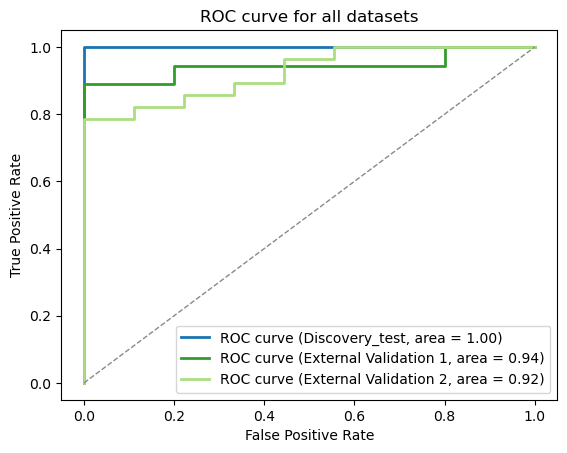

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 初始化画布
plt.figure()

# 数据集1
fpr1, tpr1, _ = roc_curve(Y_val, catboost_model.predict_proba(X_val)[:,1])
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, color='#1874B2', lw=2, label='ROC curve (Discovery_test, area = %0.2f)' % roc_auc1)

# 数据集2
fpr2, tpr2, _ = roc_curve(Y_V2, catboost_model.predict_proba(X_V2)[:,1])
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, color='#309E29', lw=2, label='ROC curve (External Validation 1, area = %0.2f)' % roc_auc2)

# 数据集3
fpr3, tpr3, _ = roc_curve(Y_V3, catboost_model.predict_proba(X_V3)[:,1])
roc_auc3 = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, color='#ACDD81', lw=2, label='ROC curve (External Validation 2, area = %0.2f)' % roc_auc3)

# 对角线
plt.plot([0, 1], [0, 1], color='#898989', lw=1, linestyle='--')

# 设置坐标轴范围和标签等
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all datasets')
plt.legend(loc="lower right")

# 显示图形
plt.savefig("0517_ROC.pdf")
plt.savefig("0517_ROC.jpg", dpi=300, format='jpg')
plt.show()

# PRC

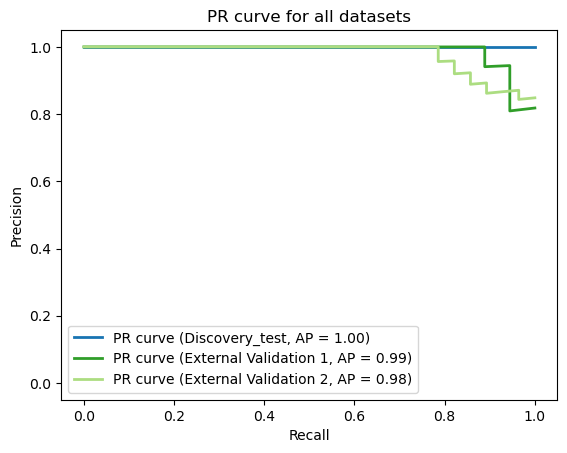

In [12]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 初始化画布
plt.figure()

# 数据集1
precision1, recall1, _ = precision_recall_curve(Y_val, catboost_model.predict_proba(X_val)[:,1])
ap1 = average_precision_score(Y_val, catboost_model.predict_proba(X_val)[:,1])
plt.plot(recall1, precision1, color='#1874B2', lw=2, label='PR curve (Discovery_test, AP = %0.2f)' % ap1)

# 数据集2
precision2, recall2, _ = precision_recall_curve(Y_V2, catboost_model.predict_proba(X_V2)[:,1])
ap2 = average_precision_score(Y_V2, catboost_model.predict_proba(X_V2)[:,1])
plt.plot(recall2, precision2, color='#309E29', lw=2, label='PR curve (External Validation 1, AP = %0.2f)' % ap2)

# 数据集3
precision3, recall3, _ = precision_recall_curve(Y_V3, catboost_model.predict_proba(X_V3)[:,1])
ap3 = average_precision_score(Y_V3, catboost_model.predict_proba(X_V3)[:,1])
plt.plot(recall3, precision3, color='#ACDD81', lw=2, label='PR curve (External Validation 2, AP = %0.2f)' % ap3)

# 设置坐标轴范围和标签等
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve for all datasets')
plt.legend(loc="lower left")

# 显示图形
plt.savefig("0517_PRC.pdf")
plt.savefig("0517_PRC.jpg", dpi=300, format='jpg')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
from scipy.stats import norm

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity

def npv_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    npv = tn / (tn+fn)
    return npv

def confidence_interval(p, n, z=1.96):  # default value for z is set to calculate a 95% CI
    center = p
    radius = z * ((p*(1-p)/n)**0.5)
    return (max(0, center - radius), min(1, center + radius))


In [ ]:
# 创建空的结果列表
results = []

# 设置循环运行100次
for i in range(100):
    # 设置随机数种子
    seed = i  # 使用循环变量i作为种子值
    np.random.seed(seed)

    # 分割数据集
    X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.10, random_state=seed, shuffle=True, stratify=Y)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.1111, random_state=seed, shuffle=True, stratify=Y_train_val)
    # 初始化 CatBoostClassifier 模型
    catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=8, random_seed=seed)

    # 在训练集上训练 CatBoostClassifier 模型
    catboost_model.fit(X_train, Y_train)

    # 在验证集上进行预测并计算指标
    Y_val_pred_catboost = catboost_model.predict(X_val)
    accuracy_val_catboost = accuracy_score(Y_val, Y_val_pred_catboost)
    precision_val_catboost = precision_score(Y_val, Y_val_pred_catboost)
    recall_val_catboost = recall_score(Y_val, Y_val_pred_catboost)
    f1_val_catboost = f1_score(Y_val, Y_val_pred_catboost)
    roc_auc_val_catboost = roc_auc_score(Y_val, Y_val_pred_catboost)
    specificity_val_catboost = specificity_score(Y_val, Y_val_pred_catboost)
    npv_val_catboost = npv_score(Y_val, Y_val_pred_catboost)

    # 在外部验证集2上进行预测并计算指标
    Y_V2_pred_catboost = catboost_model.predict(X_V2)
    accuracy_V2_catboost = accuracy_score(Y_V2, Y_V2_pred_catboost)
    precision_V2_catboost = precision_score(Y_V2, Y_V2_pred_catboost)
    recall_V2_catboost = recall_score(Y_V2, Y_V2_pred_catboost)
    f1_V2_catboost = f1_score(Y_V2, Y_V2_pred_catboost)
    roc_auc_V2_catboost = roc_auc_score(Y_V2, Y_V2_pred_catboost)
    specificity_V2_catboost = specificity_score(Y_V2, Y_V2_pred_catboost)
    npv_V2_catboost = npv_score(Y_V2, Y_V2_pred_catboost)

    # 在外部验证集3上进行预测并计算指标
    Y_V3_pred_catboost = catboost_model.predict(X_V3)
    accuracy_V3_catboost = accuracy_score(Y_V3, Y_V3_pred_catboost)
    precision_V3_catboost = precision_score(Y_V3, Y_V3_pred_catboost)
    recall_V3_catboost = recall_score(Y_V3, Y_V3_pred_catboost)
    f1_V3_catboost = f1_score(Y_V3, Y_V3_pred_catboost)
    roc_auc_V3_catboost = roc_auc_score(Y_V3, Y_V3_pred_catboost)
    specificity_V3_catboost = specificity_score(Y_V3, Y_V3_pred_catboost)
    npv_V3_catboost = npv_score(Y_V3, Y_V3_pred_catboost)

    # 将结果添加到结果列表中
    results.append({
        'Seed': seed,
        'Accuracy_Val': accuracy_val_catboost,
        'Precision_Val': precision_val_catboost,
        'Recall_Val': recall_val_catboost,
        'F1_Score_Val': f1_val_catboost,
        'ROC_AUC_Val': roc_auc_val_catboost,
        'Accuracy_V2': accuracy_V2_catboost,
        'Precision_V2': precision_V2_catboost,
        'Recall_V2': recall_V2_catboost,
        'F1_Score_V2': f1_V2_catboost,
        'ROC_AUC_V2': roc_auc_V2_catboost,
        'Accuracy_V3': accuracy_V3_catboost,
        'Precision_V3': precision_V3_catboost,
        'Recall_V3': recall_V3_catboost,
        'F1_Score_V3': f1_V3_catboost,
        'ROC_AUC_V3': roc_auc_V3_catboost,
        'Specificity_Val': specificity_val_catboost,
        'NPV_Val': npv_val_catboost,
        'Specificity_V2': specificity_V2_catboost,
        'NPV_V2': npv_V2_catboost,
        'Specificity_V3': specificity_V3_catboost,
        'NPV_V3': npv_V3_catboost
    })

# 创建DataFrame
results_df = pd.DataFrame(results)

n_val = len(X_val)
n_v2 = len(X_V2)
n_v3 = len(X_V3)


# 计算评估指标的均值和标准差
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC', 'Specificity', 'NPV']
for metric in evaluation_metrics:
    results_df[f'{metric}_Val_CI'] = results_df[f'{metric}_Val'].apply(lambda x: confidence_interval(x, n_val))
    results_df[f'{metric}_V2_CI'] = results_df[f'{metric}_V2'].apply(lambda x: confidence_interval(x, n_v2))
    results_df[f'{metric}_V3_CI'] = results_df[f'{metric}_V3'].apply(lambda x: confidence_interval(x, n_v3))

for index, row in results_df.iterrows():
    print(f'Seed {row["Seed"]}:')
    for metric in evaluation_metrics:
        print(f'Val {metric} = {row[f"{metric}_Val"]*100}% [{row[f"{metric}_Val_CI"][0]*100}-{row[f"{metric}_Val_CI"][1]*100}%]')
        print(f'V2 {metric} = {row[f"{metric}_V2"]*100}% [{row[f"{metric}_V2_CI"][0]*100}-{row[f"{metric}_V2_CI"][1]*100}%]')
        print(f'V3 {metric} = {row[f"{metric}_V3"]*100}% [{row[f"{metric}_V3_CI"][0]*100}-{row[f"{metric}_V3_CI"][1]*100}%]')


    
# 导出为CSV文件
results_df.to_csv('0517_results_with_confidence_intervals.csv', index=False)